In [40]:
from konlpy.tag import Okt
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
import warnings
from nltk.corpus import stopwords

warnings.filterwarnings(action='ignore')

In [41]:
title='roblox.csv'
word_list =set(['이','개','저','요','제발','뭐','하나','그냥','해','데','못','때문','그것','게','지금','내','걸','나','위','로','캐','이안','고','처럼','밑','스','방금','제','다시','왜','안','갑자기','처음','전','줄','한번','오늘','아예','해도','원래','번','만','하라','때','그거','심해','가끔','피하','하나요','욤','튕기','뭘','약간','렉좀','인','옆','것','그','또','꼭','명','건','부분','자주','글','수가','분','곳','경우','바로','자꾸','용','여','터','오','튕겨','어쩌','더','수','조금','짱','음','등','해주시','함','등등','찍','일단','자기','생기','일리','후','뒤','이번','이후','가기','중이','오지','땜','응','장공','보고','너','듯','세','배','무엇','게속','안나','그레','전혀','다가','놀수','정말','별로','굿','벌','색','제패','토','새','쫌','염','것좀','강추','멩','정도','번','기','거의','살','달','좀','거','진짜','저기','밌','이나','주','안눌려','재','완전','최고','이건','임','애','막','슴','개도','주기도','여기','무','영','고요','니','영','아주','생각','생','맘','구','산','버','화가','혐기','주시','물','피','다른','리지','계속','무슨','잘못','뭔가','실망','욤','난','답','일이','자체','끼리','다음','습','계속','가요','보','최악','잠깐','이상','몇번','며칠','어디','가지','직접','눈','업','날','끝','뎅','하니','혹시','건가','네','요즘','도','를','이제','좋더','얼마','언제','대박','거기','된거','그대로','주심','예전','제대로','분명','시','로블록스', '꿀잼','핵꿀잼','님들','짱짱','노잼','개꿀','역시','여러분','점','님','님들','꾸르잼','셈','밋','재밋어','안해','살짝','전부','블록','처','바','가안','레','티','튕','런','쿤'])
word_list

{'가기',
 '가끔',
 '가안',
 '가요',
 '가지',
 '갑자기',
 '강추',
 '개',
 '개꿀',
 '개도',
 '거',
 '거기',
 '거의',
 '건',
 '건가',
 '걸',
 '것',
 '것좀',
 '게',
 '게속',
 '경우',
 '계속',
 '고',
 '고요',
 '곳',
 '구',
 '굿',
 '그',
 '그거',
 '그것',
 '그냥',
 '그대로',
 '그레',
 '글',
 '기',
 '꼭',
 '꾸르잼',
 '꿀잼',
 '끝',
 '끼리',
 '나',
 '난',
 '날',
 '내',
 '너',
 '네',
 '노잼',
 '놀수',
 '눈',
 '니',
 '님',
 '님들',
 '다가',
 '다른',
 '다시',
 '다음',
 '달',
 '답',
 '대박',
 '더',
 '데',
 '뎅',
 '도',
 '된거',
 '뒤',
 '듯',
 '등',
 '등등',
 '때',
 '때문',
 '땜',
 '또',
 '런',
 '레',
 '렉좀',
 '로',
 '로블록스',
 '를',
 '리지',
 '막',
 '만',
 '맘',
 '멩',
 '며칠',
 '명',
 '몇번',
 '못',
 '무',
 '무슨',
 '무엇',
 '물',
 '뭐',
 '뭔가',
 '뭘',
 '밋',
 '밌',
 '밑',
 '바',
 '바로',
 '방금',
 '배',
 '버',
 '번',
 '벌',
 '별로',
 '보',
 '보고',
 '부분',
 '분',
 '분명',
 '블록',
 '산',
 '살',
 '살짝',
 '새',
 '색',
 '생',
 '생각',
 '생기',
 '세',
 '셈',
 '수',
 '수가',
 '스',
 '슴',
 '습',
 '시',
 '실망',
 '심해',
 '아예',
 '아주',
 '안',
 '안나',
 '안눌려',
 '안해',
 '애',
 '약간',
 '어디',
 '어쩌',
 '언제',
 '얼마',
 '업',
 '여',
 '여기',
 '여러분',
 '역시',
 '염',
 '영',
 '옆',
 '예전',
 '오',
 '오늘',
 '오지',
 '

In [42]:
def clean_text(text):
    text = text.replace(".", "").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [43]:
def get_nouns(tokenizer, sentence):
    nouns=tokenizer.nouns(sentence)
    for word in word_list: 
        nouns=remove_values_from_list(nouns,word)
    return nouns

def tokenize(df):
    tokenizer = Okt()
    processed_data = [] 
    for sent in tqdm(df['content']):
        sentence = clean_text(str(sent).replace("\n", "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

In [44]:
def save_processed_data(processed_data):
    with open("output/tokenized_data_"+title, 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)
            
if __name__ == '__main__':
    tdf = pd.read_csv("data/roblox.csv")
    df=tdf[['userName','at','content','score','thumbsUpCount']]
    df.dropna(subset = ['content'])
    processed_data = tokenize(df)
    save_processed_data(processed_data)

100%|█████████████████████████████████████████████████████████████████████████| 236320/236320 [13:12<00:00, 298.02it/s]


In [45]:
processed_data = [sent.strip().split(",") for sent in tqdm(open("output/tokenized_data_"+title,'r',encoding='utf-8').readlines())]
processed_data = DataFrame(processed_data)
processed_data[0] = processed_data[0].replace("", np.nan)
processed_data = processed_data[processed_data[0].not null()]
processed_data = processed_data.values.tolist()
processed_data2=[]
for i in processed_data:
    i = list(filter(None, i))
    processed_data2.append(i)
processed_data = processed_data2
processed_data

100%|███████████████████████████████████████████████████████████████████████| 236320/236320 [00:03<00:00, 60808.54it/s]


[['펫시뮬'],
 ['별',
  '이유',
  '화면',
  '버그',
  '데이',
  '년',
  '치질',
  '밸런스',
  '파괴',
  '배드워즈',
  '사람',
  '사람',
  '끼',
  '핵',
  '배드',
  '워',
  '점프',
  '맵',
  '여러가지',
  '가장',
  '배드',
  '워',
  '저작권',
  '핵',
  '배드',
  '워',
  '배드',
  '워',
  '삭제'],
 ['해킹', '계정', '개사'],
 ['현질', '유도', '금', '유소', '환불', '요청', '불가', '신고', '불가', '섺'],
 ['광고', '렉', '와이파이', '질', '렉', '이점'],
 ['업데이트'],
 ['로블', '유저', '로서', '도움', '게임', '사기꾼', '핵'],
 ['왕꿀잼'],
 ['월', '문제', '풀', '가래', '가집', '똥망겜'],
 ['단점', '렉', '단점', '사람', '게임', '단점', '검열', '장점', '여러가지', '게임'],
 ['단점', '아바타', '머리카락', '옷', '아바타', '서버', '버그'],
 ['모바일', '유저', '화면', '버그'],
 ['로블', '넌', '진짜캬'],
 ['설치'],
 ['재미', '인터넷', '접속'],
 ['이서', '행', '이서', '노블', '록스'],
 ['모', '사람'],
 ['플레이'],
 ['노가다', '다만', '버퍼링', '터치'],
 ['사기꾼', '닉'],
 ['임도', '무재'],
 ['게임', '앱', '심지어', '자신', '앱', '사용', '벅스', '결재', '돈', '벅스', '환불', '벅스'],
 ['지렬다', '게임', '담점', '단점', '어용', '게임', '별', '다섯', '만하', '내용', '광고'],
 ['인생', '게임'],
 ['마야',
  '배드',
  '워',
  '배드',
  '워',
  '개똥겜',
  '사람',
  '만하',
  '사람',
  

In [46]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [47]:
dictionary = corpora.Dictionary(processed_data)
dictionary.filter_extremes(no_below=2, no_above=0.5)

2022-06-17 14:06:11,980 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-06-17 14:06:12,036 : INFO : adding document #10000 to Dictionary(7211 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-06-17 14:06:12,091 : INFO : adding document #20000 to Dictionary(10910 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-06-17 14:06:12,143 : INFO : adding document #30000 to Dictionary(13793 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-06-17 14:06:12,195 : INFO : adding document #40000 to Dictionary(16233 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-06-17 14:06:12,249 : INFO : adding document #50000 to Dictionary(18524 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-06-17 14:06:12,294 : INFO : adding document #60000 to Dictionary(20652 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-06-17 14:06:12,344 : INFO : adding document #70000 to Dictionary(22688 unique tokens: ['펫시뮬', '가장', '끼', '년', '데이']...)
2022-06-17 14:06:12,407 : INFO : adding

In [48]:
corpus = [dictionary.doc2bow(text) for text in processed_data]

2022-06-17 14:06:13,514 : INFO : using symmetric alpha at 0.5
2022-06-17 14:06:13,514 : INFO : using symmetric eta at 0.5
2022-06-17 14:06:13,516 : INFO : using serial LDA version on this node
2022-06-17 14:06:13,518 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 170959 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-06-17 14:06:13,518 : INFO : PROGRESS: pass 0, at document #2000/170959


Number of unique tokens: 14691
Number of documents: 170959


2022-06-17 14:06:13,936 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:13,946 : INFO : topic #0 (0.500): 0.025*"게임" + 0.023*"로블" + 0.021*"사람" + 0.018*"벅스" + 0.018*"친구" + 0.017*"현질" + 0.017*"버그" + 0.016*"렉" + 0.014*"맵" + 0.013*"유저"
2022-06-17 14:06:13,947 : INFO : topic #1 (0.500): 0.122*"게임" + 0.029*"버그" + 0.021*"현질" + 0.019*"벅스" + 0.017*"겜" + 0.017*"유저" + 0.013*"맵" + 0.011*"단점" + 0.011*"추천" + 0.010*"사람"
2022-06-17 14:06:13,947 : INFO : topic diff=4.489860, rho=1.000000
2022-06-17 14:06:13,948 : INFO : PROGRESS: pass 0, at document #4000/170959
2022-06-17 14:06:14,231 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:14,232 : INFO : topic #0 (0.500): 0.022*"사람" + 0.022*"렉" + 0.019*"로블" + 0.019*"벅스" + 0.019*"친구" + 0.018*"게임" + 0.017*"버그" + 0.016*"현질" + 0.014*"계정" + 0.014*"입양"
2022-06-17 14:06:14,233 : INFO : topic #1 (0.500): 0.138*"게임" + 0.037*"버그" + 0.022*"현질" + 0.020*"벅스" + 0.020*"겜" + 0.017*

2022-06-17 14:06:16,651 : INFO : topic #1 (0.500): 0.165*"게임" + 0.035*"버그" + 0.024*"현질" + 0.021*"겜" + 0.019*"유저" + 0.018*"벅스" + 0.016*"맵" + 0.015*"추천" + 0.014*"재미" + 0.012*"단점"
2022-06-17 14:06:16,651 : INFO : topic diff=0.278312, rho=0.267261
2022-06-17 14:06:16,652 : INFO : PROGRESS: pass 0, at document #30000/170959
2022-06-17 14:06:16,789 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:16,799 : INFO : topic #0 (0.500): 0.031*"렉" + 0.025*"계정" + 0.024*"로블" + 0.022*"사람" + 0.020*"서버" + 0.019*"입양" + 0.016*"로그인" + 0.013*"해킹" + 0.013*"신고" + 0.012*"유저"
2022-06-17 14:06:16,799 : INFO : topic #1 (0.500): 0.163*"게임" + 0.034*"버그" + 0.025*"현질" + 0.022*"겜" + 0.020*"유저" + 0.019*"벅스" + 0.016*"맵" + 0.015*"추천" + 0.014*"재미" + 0.012*"단점"
2022-06-17 14:06:16,799 : INFO : topic diff=0.248935, rho=0.258199
2022-06-17 14:06:16,800 : INFO : PROGRESS: pass 0, at document #32000/170959
2022-06-17 14:06:16,943 : INFO : merging changes from 2000 documents into a m

2022-06-17 14:06:18,693 : INFO : PROGRESS: pass 0, at document #56000/170959
2022-06-17 14:06:18,824 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:18,829 : INFO : topic #0 (0.500): 0.033*"계정" + 0.031*"입양" + 0.026*"로그인" + 0.022*"로블" + 0.019*"렉" + 0.019*"해킹" + 0.017*"사람" + 0.017*"오류" + 0.016*"신고" + 0.015*"사기"
2022-06-17 14:06:18,829 : INFO : topic #1 (0.500): 0.147*"게임" + 0.030*"버그" + 0.025*"현질" + 0.023*"겜" + 0.022*"맵" + 0.019*"벅스" + 0.018*"유저" + 0.013*"추천" + 0.013*"재미" + 0.012*"렉"
2022-06-17 14:06:18,829 : INFO : topic diff=0.203013, rho=0.188982
2022-06-17 14:06:18,830 : INFO : PROGRESS: pass 0, at document #58000/170959
2022-06-17 14:06:18,957 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:18,962 : INFO : topic #0 (0.500): 0.033*"계정" + 0.032*"입양" + 0.024*"로그인" + 0.022*"로블" + 0.019*"렉" + 0.018*"해킹" + 0.017*"사람" + 0.016*"오류" + 0.016*"사기" + 0.015*"신고"
2022-06-17 14:06:18,962 : INFO : topic #1

2022-06-17 14:06:20,968 : INFO : topic #0 (0.500): 0.044*"입양" + 0.025*"계정" + 0.021*"렉" + 0.018*"사기" + 0.018*"로블" + 0.017*"로그인" + 0.016*"신고" + 0.016*"사람" + 0.016*"해킹" + 0.016*"거래"
2022-06-17 14:06:20,968 : INFO : topic #1 (0.500): 0.146*"게임" + 0.034*"맵" + 0.026*"현질" + 0.023*"버그" + 0.022*"벅스" + 0.020*"겜" + 0.017*"점프" + 0.016*"재미" + 0.016*"친구" + 0.016*"추천"
2022-06-17 14:06:20,968 : INFO : topic diff=0.173973, rho=0.156174
2022-06-17 14:06:20,969 : INFO : PROGRESS: pass 0, at document #84000/170959
2022-06-17 14:06:21,090 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:21,098 : INFO : topic #0 (0.500): 0.044*"입양" + 0.025*"계정" + 0.021*"렉" + 0.018*"사기" + 0.018*"로블" + 0.017*"로그인" + 0.017*"신고" + 0.016*"거래" + 0.016*"사람" + 0.016*"해킹"
2022-06-17 14:06:21,098 : INFO : topic #1 (0.500): 0.147*"게임" + 0.035*"맵" + 0.025*"현질" + 0.024*"버그" + 0.021*"벅스" + 0.019*"겜" + 0.017*"점프" + 0.017*"재미" + 0.016*"렉" + 0.016*"친구"
2022-06-17 14:06:21,098 : INFO : topic diff

2022-06-17 14:06:22,782 : INFO : topic diff=0.141236, rho=0.136083
2022-06-17 14:06:22,783 : INFO : PROGRESS: pass 0, at document #110000/170959
2022-06-17 14:06:22,890 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:22,902 : INFO : topic #0 (0.500): 0.063*"입양" + 0.022*"거래" + 0.021*"사기" + 0.020*"계정" + 0.019*"사람" + 0.018*"렉" + 0.016*"신고" + 0.014*"로그인" + 0.013*"해킹" + 0.011*"로블"
2022-06-17 14:06:22,903 : INFO : topic #1 (0.500): 0.157*"게임" + 0.032*"맵" + 0.022*"버그" + 0.022*"재미" + 0.022*"렉" + 0.021*"현질" + 0.020*"겜" + 0.018*"벅스" + 0.018*"점프" + 0.018*"추천"
2022-06-17 14:06:22,903 : INFO : topic diff=0.140551, rho=0.134840
2022-06-17 14:06:22,903 : INFO : PROGRESS: pass 0, at document #112000/170959
2022-06-17 14:06:23,008 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:23,024 : INFO : topic #0 (0.500): 0.063*"입양" + 0.021*"사기" + 0.020*"계정" + 0.019*"거래" + 0.019*"사람" + 0.017*"렉" + 0.016*"신고" + 0.014*"해킹"

2022-06-17 14:06:24,587 : INFO : topic #0 (0.500): 0.054*"입양" + 0.021*"계정" + 0.020*"사람" + 0.017*"사기" + 0.014*"로그인" + 0.013*"신고" + 0.012*"업데이트" + 0.012*"렉" + 0.011*"랙" + 0.011*"폰"
2022-06-17 14:06:24,588 : INFO : topic #1 (0.500): 0.171*"게임" + 0.028*"맵" + 0.028*"재미" + 0.026*"렉" + 0.019*"겜" + 0.018*"버그" + 0.018*"친구" + 0.017*"추천" + 0.016*"점프" + 0.016*"현질"
2022-06-17 14:06:24,588 : INFO : topic diff=0.118731, rho=0.121268
2022-06-17 14:06:24,588 : INFO : PROGRESS: pass 0, at document #138000/170959
2022-06-17 14:06:24,691 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:24,693 : INFO : topic #0 (0.500): 0.051*"입양" + 0.021*"계정" + 0.019*"사람" + 0.016*"사기" + 0.014*"로그인" + 0.013*"업데이트" + 0.012*"신고" + 0.012*"렉" + 0.011*"랙" + 0.011*"돈"
2022-06-17 14:06:24,693 : INFO : topic #1 (0.500): 0.172*"게임" + 0.029*"재미" + 0.028*"맵" + 0.027*"렉" + 0.019*"겜" + 0.019*"버그" + 0.018*"친구" + 0.016*"추천" + 0.016*"점프" + 0.016*"현질"
2022-06-17 14:06:24,694 : INFO : topic diff

2022-06-17 14:06:26,360 : INFO : topic #1 (0.500): 0.158*"게임" + 0.037*"렉" + 0.026*"맵" + 0.024*"재미" + 0.020*"컴퓨터" + 0.019*"점프" + 0.017*"겜" + 0.014*"친구" + 0.013*"버그" + 0.012*"플레이"
2022-06-17 14:06:26,360 : INFO : topic diff=0.120984, rho=0.111111
2022-06-17 14:06:26,360 : INFO : PROGRESS: pass 0, at document #164000/170959
2022-06-17 14:06:26,460 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:26,470 : INFO : topic #0 (0.500): 0.029*"로그인" + 0.025*"영어" + 0.024*"제작자" + 0.018*"사람" + 0.017*"폰" + 0.013*"랙" + 0.013*"입양" + 0.011*"계정" + 0.010*"업데이트" + 0.009*"한국어"
2022-06-17 14:06:26,470 : INFO : topic #1 (0.500): 0.154*"게임" + 0.037*"렉" + 0.026*"맵" + 0.024*"재미" + 0.021*"컴퓨터" + 0.020*"점프" + 0.016*"겜" + 0.013*"친구" + 0.012*"버그" + 0.012*"플레이"
2022-06-17 14:06:26,471 : INFO : topic diff=0.117289, rho=0.110432
2022-06-17 14:06:26,471 : INFO : PROGRESS: pass 0, at document #166000/170959
2022-06-17 14:06:26,573 : INFO : merging changes from 2000 documents i

2022-06-17 14:06:45,228 : INFO : topic #2 (0.333): 0.034*"로블" + 0.033*"맵" + 0.028*"입양" + 0.025*"렉" + 0.018*"게임" + 0.016*"친구" + 0.015*"점프" + 0.014*"겜" + 0.014*"유저" + 0.013*"사람"
2022-06-17 14:06:45,229 : INFO : topic diff=0.412708, rho=0.447214
2022-06-17 14:06:45,229 : INFO : PROGRESS: pass 0, at document #12000/170959
2022-06-17 14:06:45,441 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:45,445 : INFO : topic #0 (0.333): 0.071*"게임" + 0.055*"현질" + 0.037*"벅스" + 0.032*"계정" + 0.027*"겜" + 0.025*"해킹" + 0.018*"돈" + 0.014*"사람" + 0.012*"로벅" + 0.012*"유저"
2022-06-17 14:06:45,446 : INFO : topic #1 (0.333): 0.149*"게임" + 0.046*"버그" + 0.022*"유저" + 0.018*"사람" + 0.018*"재미" + 0.017*"광고" + 0.015*"단점" + 0.014*"추천" + 0.014*"렉" + 0.014*"친구"
2022-06-17 14:06:45,446 : INFO : topic #2 (0.333): 0.036*"맵" + 0.034*"입양" + 0.032*"로블" + 0.029*"렉" + 0.019*"친구" + 0.019*"거래" + 0.016*"게임" + 0.014*"점프" + 0.014*"사람" + 0.013*"겜"
2022-06-17 14:06:45,447 : INFO : topic diff=0.3

2022-06-17 14:06:47,510 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:47,527 : INFO : topic #0 (0.333): 0.050*"현질" + 0.042*"계정" + 0.041*"벅스" + 0.038*"게임" + 0.032*"겜" + 0.021*"로그인" + 0.021*"해킹" + 0.017*"서버" + 0.013*"돈" + 0.012*"유저"
2022-06-17 14:06:47,527 : INFO : topic #1 (0.333): 0.185*"게임" + 0.045*"버그" + 0.021*"유저" + 0.020*"추천" + 0.019*"재미" + 0.016*"사람" + 0.015*"단점" + 0.015*"서버" + 0.014*"친구" + 0.014*"별"
2022-06-17 14:06:47,528 : INFO : topic #2 (0.333): 0.045*"렉" + 0.038*"로블" + 0.035*"맵" + 0.035*"입양" + 0.017*"점프" + 0.014*"친구" + 0.014*"업데이트" + 0.012*"사람" + 0.012*"사기" + 0.011*"거래"
2022-06-17 14:06:47,528 : INFO : topic diff=0.256368, rho=0.250000
2022-06-17 14:06:47,529 : INFO : PROGRESS: pass 0, at document #34000/170959
2022-06-17 14:06:47,704 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:47,715 : INFO : topic #0 (0.333): 0.051*"계정" + 0.043*"현질" + 0.038*"로그인" + 0.033*"벅스" + 0.033*"게임" + 

2022-06-17 14:06:49,384 : INFO : topic #1 (0.333): 0.180*"게임" + 0.042*"버그" + 0.022*"유저" + 0.018*"재미" + 0.018*"사람" + 0.017*"추천" + 0.016*"단점" + 0.016*"친구" + 0.014*"별" + 0.014*"화면"
2022-06-17 14:06:49,384 : INFO : topic #2 (0.333): 0.052*"입양" + 0.039*"렉" + 0.037*"맵" + 0.031*"로블" + 0.023*"업데이트" + 0.020*"사기" + 0.018*"거래" + 0.018*"점프" + 0.014*"신고" + 0.014*"사람"
2022-06-17 14:06:49,384 : INFO : topic diff=0.215109, rho=0.196116
2022-06-17 14:06:49,385 : INFO : PROGRESS: pass 0, at document #54000/170959
2022-06-17 14:06:49,535 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:49,537 : INFO : topic #0 (0.333): 0.055*"현질" + 0.045*"계정" + 0.037*"벅스" + 0.033*"로그인" + 0.031*"겜" + 0.027*"해킹" + 0.023*"오류" + 0.019*"게임" + 0.018*"돈" + 0.014*"서버"
2022-06-17 14:06:49,537 : INFO : topic #1 (0.333): 0.181*"게임" + 0.041*"버그" + 0.021*"유저" + 0.018*"재미" + 0.017*"사람" + 0.017*"추천" + 0.017*"단점" + 0.016*"친구" + 0.015*"별" + 0.014*"화면"
2022-06-17 14:06:49,538 : INFO : topic #2

2022-06-17 14:06:51,046 : INFO : topic diff=0.163147, rho=0.166667
2022-06-17 14:06:51,046 : INFO : PROGRESS: pass 0, at document #74000/170959
2022-06-17 14:06:51,186 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:51,189 : INFO : topic #0 (0.333): 0.062*"현질" + 0.042*"계정" + 0.042*"벅스" + 0.029*"겜" + 0.026*"해킹" + 0.025*"로그인" + 0.020*"돈" + 0.018*"오류" + 0.015*"옷" + 0.013*"게임"
2022-06-17 14:06:51,189 : INFO : topic #1 (0.333): 0.198*"게임" + 0.034*"버그" + 0.022*"추천" + 0.022*"재미" + 0.020*"친구" + 0.018*"유저" + 0.017*"사람" + 0.016*"여러가지" + 0.016*"별" + 0.014*"단점"
2022-06-17 14:06:51,190 : INFO : topic #2 (0.333): 0.063*"입양" + 0.048*"맵" + 0.043*"렉" + 0.029*"점프" + 0.024*"사기" + 0.022*"로블" + 0.021*"거래" + 0.019*"업데이트" + 0.013*"신고" + 0.013*"폰"
2022-06-17 14:06:51,190 : INFO : topic diff=0.190914, rho=0.164399
2022-06-17 14:06:51,191 : INFO : PROGRESS: pass 0, at document #76000/170959
2022-06-17 14:06:51,331 : INFO : merging changes from 2000 documents into a

2022-06-17 14:06:52,754 : INFO : topic #0 (0.333): 0.061*"현질" + 0.042*"계정" + 0.039*"벅스" + 0.028*"로그인" + 0.026*"겜" + 0.024*"해킹" + 0.020*"돈" + 0.017*"오류" + 0.012*"옷" + 0.010*"유저"
2022-06-17 14:06:52,755 : INFO : topic #1 (0.333): 0.203*"게임" + 0.034*"버그" + 0.025*"재미" + 0.024*"추천" + 0.022*"친구" + 0.018*"사람" + 0.017*"여러가지" + 0.016*"별" + 0.015*"유저" + 0.012*"단점"
2022-06-17 14:06:52,755 : INFO : topic #2 (0.333): 0.075*"입양" + 0.051*"맵" + 0.045*"렉" + 0.031*"거래" + 0.031*"점프" + 0.029*"사기" + 0.019*"업데이트" + 0.017*"로블" + 0.014*"사람" + 0.012*"신고"
2022-06-17 14:06:52,756 : INFO : topic diff=0.145615, rho=0.145865
2022-06-17 14:06:52,756 : INFO : PROGRESS: pass 0, at document #96000/170959
2022-06-17 14:06:52,872 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:52,884 : INFO : topic #0 (0.333): 0.061*"현질" + 0.041*"계정" + 0.038*"벅스" + 0.028*"겜" + 0.027*"로그인" + 0.024*"해킹" + 0.019*"돈" + 0.016*"오류" + 0.011*"옷" + 0.010*"가입"
2022-06-17 14:06:52,885 : INFO : topic #1

2022-06-17 14:06:54,210 : INFO : topic #2 (0.333): 0.090*"입양" + 0.048*"렉" + 0.042*"맵" + 0.029*"사기" + 0.027*"점프" + 0.024*"거래" + 0.016*"업데이트" + 0.016*"사람" + 0.013*"신고" + 0.012*"폰"
2022-06-17 14:06:54,210 : INFO : topic diff=0.141173, rho=0.132453
2022-06-17 14:06:54,211 : INFO : PROGRESS: pass 0, at document #116000/170959
2022-06-17 14:06:54,320 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:54,330 : INFO : topic #0 (0.333): 0.053*"현질" + 0.038*"벅스" + 0.035*"계정" + 0.030*"겜" + 0.024*"해킹" + 0.022*"로그인" + 0.021*"돈" + 0.015*"오류" + 0.010*"비밀번호" + 0.010*"삭제"
2022-06-17 14:06:54,331 : INFO : topic #1 (0.333): 0.210*"게임" + 0.031*"재미" + 0.030*"버그" + 0.024*"추천" + 0.022*"친구" + 0.018*"사람" + 0.018*"여러가지" + 0.017*"별" + 0.013*"랙" + 0.012*"플레이"
2022-06-17 14:06:54,331 : INFO : topic #2 (0.333): 0.091*"입양" + 0.048*"렉" + 0.042*"맵" + 0.029*"사기" + 0.025*"점프" + 0.022*"거래" + 0.016*"업데이트" + 0.016*"사람" + 0.014*"신고" + 0.013*"폰"
2022-06-17 14:06:54,332 : INFO : topi

2022-06-17 14:06:55,568 : INFO : PROGRESS: pass 0, at document #136000/170959
2022-06-17 14:06:55,675 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:55,676 : INFO : topic #0 (0.333): 0.042*"현질" + 0.038*"계정" + 0.030*"겜" + 0.029*"벅스" + 0.025*"로그인" + 0.022*"돈" + 0.014*"오류" + 0.014*"해킹" + 0.011*"비밀번호" + 0.011*"가입"
2022-06-17 14:06:55,677 : INFO : topic #1 (0.333): 0.225*"게임" + 0.037*"재미" + 0.025*"친구" + 0.025*"버그" + 0.022*"추천" + 0.017*"여러가지" + 0.017*"사람" + 0.017*"별" + 0.015*"랙" + 0.013*"플레이"
2022-06-17 14:06:55,677 : INFO : topic #2 (0.333): 0.080*"입양" + 0.051*"렉" + 0.038*"맵" + 0.026*"점프" + 0.024*"사기" + 0.018*"업데이트" + 0.016*"폰" + 0.015*"사람" + 0.012*"와이파이" + 0.012*"컴퓨터"
2022-06-17 14:06:55,678 : INFO : topic diff=0.112862, rho=0.121268
2022-06-17 14:06:55,678 : INFO : PROGRESS: pass 0, at document #138000/170959
2022-06-17 14:06:55,778 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:55,784 : INFO :

2022-06-17 14:06:56,960 : INFO : topic #1 (0.333): 0.219*"게임" + 0.037*"재미" + 0.021*"친구" + 0.021*"버그" + 0.020*"랙" + 0.016*"추천" + 0.015*"별" + 0.015*"플레이" + 0.015*"사람" + 0.013*"여러가지"
2022-06-17 14:06:56,961 : INFO : topic #2 (0.333): 0.070*"렉" + 0.038*"맵" + 0.031*"입양" + 0.031*"점프" + 0.025*"컴퓨터" + 0.024*"폰" + 0.019*"업데이트" + 0.014*"제작자" + 0.012*"사람" + 0.012*"핸드폰"
2022-06-17 14:06:56,961 : INFO : topic diff=0.125115, rho=0.113228
2022-06-17 14:06:56,961 : INFO : PROGRESS: pass 0, at document #158000/170959
2022-06-17 14:06:57,074 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:06:57,080 : INFO : topic #0 (0.333): 0.057*"로그인" + 0.031*"겜" + 0.031*"현질" + 0.025*"벅스" + 0.024*"계정" + 0.019*"돈" + 0.013*"가입" + 0.012*"잼" + 0.011*"오류" + 0.011*"비밀번호"
2022-06-17 14:06:57,080 : INFO : topic #1 (0.333): 0.215*"게임" + 0.035*"재미" + 0.020*"친구" + 0.019*"버그" + 0.019*"랙" + 0.017*"영어" + 0.016*"플레이" + 0.015*"추천" + 0.015*"사람" + 0.015*"별"
2022-06-17 14:06:57,081 : INFO : to

2022-06-17 14:07:15,126 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:15,141 : INFO : topic #0 (0.250): 0.052*"게임" + 0.051*"맵" + 0.027*"핵" + 0.018*"유저" + 0.015*"점프" + 0.015*"벅스" + 0.014*"단점" + 0.014*"장점" + 0.013*"플레이" + 0.012*"서버"
2022-06-17 14:07:15,141 : INFO : topic #1 (0.250): 0.066*"게임" + 0.035*"버그" + 0.034*"현질" + 0.024*"사람" + 0.022*"벅스" + 0.018*"단점" + 0.014*"유저" + 0.013*"입양" + 0.013*"계정" + 0.012*"화면"
2022-06-17 14:07:15,142 : INFO : topic #2 (0.250): 0.125*"게임" + 0.027*"버그" + 0.022*"벅스" + 0.022*"겜" + 0.020*"현질" + 0.018*"로블" + 0.016*"유저" + 0.016*"렉" + 0.015*"추천" + 0.013*"광고"
2022-06-17 14:07:15,142 : INFO : topic #3 (0.250): 0.041*"게임" + 0.029*"로블" + 0.025*"친구" + 0.024*"재미" + 0.023*"업데이트" + 0.020*"렉" + 0.017*"버그" + 0.015*"랙" + 0.014*"입양" + 0.013*"겜"
2022-06-17 14:07:15,142 : INFO : topic diff=5.941396, rho=1.000000
2022-06-17 14:07:15,143 : INFO : PROGRESS: pass 0, at document #4000/170959
2022-06-17 14:07:15,379 : INFO : merging ch

2022-06-17 14:07:16,861 : INFO : topic #3 (0.250): 0.059*"렉" + 0.044*"재미" + 0.042*"입양" + 0.039*"로블" + 0.025*"친구" + 0.024*"업데이트" + 0.024*"사기" + 0.023*"게임" + 0.022*"랙" + 0.017*"거래"
2022-06-17 14:07:16,861 : INFO : topic diff=0.297011, rho=0.333333
2022-06-17 14:07:17,104 : INFO : -6.984 per-word bound, 126.6 perplexity estimate based on a held-out corpus of 2000 documents with 11019 words
2022-06-17 14:07:17,104 : INFO : PROGRESS: pass 0, at document #20000/170959
2022-06-17 14:07:17,286 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:17,293 : INFO : topic #0 (0.250): 0.069*"맵" + 0.061*"게임" + 0.026*"점프" + 0.026*"핵" + 0.023*"서버" + 0.020*"유저" + 0.019*"앱" + 0.019*"플레이" + 0.017*"단점" + 0.015*"장점"
2022-06-17 14:07:17,293 : INFO : topic #1 (0.250): 0.065*"버그" + 0.046*"현질" + 0.044*"게임" + 0.035*"벅스" + 0.028*"사람" + 0.019*"화면" + 0.018*"유저" + 0.016*"신고" + 0.015*"계정" + 0.015*"욕"
2022-06-17 14:07:17,294 : INFO : topic #2 (0.250): 0.194*"게임" + 0.034*"겜" + 

2022-06-17 14:07:18,684 : INFO : topic #0 (0.250): 0.122*"서버" + 0.047*"맵" + 0.041*"게임" + 0.021*"핵" + 0.020*"점프" + 0.018*"별" + 0.018*"앱" + 0.017*"유저" + 0.016*"플레이" + 0.013*"단점"
2022-06-17 14:07:18,684 : INFO : topic #1 (0.250): 0.053*"버그" + 0.044*"현질" + 0.034*"벅스" + 0.028*"게임" + 0.028*"계정" + 0.023*"사람" + 0.022*"오류" + 0.018*"유저" + 0.016*"화면" + 0.015*"피스"
2022-06-17 14:07:18,685 : INFO : topic #2 (0.250): 0.148*"게임" + 0.062*"로그인" + 0.036*"계정" + 0.028*"겜" + 0.025*"가입" + 0.023*"회원" + 0.021*"해킹" + 0.019*"로블" + 0.017*"복구" + 0.016*"추천"
2022-06-17 14:07:18,685 : INFO : topic #3 (0.250): 0.061*"렉" + 0.059*"로블" + 0.053*"입양" + 0.037*"재미" + 0.033*"업데이트" + 0.024*"랙" + 0.020*"사기" + 0.016*"친구" + 0.015*"거래" + 0.012*"게임"
2022-06-17 14:07:18,685 : INFO : topic diff=0.220731, rho=0.235702
2022-06-17 14:07:18,686 : INFO : PROGRESS: pass 0, at document #38000/170959
2022-06-17 14:07:18,838 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:18,856 : INFO : topic #0

2022-06-17 14:07:20,191 : INFO : topic #3 (0.250): 0.076*"렉" + 0.070*"입양" + 0.038*"재미" + 0.035*"업데이트" + 0.035*"로블" + 0.030*"사기" + 0.028*"랙" + 0.025*"거래" + 0.016*"친구" + 0.013*"사람"
2022-06-17 14:07:20,191 : INFO : topic diff=0.195058, rho=0.196116
2022-06-17 14:07:20,192 : INFO : PROGRESS: pass 0, at document #54000/170959
2022-06-17 14:07:20,338 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:20,343 : INFO : topic #0 (0.250): 0.070*"맵" + 0.061*"게임" + 0.036*"서버" + 0.029*"점프" + 0.025*"핵" + 0.021*"플레이" + 0.020*"앱" + 0.020*"별" + 0.019*"단점" + 0.017*"유저"
2022-06-17 14:07:20,344 : INFO : topic #1 (0.250): 0.054*"버그" + 0.050*"현질" + 0.038*"벅스" + 0.035*"게임" + 0.025*"사람" + 0.020*"화면" + 0.019*"유저" + 0.018*"옷" + 0.017*"신고" + 0.017*"욕"
2022-06-17 14:07:20,345 : INFO : topic #2 (0.250): 0.182*"게임" + 0.039*"겜" + 0.033*"계정" + 0.032*"로그인" + 0.026*"해킹" + 0.022*"추천" + 0.015*"오류" + 0.015*"유저" + 0.013*"여러가지" + 0.013*"광고"
2022-06-17 14:07:20,345 : INFO : topic #3

2022-06-17 14:07:21,721 : INFO : topic #0 (0.250): 0.082*"맵" + 0.067*"게임" + 0.042*"점프" + 0.022*"핵" + 0.021*"앱" + 0.020*"플레이" + 0.020*"별" + 0.018*"단점" + 0.018*"친구" + 0.017*"서버"
2022-06-17 14:07:21,721 : INFO : topic #1 (0.250): 0.056*"현질" + 0.048*"버그" + 0.042*"벅스" + 0.033*"게임" + 0.025*"사람" + 0.021*"옷" + 0.019*"유저" + 0.019*"신고" + 0.017*"욕" + 0.016*"화면"
2022-06-17 14:07:21,722 : INFO : topic #2 (0.250): 0.193*"게임" + 0.038*"겜" + 0.035*"계정" + 0.028*"추천" + 0.027*"해킹" + 0.025*"로그인" + 0.014*"여러가지" + 0.014*"광고" + 0.013*"오류" + 0.012*"유저"
2022-06-17 14:07:21,722 : INFO : topic #3 (0.250): 0.087*"입양" + 0.075*"렉" + 0.041*"재미" + 0.036*"사기" + 0.032*"업데이트" + 0.030*"거래" + 0.030*"랙" + 0.027*"로블" + 0.014*"폰" + 0.013*"사람"
2022-06-17 14:07:21,723 : INFO : topic diff=0.163285, rho=0.169031
2022-06-17 14:07:21,723 : INFO : PROGRESS: pass 0, at document #72000/170959
2022-06-17 14:07:21,855 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:21,860 : INFO : topic #0 

2022-06-17 14:07:23,042 : INFO : topic #3 (0.250): 0.094*"입양" + 0.082*"렉" + 0.042*"재미" + 0.037*"사기" + 0.034*"거래" + 0.032*"랙" + 0.023*"로블" + 0.023*"업데이트" + 0.015*"폰" + 0.013*"사람"
2022-06-17 14:07:23,042 : INFO : topic diff=0.173781, rho=0.152499
2022-06-17 14:07:23,043 : INFO : PROGRESS: pass 0, at document #88000/170959
2022-06-17 14:07:23,173 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:23,177 : INFO : topic #0 (0.250): 0.092*"맵" + 0.069*"게임" + 0.049*"점프" + 0.023*"친구" + 0.022*"핵" + 0.022*"앱" + 0.021*"별" + 0.018*"플레이" + 0.016*"단점" + 0.014*"연결"
2022-06-17 14:07:23,177 : INFO : topic #1 (0.250): 0.059*"현질" + 0.048*"버그" + 0.044*"벅스" + 0.030*"게임" + 0.026*"사람" + 0.022*"신고" + 0.019*"화면" + 0.017*"유저" + 0.017*"욕" + 0.015*"숫자"
2022-06-17 14:07:23,177 : INFO : topic #2 (0.250): 0.201*"게임" + 0.034*"계정" + 0.033*"겜" + 0.030*"추천" + 0.027*"로그인" + 0.025*"해킹" + 0.015*"여러가지" + 0.013*"오류" + 0.012*"광고" + 0.011*"친구"
2022-06-17 14:07:23,179 : INFO : topic #3

2022-06-17 14:07:24,403 : INFO : topic #0 (0.250): 0.085*"맵" + 0.067*"게임" + 0.048*"점프" + 0.026*"앱" + 0.021*"핵" + 0.021*"친구" + 0.020*"별" + 0.017*"플레이" + 0.014*"연결" + 0.013*"와이파이"
2022-06-17 14:07:24,403 : INFO : topic #1 (0.250): 0.057*"현질" + 0.045*"버그" + 0.039*"벅스" + 0.027*"사람" + 0.025*"게임" + 0.022*"신고" + 0.018*"돈" + 0.017*"욕" + 0.017*"숫자" + 0.014*"유저"
2022-06-17 14:07:24,404 : INFO : topic #2 (0.250): 0.206*"게임" + 0.035*"겜" + 0.034*"계정" + 0.031*"추천" + 0.024*"로그인" + 0.022*"해킹" + 0.016*"여러가지" + 0.013*"오류" + 0.011*"광고" + 0.010*"비밀번호"
2022-06-17 14:07:24,404 : INFO : topic #3 (0.250): 0.122*"입양" + 0.074*"렉" + 0.059*"거래" + 0.043*"재미" + 0.041*"사기" + 0.028*"랙" + 0.022*"업데이트" + 0.016*"로블" + 0.015*"사람" + 0.013*"폰"
2022-06-17 14:07:24,405 : INFO : topic diff=0.126130, rho=0.138675
2022-06-17 14:07:24,405 : INFO : PROGRESS: pass 0, at document #106000/170959
2022-06-17 14:07:24,523 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:24,530 : INFO : topi

2022-06-17 14:07:25,593 : INFO : topic #3 (0.250): 0.131*"입양" + 0.076*"렉" + 0.050*"재미" + 0.040*"사기" + 0.029*"랙" + 0.025*"거래" + 0.024*"업데이트" + 0.016*"사람" + 0.015*"폰" + 0.014*"요가"
2022-06-17 14:07:25,594 : INFO : topic diff=0.120269, rho=0.129099
2022-06-17 14:07:25,594 : INFO : PROGRESS: pass 0, at document #122000/170959
2022-06-17 14:07:25,707 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:25,715 : INFO : topic #0 (0.250): 0.072*"맵" + 0.068*"게임" + 0.037*"점프" + 0.027*"앱" + 0.024*"친구" + 0.022*"별" + 0.021*"핵" + 0.018*"플레이" + 0.015*"와이파이" + 0.015*"연결"
2022-06-17 14:07:25,715 : INFO : topic #1 (0.250): 0.053*"현질" + 0.043*"버그" + 0.039*"벅스" + 0.032*"사람" + 0.028*"신고" + 0.022*"게임" + 0.022*"돈" + 0.019*"숫자" + 0.016*"욕" + 0.014*"말"
2022-06-17 14:07:25,716 : INFO : topic #2 (0.250): 0.217*"게임" + 0.032*"겜" + 0.032*"계정" + 0.032*"추천" + 0.019*"로그인" + 0.018*"해킹" + 0.016*"여러가지" + 0.011*"오류" + 0.010*"친구" + 0.010*"비밀번호"
2022-06-17 14:07:25,716 : INFO : topic

2022-06-17 14:07:26,671 : INFO : topic #1 (0.250): 0.047*"현질" + 0.042*"버그" + 0.035*"벅스" + 0.032*"사람" + 0.023*"돈" + 0.022*"신고" + 0.019*"게임" + 0.014*"말" + 0.013*"욕" + 0.013*"화면"
2022-06-17 14:07:26,672 : INFO : topic #2 (0.250): 0.228*"게임" + 0.032*"계정" + 0.032*"겜" + 0.028*"추천" + 0.023*"로그인" + 0.016*"여러가지" + 0.012*"해킹" + 0.011*"오류" + 0.011*"친구" + 0.010*"개꿀잼"
2022-06-17 14:07:26,672 : INFO : topic #3 (0.250): 0.105*"입양" + 0.082*"렉" + 0.063*"재미" + 0.033*"랙" + 0.031*"사기" + 0.026*"업데이트" + 0.017*"폰" + 0.015*"사람" + 0.013*"요가" + 0.012*"거래"
2022-06-17 14:07:26,672 : INFO : topic diff=0.101953, rho=0.120386
2022-06-17 14:07:26,830 : INFO : -7.021 per-word bound, 129.9 perplexity estimate based on a held-out corpus of 2000 documents with 6908 words
2022-06-17 14:07:26,830 : INFO : PROGRESS: pass 0, at document #140000/170959
2022-06-17 14:07:26,942 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:26,958 : INFO : topic #0 (0.250): 0.065*"맵" + 0.064*"게임" 

2022-06-17 14:07:27,738 : INFO : topic diff=0.108042, rho=0.113961
2022-06-17 14:07:27,739 : INFO : PROGRESS: pass 0, at document #156000/170959
2022-06-17 14:07:27,842 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:27,852 : INFO : topic #0 (0.250): 0.060*"맵" + 0.054*"게임" + 0.044*"점프" + 0.031*"컴퓨터" + 0.024*"친구" + 0.022*"한국어" + 0.021*"플레이" + 0.021*"앱" + 0.018*"모바일" + 0.018*"별"
2022-06-17 14:07:27,852 : INFO : topic #1 (0.250): 0.037*"현질" + 0.036*"버그" + 0.032*"벅스" + 0.031*"사람" + 0.023*"돈" + 0.020*"영어" + 0.016*"말" + 0.015*"잼" + 0.015*"욕" + 0.014*"신고"
2022-06-17 14:07:27,853 : INFO : topic #2 (0.250): 0.227*"게임" + 0.036*"로그인" + 0.032*"겜" + 0.021*"계정" + 0.020*"추천" + 0.013*"가입" + 0.013*"여러가지" + 0.012*"터치" + 0.010*"개꿀잼" + 0.009*"와우"
2022-06-17 14:07:27,853 : INFO : topic #3 (0.250): 0.112*"렉" + 0.064*"재미" + 0.046*"입양" + 0.040*"랙" + 0.028*"업데이트" + 0.027*"폰" + 0.015*"사기" + 0.015*"제작자" + 0.012*"사람" + 0.011*"버튼"
2022-06-17 14:07:27,853 : INFO : topi

2022-06-17 14:07:28,948 : INFO : topic #0 (0.250): 0.050*"맵" + 0.044*"컴퓨터" + 0.042*"한국어" + 0.040*"점프" + 0.038*"게임" + 0.023*"모바일" + 0.020*"별" + 0.020*"플레이" + 0.016*"친구" + 0.015*"추가"
2022-06-17 14:07:28,949 : INFO : topic #1 (0.250): 0.066*"영어" + 0.029*"사람" + 0.026*"한글" + 0.024*"스킨" + 0.021*"현질" + 0.020*"말" + 0.019*"버그" + 0.017*"화면" + 0.017*"돈" + 0.017*"잼"
2022-06-17 14:07:28,949 : INFO : topic #2 (0.250): 0.208*"게임" + 0.044*"로그인" + 0.025*"겜" + 0.015*"추천" + 0.014*"계정" + 0.012*"컴" + 0.010*"핸드폰" + 0.010*"제작자" + 0.010*"시작" + 0.010*"오류"
2022-06-17 14:07:28,950 : INFO : topic #3 (0.250): 0.099*"렉" + 0.044*"재미" + 0.033*"랙" + 0.032*"폰" + 0.022*"제작자" + 0.019*"경찰" + 0.018*"입양" + 0.018*"업데이트" + 0.017*"도둑" + 0.016*"운전"
2022-06-17 14:07:28,951 : INFO : topic diff=0.082144, rho=0.107833
2022-06-17 14:07:28,951 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=14691, num_topics=4, decay=0.5, chunksize=2000) in 14.15s', 'datetime': '2022-06-17T14:07:28.951981', 'gensim': '4.1.2', 'p

2022-06-17 14:07:46,997 : INFO : topic #3 (0.200): 0.065*"게임" + 0.051*"재미" + 0.037*"광고" + 0.026*"추천" + 0.025*"로벅" + 0.019*"앱" + 0.017*"말" + 0.016*"킹" + 0.014*"맵" + 0.014*"가입"
2022-06-17 14:07:46,998 : INFO : topic #4 (0.200): 0.095*"게임" + 0.044*"맵" + 0.036*"친구" + 0.031*"입양" + 0.030*"겜" + 0.019*"거래" + 0.018*"유저" + 0.017*"서버" + 0.017*"랙" + 0.016*"점프"
2022-06-17 14:07:46,998 : INFO : topic diff=0.272836, rho=0.408248
2022-06-17 14:07:46,999 : INFO : PROGRESS: pass 0, at document #14000/170959
2022-06-17 14:07:47,186 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:47,189 : INFO : topic #0 (0.200): 0.160*"게임" + 0.044*"렉" + 0.042*"계정" + 0.018*"돈" + 0.015*"플레이" + 0.015*"현질" + 0.015*"유저" + 0.012*"캐릭터" + 0.012*"타워" + 0.012*"별"
2022-06-17 14:07:47,189 : INFO : topic #1 (0.200): 0.123*"버그" + 0.037*"화면" + 0.037*"해킹" + 0.023*"핵" + 0.020*"망겜" + 0.018*"게임" + 0.017*"로그인" + 0.014*"로블" + 0.013*"펫" + 0.013*"겜"
2022-06-17 14:07:47,190 : INFO : topic #2 (0.200

2022-06-17 14:07:48,465 : INFO : topic #4 (0.200): 0.091*"게임" + 0.050*"맵" + 0.040*"겜" + 0.040*"친구" + 0.034*"입양" + 0.026*"랙" + 0.023*"점프" + 0.015*"추천" + 0.015*"서버" + 0.014*"별"
2022-06-17 14:07:48,465 : INFO : topic diff=0.209564, rho=0.277350
2022-06-17 14:07:48,465 : INFO : PROGRESS: pass 0, at document #28000/170959
2022-06-17 14:07:48,623 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:48,634 : INFO : topic #0 (0.200): 0.192*"게임" + 0.081*"렉" + 0.045*"계정" + 0.014*"플레이" + 0.013*"유저" + 0.011*"돈" + 0.010*"로블" + 0.010*"현질" + 0.010*"별" + 0.010*"타워"
2022-06-17 14:07:48,634 : INFO : topic #1 (0.200): 0.144*"버그" + 0.044*"화면" + 0.033*"해킹" + 0.031*"핵" + 0.027*"망겜" + 0.024*"로그인" + 0.016*"로블" + 0.015*"모바일" + 0.015*"겜" + 0.012*"갓"
2022-06-17 14:07:48,635 : INFO : topic #2 (0.200): 0.081*"게임" + 0.049*"현질" + 0.043*"벅스" + 0.034*"사람" + 0.030*"유저" + 0.023*"로블" + 0.023*"단점" + 0.019*"신고" + 0.016*"욕" + 0.015*"장점"
2022-06-17 14:07:48,635 : INFO : topic #3 (0.2

2022-06-17 14:07:49,859 : INFO : topic diff=0.177490, rho=0.223607
2022-06-17 14:07:49,860 : INFO : PROGRESS: pass 0, at document #42000/170959
2022-06-17 14:07:49,990 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:50,006 : INFO : topic #0 (0.200): 0.133*"게임" + 0.098*"계정" + 0.044*"렉" + 0.031*"로그인" + 0.024*"복구" + 0.019*"로그아웃" + 0.016*"비번" + 0.015*"로블" + 0.015*"유저" + 0.012*"플레이"
2022-06-17 14:07:50,006 : INFO : topic #1 (0.200): 0.099*"버그" + 0.094*"로그인" + 0.060*"해킹" + 0.036*"화면" + 0.027*"오류" + 0.025*"로블" + 0.020*"핵" + 0.019*"망겜" + 0.018*"서버" + 0.017*"접속"
2022-06-17 14:07:50,007 : INFO : topic #2 (0.200): 0.067*"게임" + 0.052*"현질" + 0.039*"벅스" + 0.035*"사람" + 0.029*"유저" + 0.029*"로블" + 0.021*"신고" + 0.019*"단점" + 0.015*"말" + 0.014*"욕"
2022-06-17 14:07:50,007 : INFO : topic #3 (0.200): 0.092*"오류" + 0.067*"가입" + 0.062*"회원" + 0.051*"게임" + 0.048*"로그인" + 0.041*"재미" + 0.021*"킹" + 0.021*"추천" + 0.020*"피스" + 0.020*"광고"
2022-06-17 14:07:50,008 : INFO : topi

2022-06-17 14:07:51,068 : INFO : topic #0 (0.200): 0.163*"게임" + 0.071*"계정" + 0.065*"렉" + 0.017*"로그인" + 0.015*"플레이" + 0.014*"유저" + 0.011*"비밀번호" + 0.011*"별" + 0.010*"현질" + 0.010*"복구"
2022-06-17 14:07:51,068 : INFO : topic #1 (0.200): 0.131*"버그" + 0.051*"해킹" + 0.051*"화면" + 0.042*"로그인" + 0.025*"핵" + 0.019*"망겜" + 0.018*"로블" + 0.018*"모바일" + 0.015*"겜" + 0.013*"오류"
2022-06-17 14:07:51,069 : INFO : topic #2 (0.200): 0.073*"게임" + 0.051*"현질" + 0.038*"벅스" + 0.034*"사람" + 0.029*"유저" + 0.025*"신고" + 0.020*"단점" + 0.017*"옷" + 0.016*"말" + 0.016*"욕"
2022-06-17 14:07:51,069 : INFO : topic #3 (0.200): 0.060*"게임" + 0.058*"재미" + 0.047*"오류" + 0.035*"가입" + 0.034*"킹" + 0.032*"광고" + 0.031*"추천" + 0.030*"회원" + 0.029*"피스" + 0.026*"앱"
2022-06-17 14:07:51,070 : INFO : topic #4 (0.200): 0.080*"게임" + 0.063*"입양" + 0.055*"맵" + 0.043*"겜" + 0.033*"친구" + 0.025*"랙" + 0.024*"업데이트" + 0.024*"점프" + 0.022*"거래" + 0.020*"사기"
2022-06-17 14:07:51,070 : INFO : topic diff=0.162954, rho=0.188982
2022-06-17 14:07:51,071 : INFO : PROGRESS:

2022-06-17 14:07:52,272 : INFO : topic #1 (0.200): 0.117*"버그" + 0.051*"해킹" + 0.044*"화면" + 0.027*"로그인" + 0.023*"핵" + 0.020*"로블" + 0.018*"모바일" + 0.015*"잼" + 0.014*"컴퓨터" + 0.014*"망겜"
2022-06-17 14:07:52,273 : INFO : topic #2 (0.200): 0.070*"게임" + 0.058*"현질" + 0.042*"벅스" + 0.033*"사람" + 0.026*"유저" + 0.025*"신고" + 0.021*"옷" + 0.020*"단점" + 0.017*"욕" + 0.017*"말"
2022-06-17 14:07:52,273 : INFO : topic #3 (0.200): 0.075*"재미" + 0.064*"게임" + 0.036*"추천" + 0.035*"광고" + 0.033*"오류" + 0.031*"킹" + 0.028*"앱" + 0.027*"피스" + 0.025*"가입" + 0.020*"회원"
2022-06-17 14:07:52,274 : INFO : topic #4 (0.200): 0.081*"게임" + 0.075*"입양" + 0.063*"맵" + 0.036*"겜" + 0.033*"친구" + 0.033*"점프" + 0.026*"업데이트" + 0.026*"랙" + 0.026*"거래" + 0.024*"사기"
2022-06-17 14:07:52,274 : INFO : topic diff=0.142264, rho=0.169031
2022-06-17 14:07:52,275 : INFO : PROGRESS: pass 0, at document #72000/170959
2022-06-17 14:07:52,406 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:52,412 : INFO : topic #0 (

2022-06-17 14:07:53,435 : INFO : topic #2 (0.200): 0.064*"게임" + 0.059*"현질" + 0.045*"벅스" + 0.033*"사람" + 0.027*"신고" + 0.025*"유저" + 0.021*"단점" + 0.018*"말" + 0.018*"욕" + 0.017*"옷"
2022-06-17 14:07:53,435 : INFO : topic #3 (0.200): 0.081*"재미" + 0.067*"게임" + 0.042*"추천" + 0.037*"광고" + 0.034*"앱" + 0.031*"오류" + 0.025*"가입" + 0.021*"와이파이" + 0.019*"회원" + 0.014*"킹"
2022-06-17 14:07:53,436 : INFO : topic #4 (0.200): 0.080*"게임" + 0.074*"입양" + 0.073*"맵" + 0.039*"점프" + 0.037*"친구" + 0.032*"겜" + 0.027*"거래" + 0.027*"랙" + 0.023*"사기" + 0.020*"업데이트"
2022-06-17 14:07:53,436 : INFO : topic diff=0.127235, rho=0.154303
2022-06-17 14:07:53,437 : INFO : PROGRESS: pass 0, at document #86000/170959
2022-06-17 14:07:53,559 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:53,572 : INFO : topic #0 (0.200): 0.172*"게임" + 0.084*"렉" + 0.054*"계정" + 0.015*"로그인" + 0.013*"플레이" + 0.013*"유저" + 0.011*"별" + 0.011*"비밀번호" + 0.009*"비번" + 0.009*"현질"
2022-06-17 14:07:53,572 : INFO : topic #

2022-06-17 14:07:54,358 : INFO : topic #4 (0.200): 0.093*"입양" + 0.078*"게임" + 0.064*"맵" + 0.042*"거래" + 0.036*"점프" + 0.031*"친구" + 0.031*"사기" + 0.028*"겜" + 0.024*"랙" + 0.021*"업데이트"
2022-06-17 14:07:54,358 : INFO : topic diff=0.129616, rho=0.142857
2022-06-17 14:07:54,536 : INFO : -6.910 per-word bound, 120.3 perplexity estimate based on a held-out corpus of 2000 documents with 9436 words
2022-06-17 14:07:54,536 : INFO : PROGRESS: pass 0, at document #100000/170959
2022-06-17 14:07:54,658 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:54,666 : INFO : topic #0 (0.200): 0.172*"게임" + 0.086*"렉" + 0.053*"계정" + 0.016*"로그인" + 0.013*"비밀번호" + 0.012*"플레이" + 0.011*"별" + 0.011*"유저" + 0.010*"비번" + 0.008*"삭제"
2022-06-17 14:07:54,666 : INFO : topic #1 (0.200): 0.100*"버그" + 0.044*"해킹" + 0.032*"화면" + 0.027*"핵" + 0.024*"로그인" + 0.023*"컴퓨터" + 0.020*"로블" + 0.018*"모바일" + 0.016*"잼" + 0.016*"연결"
2022-06-17 14:07:54,667 : INFO : topic #2 (0.200): 0.058*"현질" + 0.056*"

2022-06-17 14:07:55,415 : INFO : topic diff=0.115115, rho=0.133631
2022-06-17 14:07:55,416 : INFO : PROGRESS: pass 0, at document #114000/170959
2022-06-17 14:07:55,533 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:55,540 : INFO : topic #0 (0.200): 0.185*"게임" + 0.094*"렉" + 0.046*"계정" + 0.013*"플레이" + 0.013*"로그인" + 0.013*"비밀번호" + 0.012*"별" + 0.009*"유저" + 0.009*"삭제" + 0.009*"비번"
2022-06-17 14:07:55,541 : INFO : topic #1 (0.200): 0.089*"버그" + 0.045*"해킹" + 0.027*"핵" + 0.027*"컴퓨터" + 0.023*"화면" + 0.021*"로그인" + 0.020*"모바일" + 0.019*"연결" + 0.017*"잼" + 0.017*"폰"
2022-06-17 14:07:55,541 : INFO : topic #2 (0.200): 0.054*"현질" + 0.054*"게임" + 0.041*"사람" + 0.041*"벅스" + 0.033*"신고" + 0.021*"말" + 0.020*"돈" + 0.018*"숫자" + 0.017*"욕" + 0.017*"유저"
2022-06-17 14:07:55,542 : INFO : topic #3 (0.200): 0.096*"재미" + 0.071*"게임" + 0.047*"추천" + 0.041*"앱" + 0.028*"광고" + 0.027*"와이파이" + 0.025*"오류" + 0.020*"가입" + 0.016*"회원" + 0.013*"설치"
2022-06-17 14:07:55,542 : INFO : topi

2022-06-17 14:07:56,444 : INFO : PROGRESS: pass 0, at document #128000/170959
2022-06-17 14:07:56,558 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:56,564 : INFO : topic #0 (0.200): 0.187*"게임" + 0.089*"렉" + 0.049*"계정" + 0.014*"플레이" + 0.014*"비밀번호" + 0.014*"로그인" + 0.011*"별" + 0.010*"삭제" + 0.009*"폰" + 0.009*"비번"
2022-06-17 14:07:56,564 : INFO : topic #1 (0.200): 0.078*"버그" + 0.032*"컴퓨터" + 0.032*"해킹" + 0.026*"화면" + 0.023*"핵" + 0.022*"폰" + 0.021*"모바일" + 0.019*"로그인" + 0.018*"잼" + 0.018*"개꿀잼"
2022-06-17 14:07:56,565 : INFO : topic #2 (0.200): 0.052*"현질" + 0.051*"게임" + 0.043*"사람" + 0.038*"벅스" + 0.032*"신고" + 0.024*"돈" + 0.022*"말" + 0.018*"숫자" + 0.016*"욕" + 0.013*"채팅"
2022-06-17 14:07:56,566 : INFO : topic #3 (0.200): 0.102*"재미" + 0.072*"게임" + 0.045*"추천" + 0.041*"앱" + 0.024*"가입" + 0.024*"오류" + 0.023*"광고" + 0.023*"와이파이" + 0.019*"회원" + 0.017*"설치"
2022-06-17 14:07:56,566 : INFO : topic #4 (0.200): 0.116*"입양" + 0.081*"게임" + 0.051*"맵" + 0.034*"친구" + 0.

2022-06-17 14:07:57,508 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:57,524 : INFO : topic #0 (0.200): 0.207*"게임" + 0.088*"렉" + 0.040*"계정" + 0.016*"플레이" + 0.013*"로그인" + 0.011*"비밀번호" + 0.011*"별" + 0.009*"삭제" + 0.009*"폰" + 0.008*"종류"
2022-06-17 14:07:57,525 : INFO : topic #1 (0.200): 0.066*"버그" + 0.036*"컴퓨터" + 0.024*"개꿀잼" + 0.023*"모바일" + 0.022*"폰" + 0.022*"잼" + 0.022*"화면" + 0.022*"로그인" + 0.020*"핵" + 0.019*"해킹"
2022-06-17 14:07:57,525 : INFO : topic #2 (0.200): 0.051*"게임" + 0.046*"사람" + 0.045*"현질" + 0.034*"벅스" + 0.025*"돈" + 0.024*"신고" + 0.022*"말" + 0.014*"욕" + 0.012*"숫자" + 0.012*"영어"
2022-06-17 14:07:57,526 : INFO : topic #3 (0.200): 0.115*"재미" + 0.070*"게임" + 0.040*"앱" + 0.039*"추천" + 0.027*"와이파이" + 0.023*"가입" + 0.021*"오류" + 0.020*"설치" + 0.019*"회원" + 0.018*"광고"
2022-06-17 14:07:57,526 : INFO : topic #4 (0.200): 0.085*"게임" + 0.081*"입양" + 0.056*"맵" + 0.048*"점프" + 0.039*"친구" + 0.030*"랙" + 0.029*"겜" + 0.024*"업데이트" + 0.021*"여러가지" + 0.020*"사기"
20

2022-06-17 14:07:58,288 : INFO : topic #1 (0.200): 0.060*"컴퓨터" + 0.052*"버그" + 0.039*"로그인" + 0.033*"폰" + 0.028*"모바일" + 0.023*"터치" + 0.022*"잼" + 0.022*"핵" + 0.020*"개꿀잼" + 0.020*"화면"
2022-06-17 14:07:58,289 : INFO : topic #2 (0.200): 0.046*"게임" + 0.042*"사람" + 0.037*"현질" + 0.032*"벅스" + 0.027*"영어" + 0.023*"돈" + 0.023*"말" + 0.021*"한국어" + 0.016*"신고" + 0.015*"욕"
2022-06-17 14:07:58,290 : INFO : topic #3 (0.200): 0.108*"재미" + 0.064*"게임" + 0.035*"앱" + 0.032*"추천" + 0.030*"가입" + 0.022*"와이파이" + 0.022*"설치" + 0.017*"오류" + 0.014*"회원" + 0.013*"로그인"
2022-06-17 14:07:58,290 : INFO : topic #4 (0.200): 0.081*"게임" + 0.060*"맵" + 0.044*"입양" + 0.044*"점프" + 0.039*"랙" + 0.037*"친구" + 0.032*"겜" + 0.028*"업데이트" + 0.020*"제작자" + 0.018*"여러가지"
2022-06-17 14:07:58,290 : INFO : topic diff=0.094371, rho=0.113228
2022-06-17 14:07:58,291 : INFO : PROGRESS: pass 0, at document #158000/170959
2022-06-17 14:07:58,391 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:07:58,404 : INFO : t

2022-06-17 14:07:59,228 : INFO : topic #2 (0.200): 0.070*"영어" + 0.039*"한국어" + 0.038*"사람" + 0.035*"게임" + 0.022*"말" + 0.022*"스킨" + 0.022*"현질" + 0.020*"제작자" + 0.017*"경찰" + 0.016*"벅스"
2022-06-17 14:07:59,228 : INFO : topic #3 (0.200): 0.087*"재미" + 0.053*"게임" + 0.029*"앱" + 0.024*"추천" + 0.019*"가입" + 0.017*"시작" + 0.017*"오류" + 0.017*"설치" + 0.016*"와이파이" + 0.014*"로그인"
2022-06-17 14:07:59,228 : INFO : topic #4 (0.200): 0.064*"게임" + 0.060*"맵" + 0.048*"점프" + 0.036*"랙" + 0.030*"제작자" + 0.028*"친구" + 0.024*"겜" + 0.021*"입양" + 0.021*"업데이트" + 0.019*"별"
2022-06-17 14:07:59,228 : INFO : topic diff=0.087357, rho=0.108465
2022-06-17 14:07:59,310 : INFO : -7.467 per-word bound, 176.9 perplexity estimate based on a held-out corpus of 959 documents with 2922 words
2022-06-17 14:07:59,310 : INFO : PROGRESS: pass 0, at document #170959/170959
2022-06-17 14:07:59,361 : INFO : merging changes from 959 documents into a model of 170959 documents
2022-06-17 14:07:59,364 : INFO : topic #0 (0.200): 0.185*"게임" + 0.101*"렉"

2022-06-17 14:08:17,301 : INFO : topic #5 (0.167): 0.087*"맵" + 0.051*"친구" + 0.046*"렉" + 0.033*"점프" + 0.026*"광고" + 0.025*"게임" + 0.022*"유저" + 0.017*"앱" + 0.016*"피스" + 0.016*"킹"
2022-06-17 14:08:17,301 : INFO : topic #0 (0.167): 0.062*"벅스" + 0.050*"겜" + 0.031*"입양" + 0.029*"로블" + 0.028*"사람" + 0.028*"게임" + 0.023*"현질" + 0.018*"로벅" + 0.016*"거래" + 0.016*"사기"
2022-06-17 14:08:17,302 : INFO : topic diff=0.300733, rho=0.447214
2022-06-17 14:08:17,302 : INFO : PROGRESS: pass 0, at document #12000/170959
2022-06-17 14:08:17,474 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:17,479 : INFO : topic #4 (0.167): 0.134*"버그" + 0.036*"화면" + 0.031*"핵" + 0.031*"게임" + 0.025*"업데이트" + 0.020*"렉" + 0.020*"로블" + 0.018*"망겜" + 0.018*"계정" + 0.017*"배드"
2022-06-17 14:08:17,480 : INFO : topic #2 (0.167): 0.053*"해킹" + 0.049*"계정" + 0.043*"현질" + 0.027*"로그인" + 0.022*"돈" + 0.018*"말" + 0.016*"별" + 0.015*"단점" + 0.015*"비번" + 0.015*"옷"
2022-06-17 14:08:17,480 : INFO : topic #5 (0.1

2022-06-17 14:08:18,657 : INFO : topic #4 (0.167): 0.165*"버그" + 0.049*"화면" + 0.040*"핵" + 0.024*"업데이트" + 0.022*"렉" + 0.022*"갓" + 0.021*"워" + 0.021*"망겜" + 0.020*"게임" + 0.019*"배드"
2022-06-17 14:08:18,657 : INFO : topic diff=0.205613, rho=0.288675
2022-06-17 14:08:18,658 : INFO : PROGRESS: pass 0, at document #26000/170959
2022-06-17 14:08:18,789 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:18,800 : INFO : topic #4 (0.167): 0.159*"버그" + 0.049*"화면" + 0.044*"핵" + 0.025*"렉" + 0.025*"업데이트" + 0.023*"망겜" + 0.020*"워" + 0.019*"배드" + 0.018*"게임" + 0.017*"갓"
2022-06-17 14:08:18,801 : INFO : topic #0 (0.167): 0.072*"벅스" + 0.059*"겜" + 0.043*"입양" + 0.034*"로블" + 0.031*"사람" + 0.022*"사기" + 0.020*"현질" + 0.017*"로벅" + 0.016*"거래" + 0.015*"제작자"
2022-06-17 14:08:18,801 : INFO : topic #2 (0.167): 0.066*"계정" + 0.043*"해킹" + 0.042*"로그인" + 0.028*"현질" + 0.018*"별" + 0.017*"말" + 0.016*"비밀번호" + 0.013*"돈" + 0.013*"유저" + 0.013*"가입"
2022-06-17 14:08:18,802 : INFO : topic #5 

2022-06-17 14:08:19,867 : INFO : -6.725 per-word bound, 105.8 perplexity estimate based on a held-out corpus of 2000 documents with 11292 words
2022-06-17 14:08:19,867 : INFO : PROGRESS: pass 0, at document #40000/170959
2022-06-17 14:08:20,005 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:20,008 : INFO : topic #1 (0.167): 0.306*"게임" + 0.025*"유저" + 0.023*"추천" + 0.017*"사람" + 0.016*"여러가지" + 0.014*"단점" + 0.014*"플레이" + 0.012*"친구" + 0.011*"별" + 0.010*"장점"
2022-06-17 14:08:20,009 : INFO : topic #4 (0.167): 0.116*"버그" + 0.053*"업데이트" + 0.053*"오류" + 0.042*"화면" + 0.030*"핵" + 0.025*"망겜" + 0.025*"발생" + 0.022*"로블" + 0.018*"어제" + 0.018*"문제"
2022-06-17 14:08:20,009 : INFO : topic #3 (0.167): 0.144*"서버" + 0.043*"현질" + 0.040*"복구" + 0.040*"재미" + 0.025*"랙" + 0.017*"유저" + 0.015*"신고" + 0.012*"초기" + 0.012*"업뎃" + 0.011*"유도"
2022-06-17 14:08:20,010 : INFO : topic #0 (0.167): 0.060*"로블" + 0.054*"입양" + 0.048*"겜" + 0.047*"벅스" + 0.030*"사람" + 0.021*"사기" + 0.019*"제작자

2022-06-17 14:08:20,956 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:20,960 : INFO : topic #1 (0.167): 0.280*"게임" + 0.026*"유저" + 0.025*"추천" + 0.020*"단점" + 0.018*"사람" + 0.018*"여러가지" + 0.016*"플레이" + 0.015*"욕" + 0.012*"친구" + 0.011*"별"
2022-06-17 14:08:20,961 : INFO : topic #0 (0.167): 0.070*"입양" + 0.058*"벅스" + 0.054*"겜" + 0.033*"사기" + 0.032*"로블" + 0.031*"사람" + 0.029*"현질" + 0.024*"거래" + 0.023*"옷" + 0.022*"돈"
2022-06-17 14:08:20,961 : INFO : topic #3 (0.167): 0.061*"재미" + 0.059*"현질" + 0.051*"서버" + 0.042*"랙" + 0.018*"신고" + 0.018*"타워" + 0.017*"유도" + 0.016*"스킨" + 0.016*"복구" + 0.015*"유저"
2022-06-17 14:08:20,962 : INFO : topic #2 (0.167): 0.093*"계정" + 0.074*"로그인" + 0.056*"해킹" + 0.033*"오류" + 0.026*"가입" + 0.022*"회원" + 0.019*"별" + 0.019*"현질" + 0.019*"와이파이" + 0.018*"비밀번호"
2022-06-17 14:08:20,962 : INFO : topic #5 (0.167): 0.111*"맵" + 0.106*"렉" + 0.047*"점프" + 0.045*"친구" + 0.031*"킹" + 0.028*"피스" + 0.022*"앱" + 0.021*"광고" + 0.015*"블럭" + 0.015*"별"
2022-06

2022-06-17 14:08:22,047 : INFO : topic #5 (0.167): 0.120*"맵" + 0.112*"렉" + 0.062*"점프" + 0.041*"친구" + 0.030*"킹" + 0.027*"피스" + 0.022*"앱" + 0.019*"광고" + 0.015*"별" + 0.014*"폰"
2022-06-17 14:08:22,048 : INFO : topic #0 (0.167): 0.085*"입양" + 0.058*"벅스" + 0.048*"겜" + 0.037*"사기" + 0.033*"현질" + 0.030*"거래" + 0.030*"사람" + 0.027*"로블" + 0.026*"옷" + 0.024*"돈"
2022-06-17 14:08:22,048 : INFO : topic #3 (0.167): 0.072*"재미" + 0.060*"현질" + 0.051*"랙" + 0.028*"서버" + 0.027*"타워" + 0.015*"유도" + 0.015*"잼" + 0.015*"신고" + 0.014*"유저" + 0.012*"복구"
2022-06-17 14:08:22,049 : INFO : topic #1 (0.167): 0.284*"게임" + 0.029*"추천" + 0.023*"유저" + 0.019*"단점" + 0.019*"여러가지" + 0.017*"플레이" + 0.016*"사람" + 0.015*"욕" + 0.013*"친구" + 0.011*"숫자"
2022-06-17 14:08:22,049 : INFO : topic #2 (0.167): 0.091*"계정" + 0.060*"로그인" + 0.058*"해킹" + 0.030*"오류" + 0.022*"가입" + 0.020*"비밀번호" + 0.019*"현질" + 0.018*"별" + 0.018*"와이파이" + 0.017*"비번"
2022-06-17 14:08:22,049 : INFO : topic diff=0.136182, rho=0.171499
2022-06-17 14:08:22,049 : INFO : PROGRESS: 

2022-06-17 14:08:23,094 : INFO : topic #5 (0.167): 0.143*"맵" + 0.119*"렉" + 0.075*"점프" + 0.045*"친구" + 0.023*"앱" + 0.020*"광고" + 0.017*"별" + 0.015*"컴퓨터" + 0.015*"폰" + 0.013*"블럭"
2022-06-17 14:08:23,094 : INFO : topic #2 (0.167): 0.085*"계정" + 0.055*"로그인" + 0.053*"해킹" + 0.029*"오류" + 0.023*"가입" + 0.021*"별" + 0.019*"와이파이" + 0.019*"비밀번호" + 0.018*"회원" + 0.017*"삭제"
2022-06-17 14:08:23,094 : INFO : topic #1 (0.167): 0.282*"게임" + 0.031*"추천" + 0.021*"유저" + 0.021*"여러가지" + 0.018*"단점" + 0.018*"플레이" + 0.018*"사람" + 0.016*"친구" + 0.015*"욕" + 0.013*"숫자"
2022-06-17 14:08:23,094 : INFO : topic #0 (0.167): 0.093*"입양" + 0.059*"벅스" + 0.045*"겜" + 0.038*"사기" + 0.035*"현질" + 0.032*"거래" + 0.029*"사람" + 0.024*"로블" + 0.023*"돈" + 0.022*"옷"
2022-06-17 14:08:23,098 : INFO : topic diff=0.116681, rho=0.156174
2022-06-17 14:08:23,098 : INFO : PROGRESS: pass 0, at document #84000/170959
2022-06-17 14:08:23,210 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:23,215 : INFO : topic 

2022-06-17 14:08:23,925 : INFO : topic #5 (0.167): 0.140*"맵" + 0.127*"렉" + 0.075*"점프" + 0.042*"친구" + 0.027*"앱" + 0.018*"광고" + 0.017*"별" + 0.013*"폰" + 0.013*"블럭" + 0.012*"키"
2022-06-17 14:08:23,926 : INFO : topic #3 (0.167): 0.089*"재미" + 0.062*"현질" + 0.060*"랙" + 0.021*"서버" + 0.016*"잼" + 0.016*"유도" + 0.015*"타워" + 0.013*"사랑" + 0.011*"정지" + 0.011*"신고"
2022-06-17 14:08:23,926 : INFO : topic diff=0.102848, rho=0.144338
2022-06-17 14:08:23,927 : INFO : PROGRESS: pass 0, at document #98000/170959
2022-06-17 14:08:24,026 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:24,038 : INFO : topic #1 (0.167): 0.289*"게임" + 0.033*"추천" + 0.020*"여러가지" + 0.018*"사람" + 0.016*"유저" + 0.015*"플레이" + 0.015*"욕" + 0.015*"친구" + 0.014*"숫자" + 0.014*"단점"
2022-06-17 14:08:24,039 : INFO : topic #3 (0.167): 0.090*"재미" + 0.059*"현질" + 0.059*"랙" + 0.020*"서버" + 0.017*"잼" + 0.015*"타워" + 0.015*"사랑" + 0.015*"유도" + 0.011*"정지" + 0.010*"신고"
2022-06-17 14:08:24,039 : INFO : topic #0 (0.1

2022-06-17 14:08:24,878 : INFO : topic #0 (0.167): 0.131*"입양" + 0.045*"거래" + 0.044*"사기" + 0.042*"벅스" + 0.038*"겜" + 0.035*"사람" + 0.028*"현질" + 0.023*"돈" + 0.021*"신고" + 0.014*"로블"
2022-06-17 14:08:24,879 : INFO : topic diff=0.094413, rho=0.134840
2022-06-17 14:08:24,879 : INFO : PROGRESS: pass 0, at document #112000/170959
2022-06-17 14:08:24,975 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:24,988 : INFO : topic #4 (0.167): 0.119*"버그" + 0.056*"업데이트" + 0.046*"핵" + 0.030*"화면" + 0.022*"모바일" + 0.022*"폰" + 0.021*"핸드폰" + 0.019*"컴퓨터" + 0.019*"수정" + 0.017*"문제"
2022-06-17 14:08:24,988 : INFO : topic #5 (0.167): 0.142*"렉" + 0.129*"맵" + 0.071*"점프" + 0.039*"친구" + 0.030*"앱" + 0.017*"블럭" + 0.016*"별" + 0.016*"광고" + 0.014*"개꿀잼" + 0.014*"폰"
2022-06-17 14:08:24,989 : INFO : topic #3 (0.167): 0.104*"재미" + 0.065*"랙" + 0.053*"현질" + 0.020*"잼" + 0.017*"서버" + 0.015*"사랑" + 0.014*"유도" + 0.012*"정지" + 0.010*"꿀" + 0.010*"신고"
2022-06-17 14:08:24,989 : INFO : topic #0 (

2022-06-17 14:08:25,812 : INFO : topic diff=0.102531, rho=0.127000
2022-06-17 14:08:25,812 : INFO : PROGRESS: pass 0, at document #126000/170959
2022-06-17 14:08:25,909 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:25,914 : INFO : topic #2 (0.167): 0.076*"계정" + 0.046*"로그인" + 0.036*"해킹" + 0.025*"오류" + 0.023*"별" + 0.022*"가입" + 0.022*"삭제" + 0.022*"비밀번호" + 0.021*"와이파이" + 0.018*"회원"
2022-06-17 14:08:25,915 : INFO : topic #0 (0.167): 0.146*"입양" + 0.044*"사기" + 0.040*"벅스" + 0.038*"사람" + 0.035*"겜" + 0.027*"돈" + 0.026*"현질" + 0.023*"신고" + 0.021*"거래" + 0.016*"요가"
2022-06-17 14:08:25,915 : INFO : topic #4 (0.167): 0.103*"버그" + 0.057*"업데이트" + 0.040*"핵" + 0.034*"화면" + 0.029*"폰" + 0.027*"컴퓨터" + 0.024*"모바일" + 0.024*"핸드폰" + 0.019*"수정" + 0.015*"버튼"
2022-06-17 14:08:25,916 : INFO : topic #5 (0.167): 0.143*"렉" + 0.112*"맵" + 0.058*"점프" + 0.042*"친구" + 0.032*"앱" + 0.019*"개꿀잼" + 0.018*"블럭" + 0.017*"별" + 0.014*"광고" + 0.013*"폰"
2022-06-17 14:08:25,916 : INFO : top

2022-06-17 14:08:26,672 : INFO : PROGRESS: pass 0, at document #140000/170959
2022-06-17 14:08:26,776 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:26,780 : INFO : topic #3 (0.167): 0.131*"재미" + 0.067*"랙" + 0.039*"현질" + 0.024*"잼" + 0.019*"사랑" + 0.015*"꿀" + 0.015*"서버" + 0.012*"컨트롤" + 0.011*"초기" + 0.009*"서요"
2022-06-17 14:08:26,781 : INFO : topic #2 (0.167): 0.066*"계정" + 0.048*"로그인" + 0.028*"와이파이" + 0.027*"오류" + 0.025*"별" + 0.024*"해킹" + 0.022*"가입" + 0.021*"연결" + 0.020*"삭제" + 0.019*"비밀번호"
2022-06-17 14:08:26,781 : INFO : topic #1 (0.167): 0.329*"게임" + 0.031*"추천" + 0.021*"여러가지" + 0.017*"플레이" + 0.015*"친구" + 0.015*"사람" + 0.012*"말" + 0.011*"별" + 0.010*"숫자" + 0.010*"욕"
2022-06-17 14:08:26,782 : INFO : topic #4 (0.167): 0.086*"버그" + 0.057*"업데이트" + 0.036*"컴퓨터" + 0.032*"폰" + 0.032*"핵" + 0.029*"화면" + 0.027*"모바일" + 0.024*"핸드폰" + 0.022*"버튼" + 0.020*"수정"
2022-06-17 14:08:26,782 : INFO : topic #0 (0.167): 0.116*"입양" + 0.041*"사람" + 0.041*"겜" + 0.038*"벅스"

2022-06-17 14:08:27,470 : INFO : topic #5 (0.167): 0.163*"렉" + 0.096*"맵" + 0.072*"점프" + 0.039*"친구" + 0.026*"앱" + 0.022*"개꿀잼" + 0.019*"와우" + 0.015*"블럭" + 0.013*"폰" + 0.012*"별"
2022-06-17 14:08:27,470 : INFO : topic #2 (0.167): 0.066*"로그인" + 0.051*"계정" + 0.026*"가입" + 0.023*"와이파이" + 0.022*"설치" + 0.022*"오류" + 0.022*"별" + 0.022*"영어" + 0.018*"삭제" + 0.017*"비밀번호"
2022-06-17 14:08:27,470 : INFO : topic #3 (0.167): 0.128*"재미" + 0.077*"랙" + 0.035*"현질" + 0.030*"잼" + 0.019*"컨트롤" + 0.018*"사랑" + 0.018*"꿀" + 0.011*"서버" + 0.008*"스킨" + 0.008*"유도"
2022-06-17 14:08:27,470 : INFO : topic #0 (0.167): 0.063*"입양" + 0.045*"겜" + 0.042*"벅스" + 0.042*"사람" + 0.030*"돈" + 0.022*"제작자" + 0.021*"현질" + 0.021*"사기" + 0.019*"한국어" + 0.016*"신고"
2022-06-17 14:08:27,473 : INFO : topic diff=0.079185, rho=0.113961
2022-06-17 14:08:27,473 : INFO : PROGRESS: pass 0, at document #156000/170959
2022-06-17 14:08:27,559 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:27,573 : INFO : topic 

2022-06-17 14:08:28,339 : INFO : topic #2 (0.167): 0.087*"로그인" + 0.072*"영어" + 0.035*"한글" + 0.031*"계정" + 0.022*"별" + 0.018*"오류" + 0.016*"가입" + 0.015*"로딩" + 0.014*"설치" + 0.014*"시작"
2022-06-17 14:08:28,339 : INFO : topic #0 (0.167): 0.044*"한국어" + 0.044*"사람" + 0.042*"제작자" + 0.031*"겜" + 0.029*"영어" + 0.027*"입양" + 0.025*"벅스" + 0.024*"돈" + 0.015*"경찰" + 0.015*"현질"
2022-06-17 14:08:28,340 : INFO : topic #5 (0.167): 0.153*"렉" + 0.087*"맵" + 0.066*"점프" + 0.029*"친구" + 0.019*"와우" + 0.018*"앱" + 0.015*"키" + 0.015*"폰" + 0.015*"추가" + 0.014*"운전"
2022-06-17 14:08:28,340 : INFO : topic diff=0.081630, rho=0.109109
2022-06-17 14:08:28,341 : INFO : PROGRESS: pass 0, at document #170000/170959
2022-06-17 14:08:28,425 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:28,441 : INFO : topic #5 (0.167): 0.146*"렉" + 0.082*"맵" + 0.066*"점프" + 0.027*"친구" + 0.022*"운전" + 0.019*"추가" + 0.017*"와우" + 0.017*"앱" + 0.016*"키" + 0.015*"별"
2022-06-17 14:08:28,441 : INFO : topic #1 (0.16

2022-06-17 14:08:46,239 : INFO : topic #5 (0.143): 0.083*"게임" + 0.068*"계정" + 0.034*"유저" + 0.033*"해킹" + 0.032*"추천" + 0.028*"재미" + 0.023*"현질" + 0.023*"로블" + 0.022*"서버" + 0.011*"신고"
2022-06-17 14:08:46,239 : INFO : topic #4 (0.143): 0.074*"겜" + 0.067*"로블" + 0.034*"게임" + 0.028*"로그인" + 0.019*"유저" + 0.018*"버그" + 0.017*"현질" + 0.016*"입양" + 0.013*"비번" + 0.013*"별"
2022-06-17 14:08:46,240 : INFO : topic diff=0.295681, rho=0.500000
2022-06-17 14:08:46,240 : INFO : PROGRESS: pass 0, at document #10000/170959
2022-06-17 14:08:46,418 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:46,429 : INFO : topic #0 (0.143): 0.139*"게임" + 0.032*"친구" + 0.029*"광고" + 0.026*"버그" + 0.025*"업데이트" + 0.023*"플레이" + 0.019*"유저" + 0.018*"렉" + 0.017*"별" + 0.015*"맵"
2022-06-17 14:08:46,429 : INFO : topic #5 (0.143): 0.074*"게임" + 0.054*"계정" + 0.036*"유저" + 0.033*"해킹" + 0.030*"추천" + 0.027*"재미" + 0.025*"현질" + 0.023*"로블" + 0.021*"서버" + 0.015*"옷"
2022-06-17 14:08:46,430 : INFO : topic #

2022-06-17 14:08:47,677 : INFO : topic #6 (0.143): 0.082*"맵" + 0.065*"입양" + 0.048*"게임" + 0.040*"킹" + 0.036*"랙" + 0.032*"피스" + 0.032*"사기" + 0.030*"점프" + 0.021*"거래" + 0.017*"블럭"
2022-06-17 14:08:47,677 : INFO : topic diff=0.187905, rho=0.301511
2022-06-17 14:08:47,677 : INFO : PROGRESS: pass 0, at document #24000/170959
2022-06-17 14:08:47,823 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:47,833 : INFO : topic #2 (0.143): 0.283*"게임" + 0.071*"벅스" + 0.033*"현질" + 0.030*"여러가지" + 0.023*"단점" + 0.018*"장점" + 0.017*"유저" + 0.017*"캐릭터" + 0.017*"돈" + 0.015*"무료"
2022-06-17 14:08:47,833 : INFO : topic #3 (0.143): 0.135*"버그" + 0.091*"렉" + 0.048*"화면" + 0.044*"현질" + 0.020*"게임" + 0.019*"폰" + 0.015*"유도" + 0.014*"모바일" + 0.011*"점프" + 0.011*"유저"
2022-06-17 14:08:47,834 : INFO : topic #4 (0.143): 0.111*"겜" + 0.084*"로블" + 0.041*"로그인" + 0.025*"갓" + 0.017*"유저" + 0.016*"게임" + 0.012*"핸드폰" + 0.012*"별" + 0.011*"오류" + 0.011*"비번"
2022-06-17 14:08:47,834 : INFO : topic #1

2022-06-17 14:08:48,729 : INFO : PROGRESS: pass 0, at document #38000/170959
2022-06-17 14:08:48,856 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:48,870 : INFO : topic #3 (0.143): 0.118*"버그" + 0.086*"렉" + 0.042*"화면" + 0.040*"현질" + 0.020*"폰" + 0.016*"모바일" + 0.012*"게임" + 0.012*"고치" + 0.010*"유도" + 0.010*"유저"
2022-06-17 14:08:48,870 : INFO : topic #5 (0.143): 0.115*"서버" + 0.102*"계정" + 0.044*"해킹" + 0.035*"게임" + 0.029*"복구" + 0.028*"유저" + 0.019*"재미" + 0.018*"현질" + 0.018*"로블" + 0.015*"로그인"
2022-06-17 14:08:48,871 : INFO : topic #0 (0.143): 0.113*"게임" + 0.058*"친구" + 0.057*"업데이트" + 0.028*"별" + 0.027*"플레이" + 0.020*"광고" + 0.017*"연결" + 0.016*"워" + 0.015*"유저" + 0.015*"배드"
2022-06-17 14:08:48,871 : INFO : topic #2 (0.143): 0.289*"게임" + 0.067*"벅스" + 0.039*"현질" + 0.026*"여러가지" + 0.024*"단점" + 0.017*"돈" + 0.016*"유저" + 0.016*"망겜" + 0.016*"캐릭터" + 0.015*"장점"
2022-06-17 14:08:48,872 : INFO : topic #1 (0.143): 0.077*"사람" + 0.043*"말" + 0.041*"신고" + 0.038*"핵" + 0

2022-06-17 14:08:50,041 : INFO : topic #1 (0.143): 0.080*"사람" + 0.056*"신고" + 0.041*"말" + 0.039*"욕" + 0.039*"핵" + 0.020*"숫자" + 0.020*"채팅" + 0.016*"앱" + 0.015*"처리" + 0.014*"게임"
2022-06-17 14:08:50,042 : INFO : topic #0 (0.143): 0.115*"게임" + 0.059*"친구" + 0.050*"업데이트" + 0.031*"플레이" + 0.029*"별" + 0.024*"광고" + 0.019*"연결" + 0.017*"와이파이" + 0.016*"유저" + 0.016*"맵"
2022-06-17 14:08:50,042 : INFO : topic #2 (0.143): 0.285*"게임" + 0.061*"벅스" + 0.055*"현질" + 0.028*"여러가지" + 0.025*"단점" + 0.022*"캐릭터" + 0.022*"추천" + 0.021*"옷" + 0.019*"유저" + 0.018*"돈"
2022-06-17 14:08:50,043 : INFO : topic #6 (0.143): 0.118*"입양" + 0.074*"맵" + 0.045*"사기" + 0.045*"랙" + 0.042*"거래" + 0.038*"가입" + 0.034*"킹" + 0.033*"회원" + 0.030*"점프" + 0.028*"피스"
2022-06-17 14:08:50,043 : INFO : topic #5 (0.143): 0.086*"계정" + 0.050*"해킹" + 0.048*"서버" + 0.030*"재미" + 0.030*"유저" + 0.028*"게임" + 0.019*"삭제" + 0.018*"현질" + 0.015*"비밀번호" + 0.015*"로블"
2022-06-17 14:08:50,044 : INFO : topic diff=0.145006, rho=0.196116
2022-06-17 14:08:50,044 : INFO : PROGRE

2022-06-17 14:08:51,175 : INFO : topic #3 (0.143): 0.127*"렉" + 0.119*"버그" + 0.044*"화면" + 0.028*"폰" + 0.021*"모바일" + 0.020*"현질" + 0.015*"점프" + 0.015*"컴퓨터" + 0.010*"별" + 0.009*"유저"
2022-06-17 14:08:51,176 : INFO : topic #2 (0.143): 0.284*"게임" + 0.062*"현질" + 0.061*"벅스" + 0.030*"여러가지" + 0.026*"추천" + 0.024*"옷" + 0.023*"단점" + 0.019*"돈" + 0.019*"캐릭터" + 0.018*"유저"
2022-06-17 14:08:51,176 : INFO : topic #4 (0.143): 0.117*"겜" + 0.080*"로블" + 0.078*"로그인" + 0.052*"오류" + 0.014*"핸드폰" + 0.013*"비번" + 0.012*"유저" + 0.010*"개임" + 0.009*"별" + 0.008*"기도"
2022-06-17 14:08:51,176 : INFO : topic #0 (0.143): 0.124*"게임" + 0.064*"친구" + 0.048*"업데이트" + 0.029*"별" + 0.029*"플레이" + 0.025*"광고" + 0.019*"연결" + 0.018*"와이파이" + 0.015*"맵" + 0.014*"유저"
2022-06-17 14:08:51,177 : INFO : topic diff=0.118935, rho=0.174078
2022-06-17 14:08:51,177 : INFO : PROGRESS: pass 0, at document #68000/170959
2022-06-17 14:08:51,303 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:51,307 : INFO : to

2022-06-17 14:08:52,260 : INFO : topic #3 (0.143): 0.136*"렉" + 0.104*"버그" + 0.043*"화면" + 0.031*"폰" + 0.022*"점프" + 0.021*"컴퓨터" + 0.020*"모바일" + 0.015*"현질" + 0.012*"별" + 0.012*"키"
2022-06-17 14:08:52,260 : INFO : topic #1 (0.143): 0.078*"사람" + 0.055*"신고" + 0.040*"말" + 0.038*"욕" + 0.035*"핵" + 0.034*"숫자" + 0.022*"채팅" + 0.020*"샵" + 0.020*"처리" + 0.015*"앱"
2022-06-17 14:08:52,260 : INFO : topic #6 (0.143): 0.141*"입양" + 0.107*"맵" + 0.053*"점프" + 0.049*"랙" + 0.048*"사기" + 0.047*"거래" + 0.022*"가입" + 0.017*"회원" + 0.014*"킹" + 0.014*"제작자"
2022-06-17 14:08:52,260 : INFO : topic diff=0.113370, rho=0.158114
2022-06-17 14:08:52,264 : INFO : PROGRESS: pass 0, at document #82000/170959
2022-06-17 14:08:52,376 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:52,389 : INFO : topic #6 (0.143): 0.143*"입양" + 0.110*"맵" + 0.052*"점프" + 0.050*"랙" + 0.049*"거래" + 0.049*"사기" + 0.022*"가입" + 0.017*"회원" + 0.013*"펫" + 0.013*"게임"
2022-06-17 14:08:52,389 : INFO : topic #2 (0.143):

2022-06-17 14:08:53,135 : INFO : topic #2 (0.143): 0.299*"게임" + 0.070*"현질" + 0.058*"벅스" + 0.034*"여러가지" + 0.032*"추천" + 0.019*"돈" + 0.019*"캐릭터" + 0.019*"옷" + 0.018*"단점" + 0.014*"무료"
2022-06-17 14:08:53,136 : INFO : topic diff=0.093641, rho=0.145865
2022-06-17 14:08:53,136 : INFO : PROGRESS: pass 0, at document #96000/170959
2022-06-17 14:08:53,240 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:53,254 : INFO : topic #5 (0.143): 0.083*"계정" + 0.059*"재미" + 0.049*"해킹" + 0.020*"서버" + 0.019*"유저" + 0.019*"현질" + 0.018*"비밀번호" + 0.018*"게임" + 0.017*"삭제" + 0.012*"로그인"
2022-06-17 14:08:53,254 : INFO : topic #4 (0.143): 0.107*"겜" + 0.067*"로블" + 0.065*"로그인" + 0.050*"오류" + 0.014*"어드민" + 0.014*"핸드폰" + 0.011*"개임" + 0.010*"인생" + 0.009*"질리" + 0.009*"비번"
2022-06-17 14:08:53,255 : INFO : topic #2 (0.143): 0.301*"게임" + 0.070*"현질" + 0.057*"벅스" + 0.034*"여러가지" + 0.032*"추천" + 0.019*"돈" + 0.018*"캐릭터" + 0.018*"옷" + 0.017*"단점" + 0.014*"무료"
2022-06-17 14:08:53,255 : INFO 

2022-06-17 14:08:54,139 : INFO : topic diff=0.082951, rho=0.136083
2022-06-17 14:08:54,140 : INFO : PROGRESS: pass 0, at document #110000/170959
2022-06-17 14:08:54,240 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:54,248 : INFO : topic #3 (0.143): 0.154*"렉" + 0.093*"버그" + 0.034*"폰" + 0.027*"점프" + 0.024*"컴퓨터" + 0.024*"화면" + 0.021*"모바일" + 0.014*"별" + 0.013*"키" + 0.013*"버튼"
2022-06-17 14:08:54,248 : INFO : topic #2 (0.143): 0.324*"게임" + 0.063*"현질" + 0.053*"벅스" + 0.038*"여러가지" + 0.035*"추천" + 0.019*"돈" + 0.018*"캐릭터" + 0.015*"옷" + 0.013*"단점" + 0.012*"무료"
2022-06-17 14:08:54,249 : INFO : topic #4 (0.143): 0.116*"겜" + 0.058*"로그인" + 0.054*"로블" + 0.047*"오류" + 0.015*"인생" + 0.013*"개임" + 0.011*"핸드폰" + 0.011*"무재" + 0.009*"질리" + 0.008*"인생게임"
2022-06-17 14:08:54,249 : INFO : topic #0 (0.143): 0.131*"게임" + 0.069*"친구" + 0.040*"업데이트" + 0.030*"별" + 0.024*"광고" + 0.024*"플레이" + 0.020*"연결" + 0.020*"와이파이" + 0.015*"맵" + 0.012*"여러"
2022-06-17 14:08:54,250 : INFO :

2022-06-17 14:08:55,191 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:55,207 : INFO : topic #1 (0.143): 0.094*"사람" + 0.061*"신고" + 0.042*"말" + 0.035*"숫자" + 0.032*"핵" + 0.030*"욕" + 0.024*"채팅" + 0.019*"앱" + 0.013*"샵" + 0.011*"영어"
2022-06-17 14:08:55,207 : INFO : topic #4 (0.143): 0.104*"겜" + 0.050*"로그인" + 0.041*"오류" + 0.041*"로블" + 0.015*"인생" + 0.012*"무재" + 0.012*"개임" + 0.011*"로딩" + 0.010*"핸드폰" + 0.009*"서요"
2022-06-17 14:08:55,208 : INFO : topic #6 (0.143): 0.213*"입양" + 0.075*"맵" + 0.055*"사기" + 0.047*"랙" + 0.033*"거래" + 0.029*"점프" + 0.023*"요가" + 0.018*"가입" + 0.017*"펫" + 0.015*"블럭"
2022-06-17 14:08:55,208 : INFO : topic #2 (0.143): 0.339*"게임" + 0.060*"현질" + 0.051*"벅스" + 0.035*"추천" + 0.034*"여러가지" + 0.021*"돈" + 0.014*"캐릭터" + 0.014*"무료" + 0.013*"별" + 0.012*"개꿀잼"
2022-06-17 14:08:55,209 : INFO : topic #3 (0.143): 0.149*"렉" + 0.086*"버그" + 0.036*"폰" + 0.030*"컴퓨터" + 0.022*"화면" + 0.022*"점프" + 0.021*"모바일" + 0.015*"별" + 0.013*"핸드폰" + 0.013*"버튼"
2022-06-

2022-06-17 14:08:55,948 : INFO : topic #2 (0.143): 0.368*"게임" + 0.049*"현질" + 0.042*"벅스" + 0.035*"여러가지" + 0.033*"추천" + 0.021*"돈" + 0.017*"개꿀잼" + 0.015*"캐릭터" + 0.012*"무료" + 0.011*"별"
2022-06-17 14:08:55,949 : INFO : topic #5 (0.143): 0.102*"재미" + 0.072*"계정" + 0.026*"해킹" + 0.021*"삭제" + 0.020*"서버" + 0.020*"비밀번호" + 0.013*"로그인" + 0.013*"현질" + 0.012*"돈" + 0.011*"비번"
2022-06-17 14:08:55,949 : INFO : topic #3 (0.143): 0.145*"렉" + 0.072*"버그" + 0.039*"폰" + 0.036*"컴퓨터" + 0.025*"점프" + 0.025*"화면" + 0.022*"모바일" + 0.015*"별" + 0.014*"핸드폰" + 0.014*"버튼"
2022-06-17 14:08:55,950 : INFO : topic #6 (0.143): 0.177*"입양" + 0.085*"맵" + 0.055*"랙" + 0.046*"사기" + 0.036*"점프" + 0.022*"가입" + 0.022*"요가" + 0.020*"거래" + 0.019*"잼" + 0.017*"회원"
2022-06-17 14:08:55,950 : INFO : topic diff=0.075624, rho=0.120386
2022-06-17 14:08:56,108 : INFO : -7.262 per-word bound, 153.5 perplexity estimate based on a held-out corpus of 2000 documents with 6908 words
2022-06-17 14:08:56,108 : INFO : PROGRESS: pass 0, at document #140000/17

2022-06-17 14:08:56,802 : INFO : topic #5 (0.143): 0.116*"재미" + 0.055*"계정" + 0.024*"한국어" + 0.020*"삭제" + 0.018*"비밀번호" + 0.016*"해킹" + 0.016*"서버" + 0.015*"로그인" + 0.011*"록스" + 0.011*"동생"
2022-06-17 14:08:56,802 : INFO : topic #0 (0.143): 0.111*"게임" + 0.066*"친구" + 0.051*"업데이트" + 0.027*"플레이" + 0.026*"별" + 0.024*"와이파이" + 0.017*"연결" + 0.014*"꿀" + 0.013*"수정" + 0.012*"광고"
2022-06-17 14:08:56,802 : INFO : topic #1 (0.143): 0.090*"사람" + 0.042*"말" + 0.033*"신고" + 0.031*"핵" + 0.026*"영어" + 0.025*"욕" + 0.023*"와우" + 0.021*"앱" + 0.021*"채팅" + 0.014*"한글"
2022-06-17 14:08:56,803 : INFO : topic diff=0.066008, rho=0.114708
2022-06-17 14:08:56,803 : INFO : PROGRESS: pass 0, at document #154000/170959
2022-06-17 14:08:56,891 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:56,907 : INFO : topic #3 (0.143): 0.155*"렉" + 0.056*"컴퓨터" + 0.054*"버그" + 0.047*"폰" + 0.028*"모바일" + 0.025*"터치" + 0.021*"점프" + 0.020*"화면" + 0.019*"핸드폰" + 0.015*"버튼"
2022-06-17 14:08:56,907 : INFO : 

2022-06-17 14:08:57,692 : INFO : topic #0 (0.143): 0.099*"게임" + 0.050*"친구" + 0.036*"업데이트" + 0.033*"플레이" + 0.025*"별" + 0.017*"꿀" + 0.016*"추가" + 0.015*"와이파이" + 0.015*"시작" + 0.014*"수정"
2022-06-17 14:08:57,692 : INFO : topic #5 (0.143): 0.080*"재미" + 0.060*"한국어" + 0.035*"계정" + 0.024*"영어" + 0.019*"서버" + 0.017*"로그인" + 0.016*"번역" + 0.015*"비밀번호" + 0.015*"삭제" + 0.014*"한국"
2022-06-17 14:08:57,693 : INFO : topic diff=0.070691, rho=0.109764
2022-06-17 14:08:57,693 : INFO : PROGRESS: pass 0, at document #168000/170959
2022-06-17 14:08:57,776 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:08:57,793 : INFO : topic #4 (0.143): 0.107*"로그인" + 0.072*"겜" + 0.029*"오류" + 0.028*"경찰" + 0.025*"도둑" + 0.017*"로딩" + 0.015*"컴터" + 0.013*"제작자" + 0.012*"개임" + 0.011*"로그"
2022-06-17 14:08:57,793 : INFO : topic #6 (0.143): 0.110*"맵" + 0.071*"랙" + 0.067*"점프" + 0.047*"입양" + 0.036*"제작자" + 0.033*"잼" + 0.025*"컨트롤" + 0.023*"가입" + 0.018*"사기" + 0.017*"블럭"
2022-06-17 14:08:57,794 : INFO

2022-06-17 14:09:15,654 : INFO : topic #7 (0.125): 0.125*"버그" + 0.047*"게임" + 0.036*"핵" + 0.025*"업데이트" + 0.025*"랙" + 0.021*"별" + 0.020*"맵" + 0.020*"점프" + 0.019*"화면" + 0.016*"겜"
2022-06-17 14:09:15,654 : INFO : topic diff=0.244249, rho=0.577350
2022-06-17 14:09:15,654 : INFO : PROGRESS: pass 0, at document #8000/170959
2022-06-17 14:09:15,834 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:15,838 : INFO : topic #3 (0.125): 0.231*"게임" + 0.050*"계정" + 0.044*"렉" + 0.024*"입양" + 0.018*"현질" + 0.017*"유저" + 0.015*"거래" + 0.014*"사기" + 0.013*"해킹" + 0.012*"맵"
2022-06-17 14:09:15,839 : INFO : topic #5 (0.125): 0.099*"게임" + 0.054*"광고" + 0.039*"로벅" + 0.033*"여러가지" + 0.025*"현질" + 0.024*"입양" + 0.023*"잼" + 0.020*"별" + 0.018*"벅스" + 0.017*"겜"
2022-06-17 14:09:15,839 : INFO : topic #7 (0.125): 0.125*"버그" + 0.044*"게임" + 0.034*"핵" + 0.030*"랙" + 0.027*"업데이트" + 0.026*"화면" + 0.023*"맵" + 0.021*"점프" + 0.018*"별" + 0.014*"겜"
2022-06-17 14:09:15,840 : INFO : topic #1 (0.125

2022-06-17 14:09:17,077 : INFO : topic diff=0.173539, rho=0.316228
2022-06-17 14:09:17,077 : INFO : PROGRESS: pass 0, at document #22000/170959
2022-06-17 14:09:17,226 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:17,230 : INFO : topic #2 (0.125): 0.059*"게임" + 0.055*"서버" + 0.045*"킹" + 0.037*"피스" + 0.028*"사람" + 0.022*"신고" + 0.017*"화면" + 0.015*"로블" + 0.011*"점프" + 0.011*"버튼"
2022-06-17 14:09:17,230 : INFO : topic #0 (0.125): 0.045*"망겜" + 0.042*"워" + 0.041*"배드" + 0.041*"앱" + 0.030*"블럭" + 0.028*"가입" + 0.026*"폰" + 0.025*"회원" + 0.018*"무제" + 0.018*"게임"
2022-06-17 14:09:17,231 : INFO : topic #4 (0.125): 0.098*"현질" + 0.094*"벅스" + 0.050*"게임" + 0.028*"돈" + 0.026*"유저" + 0.024*"갓" + 0.022*"유도" + 0.020*"캐릭터" + 0.020*"무료" + 0.019*"옷"
2022-06-17 14:09:17,231 : INFO : topic #6 (0.125): 0.067*"친구" + 0.064*"계정" + 0.061*"로블" + 0.048*"해킹" + 0.042*"로그인" + 0.040*"추천" + 0.028*"별" + 0.027*"오류" + 0.025*"게임" + 0.019*"플레이"
2022-06-17 14:09:17,232 : INFO : topic #7 (

2022-06-17 14:09:18,248 : INFO : topic #6 (0.125): 0.136*"로그인" + 0.120*"계정" + 0.069*"오류" + 0.067*"로블" + 0.046*"해킹" + 0.032*"친구" + 0.023*"별" + 0.018*"비번" + 0.018*"삭제" + 0.017*"추천"
2022-06-17 14:09:18,248 : INFO : topic #7 (0.125): 0.143*"버그" + 0.053*"업데이트" + 0.043*"화면" + 0.041*"랙" + 0.039*"핵" + 0.023*"맵" + 0.020*"게임" + 0.020*"모바일" + 0.019*"점프" + 0.017*"별"
2022-06-17 14:09:18,248 : INFO : topic #2 (0.125): 0.227*"서버" + 0.033*"피스" + 0.031*"게임" + 0.030*"로블" + 0.028*"킹" + 0.019*"사람" + 0.018*"제작자" + 0.018*"신고" + 0.011*"로그" + 0.011*"버튼"
2022-06-17 14:09:18,249 : INFO : topic #0 (0.125): 0.108*"가입" + 0.100*"회원" + 0.046*"로그인" + 0.041*"로그아웃" + 0.035*"망겜" + 0.032*"앱" + 0.027*"블럭" + 0.025*"워" + 0.024*"배드" + 0.023*"발생"
2022-06-17 14:09:18,249 : INFO : topic diff=0.179880, rho=0.235702
2022-06-17 14:09:18,250 : INFO : PROGRESS: pass 0, at document #38000/170959
2022-06-17 14:09:18,373 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:18,387 : INFO : topic

2022-06-17 14:09:19,416 : INFO : topic #1 (0.125): 0.073*"게임" + 0.061*"겜" + 0.044*"사람" + 0.041*"재미" + 0.033*"단점" + 0.033*"맵" + 0.028*"욕" + 0.023*"유저" + 0.022*"신고" + 0.021*"말"
2022-06-17 14:09:19,417 : INFO : topic #5 (0.125): 0.141*"게임" + 0.067*"여러가지" + 0.066*"광고" + 0.025*"별" + 0.020*"잼" + 0.017*"어제" + 0.016*"맵" + 0.015*"동생" + 0.015*"개임" + 0.015*"요가"
2022-06-17 14:09:19,417 : INFO : topic #3 (0.125): 0.261*"게임" + 0.074*"입양" + 0.062*"렉" + 0.032*"사기" + 0.028*"거래" + 0.019*"유저" + 0.013*"친구" + 0.013*"추천" + 0.012*"복구" + 0.011*"펫"
2022-06-17 14:09:19,417 : INFO : topic diff=0.139093, rho=0.200000
2022-06-17 14:09:19,418 : INFO : PROGRESS: pass 0, at document #52000/170959
2022-06-17 14:09:19,549 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:19,553 : INFO : topic #0 (0.125): 0.072*"가입" + 0.063*"회원" + 0.041*"망겜" + 0.041*"앱" + 0.037*"로그아웃" + 0.030*"블럭" + 0.028*"로그인" + 0.021*"발생" + 0.020*"워" + 0.020*"설치"
2022-06-17 14:09:19,554 : INFO : topic #1 (0

2022-06-17 14:09:20,559 : INFO : topic #7 (0.125): 0.129*"버그" + 0.052*"업데이트" + 0.050*"랙" + 0.047*"화면" + 0.041*"맵" + 0.035*"점프" + 0.034*"핵" + 0.033*"렉" + 0.022*"컴퓨터" + 0.022*"모바일"
2022-06-17 14:09:20,560 : INFO : topic #1 (0.125): 0.075*"게임" + 0.061*"겜" + 0.045*"재미" + 0.042*"사람" + 0.035*"맵" + 0.033*"단점" + 0.026*"욕" + 0.022*"신고" + 0.022*"말" + 0.021*"추천"
2022-06-17 14:09:20,560 : INFO : topic diff=0.096513, rho=0.176777
2022-06-17 14:09:20,561 : INFO : PROGRESS: pass 0, at document #66000/170959
2022-06-17 14:09:20,686 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:20,690 : INFO : topic #7 (0.125): 0.124*"버그" + 0.053*"업데이트" + 0.051*"랙" + 0.044*"화면" + 0.044*"맵" + 0.038*"점프" + 0.036*"렉" + 0.034*"핵" + 0.022*"모바일" + 0.022*"컴퓨터"
2022-06-17 14:09:20,691 : INFO : topic #3 (0.125): 0.261*"게임" + 0.087*"입양" + 0.061*"렉" + 0.035*"사기" + 0.030*"거래" + 0.017*"추천" + 0.015*"유저" + 0.015*"타워" + 0.015*"친구" + 0.011*"펫"
2022-06-17 14:09:20,691 : INFO : topic #4 (0

2022-06-17 14:09:21,464 : INFO : topic diff=0.082010, rho=0.160128
2022-06-17 14:09:21,637 : INFO : -7.186 per-word bound, 145.6 perplexity estimate based on a held-out corpus of 2000 documents with 11488 words
2022-06-17 14:09:21,637 : INFO : PROGRESS: pass 0, at document #80000/170959
2022-06-17 14:09:21,762 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:21,774 : INFO : topic #6 (0.125): 0.110*"계정" + 0.066*"해킹" + 0.061*"로그인" + 0.048*"로블" + 0.045*"오류" + 0.038*"친구" + 0.025*"연결" + 0.024*"와이파이" + 0.018*"비번" + 0.018*"비밀번호"
2022-06-17 14:09:21,775 : INFO : topic #1 (0.125): 0.073*"게임" + 0.057*"겜" + 0.049*"재미" + 0.043*"사람" + 0.034*"맵" + 0.029*"단점" + 0.027*"욕" + 0.027*"신고" + 0.027*"추천" + 0.024*"숫자"
2022-06-17 14:09:21,775 : INFO : topic #3 (0.125): 0.261*"게임" + 0.097*"입양" + 0.062*"렉" + 0.036*"사기" + 0.033*"거래" + 0.018*"추천" + 0.018*"친구" + 0.013*"유저" + 0.012*"타워" + 0.010*"맵"
2022-06-17 14:09:21,775 : INFO : topic #7 (0.125): 0.099*"버그" + 0.070*"맵"

2022-06-17 14:09:22,631 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:22,637 : INFO : topic #4 (0.125): 0.133*"현질" + 0.083*"벅스" + 0.042*"돈" + 0.028*"옷" + 0.020*"캐릭터" + 0.020*"무료" + 0.019*"유저" + 0.019*"아이템" + 0.018*"게임" + 0.017*"유도"
2022-06-17 14:09:22,637 : INFO : topic #1 (0.125): 0.073*"게임" + 0.057*"재미" + 0.055*"겜" + 0.048*"사람" + 0.030*"맵" + 0.030*"추천" + 0.029*"신고" + 0.027*"욕" + 0.027*"단점" + 0.024*"말"
2022-06-17 14:09:22,638 : INFO : topic #2 (0.125): 0.044*"서버" + 0.028*"제작자" + 0.024*"키" + 0.022*"사랑" + 0.019*"버튼" + 0.015*"신고" + 0.015*"로블" + 0.014*"킹" + 0.013*"사람" + 0.013*"피스"
2022-06-17 14:09:22,639 : INFO : topic #3 (0.125): 0.247*"게임" + 0.112*"입양" + 0.058*"렉" + 0.047*"거래" + 0.042*"사기" + 0.018*"추천" + 0.015*"친구" + 0.012*"펫" + 0.011*"유저" + 0.011*"사람"
2022-06-17 14:09:22,639 : INFO : topic #0 (0.125): 0.071*"앱" + 0.051*"가입" + 0.042*"회원" + 0.032*"블럭" + 0.030*"설치" + 0.027*"로그아웃" + 0.027*"개꿀잼" + 0.023*"망겜" + 0.018*"무제" + 0.017*"중독"
2022-06-

2022-06-17 14:09:23,639 : INFO : topic #3 (0.125): 0.240*"게임" + 0.134*"입양" + 0.057*"렉" + 0.051*"거래" + 0.045*"사기" + 0.016*"추천" + 0.014*"사람" + 0.013*"친구" + 0.013*"펫" + 0.010*"중"
2022-06-17 14:09:23,639 : INFO : topic #6 (0.125): 0.098*"계정" + 0.061*"해킹" + 0.060*"로그인" + 0.044*"오류" + 0.040*"로블" + 0.038*"친구" + 0.029*"연결" + 0.028*"와이파이" + 0.023*"비밀번호" + 0.018*"삭제"
2022-06-17 14:09:23,640 : INFO : topic #2 (0.125): 0.038*"서버" + 0.027*"사랑" + 0.027*"키" + 0.026*"제작자" + 0.025*"버튼" + 0.017*"알" + 0.013*"신고" + 0.012*"사람" + 0.012*"최애" + 0.012*"로블"
2022-06-17 14:09:23,640 : INFO : topic #5 (0.125): 0.151*"게임" + 0.079*"여러가지" + 0.048*"광고" + 0.040*"별" + 0.033*"요가" + 0.026*"잼" + 0.021*"피기" + 0.019*"시간" + 0.018*"맵" + 0.017*"동생"
2022-06-17 14:09:23,641 : INFO : topic #4 (0.125): 0.121*"현질" + 0.078*"벅스" + 0.046*"돈" + 0.024*"아이템" + 0.023*"옷" + 0.020*"무료" + 0.019*"캐릭터" + 0.015*"게임" + 0.015*"유저" + 0.014*"유도"
2022-06-17 14:09:23,641 : INFO : topic diff=0.064961, rho=0.136083
2022-06-17 14:09:23,642 : INFO : PROGR

2022-06-17 14:09:24,616 : INFO : topic #6 (0.125): 0.098*"계정" + 0.053*"해킹" + 0.049*"로그인" + 0.039*"친구" + 0.039*"오류" + 0.031*"와이파이" + 0.031*"로블" + 0.030*"연결" + 0.027*"삭제" + 0.026*"비밀번호"
2022-06-17 14:09:24,617 : INFO : topic #0 (0.125): 0.079*"앱" + 0.041*"가입" + 0.038*"블럭" + 0.035*"개꿀잼" + 0.033*"회원" + 0.029*"설치" + 0.024*"무제" + 0.023*"중독" + 0.019*"로그아웃" + 0.018*"망겜"
2022-06-17 14:09:24,618 : INFO : topic #3 (0.125): 0.250*"게임" + 0.155*"입양" + 0.047*"사기" + 0.044*"렉" + 0.026*"거래" + 0.017*"추천" + 0.016*"사람" + 0.013*"펫" + 0.013*"친구" + 0.012*"중"
2022-06-17 14:09:24,618 : INFO : topic #4 (0.125): 0.115*"현질" + 0.079*"벅스" + 0.052*"돈" + 0.026*"아이템" + 0.021*"무료" + 0.018*"옷" + 0.017*"캐릭터" + 0.013*"게임" + 0.012*"유도" + 0.012*"결제"
2022-06-17 14:09:24,619 : INFO : topic diff=0.063021, rho=0.128037
2022-06-17 14:09:24,619 : INFO : PROGRESS: pass 0, at document #124000/170959
2022-06-17 14:09:24,727 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:24,730 : INFO : 

2022-06-17 14:09:25,389 : INFO : topic #5 (0.125): 0.155*"게임" + 0.074*"여러가지" + 0.043*"별" + 0.034*"요가" + 0.030*"광고" + 0.029*"잼" + 0.022*"시간" + 0.017*"꿀" + 0.016*"제일" + 0.016*"동생"
2022-06-17 14:09:25,389 : INFO : topic #1 (0.125): 0.091*"재미" + 0.079*"게임" + 0.062*"겜" + 0.051*"사람" + 0.034*"신고" + 0.032*"추천" + 0.027*"말" + 0.020*"숫자" + 0.020*"욕" + 0.020*"플레이"
2022-06-17 14:09:25,390 : INFO : topic diff=0.062189, rho=0.121268
2022-06-17 14:09:25,390 : INFO : PROGRESS: pass 0, at document #138000/170959
2022-06-17 14:09:25,486 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:25,490 : INFO : topic #3 (0.125): 0.302*"게임" + 0.126*"입양" + 0.038*"사기" + 0.031*"렉" + 0.017*"추천" + 0.016*"사람" + 0.015*"친구" + 0.014*"거래" + 0.012*"펫" + 0.011*"중"
2022-06-17 14:09:25,491 : INFO : topic #0 (0.125): 0.079*"앱" + 0.044*"개꿀잼" + 0.044*"가입" + 0.037*"설치" + 0.035*"회원" + 0.031*"블럭" + 0.025*"무제" + 0.020*"초기" + 0.020*"중독" + 0.019*"망겜"
2022-06-17 14:09:25,491 : INFO : topic #5 (

2022-06-17 14:09:26,273 : INFO : topic #7 (0.125): 0.104*"렉" + 0.067*"맵" + 0.064*"점프" + 0.054*"랙" + 0.052*"버그" + 0.043*"컴퓨터" + 0.042*"업데이트" + 0.032*"폰" + 0.023*"모바일" + 0.022*"핵"
2022-06-17 14:09:26,274 : INFO : topic diff=0.062293, rho=0.115470
2022-06-17 14:09:26,274 : INFO : PROGRESS: pass 0, at document #152000/170959
2022-06-17 14:09:26,370 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:26,374 : INFO : topic #3 (0.125): 0.355*"게임" + 0.074*"입양" + 0.026*"렉" + 0.023*"사기" + 0.014*"사람" + 0.014*"추천" + 0.013*"친구" + 0.011*"중" + 0.009*"제작자" + 0.008*"종류"
2022-06-17 14:09:26,375 : INFO : topic #0 (0.125): 0.068*"앱" + 0.058*"터치" + 0.049*"가입" + 0.046*"개꿀잼" + 0.039*"설치" + 0.028*"블럭" + 0.028*"회원" + 0.020*"무제" + 0.020*"망겜" + 0.018*"중독"
2022-06-17 14:09:26,375 : INFO : topic #1 (0.125): 0.103*"재미" + 0.075*"게임" + 0.064*"겜" + 0.047*"사람" + 0.029*"추천" + 0.028*"말" + 0.022*"신고" + 0.021*"플레이" + 0.020*"욕" + 0.017*"영어"
2022-06-17 14:09:26,376 : INFO : topic #6

2022-06-17 14:09:27,179 : INFO : topic diff=0.061264, rho=0.110432
2022-06-17 14:09:27,180 : INFO : PROGRESS: pass 0, at document #166000/170959
2022-06-17 14:09:27,277 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:27,281 : INFO : topic #2 (0.125): 0.105*"제작자" + 0.031*"서버" + 0.027*"버튼" + 0.024*"키" + 0.022*"경찰" + 0.022*"알" + 0.017*"사랑" + 0.016*"한국" + 0.014*"화질" + 0.013*"로그"
2022-06-17 14:09:27,281 : INFO : topic #4 (0.125): 0.070*"현질" + 0.051*"벅스" + 0.048*"돈" + 0.046*"스킨" + 0.027*"캐릭터" + 0.023*"무료" + 0.016*"옷" + 0.015*"이름" + 0.015*"록스" + 0.015*"아이템"
2022-06-17 14:09:27,282 : INFO : topic #3 (0.125): 0.373*"게임" + 0.040*"입양" + 0.023*"렉" + 0.016*"사기" + 0.014*"사람" + 0.013*"제작자" + 0.013*"시작" + 0.011*"중" + 0.010*"추천" + 0.010*"친구"
2022-06-17 14:09:27,282 : INFO : topic #7 (0.125): 0.101*"렉" + 0.061*"컴퓨터" + 0.054*"맵" + 0.049*"점프" + 0.043*"한국어" + 0.040*"폰" + 0.040*"랙" + 0.029*"버그" + 0.025*"모바일" + 0.024*"업데이트"
2022-06-17 14:09:27,283 : INFO : topic

2022-06-17 14:09:45,246 : INFO : PROGRESS: pass 0, at document #6000/170959
2022-06-17 14:09:45,421 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:45,437 : INFO : topic #8 (0.111): 0.118*"게임" + 0.042*"현질" + 0.035*"입양" + 0.029*"여러가지" + 0.029*"추천" + 0.019*"사기" + 0.019*"로블" + 0.015*"맵" + 0.014*"유도" + 0.014*"사람"
2022-06-17 14:09:45,438 : INFO : topic #3 (0.111): 0.030*"겜" + 0.027*"게임" + 0.024*"벅스" + 0.021*"계정" + 0.018*"개꿀잼" + 0.018*"현질" + 0.017*"중독" + 0.017*"돈" + 0.015*"제작자" + 0.014*"도안"
2022-06-17 14:09:45,439 : INFO : topic #4 (0.111): 0.266*"게임" + 0.063*"렉" + 0.027*"랙" + 0.023*"로그인" + 0.018*"친구" + 0.018*"유저" + 0.015*"사람" + 0.012*"오류" + 0.012*"여러가지" + 0.011*"여러"
2022-06-17 14:09:45,440 : INFO : topic #2 (0.111): 0.124*"게임" + 0.089*"벅스" + 0.031*"현질" + 0.022*"유저" + 0.017*"계정" + 0.016*"돈" + 0.014*"아이템" + 0.013*"버그" + 0.013*"컴퓨터" + 0.012*"별"
2022-06-17 14:09:45,441 : INFO : topic #0 (0.111): 0.103*"버그" + 0.050*"게임" + 0.042*"단점" + 0.033*"장점" + 0

2022-06-17 14:09:46,853 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:46,858 : INFO : topic #7 (0.111): 0.094*"계정" + 0.056*"현질" + 0.037*"로그인" + 0.035*"로벅" + 0.026*"돈" + 0.025*"로블" + 0.024*"비밀번호" + 0.020*"펫" + 0.020*"비번" + 0.019*"말"
2022-06-17 14:09:46,859 : INFO : topic #0 (0.111): 0.181*"버그" + 0.055*"화면" + 0.040*"단점" + 0.034*"서버" + 0.032*"장점" + 0.031*"업데이트" + 0.025*"게임" + 0.023*"채팅" + 0.022*"욕" + 0.016*"점프"
2022-06-17 14:09:46,859 : INFO : topic #2 (0.111): 0.124*"벅스" + 0.094*"게임" + 0.043*"현질" + 0.030*"유저" + 0.022*"무료" + 0.019*"돈" + 0.019*"아이템" + 0.018*"과금" + 0.011*"별" + 0.008*"사람"
2022-06-17 14:09:46,859 : INFO : topic #3 (0.111): 0.021*"옷" + 0.020*"제작자" + 0.019*"중독" + 0.017*"개발자" + 0.016*"개꿀잼" + 0.015*"시작" + 0.014*"도안" + 0.014*"핸드폰" + 0.014*"환불" + 0.014*"이용"
2022-06-17 14:09:46,860 : INFO : topic #4 (0.111): 0.346*"게임" + 0.075*"렉" + 0.028*"랙" + 0.028*"여러가지" + 0.026*"친구" + 0.019*"유저" + 0.014*"추천" + 0.013*"오류" + 0.012*"플레이" + 0.012*"로그인

2022-06-17 14:09:47,896 : INFO : topic #3 (0.111): 0.026*"개발자" + 0.024*"제작자" + 0.023*"일" + 0.020*"개꿀잼" + 0.018*"개임" + 0.017*"삭제" + 0.016*"도안" + 0.015*"환불" + 0.014*"옷" + 0.014*"이름"
2022-06-17 14:09:47,897 : INFO : topic #6 (0.111): 0.071*"해킹" + 0.068*"재미" + 0.061*"사람" + 0.058*"로블" + 0.046*"신고" + 0.024*"핵" + 0.024*"잼민" + 0.024*"워" + 0.022*"배드" + 0.016*"제작자"
2022-06-17 14:09:47,897 : INFO : topic #4 (0.111): 0.353*"게임" + 0.085*"렉" + 0.031*"랙" + 0.030*"여러가지" + 0.022*"친구" + 0.016*"추천" + 0.016*"유저" + 0.012*"플레이" + 0.012*"오류" + 0.010*"컴퓨터"
2022-06-17 14:09:47,898 : INFO : topic #8 (0.111): 0.105*"입양" + 0.077*"게임" + 0.038*"사기" + 0.038*"추천" + 0.032*"거래" + 0.031*"현질" + 0.020*"사람" + 0.013*"로블" + 0.013*"제일" + 0.012*"유도"
2022-06-17 14:09:47,898 : INFO : topic diff=0.156855, rho=0.242536
2022-06-17 14:09:47,898 : INFO : PROGRESS: pass 0, at document #36000/170959
2022-06-17 14:09:48,023 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:48,034 : INFO : top

2022-06-17 14:09:49,057 : INFO : topic #5 (0.111): 0.160*"겜" + 0.078*"맵" + 0.050*"킹" + 0.044*"피스" + 0.044*"점프" + 0.039*"망겜" + 0.026*"친구" + 0.023*"블럭" + 0.018*"어제" + 0.013*"로블럭스"
2022-06-17 14:09:49,057 : INFO : topic #1 (0.111): 0.063*"게임" + 0.051*"별" + 0.031*"유저" + 0.030*"현질" + 0.029*"단점" + 0.028*"맵" + 0.026*"캐릭터" + 0.024*"스킨" + 0.022*"사람" + 0.021*"플레이"
2022-06-17 14:09:49,058 : INFO : topic #4 (0.111): 0.360*"게임" + 0.083*"렉" + 0.033*"랙" + 0.030*"여러가지" + 0.021*"친구" + 0.018*"추천" + 0.017*"유저" + 0.015*"앱" + 0.013*"플레이" + 0.013*"폰"
2022-06-17 14:09:49,058 : INFO : topic diff=0.103728, rho=0.204124
2022-06-17 14:09:49,058 : INFO : PROGRESS: pass 0, at document #50000/170959
2022-06-17 14:09:49,188 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:49,195 : INFO : topic #7 (0.111): 0.129*"계정" + 0.126*"로그인" + 0.075*"오류" + 0.043*"가입" + 0.038*"회원" + 0.029*"현질" + 0.025*"비밀번호" + 0.023*"로블" + 0.023*"로그아웃" + 0.020*"비번"
2022-06-17 14:09:49,196 : INFO : to

2022-06-17 14:09:50,187 : INFO : topic #7 (0.111): 0.140*"계정" + 0.097*"로그인" + 0.059*"오류" + 0.032*"비밀번호" + 0.031*"가입" + 0.029*"현질" + 0.027*"비번" + 0.026*"회원" + 0.020*"로블" + 0.018*"로그아웃"
2022-06-17 14:09:50,187 : INFO : topic #1 (0.111): 0.062*"게임" + 0.052*"별" + 0.033*"단점" + 0.031*"유저" + 0.030*"맵" + 0.028*"현질" + 0.024*"캐릭터" + 0.023*"스킨" + 0.021*"사람" + 0.019*"플레이"
2022-06-17 14:09:50,188 : INFO : topic diff=0.072593, rho=0.179605
2022-06-17 14:09:50,188 : INFO : PROGRESS: pass 0, at document #64000/170959
2022-06-17 14:09:50,304 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:50,317 : INFO : topic #5 (0.111): 0.147*"겜" + 0.108*"맵" + 0.061*"점프" + 0.058*"킹" + 0.049*"피스" + 0.031*"친구" + 0.026*"망겜" + 0.020*"블럭" + 0.012*"저작권" + 0.012*"무제"
2022-06-17 14:09:50,318 : INFO : topic #7 (0.111): 0.141*"계정" + 0.096*"로그인" + 0.058*"오류" + 0.031*"비밀번호" + 0.030*"가입" + 0.028*"현질" + 0.028*"비번" + 0.025*"회원" + 0.021*"로블" + 0.018*"로그아웃"
2022-06-17 14:09:50,318 : INFO

2022-06-17 14:09:51,080 : INFO : topic diff=0.064258, rho=0.162221
2022-06-17 14:09:51,080 : INFO : PROGRESS: pass 0, at document #78000/170959
2022-06-17 14:09:51,192 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:51,202 : INFO : topic #0 (0.111): 0.138*"버그" + 0.066*"업데이트" + 0.057*"화면" + 0.036*"숫자" + 0.031*"서버" + 0.022*"처리" + 0.018*"채팅" + 0.017*"모바일" + 0.017*"수정" + 0.016*"샾"
2022-06-17 14:09:51,203 : INFO : topic #6 (0.111): 0.095*"재미" + 0.074*"해킹" + 0.072*"신고" + 0.067*"사람" + 0.044*"핵" + 0.042*"로블" + 0.026*"잼민" + 0.020*"타워" + 0.014*"욕" + 0.014*"유저"
2022-06-17 14:09:51,203 : INFO : topic #7 (0.111): 0.134*"계정" + 0.084*"로그인" + 0.054*"오류" + 0.038*"가입" + 0.030*"비밀번호" + 0.030*"회원" + 0.025*"비번" + 0.022*"현질" + 0.021*"연결" + 0.017*"로그아웃"
2022-06-17 14:09:51,204 : INFO : topic #2 (0.111): 0.111*"벅스" + 0.110*"현질" + 0.042*"돈" + 0.042*"게임" + 0.041*"옷" + 0.025*"무료" + 0.022*"유저" + 0.021*"로벅" + 0.018*"아이템" + 0.016*"과금"
2022-06-17 14:09:51,204 : INFO : t

2022-06-17 14:09:52,120 : INFO : PROGRESS: pass 0, at document #92000/170959
2022-06-17 14:09:52,223 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:52,232 : INFO : topic #1 (0.111): 0.064*"별" + 0.055*"게임" + 0.031*"단점" + 0.024*"맵" + 0.024*"친구" + 0.024*"사람" + 0.024*"유저" + 0.022*"말" + 0.022*"캐릭터" + 0.019*"현질"
2022-06-17 14:09:52,233 : INFO : topic #8 (0.111): 0.192*"입양" + 0.077*"거래" + 0.071*"사기" + 0.036*"게임" + 0.030*"추천" + 0.022*"펫" + 0.019*"사람" + 0.018*"제일" + 0.015*"중" + 0.015*"와이파이"
2022-06-17 14:09:52,234 : INFO : topic #2 (0.111): 0.116*"현질" + 0.102*"벅스" + 0.046*"돈" + 0.036*"게임" + 0.032*"옷" + 0.024*"무료" + 0.021*"아이템" + 0.018*"유저" + 0.015*"로벅" + 0.014*"유도"
2022-06-17 14:09:52,234 : INFO : topic #7 (0.111): 0.129*"계정" + 0.089*"로그인" + 0.058*"오류" + 0.036*"연결" + 0.032*"가입" + 0.029*"비밀번호" + 0.026*"회원" + 0.024*"비번" + 0.018*"삭제" + 0.017*"로그아웃"
2022-06-17 14:09:52,234 : INFO : topic #0 (0.111): 0.146*"버그" + 0.064*"업데이트" + 0.057*"화면" + 0.033*"서버" 

2022-06-17 14:09:53,180 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:53,198 : INFO : topic #8 (0.111): 0.227*"입양" + 0.096*"거래" + 0.073*"사기" + 0.030*"게임" + 0.022*"사람" + 0.021*"펫" + 0.020*"추천" + 0.018*"제일" + 0.015*"중" + 0.012*"사기꾼"
2022-06-17 14:09:53,199 : INFO : topic #0 (0.111): 0.133*"버그" + 0.061*"업데이트" + 0.038*"화면" + 0.033*"숫자" + 0.030*"서버" + 0.022*"사랑" + 0.020*"수정" + 0.019*"채팅" + 0.019*"버튼" + 0.017*"영어"
2022-06-17 14:09:53,199 : INFO : topic #5 (0.111): 0.183*"맵" + 0.126*"겜" + 0.113*"점프" + 0.037*"친구" + 0.023*"블럭" + 0.017*"망겜" + 0.017*"무제" + 0.011*"추천" + 0.010*"하루" + 0.009*"로블럭스"
2022-06-17 14:09:53,200 : INFO : topic #3 (0.111): 0.048*"요가" + 0.028*"개꿀잼" + 0.027*"이름" + 0.026*"제작자" + 0.023*"중독" + 0.022*"물약" + 0.020*"개임" + 0.018*"시작" + 0.018*"꿀" + 0.017*"개발자"
2022-06-17 14:09:53,200 : INFO : topic #6 (0.111): 0.111*"재미" + 0.078*"사람" + 0.074*"신고" + 0.064*"해킹" + 0.048*"핵" + 0.031*"로블" + 0.015*"기능" + 0.013*"록스" + 0.013*"잼민" + 0.012*"욕"
20

2022-06-17 14:09:54,129 : INFO : topic #8 (0.111): 0.257*"입양" + 0.074*"사기" + 0.048*"거래" + 0.025*"게임" + 0.023*"사람" + 0.022*"펫" + 0.019*"제일" + 0.017*"추천" + 0.017*"중" + 0.014*"와이파이"
2022-06-17 14:09:54,130 : INFO : topic #0 (0.111): 0.129*"버그" + 0.067*"업데이트" + 0.036*"숫자" + 0.033*"서버" + 0.032*"화면" + 0.023*"사랑" + 0.020*"채팅" + 0.020*"수정" + 0.018*"버튼" + 0.018*"영어"
2022-06-17 14:09:54,131 : INFO : topic #2 (0.111): 0.114*"현질" + 0.096*"벅스" + 0.056*"돈" + 0.030*"게임" + 0.027*"아이템" + 0.024*"무료" + 0.022*"옷" + 0.014*"결제" + 0.014*"환불" + 0.013*"유도"
2022-06-17 14:09:54,131 : INFO : topic #1 (0.111): 0.076*"별" + 0.051*"게임" + 0.028*"말" + 0.024*"친구" + 0.022*"사람" + 0.020*"피기" + 0.019*"단점" + 0.019*"플레이" + 0.017*"유저" + 0.017*"잼"
2022-06-17 14:09:54,132 : INFO : topic #4 (0.111): 0.385*"게임" + 0.100*"렉" + 0.040*"랙" + 0.036*"여러가지" + 0.035*"추천" + 0.022*"앱" + 0.022*"컴퓨터" + 0.016*"친구" + 0.016*"폰" + 0.013*"플레이"
2022-06-17 14:09:54,132 : INFO : topic diff=0.047307, rho=0.129099
2022-06-17 14:09:54,132 : INFO : PROGRE

2022-06-17 14:09:54,853 : INFO : topic #2 (0.111): 0.101*"현질" + 0.083*"벅스" + 0.061*"돈" + 0.026*"게임" + 0.025*"아이템" + 0.022*"무료" + 0.017*"옷" + 0.014*"데이터" + 0.013*"결제" + 0.013*"인생"
2022-06-17 14:09:54,854 : INFO : topic #4 (0.111): 0.393*"게임" + 0.098*"렉" + 0.039*"랙" + 0.034*"여러가지" + 0.032*"추천" + 0.026*"컴퓨터" + 0.023*"앱" + 0.019*"폰" + 0.017*"친구" + 0.013*"설치"
2022-06-17 14:09:54,854 : INFO : topic #5 (0.111): 0.165*"맵" + 0.119*"겜" + 0.107*"점프" + 0.045*"친구" + 0.027*"블럭" + 0.021*"무제" + 0.016*"망겜" + 0.015*"하루" + 0.012*"탈출" + 0.011*"시뮬레이터"
2022-06-17 14:09:54,855 : INFO : topic diff=0.053121, rho=0.122169
2022-06-17 14:09:54,855 : INFO : PROGRESS: pass 0, at document #136000/170959
2022-06-17 14:09:54,941 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:54,950 : INFO : topic #6 (0.111): 0.152*"재미" + 0.086*"사람" + 0.068*"신고" + 0.042*"해킹" + 0.037*"핵" + 0.018*"로블" + 0.016*"록스" + 0.013*"욕" + 0.011*"닌자" + 0.010*"정지"
2022-06-17 14:09:54,950 : INFO : topic 

2022-06-17 14:09:55,678 : INFO : topic #3 (0.111): 0.050*"개꿀잼" + 0.035*"제작자" + 0.029*"이름" + 0.028*"꿀" + 0.027*"요가" + 0.021*"개임" + 0.021*"중독" + 0.020*"시작" + 0.019*"안녕" + 0.015*"그래픽"
2022-06-17 14:09:55,678 : INFO : topic #1 (0.111): 0.077*"별" + 0.043*"게임" + 0.031*"말" + 0.027*"친구" + 0.026*"잼" + 0.022*"플레이" + 0.021*"사람" + 0.020*"캐릭터" + 0.013*"스킨" + 0.012*"광고"
2022-06-17 14:09:55,679 : INFO : topic diff=0.044125, rho=0.116248
2022-06-17 14:09:55,679 : INFO : PROGRESS: pass 0, at document #150000/170959
2022-06-17 14:09:55,763 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:55,775 : INFO : topic #3 (0.111): 0.047*"개꿀잼" + 0.037*"제작자" + 0.030*"이름" + 0.028*"꿀" + 0.024*"요가" + 0.020*"시작" + 0.020*"중독" + 0.019*"개임" + 0.018*"안녕" + 0.016*"그래픽"
2022-06-17 14:09:55,776 : INFO : topic #6 (0.111): 0.183*"재미" + 0.080*"사람" + 0.045*"신고" + 0.042*"핵" + 0.025*"해킹" + 0.019*"한국어" + 0.017*"록스" + 0.014*"욕" + 0.013*"로블" + 0.011*"제작자"
2022-06-17 14:09:55,776 : INFO : t

2022-06-17 14:09:56,520 : INFO : topic #1 (0.111): 0.070*"별" + 0.035*"게임" + 0.034*"말" + 0.028*"잼" + 0.027*"스킨" + 0.026*"플레이" + 0.021*"사람" + 0.020*"친구" + 0.020*"캐릭터" + 0.015*"한국어"
2022-06-17 14:09:56,520 : INFO : topic diff=0.046453, rho=0.111111
2022-06-17 14:09:56,521 : INFO : PROGRESS: pass 0, at document #164000/170959
2022-06-17 14:09:56,607 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:09:56,613 : INFO : topic #7 (0.111): 0.167*"로그인" + 0.063*"계정" + 0.034*"오류" + 0.034*"가입" + 0.027*"비밀번호" + 0.023*"번역" + 0.023*"키" + 0.023*"삭제" + 0.018*"연결" + 0.018*"로딩"
2022-06-17 14:09:56,613 : INFO : topic #8 (0.111): 0.080*"입양" + 0.035*"와우" + 0.031*"사기" + 0.021*"도둑" + 0.021*"경찰" + 0.020*"제일" + 0.018*"사람" + 0.018*"한국" + 0.018*"중" + 0.017*"외국"
2022-06-17 14:09:56,614 : INFO : topic #6 (0.111): 0.124*"재미" + 0.082*"사람" + 0.059*"한국어" + 0.039*"핵" + 0.029*"신고" + 0.024*"제작자" + 0.023*"욕" + 0.017*"록스" + 0.014*"해킹" + 0.013*"한국말"
2022-06-17 14:09:56,614 : INFO : to

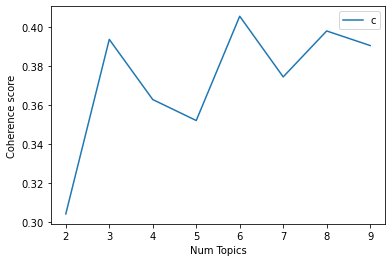

In [49]:
# -*- coding: utf-8 -*-
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

coherence_values = []
model_list = []

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 10;
    start = 2;
    step = 1;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

if __name__ == '__main__':
    
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    # 최적의 토픽 수 찾기
    find_optimal_number_of_topics(dictionary, corpus, processed_data)

In [50]:
j=2
for i in range(len(coherence_values)+1):
    print(j,":",coherence_values[i])
    j+=1

2 : 0.3041142546222374
3 : 0.3935603784657559
4 : 0.3627259829636007
5 : 0.3519863838917792
6 : 0.4054262215005291
7 : 0.37434903610300735
8 : 0.3978856484364076
9 : 0.39041393305278094


IndexError: list index out of range

In [51]:
num_topics = 6
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every)

2022-06-17 14:10:45,786 : INFO : using autotuned alpha, starting with [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]
2022-06-17 14:10:45,787 : INFO : using serial LDA version on this node
2022-06-17 14:10:45,792 : INFO : running online (multi-pass) LDA training, 6 topics, 20 passes over the supplied corpus of 170959 documents, updating model once every 2000 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2022-06-17 14:10:45,793 : INFO : PROGRESS: pass 0, at document #2000/170959
2022-06-17 14:10:46,125 : INFO : optimized alpha [0.16414465, 0.13320665, 0.14140499, 0.13076696, 0.13142893, 0.15114719]
2022-06-17 14:10:46,136 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:46,139 : INFO : topic #3 (0.131): 0.037*"게임" + 0.033*"친구" + 0.023*"업데이트" + 0.021*"렉" + 0.021*"망겜" + 0.019*"서버" + 0.018*"벅스" + 0.016*"추천" + 0.016*"로벅" + 0.015*"플레이"
2022-06-17 14:10:46,140 :

2022-06-17 14:10:47,371 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:47,375 : INFO : topic #1 (0.119): 0.045*"로블" + 0.043*"입양" + 0.031*"거래" + 0.029*"돈" + 0.028*"폰" + 0.020*"렉" + 0.015*"사람" + 0.015*"유저" + 0.012*"타워" + 0.011*"현질"
2022-06-17 14:10:47,375 : INFO : topic #2 (0.132): 0.090*"겜" + 0.076*"게임" + 0.028*"신고" + 0.027*"사람" + 0.019*"버그" + 0.018*"욕" + 0.012*"잼민" + 0.012*"유저" + 0.011*"현질" + 0.010*"채팅"
2022-06-17 14:10:47,375 : INFO : topic #3 (0.133): 0.071*"렉" + 0.057*"친구" + 0.052*"서버" + 0.047*"해킹" + 0.032*"게임" + 0.030*"업데이트" + 0.030*"추천" + 0.027*"망겜" + 0.019*"로벅" + 0.018*"앱"
2022-06-17 14:10:47,376 : INFO : topic #5 (0.171): 0.079*"게임" + 0.068*"버그" + 0.041*"맵" + 0.030*"유저" + 0.025*"화면" + 0.025*"단점" + 0.025*"사람" + 0.021*"장점" + 0.017*"핵" + 0.016*"점프"
2022-06-17 14:10:47,376 : INFO : topic #0 (0.240): 0.190*"게임" + 0.028*"계정" + 0.028*"재미" + 0.021*"광고" + 0.020*"벅스" + 0.019*"입양" + 0.018*"랙" + 0.017*"여러가지" + 0.017*"현질" + 0.015*"로그인"
2022-06-

2022-06-17 14:10:48,447 : INFO : topic #0 (0.314): 0.224*"게임" + 0.032*"재미" + 0.028*"계정" + 0.022*"랙" + 0.021*"여러가지" + 0.021*"로그인" + 0.020*"광고" + 0.014*"별" + 0.014*"입양" + 0.014*"추천"
2022-06-17 14:10:48,447 : INFO : topic diff=0.195293, rho=0.277350
2022-06-17 14:10:48,452 : INFO : PROGRESS: pass 0, at document #28000/170959
2022-06-17 14:10:48,609 : INFO : optimized alpha [0.32775682, 0.12728658, 0.14452831, 0.15173857, 0.15082327, 0.20572422]
2022-06-17 14:10:48,612 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:48,615 : INFO : topic #1 (0.127): 0.062*"로블" + 0.051*"입양" + 0.027*"폰" + 0.025*"거래" + 0.023*"돈" + 0.018*"갓" + 0.016*"유저" + 0.013*"연결" + 0.013*"렉" + 0.012*"사람"
2022-06-17 14:10:48,615 : INFO : topic #2 (0.145): 0.093*"겜" + 0.062*"게임" + 0.039*"신고" + 0.038*"사람" + 0.026*"욕" + 0.019*"잼민" + 0.014*"핵" + 0.013*"문제" + 0.012*"로블" + 0.012*"채팅"
2022-06-17 14:10:48,616 : INFO : topic #3 (0.152): 0.152*"렉" + 0.077*"서버" + 0.049*"해킹" + 0.043*"친구" +

2022-06-17 14:10:49,548 : INFO : topic #2 (0.150): 0.094*"겜" + 0.050*"신고" + 0.042*"사람" + 0.041*"게임" + 0.024*"욕" + 0.018*"문제" + 0.015*"잼민" + 0.014*"로블" + 0.012*"핵" + 0.012*"사기"
2022-06-17 14:10:49,549 : INFO : topic #3 (0.182): 0.205*"서버" + 0.100*"해킹" + 0.074*"렉" + 0.057*"업데이트" + 0.028*"망겜" + 0.025*"친구" + 0.019*"계정" + 0.017*"추천" + 0.010*"앱" + 0.009*"로블"
2022-06-17 14:10:49,549 : INFO : topic #5 (0.216): 0.085*"버그" + 0.048*"게임" + 0.037*"맵" + 0.035*"유저" + 0.033*"화면" + 0.023*"단점" + 0.020*"핵" + 0.018*"점프" + 0.017*"사람" + 0.015*"장점"
2022-06-17 14:10:49,550 : INFO : topic #0 (0.469): 0.130*"게임" + 0.093*"로그인" + 0.064*"계정" + 0.059*"오류" + 0.032*"가입" + 0.030*"회원" + 0.017*"복구" + 0.015*"로그아웃" + 0.014*"재미" + 0.014*"별"
2022-06-17 14:10:49,550 : INFO : topic diff=0.157274, rho=0.223607
2022-06-17 14:10:49,555 : INFO : PROGRESS: pass 0, at document #42000/170959
2022-06-17 14:10:49,688 : INFO : optimized alpha [0.4763846, 0.14319392, 0.15246479, 0.18316303, 0.16462037, 0.222645]
2022-06-17 14:10:49,697 

2022-06-17 14:10:50,469 : INFO : topic diff=0.158485, rho=0.196116
2022-06-17 14:10:50,474 : INFO : PROGRESS: pass 0, at document #54000/170959
2022-06-17 14:10:50,606 : INFO : optimized alpha [0.5265405, 0.16015023, 0.1716915, 0.19266228, 0.18430033, 0.26250193]
2022-06-17 14:10:50,614 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:50,617 : INFO : topic #1 (0.160): 0.110*"입양" + 0.064*"로블" + 0.043*"거래" + 0.031*"사기" + 0.025*"폰" + 0.025*"연결" + 0.023*"돈" + 0.020*"와이파이" + 0.015*"환불" + 0.014*"유저"
2022-06-17 14:10:50,617 : INFO : topic #2 (0.172): 0.094*"겜" + 0.055*"신고" + 0.045*"사람" + 0.040*"게임" + 0.035*"욕" + 0.022*"잼민" + 0.016*"문제" + 0.016*"숫자" + 0.015*"사기" + 0.014*"저작권"
2022-06-17 14:10:50,618 : INFO : topic #3 (0.193): 0.139*"렉" + 0.088*"해킹" + 0.079*"서버" + 0.068*"업데이트" + 0.028*"망겜" + 0.027*"추천" + 0.026*"친구" + 0.013*"설치" + 0.010*"앱" + 0.010*"개꿀잼"
2022-06-17 14:10:50,618 : INFO : topic #5 (0.263): 0.077*"버그" + 0.057*"맵" + 0.053*"게임" + 0.034*"유

2022-06-17 14:10:51,475 : INFO : topic #3 (0.203): 0.171*"렉" + 0.097*"해킹" + 0.076*"업데이트" + 0.050*"서버" + 0.023*"망겜" + 0.022*"친구" + 0.017*"추천" + 0.016*"설치" + 0.013*"개꿀잼" + 0.013*"무제"
2022-06-17 14:10:51,475 : INFO : topic #5 (0.294): 0.072*"버그" + 0.070*"맵" + 0.044*"게임" + 0.035*"점프" + 0.032*"유저" + 0.029*"단점" + 0.026*"화면" + 0.016*"플레이" + 0.016*"핵" + 0.014*"장점"
2022-06-17 14:10:51,475 : INFO : topic #0 (0.607): 0.216*"게임" + 0.042*"계정" + 0.029*"로그인" + 0.027*"재미" + 0.022*"별" + 0.020*"랙" + 0.019*"추천" + 0.019*"여러가지" + 0.019*"오류" + 0.016*"친구"
2022-06-17 14:10:51,476 : INFO : topic diff=0.141780, rho=0.174078
2022-06-17 14:10:51,481 : INFO : PROGRESS: pass 0, at document #68000/170959
2022-06-17 14:10:51,590 : INFO : optimized alpha [0.6199897, 0.183549, 0.19019926, 0.20411511, 0.20359632, 0.30022883]
2022-06-17 14:10:51,608 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:51,611 : INFO : topic #1 (0.184): 0.131*"입양" + 0.054*"로블" + 0.052*"거래" + 0.043*

2022-06-17 14:10:52,406 : INFO : optimized alpha [0.69578546, 0.20414257, 0.2050216, 0.21056318, 0.21606596, 0.33459046]
2022-06-17 14:10:52,410 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:52,412 : INFO : topic #1 (0.204): 0.147*"입양" + 0.054*"거래" + 0.048*"로블" + 0.046*"사기" + 0.032*"폰" + 0.021*"연결" + 0.017*"와이파이" + 0.014*"돈" + 0.013*"환불" + 0.012*"사랑"
2022-06-17 14:10:52,413 : INFO : topic #2 (0.205): 0.087*"겜" + 0.059*"신고" + 0.048*"사람" + 0.039*"욕" + 0.032*"숫자" + 0.022*"게임" + 0.021*"샵" + 0.021*"처리" + 0.019*"잼민" + 0.014*"채팅"
2022-06-17 14:10:52,413 : INFO : topic #4 (0.216): 0.142*"현질" + 0.102*"벅스" + 0.028*"옷" + 0.024*"돈" + 0.019*"로벅" + 0.019*"유도" + 0.019*"무료" + 0.016*"킹" + 0.014*"피스" + 0.013*"아이템"
2022-06-17 14:10:52,414 : INFO : topic #5 (0.335): 0.090*"맵" + 0.063*"버그" + 0.049*"점프" + 0.034*"게임" + 0.029*"유저" + 0.026*"화면" + 0.026*"단점" + 0.017*"플레이" + 0.016*"컴퓨터" + 0.016*"핵"
2022-06-17 14:10:52,414 : INFO : topic #0 (0.696): 0.221*"게임" + 0.

2022-06-17 14:10:53,181 : INFO : topic #5 (0.365): 0.094*"맵" + 0.067*"버그" + 0.051*"점프" + 0.027*"게임" + 0.026*"화면" + 0.025*"유저" + 0.024*"단점" + 0.017*"핵" + 0.016*"컴퓨터" + 0.016*"사람"
2022-06-17 14:10:53,181 : INFO : topic #0 (0.774): 0.217*"게임" + 0.035*"계정" + 0.029*"재미" + 0.026*"별" + 0.024*"로그인" + 0.024*"추천" + 0.021*"친구" + 0.021*"랙" + 0.019*"여러가지" + 0.016*"오류"
2022-06-17 14:10:53,182 : INFO : topic diff=0.117786, rho=0.147442
2022-06-17 14:10:53,187 : INFO : PROGRESS: pass 0, at document #94000/170959
2022-06-17 14:10:53,299 : INFO : optimized alpha [0.7841208, 0.23392022, 0.22018878, 0.22271895, 0.22839515, 0.36745125]
2022-06-17 14:10:53,301 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:53,304 : INFO : topic #2 (0.220): 0.081*"겜" + 0.061*"신고" + 0.055*"사람" + 0.038*"욕" + 0.031*"숫자" + 0.020*"샵" + 0.016*"채팅" + 0.015*"처리" + 0.015*"게임" + 0.014*"말"
2022-06-17 14:10:53,305 : INFO : topic #3 (0.223): 0.216*"렉" + 0.087*"해킹" + 0.078*"업데이트" + 0.038*"서버

2022-06-17 14:10:54,038 : INFO : topic #3 (0.231): 0.233*"렉" + 0.080*"해킹" + 0.068*"업데이트" + 0.034*"서버" + 0.021*"개꿀잼" + 0.020*"설치" + 0.018*"망겜" + 0.018*"무제" + 0.008*"친구" + 0.008*"조작"
2022-06-17 14:10:54,039 : INFO : topic #2 (0.232): 0.082*"겜" + 0.062*"신고" + 0.059*"사람" + 0.037*"욕" + 0.034*"숫자" + 0.019*"샵" + 0.019*"채팅" + 0.016*"말" + 0.014*"처리" + 0.011*"문제"
2022-06-17 14:10:54,039 : INFO : topic #1 (0.264): 0.197*"입양" + 0.087*"거래" + 0.058*"사기" + 0.030*"로블" + 0.028*"폰" + 0.020*"연결" + 0.018*"요가" + 0.017*"펫" + 0.015*"와이파이" + 0.013*"사람"
2022-06-17 14:10:54,040 : INFO : topic #5 (0.384): 0.093*"맵" + 0.063*"버그" + 0.054*"점프" + 0.023*"유저" + 0.021*"핵" + 0.020*"게임" + 0.020*"단점" + 0.019*"컴퓨터" + 0.018*"화면" + 0.016*"사람"
2022-06-17 14:10:54,041 : INFO : topic #0 (0.841): 0.223*"게임" + 0.033*"재미" + 0.029*"계정" + 0.026*"별" + 0.025*"추천" + 0.021*"로그인" + 0.021*"랙" + 0.021*"친구" + 0.019*"여러가지" + 0.015*"앱"
2022-06-17 14:10:54,041 : INFO : topic diff=0.108035, rho=0.137361
2022-06-17 14:10:54,046 : INFO : PROGRESS

2022-06-17 14:10:54,747 : INFO : topic #0 (0.905): 0.227*"게임" + 0.035*"재미" + 0.028*"별" + 0.028*"계정" + 0.026*"추천" + 0.022*"친구" + 0.021*"랙" + 0.019*"여러가지" + 0.017*"로그인" + 0.015*"앱"
2022-06-17 14:10:54,747 : INFO : topic diff=0.097334, rho=0.130189
2022-06-17 14:10:54,753 : INFO : PROGRESS: pass 0, at document #120000/170959
2022-06-17 14:10:54,855 : INFO : optimized alpha [0.91825724, 0.29140174, 0.24733746, 0.2418458, 0.24803022, 0.40196747]
2022-06-17 14:10:54,858 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:54,861 : INFO : topic #3 (0.242): 0.230*"렉" + 0.073*"업데이트" + 0.072*"해킹" + 0.036*"서버" + 0.027*"개꿀잼" + 0.022*"설치" + 0.019*"무제" + 0.015*"망겜" + 0.012*"로딩" + 0.008*"조작"
2022-06-17 14:10:54,861 : INFO : topic #2 (0.247): 0.078*"겜" + 0.068*"신고" + 0.065*"사람" + 0.039*"숫자" + 0.033*"욕" + 0.020*"채팅" + 0.017*"말" + 0.016*"샵" + 0.011*"정지" + 0.011*"처리"
2022-06-17 14:10:54,862 : INFO : topic #1 (0.291): 0.221*"입양" + 0.061*"사기" + 0.043*"거래" + 0.031*"

2022-06-17 14:10:55,537 : INFO : topic #4 (0.255): 0.114*"현질" + 0.081*"벅스" + 0.045*"돈" + 0.022*"아이템" + 0.021*"무료" + 0.018*"물약" + 0.014*"옷" + 0.013*"데이터" + 0.012*"무재" + 0.012*"구매"
2022-06-17 14:10:55,538 : INFO : topic #1 (0.311): 0.207*"입양" + 0.058*"사기" + 0.037*"폰" + 0.028*"연결" + 0.026*"거래" + 0.025*"와이파이" + 0.024*"요가" + 0.019*"로블" + 0.018*"펫" + 0.015*"사랑"
2022-06-17 14:10:55,538 : INFO : topic #5 (0.417): 0.083*"맵" + 0.058*"버그" + 0.050*"점프" + 0.028*"컴퓨터" + 0.021*"화면" + 0.018*"핵" + 0.017*"모바일" + 0.016*"유저" + 0.015*"말" + 0.013*"플레이"
2022-06-17 14:10:55,539 : INFO : topic #0 (0.988): 0.225*"게임" + 0.036*"재미" + 0.028*"계정" + 0.026*"별" + 0.025*"친구" + 0.024*"추천" + 0.020*"랙" + 0.019*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2022-06-17 14:10:55,539 : INFO : topic diff=0.101190, rho=0.123091
2022-06-17 14:10:55,545 : INFO : PROGRESS: pass 0, at document #134000/170959
2022-06-17 14:10:55,625 : INFO : optimized alpha [1.0000302, 0.31277084, 0.25855747, 0.25443015, 0.2552176, 0.4204793]
2022-06-17 14:10:55,

2022-06-17 14:10:56,158 : INFO : topic diff=0.083364, rho=0.117851
2022-06-17 14:10:56,163 : INFO : PROGRESS: pass 0, at document #146000/170959
2022-06-17 14:10:56,252 : INFO : optimized alpha [1.0658497, 0.31449834, 0.2656676, 0.26440117, 0.25943464, 0.43622968]
2022-06-17 14:10:56,255 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:56,257 : INFO : topic #4 (0.259): 0.099*"현질" + 0.072*"벅스" + 0.048*"돈" + 0.021*"무료" + 0.017*"아이템" + 0.014*"무재" + 0.014*"옷" + 0.013*"안녕" + 0.010*"데이터" + 0.010*"구매"
2022-06-17 14:10:56,258 : INFO : topic #3 (0.264): 0.228*"렉" + 0.077*"업데이트" + 0.039*"개꿀잼" + 0.031*"설치" + 0.031*"해킹" + 0.028*"서버" + 0.021*"무제" + 0.016*"망겜" + 0.013*"조작" + 0.012*"로딩"
2022-06-17 14:10:56,258 : INFO : topic #1 (0.314): 0.146*"입양" + 0.045*"폰" + 0.040*"사기" + 0.028*"와이파이" + 0.024*"연결" + 0.021*"사랑" + 0.018*"요가" + 0.016*"로블" + 0.016*"거래" + 0.014*"펫"
2022-06-17 14:10:56,259 : INFO : topic #5 (0.436): 0.084*"맵" + 0.067*"점프" + 0.048*"버그" + 0.032

2022-06-17 14:10:56,883 : INFO : topic #1 (0.316): 0.082*"입양" + 0.076*"폰" + 0.026*"사기" + 0.025*"와이파이" + 0.024*"컴" + 0.024*"컨트롤" + 0.019*"사랑" + 0.018*"연결" + 0.015*"록스" + 0.014*"로블"
2022-06-17 14:10:56,883 : INFO : topic #5 (0.462): 0.072*"맵" + 0.056*"컴퓨터" + 0.053*"점프" + 0.041*"버그" + 0.024*"모바일" + 0.019*"핵" + 0.018*"터치" + 0.017*"화면" + 0.016*"말" + 0.015*"와우"
2022-06-17 14:10:56,883 : INFO : topic #0 (1.107): 0.219*"게임" + 0.042*"로그인" + 0.036*"재미" + 0.023*"별" + 0.023*"랙" + 0.022*"제작자" + 0.020*"친구" + 0.018*"계정" + 0.017*"영어" + 0.016*"한국어"
2022-06-17 14:10:56,883 : INFO : topic diff=0.098805, rho=0.112509
2022-06-17 14:10:56,892 : INFO : PROGRESS: pass 0, at document #160000/170959
2022-06-17 14:10:56,986 : INFO : optimized alpha [1.1159322, 0.31756172, 0.2806026, 0.27522442, 0.26638162, 0.46678582]
2022-06-17 14:10:56,989 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:56,992 : INFO : topic #4 (0.266): 0.081*"현질" + 0.066*"벅스" + 0.047*"돈" + 0.024*

2022-06-17 14:10:57,521 : INFO : PROGRESS: pass 0, at document #170959/170959
2022-06-17 14:10:57,565 : INFO : optimized alpha [1.1213305, 0.32549867, 0.29862043, 0.28289694, 0.27167693, 0.50002265]
2022-06-17 14:10:57,567 : INFO : merging changes from 959 documents into a model of 170959 documents
2022-06-17 14:10:57,570 : INFO : topic #4 (0.272): 0.058*"스킨" + 0.056*"현질" + 0.043*"돈" + 0.040*"벅스" + 0.030*"자동차" + 0.021*"무료" + 0.015*"아이템" + 0.015*"옷" + 0.014*"작자" + 0.014*"머더"
2022-06-17 14:10:57,571 : INFO : topic #3 (0.283): 0.241*"렉" + 0.045*"업데이트" + 0.029*"번역" + 0.029*"서버" + 0.026*"로딩" + 0.024*"조작" + 0.021*"개꿀잼" + 0.020*"설치" + 0.015*"패치" + 0.015*"화질"
2022-06-17 14:10:57,571 : INFO : topic #1 (0.325): 0.081*"폰" + 0.037*"입양" + 0.032*"운전" + 0.030*"컴" + 0.026*"컨트롤" + 0.021*"경도" + 0.020*"한국" + 0.019*"스피드" + 0.017*"사기" + 0.016*"와이파이"
2022-06-17 14:10:57,572 : INFO : topic #5 (0.500): 0.065*"컴퓨터" + 0.062*"맵" + 0.050*"점프" + 0.033*"한글" + 0.030*"모바일" + 0.024*"버그" + 0.023*"화면" + 0.020*"추가" + 0.0

2022-06-17 14:10:58,238 : INFO : topic #1 (0.332): 0.079*"입양" + 0.076*"로블" + 0.048*"폰" + 0.039*"사기" + 0.030*"거래" + 0.019*"한국" + 0.018*"펫" + 0.015*"컴" + 0.014*"와이파이" + 0.013*"연결"
2022-06-17 14:10:58,239 : INFO : topic #5 (0.527): 0.078*"버그" + 0.063*"맵" + 0.037*"점프" + 0.033*"유저" + 0.031*"화면" + 0.030*"컴퓨터" + 0.024*"단점" + 0.022*"핵" + 0.018*"모바일" + 0.017*"말"
2022-06-17 14:10:58,239 : INFO : topic #0 (1.153): 0.226*"게임" + 0.026*"별" + 0.024*"친구" + 0.024*"재미" + 0.024*"계정" + 0.022*"로그인" + 0.020*"제작자" + 0.018*"추천" + 0.017*"영어" + 0.016*"랙"
2022-06-17 14:10:58,240 : INFO : topic diff=0.136463, rho=0.106917
2022-06-17 14:10:58,245 : INFO : PROGRESS: pass 1, at document #14000/170959
2022-06-17 14:10:58,341 : INFO : optimized alpha [1.162876, 0.3327785, 0.31319353, 0.2912012, 0.29778713, 0.53267705]
2022-06-17 14:10:58,344 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:58,347 : INFO : topic #3 (0.291): 0.205*"렉" + 0.067*"해킹" + 0.067*"서버" + 0.055*"업데이트"

2022-06-17 14:10:58,976 : INFO : optimized alpha [1.2240916, 0.3403573, 0.32867658, 0.30073154, 0.31973678, 0.56356907]
2022-06-17 14:10:58,988 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:58,991 : INFO : topic #3 (0.301): 0.233*"렉" + 0.074*"서버" + 0.070*"해킹" + 0.051*"업데이트" + 0.035*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.010*"로딩" + 0.008*"조작"
2022-06-17 14:10:58,991 : INFO : topic #4 (0.320): 0.125*"현질" + 0.100*"벅스" + 0.038*"돈" + 0.029*"옷" + 0.026*"킹" + 0.025*"무료" + 0.025*"유도" + 0.024*"스킨" + 0.024*"로벅" + 0.021*"피스"
2022-06-17 14:10:58,992 : INFO : topic #1 (0.340): 0.097*"로블" + 0.090*"입양" + 0.046*"사기" + 0.037*"폰" + 0.029*"거래" + 0.021*"펫" + 0.016*"갓" + 0.015*"와이파이" + 0.014*"연결" + 0.012*"환불"
2022-06-17 14:10:58,992 : INFO : topic #5 (0.564): 0.099*"버그" + 0.064*"맵" + 0.042*"유저" + 0.034*"화면" + 0.032*"단점" + 0.032*"점프" + 0.028*"핵" + 0.021*"장점" + 0.019*"컴퓨터" + 0.018*"캐릭터"
2022-06-17 14:10:58,993 : INFO : topic #0 (1.224): 0.246*"게임" + 

2022-06-17 14:10:59,626 : INFO : topic #5 (0.569): 0.096*"버그" + 0.059*"맵" + 0.046*"유저" + 0.032*"화면" + 0.032*"단점" + 0.027*"핵" + 0.027*"점프" + 0.019*"장점" + 0.019*"말" + 0.016*"캐릭터"
2022-06-17 14:10:59,626 : INFO : topic #0 (1.349): 0.190*"게임" + 0.053*"로그인" + 0.044*"계정" + 0.031*"오류" + 0.023*"별" + 0.022*"친구" + 0.019*"가입" + 0.018*"재미" + 0.017*"회원" + 0.016*"추천"
2022-06-17 14:10:59,626 : INFO : topic diff=0.100122, rho=0.106917
2022-06-17 14:10:59,633 : INFO : PROGRESS: pass 1, at document #40000/170959
2022-06-17 14:10:59,724 : INFO : optimized alpha [1.3773525, 0.35695633, 0.33768734, 0.3307858, 0.33728832, 0.57096]
2022-06-17 14:10:59,728 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:10:59,731 : INFO : topic #3 (0.331): 0.200*"서버" + 0.150*"렉" + 0.106*"해킹" + 0.064*"업데이트" + 0.033*"망겜" + 0.013*"설치" + 0.010*"개꿀잼" + 0.009*"무제" + 0.007*"해커" + 0.007*"누가"
2022-06-17 14:10:59,731 : INFO : topic #4 (0.337): 0.133*"현질" + 0.088*"벅스" + 0.040*"돈" + 0.026*"킹" +

2022-06-17 14:11:00,355 : INFO : topic #3 (0.338): 0.186*"렉" + 0.128*"서버" + 0.101*"해킹" + 0.076*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.011*"개꿀잼" + 0.009*"무제" + 0.008*"보안" + 0.007*"로딩"
2022-06-17 14:11:00,355 : INFO : topic #2 (0.356): 0.106*"겜" + 0.080*"사람" + 0.058*"신고" + 0.040*"욕" + 0.021*"잼민" + 0.018*"채팅" + 0.018*"숫자" + 0.015*"말" + 0.015*"저작권" + 0.014*"처리"
2022-06-17 14:11:00,356 : INFO : topic #1 (0.370): 0.126*"입양" + 0.114*"로블" + 0.056*"사기" + 0.041*"거래" + 0.030*"폰" + 0.021*"연결" + 0.021*"와이파이" + 0.018*"펫" + 0.016*"환불" + 0.012*"업뎃"
2022-06-17 14:11:00,356 : INFO : topic #5 (0.602): 0.094*"버그" + 0.066*"맵" + 0.047*"유저" + 0.035*"화면" + 0.035*"단점" + 0.028*"점프" + 0.027*"핵" + 0.019*"캐릭터" + 0.019*"장점" + 0.019*"말"
2022-06-17 14:11:00,357 : INFO : topic #0 (1.404): 0.210*"게임" + 0.039*"계정" + 0.038*"로그인" + 0.026*"별" + 0.025*"오류" + 0.024*"친구" + 0.020*"재미" + 0.019*"추천" + 0.015*"랙" + 0.014*"여러가지"
2022-06-17 14:11:00,357 : INFO : topic diff=0.102071, rho=0.106917
2022-06-17 14:11:00,363 : INFO : PROGRE

2022-06-17 14:11:00,978 : INFO : topic #0 (1.461): 0.216*"게임" + 0.039*"계정" + 0.030*"로그인" + 0.027*"별" + 0.024*"친구" + 0.021*"재미" + 0.020*"오류" + 0.020*"추천" + 0.016*"랙" + 0.015*"여러가지"
2022-06-17 14:11:00,979 : INFO : topic diff=0.098622, rho=0.106917
2022-06-17 14:11:00,984 : INFO : PROGRESS: pass 1, at document #66000/170959
2022-06-17 14:11:01,059 : INFO : optimized alpha [1.4664292, 0.39221004, 0.37496462, 0.34864408, 0.3851613, 0.6328926]
2022-06-17 14:11:01,076 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:01,078 : INFO : topic #3 (0.349): 0.206*"렉" + 0.107*"해킹" + 0.082*"서버" + 0.080*"업데이트" + 0.028*"망겜" + 0.017*"설치" + 0.013*"개꿀잼" + 0.012*"무제" + 0.012*"보안" + 0.009*"로딩"
2022-06-17 14:11:01,079 : INFO : topic #2 (0.375): 0.101*"겜" + 0.079*"사람" + 0.058*"신고" + 0.040*"욕" + 0.024*"잼민" + 0.022*"숫자" + 0.019*"채팅" + 0.015*"말" + 0.014*"샵" + 0.014*"처리"
2022-06-17 14:11:01,080 : INFO : topic #1 (0.392): 0.145*"입양" + 0.094*"로블" + 0.063*"사기" + 0.047*"거래

2022-06-17 14:11:01,684 : INFO : topic #2 (0.392): 0.096*"겜" + 0.080*"사람" + 0.062*"신고" + 0.043*"욕" + 0.034*"숫자" + 0.022*"잼민" + 0.021*"처리" + 0.021*"채팅" + 0.019*"샵" + 0.014*"말"
2022-06-17 14:11:01,684 : INFO : topic #1 (0.410): 0.160*"입양" + 0.081*"로블" + 0.066*"사기" + 0.055*"거래" + 0.033*"폰" + 0.020*"와이파이" + 0.019*"연결" + 0.017*"펫" + 0.014*"환불" + 0.012*"사랑"
2022-06-17 14:11:01,684 : INFO : topic #5 (0.660): 0.094*"맵" + 0.074*"버그" + 0.047*"점프" + 0.042*"유저" + 0.030*"단점" + 0.029*"화면" + 0.025*"핵" + 0.018*"캐릭터" + 0.017*"말" + 0.017*"컴퓨터"
2022-06-17 14:11:01,684 : INFO : topic #0 (1.519): 0.221*"게임" + 0.033*"계정" + 0.029*"별" + 0.026*"친구" + 0.024*"재미" + 0.023*"추천" + 0.023*"로그인" + 0.018*"랙" + 0.017*"여러가지" + 0.016*"오류"
2022-06-17 14:11:01,684 : INFO : topic diff=0.076992, rho=0.106917
2022-06-17 14:11:01,692 : INFO : PROGRESS: pass 1, at document #80000/170959
2022-06-17 14:11:01,781 : INFO : optimized alpha [1.5274309, 0.41451785, 0.39392018, 0.3545614, 0.4009533, 0.6672348]
2022-06-17 14:11:01,783 : 

2022-06-17 14:11:02,288 : INFO : topic diff=0.085143, rho=0.106917
2022-06-17 14:11:02,293 : INFO : PROGRESS: pass 1, at document #92000/170959
2022-06-17 14:11:02,377 : INFO : optimized alpha [1.5802228, 0.4398467, 0.4068774, 0.3639827, 0.41094643, 0.6908946]
2022-06-17 14:11:02,380 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:02,383 : INFO : topic #3 (0.364): 0.237*"렉" + 0.097*"해킹" + 0.078*"업데이트" + 0.050*"서버" + 0.021*"설치" + 0.019*"망겜" + 0.018*"개꿀잼" + 0.013*"무제" + 0.007*"조작" + 0.007*"로딩"
2022-06-17 14:11:02,384 : INFO : topic #2 (0.407): 0.088*"사람" + 0.087*"겜" + 0.066*"신고" + 0.041*"욕" + 0.033*"숫자" + 0.022*"채팅" + 0.020*"샵" + 0.017*"잼민" + 0.017*"처리" + 0.015*"말"
2022-06-17 14:11:02,384 : INFO : topic #1 (0.440): 0.171*"입양" + 0.068*"사기" + 0.068*"로블" + 0.066*"거래" + 0.030*"폰" + 0.026*"연결" + 0.023*"와이파이" + 0.020*"펫" + 0.012*"환불" + 0.012*"사랑"
2022-06-17 14:11:02,385 : INFO : topic #5 (0.691): 0.099*"맵" + 0.073*"버그" + 0.052*"점프" + 0.036*"유저" + 

2022-06-17 14:11:02,969 : INFO : topic #1 (0.474): 0.201*"입양" + 0.093*"거래" + 0.070*"사기" + 0.048*"로블" + 0.028*"폰" + 0.021*"연결" + 0.020*"펫" + 0.019*"와이파이" + 0.017*"요가" + 0.012*"사랑"
2022-06-17 14:11:02,970 : INFO : topic #5 (0.696): 0.098*"맵" + 0.068*"버그" + 0.055*"점프" + 0.033*"유저" + 0.026*"핵" + 0.024*"단점" + 0.022*"화면" + 0.020*"컴퓨터" + 0.019*"말" + 0.015*"캐릭터"
2022-06-17 14:11:02,970 : INFO : topic #0 (1.607): 0.217*"게임" + 0.029*"계정" + 0.029*"별" + 0.028*"재미" + 0.025*"친구" + 0.024*"추천" + 0.020*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.014*"앱"
2022-06-17 14:11:02,971 : INFO : topic diff=0.080393, rho=0.106917
2022-06-17 14:11:02,976 : INFO : PROGRESS: pass 1, at document #106000/170959
2022-06-17 14:11:03,059 : INFO : optimized alpha [1.6174607, 0.47805125, 0.4213686, 0.37181544, 0.41908264, 0.6992799]
2022-06-17 14:11:03,062 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:03,065 : INFO : topic #3 (0.372): 0.246*"렉" + 0.087*"해킹" + 0.072*"업데이트" + 0.041*"

2022-06-17 14:11:03,625 : INFO : optimized alpha [1.6658494, 0.50232714, 0.43551973, 0.3817298, 0.4271354, 0.70818996]
2022-06-17 14:11:03,634 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:03,637 : INFO : topic #3 (0.382): 0.243*"렉" + 0.081*"해킹" + 0.073*"업데이트" + 0.038*"서버" + 0.023*"개꿀잼" + 0.022*"설치" + 0.018*"무제" + 0.016*"망겜" + 0.012*"로딩" + 0.008*"조작"
2022-06-17 14:11:03,638 : INFO : topic #4 (0.427): 0.137*"현질" + 0.094*"벅스" + 0.054*"돈" + 0.026*"아이템" + 0.025*"옷" + 0.023*"무료" + 0.016*"피기" + 0.016*"유도" + 0.013*"스킨" + 0.013*"물약"
2022-06-17 14:11:03,638 : INFO : topic #1 (0.502): 0.222*"입양" + 0.070*"사기" + 0.053*"거래" + 0.040*"로블" + 0.032*"폰" + 0.023*"연결" + 0.022*"요가" + 0.022*"와이파이" + 0.019*"펫" + 0.014*"사랑"
2022-06-17 14:11:03,638 : INFO : topic #5 (0.708): 0.094*"맵" + 0.069*"버그" + 0.050*"점프" + 0.028*"유저" + 0.026*"핵" + 0.024*"컴퓨터" + 0.019*"화면" + 0.018*"단점" + 0.018*"말" + 0.015*"문제"
2022-06-17 14:11:03,639 : INFO : topic #0 (1.666): 0.221*"게임" + 

2022-06-17 14:11:04,198 : INFO : topic #5 (0.715): 0.088*"맵" + 0.062*"버그" + 0.050*"점프" + 0.027*"컴퓨터" + 0.023*"핵" + 0.023*"화면" + 0.023*"유저" + 0.018*"말" + 0.017*"모바일" + 0.014*"단점"
2022-06-17 14:11:04,198 : INFO : topic #0 (1.725): 0.219*"게임" + 0.033*"재미" + 0.028*"별" + 0.028*"계정" + 0.027*"친구" + 0.024*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.014*"앱"
2022-06-17 14:11:04,199 : INFO : topic diff=0.082650, rho=0.106917
2022-06-17 14:11:04,204 : INFO : PROGRESS: pass 1, at document #132000/170959
2022-06-17 14:11:04,275 : INFO : optimized alpha [1.7357252, 0.52586246, 0.44686624, 0.39475918, 0.43343553, 0.7175465]
2022-06-17 14:11:04,285 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:04,288 : INFO : topic #3 (0.395): 0.232*"렉" + 0.070*"업데이트" + 0.055*"해킹" + 0.042*"서버" + 0.030*"개꿀잼" + 0.027*"설치" + 0.019*"무제" + 0.018*"로딩" + 0.016*"망겜" + 0.008*"조작"
2022-06-17 14:11:04,288 : INFO : topic #4 (0.433): 0.122*"현질" + 0.084*"벅스" + 0.059*"돈" + 0.027*

2022-06-17 14:11:04,820 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:04,823 : INFO : topic #3 (0.407): 0.230*"렉" + 0.077*"업데이트" + 0.038*"개꿀잼" + 0.037*"해킹" + 0.031*"서버" + 0.030*"설치" + 0.022*"무제" + 0.016*"망겜" + 0.014*"로딩" + 0.012*"조작"
2022-06-17 14:11:04,823 : INFO : topic #4 (0.435): 0.108*"현질" + 0.076*"벅스" + 0.058*"돈" + 0.022*"무료" + 0.022*"아이템" + 0.018*"옷" + 0.015*"스킨" + 0.014*"무재" + 0.012*"안녕" + 0.012*"물약"
2022-06-17 14:11:04,824 : INFO : topic #1 (0.525): 0.170*"입양" + 0.052*"사기" + 0.042*"폰" + 0.031*"와이파이" + 0.025*"연결" + 0.023*"로블" + 0.021*"거래" + 0.020*"사랑" + 0.020*"요가" + 0.017*"펫"
2022-06-17 14:11:04,824 : INFO : topic #5 (0.731): 0.087*"맵" + 0.069*"점프" + 0.053*"버그" + 0.030*"컴퓨터" + 0.019*"핵" + 0.018*"모바일" + 0.018*"화면" + 0.017*"유저" + 0.017*"말" + 0.015*"캐릭터"
2022-06-17 14:11:04,825 : INFO : topic #0 (1.801): 0.227*"게임" + 0.042*"재미" + 0.027*"별" + 0.026*"친구" + 0.023*"계정" + 0.021*"추천" + 0.021*"랙" + 0.018*"여러가지" + 0.018*"로그인" + 0.015*"제작자"


2022-06-17 14:11:05,363 : INFO : topic #5 (0.758): 0.077*"맵" + 0.056*"점프" + 0.051*"컴퓨터" + 0.046*"버그" + 0.023*"모바일" + 0.022*"핵" + 0.019*"터치" + 0.018*"핸드폰" + 0.018*"유저" + 0.017*"화면"
2022-06-17 14:11:05,363 : INFO : topic #0 (1.824): 0.222*"게임" + 0.037*"재미" + 0.028*"로그인" + 0.024*"별" + 0.023*"랙" + 0.023*"제작자" + 0.022*"친구" + 0.018*"계정" + 0.017*"추천" + 0.013*"여러가지"
2022-06-17 14:11:05,363 : INFO : topic diff=0.086493, rho=0.106917
2022-06-17 14:11:05,369 : INFO : PROGRESS: pass 1, at document #158000/170959
2022-06-17 14:11:05,443 : INFO : optimized alpha [1.8399637, 0.52058655, 0.46856388, 0.42021334, 0.43906942, 0.76155597]
2022-06-17 14:11:05,452 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:05,455 : INFO : topic #3 (0.420): 0.261*"렉" + 0.066*"업데이트" + 0.032*"개꿀잼" + 0.029*"설치" + 0.024*"서버" + 0.022*"해킹" + 0.019*"조작" + 0.015*"무제" + 0.014*"망겜" + 0.013*"번역"
2022-06-17 14:11:05,456 : INFO : topic #4 (0.439): 0.090*"현질" + 0.072*"벅스" + 0.055*"돈" + 0

2022-06-17 14:11:05,998 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:06,001 : INFO : topic #3 (0.428): 0.252*"렉" + 0.050*"업데이트" + 0.030*"서버" + 0.026*"로딩" + 0.026*"번역" + 0.023*"조작" + 0.022*"설치" + 0.021*"개꿀잼" + 0.015*"화질" + 0.014*"패치"
2022-06-17 14:11:06,002 : INFO : topic #4 (0.442): 0.067*"현질" + 0.061*"스킨" + 0.047*"돈" + 0.047*"벅스" + 0.031*"자동차" + 0.022*"무료" + 0.018*"아이템" + 0.017*"옷" + 0.013*"안녕" + 0.012*"작자"
2022-06-17 14:11:06,002 : INFO : topic #1 (0.526): 0.078*"폰" + 0.049*"입양" + 0.031*"운전" + 0.029*"컴" + 0.027*"컨트롤" + 0.022*"경도" + 0.021*"사기" + 0.020*"한국" + 0.018*"와이파이" + 0.017*"스피드"
2022-06-17 14:11:06,002 : INFO : topic #5 (0.801): 0.065*"맵" + 0.064*"컴퓨터" + 0.052*"점프" + 0.029*"한글" + 0.029*"모바일" + 0.027*"버그" + 0.023*"핸드폰" + 0.023*"추가" + 0.022*"화면" + 0.017*"말"
2022-06-17 14:11:06,003 : INFO : topic #0 (1.831): 0.191*"게임" + 0.041*"영어" + 0.037*"제작자" + 0.033*"로그인" + 0.030*"별" + 0.029*"재미" + 0.028*"한국어" + 0.021*"랙" + 0.017*"친구" + 0.015*"플

2022-06-17 14:11:06,525 : INFO : topic #5 (0.826): 0.075*"버그" + 0.063*"맵" + 0.041*"점프" + 0.035*"유저" + 0.033*"컴퓨터" + 0.031*"화면" + 0.023*"핵" + 0.022*"단점" + 0.021*"캐릭터" + 0.020*"모바일"
2022-06-17 14:11:06,525 : INFO : topic #0 (1.835): 0.217*"게임" + 0.027*"별" + 0.024*"재미" + 0.024*"제작자" + 0.023*"친구" + 0.023*"계정" + 0.022*"로그인" + 0.021*"영어" + 0.018*"추천" + 0.017*"랙"
2022-06-17 14:11:06,526 : INFO : topic diff=0.154582, rho=0.106311
2022-06-17 14:11:06,531 : INFO : PROGRESS: pass 2, at document #12000/170959
2022-06-17 14:11:06,608 : INFO : optimized alpha [1.8405175, 0.525021, 0.50557315, 0.4328072, 0.46892193, 0.8311718]
2022-06-17 14:11:06,615 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:06,618 : INFO : topic #3 (0.433): 0.207*"렉" + 0.068*"해킹" + 0.064*"서버" + 0.055*"업데이트" + 0.026*"망겜" + 0.018*"개꿀잼" + 0.016*"로딩" + 0.016*"설치" + 0.014*"번역" + 0.011*"조작"
2022-06-17 14:11:06,619 : INFO : topic #4 (0.469): 0.123*"현질" + 0.095*"벅스" + 0.048*"돈" + 0.033*"스

2022-06-17 14:11:07,184 : INFO : topic #3 (0.439): 0.215*"렉" + 0.073*"해킹" + 0.073*"서버" + 0.053*"업데이트" + 0.034*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.011*"로딩" + 0.009*"해커"
2022-06-17 14:11:07,184 : INFO : topic #4 (0.496): 0.130*"현질" + 0.103*"벅스" + 0.041*"돈" + 0.031*"옷" + 0.027*"스킨" + 0.026*"유도" + 0.026*"무료" + 0.026*"킹" + 0.024*"로벅" + 0.021*"피스"
2022-06-17 14:11:07,185 : INFO : topic #1 (0.526): 0.110*"로블" + 0.090*"입양" + 0.050*"사기" + 0.040*"폰" + 0.029*"거래" + 0.022*"펫" + 0.017*"갓" + 0.015*"와이파이" + 0.014*"연결" + 0.013*"한국"
2022-06-17 14:11:07,185 : INFO : topic #5 (0.863): 0.100*"버그" + 0.066*"맵" + 0.046*"유저" + 0.034*"화면" + 0.033*"점프" + 0.032*"단점" + 0.028*"핵" + 0.023*"캐릭터" + 0.021*"장점" + 0.021*"컴퓨터"
2022-06-17 14:11:07,186 : INFO : topic #0 (1.886): 0.240*"게임" + 0.028*"친구" + 0.025*"별" + 0.024*"계정" + 0.024*"재미" + 0.021*"추천" + 0.018*"로그인" + 0.018*"제작자" + 0.016*"광고" + 0.016*"플레이"
2022-06-17 14:11:07,186 : INFO : topic diff=0.107343, rho=0.106311
2022-06-17 14:11:07,192 : INFO : PROGR

2022-06-17 14:11:07,746 : INFO : topic #0 (1.995): 0.203*"게임" + 0.042*"로그인" + 0.039*"계정" + 0.024*"별" + 0.023*"친구" + 0.021*"오류" + 0.019*"재미" + 0.017*"추천" + 0.016*"제작자" + 0.015*"가입"
2022-06-17 14:11:07,746 : INFO : topic diff=0.106540, rho=0.106311
2022-06-17 14:11:07,751 : INFO : PROGRESS: pass 2, at document #38000/170959
2022-06-17 14:11:07,825 : INFO : optimized alpha [2.0341578, 0.53854036, 0.5284645, 0.47342512, 0.51330286, 0.8634323]
2022-06-17 14:11:07,835 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:07,838 : INFO : topic #3 (0.473): 0.210*"서버" + 0.156*"렉" + 0.091*"해킹" + 0.061*"업데이트" + 0.033*"망겜" + 0.014*"설치" + 0.011*"개꿀잼" + 0.009*"무제" + 0.007*"누가" + 0.006*"우리"
2022-06-17 14:11:07,839 : INFO : topic #4 (0.513): 0.134*"현질" + 0.093*"벅스" + 0.041*"돈" + 0.027*"피스" + 0.027*"킹" + 0.027*"옷" + 0.024*"로벅" + 0.022*"스킨" + 0.022*"유도" + 0.020*"무료"
2022-06-17 14:11:07,839 : INFO : topic #1 (0.539): 0.156*"로블" + 0.104*"입양" + 0.046*"사기" + 0.031*"폰

2022-06-17 14:11:08,399 : INFO : topic #4 (0.537): 0.137*"현질" + 0.096*"벅스" + 0.042*"돈" + 0.036*"옷" + 0.029*"킹" + 0.026*"피스" + 0.025*"스킨" + 0.025*"로벅" + 0.023*"아이템" + 0.022*"유도"
2022-06-17 14:11:08,399 : INFO : topic #1 (0.547): 0.128*"입양" + 0.127*"로블" + 0.058*"사기" + 0.041*"거래" + 0.031*"폰" + 0.019*"연결" + 0.019*"와이파이" + 0.018*"펫" + 0.015*"환불" + 0.013*"업뎃"
2022-06-17 14:11:08,400 : INFO : topic #5 (0.889): 0.095*"버그" + 0.066*"맵" + 0.055*"유저" + 0.034*"단점" + 0.033*"화면" + 0.029*"핵" + 0.029*"점프" + 0.024*"캐릭터" + 0.022*"문제" + 0.019*"말"
2022-06-17 14:11:08,400 : INFO : topic #0 (2.066): 0.205*"게임" + 0.040*"로그인" + 0.039*"계정" + 0.026*"오류" + 0.026*"별" + 0.024*"친구" + 0.019*"재미" + 0.017*"추천" + 0.014*"제작자" + 0.014*"가입"
2022-06-17 14:11:08,400 : INFO : topic diff=0.113132, rho=0.106311
2022-06-17 14:11:08,406 : INFO : PROGRESS: pass 2, at document #52000/170959
2022-06-17 14:11:08,476 : INFO : optimized alpha [2.0718894, 0.5485998, 0.54704475, 0.47998968, 0.5403722, 0.89382875]
2022-06-17 14:11:08,488 

2022-06-17 14:11:08,959 : INFO : topic diff=0.088645, rho=0.106311
2022-06-17 14:11:08,965 : INFO : PROGRESS: pass 2, at document #64000/170959
2022-06-17 14:11:09,042 : INFO : optimized alpha [2.1179228, 0.56552166, 0.5618379, 0.4868411, 0.56253654, 0.91828066]
2022-06-17 14:11:09,047 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:09,050 : INFO : topic #3 (0.487): 0.201*"렉" + 0.109*"해킹" + 0.090*"서버" + 0.079*"업데이트" + 0.030*"망겜" + 0.016*"설치" + 0.013*"개꿀잼" + 0.013*"보안" + 0.012*"무제" + 0.009*"로딩"
2022-06-17 14:11:09,051 : INFO : topic #2 (0.562): 0.104*"사람" + 0.102*"겜" + 0.057*"신고" + 0.039*"욕" + 0.024*"잼민" + 0.023*"채팅" + 0.021*"숫자" + 0.015*"말" + 0.015*"저작권" + 0.013*"처리"
2022-06-17 14:11:09,051 : INFO : topic #1 (0.566): 0.144*"입양" + 0.107*"로블" + 0.063*"사기" + 0.046*"거래" + 0.032*"폰" + 0.022*"연결" + 0.022*"와이파이" + 0.018*"펫" + 0.014*"환불" + 0.011*"인터넷"
2022-06-17 14:11:09,051 : INFO : topic #5 (0.918): 0.088*"버그" + 0.075*"맵" + 0.054*"유저" + 0.034*"점

2022-06-17 14:11:09,601 : INFO : topic #1 (0.584): 0.159*"입양" + 0.087*"로블" + 0.066*"사기" + 0.053*"거래" + 0.034*"폰" + 0.021*"와이파이" + 0.021*"연결" + 0.018*"펫" + 0.015*"환불" + 0.011*"집"
2022-06-17 14:11:09,601 : INFO : topic #5 (0.942): 0.089*"맵" + 0.076*"버그" + 0.048*"유저" + 0.046*"점프" + 0.031*"단점" + 0.031*"화면" + 0.027*"핵" + 0.021*"캐릭터" + 0.020*"문제" + 0.018*"말"
2022-06-17 14:11:09,602 : INFO : topic #0 (2.156): 0.219*"게임" + 0.034*"계정" + 0.029*"별" + 0.026*"친구" + 0.024*"로그인" + 0.023*"재미" + 0.023*"추천" + 0.017*"랙" + 0.016*"오류" + 0.016*"여러가지"
2022-06-17 14:11:09,602 : INFO : topic diff=0.090238, rho=0.106311
2022-06-17 14:11:09,607 : INFO : PROGRESS: pass 2, at document #78000/170959
2022-06-17 14:11:09,675 : INFO : optimized alpha [2.1610935, 0.5865145, 0.58005804, 0.48945725, 0.57441866, 0.946042]
2022-06-17 14:11:09,687 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:09,690 : INFO : topic #3 (0.489): 0.227*"렉" + 0.101*"해킹" + 0.081*"업데이트" + 0.060*"서버"

2022-06-17 14:11:10,226 : INFO : optimized alpha [2.201604, 0.6114972, 0.590319, 0.49541968, 0.58136237, 0.9717078]
2022-06-17 14:11:10,239 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:10,242 : INFO : topic #3 (0.495): 0.239*"렉" + 0.097*"해킹" + 0.078*"업데이트" + 0.052*"서버" + 0.020*"설치" + 0.020*"망겜" + 0.019*"개꿀잼" + 0.013*"무제" + 0.008*"우리" + 0.008*"조작"
2022-06-17 14:11:10,242 : INFO : topic #4 (0.581): 0.159*"현질" + 0.104*"벅스" + 0.050*"돈" + 0.037*"옷" + 0.024*"무료" + 0.022*"아이템" + 0.021*"유도" + 0.019*"스킨" + 0.019*"로벅" + 0.015*"킹"
2022-06-17 14:11:10,243 : INFO : topic #1 (0.611): 0.170*"입양" + 0.074*"로블" + 0.068*"사기" + 0.061*"거래" + 0.032*"폰" + 0.028*"연결" + 0.024*"와이파이" + 0.020*"펫" + 0.013*"환불" + 0.012*"요가"
2022-06-17 14:11:10,243 : INFO : topic #5 (0.972): 0.098*"맵" + 0.073*"버그" + 0.052*"점프" + 0.042*"유저" + 0.030*"화면" + 0.028*"단점" + 0.025*"핵" + 0.020*"캐릭터" + 0.020*"문제" + 0.018*"말"
2022-06-17 14:11:10,244 : INFO : topic #0 (2.202): 0.216*"게임" + 0.03

2022-06-17 14:11:10,783 : INFO : topic #5 (0.968): 0.098*"맵" + 0.069*"버그" + 0.054*"점프" + 0.039*"유저" + 0.026*"핵" + 0.025*"단점" + 0.023*"화면" + 0.020*"문제" + 0.019*"컴퓨터" + 0.019*"말"
2022-06-17 14:11:10,784 : INFO : topic #0 (2.207): 0.216*"게임" + 0.030*"계정" + 0.029*"별" + 0.027*"재미" + 0.025*"친구" + 0.024*"추천" + 0.021*"로그인" + 0.018*"랙" + 0.017*"여러가지" + 0.014*"제작자"
2022-06-17 14:11:10,784 : INFO : topic diff=0.088053, rho=0.106311
2022-06-17 14:11:10,790 : INFO : PROGRESS: pass 2, at document #104000/170959
2022-06-17 14:11:10,857 : INFO : optimized alpha [2.2162778, 0.6550959, 0.5992499, 0.49997157, 0.5841436, 0.9688858]
2022-06-17 14:11:10,867 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:10,870 : INFO : topic #3 (0.500): 0.244*"렉" + 0.088*"해킹" + 0.076*"업데이트" + 0.041*"서버" + 0.020*"망겜" + 0.020*"개꿀잼" + 0.020*"설치" + 0.017*"무제" + 0.008*"우리" + 0.008*"조작"
2022-06-17 14:11:10,870 : INFO : topic #4 (0.584): 0.150*"현질" + 0.094*"벅스" + 0.052*"돈" + 0.030*"옷

2022-06-17 14:11:11,404 : INFO : topic #3 (0.509): 0.247*"렉" + 0.084*"해킹" + 0.072*"업데이트" + 0.040*"서버" + 0.023*"개꿀잼" + 0.021*"설치" + 0.017*"무제" + 0.017*"망겜" + 0.010*"로딩" + 0.008*"조작"
2022-06-17 14:11:11,405 : INFO : topic #4 (0.588): 0.138*"현질" + 0.097*"벅스" + 0.054*"돈" + 0.027*"아이템" + 0.026*"옷" + 0.023*"무료" + 0.019*"피기" + 0.017*"유도" + 0.013*"물약" + 0.013*"스킨"
2022-06-17 14:11:11,405 : INFO : topic #1 (0.678): 0.217*"입양" + 0.072*"사기" + 0.058*"거래" + 0.043*"로블" + 0.031*"폰" + 0.024*"연결" + 0.023*"와이파이" + 0.022*"요가" + 0.020*"펫" + 0.013*"사랑"
2022-06-17 14:11:11,406 : INFO : topic #5 (0.973): 0.096*"맵" + 0.069*"버그" + 0.051*"점프" + 0.033*"유저" + 0.027*"핵" + 0.022*"컴퓨터" + 0.020*"문제" + 0.019*"화면" + 0.019*"단점" + 0.018*"말"
2022-06-17 14:11:11,406 : INFO : topic #0 (2.256): 0.220*"게임" + 0.031*"재미" + 0.030*"별" + 0.026*"계정" + 0.025*"친구" + 0.024*"추천" + 0.019*"랙" + 0.018*"여러가지" + 0.017*"로그인" + 0.014*"앱"
2022-06-17 14:11:11,407 : INFO : topic diff=0.089959, rho=0.106311
2022-06-17 14:11:11,412 : INFO : PROGRE

2022-06-17 14:11:11,932 : INFO : topic #0 (2.304): 0.218*"게임" + 0.033*"재미" + 0.029*"별" + 0.027*"계정" + 0.026*"친구" + 0.024*"추천" + 0.019*"랙" + 0.017*"로그인" + 0.016*"여러가지" + 0.014*"제작자"
2022-06-17 14:11:11,933 : INFO : topic diff=0.081410, rho=0.106311
2022-06-17 14:11:11,938 : INFO : PROGRESS: pass 2, at document #130000/170959
2022-06-17 14:11:12,009 : INFO : optimized alpha [2.3167257, 0.70338815, 0.62143064, 0.51971483, 0.59112734, 0.97209764]
2022-06-17 14:11:12,013 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:12,016 : INFO : topic #3 (0.520): 0.232*"렉" + 0.071*"업데이트" + 0.060*"해킹" + 0.039*"서버" + 0.029*"개꿀잼" + 0.025*"설치" + 0.018*"무제" + 0.018*"로딩" + 0.016*"망겜" + 0.008*"우리"
2022-06-17 14:11:12,016 : INFO : topic #4 (0.591): 0.128*"현질" + 0.085*"벅스" + 0.059*"돈" + 0.029*"아이템" + 0.024*"무료" + 0.020*"옷" + 0.017*"물약" + 0.014*"피기" + 0.013*"결제" + 0.013*"유도"
2022-06-17 14:11:12,017 : INFO : topic #1 (0.703): 0.226*"입양" + 0.070*"사기" + 0.036*"폰" + 0.0

2022-06-17 14:11:12,527 : INFO : topic #4 (0.590): 0.110*"현질" + 0.078*"벅스" + 0.061*"돈" + 0.023*"아이템" + 0.023*"무료" + 0.018*"옷" + 0.015*"스킨" + 0.013*"무재" + 0.012*"물약" + 0.011*"데이터"
2022-06-17 14:11:12,528 : INFO : topic #1 (0.702): 0.181*"입양" + 0.055*"사기" + 0.043*"폰" + 0.030*"와이파이" + 0.026*"연결" + 0.024*"로블" + 0.023*"거래" + 0.022*"요가" + 0.018*"사랑" + 0.018*"펫"
2022-06-17 14:11:12,528 : INFO : topic #5 (0.983): 0.087*"맵" + 0.071*"점프" + 0.056*"버그" + 0.030*"컴퓨터" + 0.021*"핵" + 0.020*"유저" + 0.018*"화면" + 0.018*"모바일" + 0.017*"핸드폰" + 0.017*"말"
2022-06-17 14:11:12,529 : INFO : topic #0 (2.383): 0.226*"게임" + 0.039*"재미" + 0.027*"별" + 0.027*"친구" + 0.023*"계정" + 0.021*"추천" + 0.020*"랙" + 0.018*"로그인" + 0.018*"여러가지" + 0.015*"제작자"
2022-06-17 14:11:12,529 : INFO : topic diff=0.083655, rho=0.106311
2022-06-17 14:11:12,535 : INFO : PROGRESS: pass 2, at document #144000/170959
2022-06-17 14:11:12,592 : INFO : optimized alpha [2.390934, 0.7008642, 0.6255612, 0.535144, 0.5892939, 0.98506224]
2022-06-17 14:11:12,60

2022-06-17 14:11:13,038 : INFO : topic diff=0.090593, rho=0.106311
2022-06-17 14:11:13,043 : INFO : PROGRESS: pass 2, at document #156000/170959
2022-06-17 14:11:13,109 : INFO : optimized alpha [2.4073653, 0.6915903, 0.63685656, 0.54919875, 0.5896687, 1.0120128]
2022-06-17 14:11:13,119 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:13,122 : INFO : topic #3 (0.549): 0.268*"렉" + 0.069*"업데이트" + 0.034*"개꿀잼" + 0.031*"설치" + 0.025*"서버" + 0.024*"해킹" + 0.017*"조작" + 0.016*"무제" + 0.015*"망겜" + 0.013*"로딩"
2022-06-17 14:11:13,123 : INFO : topic #4 (0.590): 0.094*"현질" + 0.077*"벅스" + 0.057*"돈" + 0.022*"무료" + 0.021*"스킨" + 0.018*"아이템" + 0.016*"옷" + 0.013*"안녕" + 0.012*"무재" + 0.011*"유도"
2022-06-17 14:11:13,123 : INFO : topic #1 (0.692): 0.105*"입양" + 0.072*"폰" + 0.035*"사기" + 0.028*"와이파이" + 0.022*"컨트롤" + 0.022*"컴" + 0.021*"로블" + 0.020*"연결" + 0.019*"사랑" + 0.014*"록스"
2022-06-17 14:11:13,124 : INFO : topic #5 (1.012): 0.077*"맵" + 0.056*"점프" + 0.050*"컴퓨터" + 0.046*

2022-06-17 14:11:13,648 : INFO : topic #1 (0.690): 0.081*"폰" + 0.057*"입양" + 0.030*"컨트롤" + 0.030*"컴" + 0.024*"사기" + 0.020*"운전" + 0.020*"와이파이" + 0.020*"한국" + 0.014*"사랑" + 0.014*"록스"
2022-06-17 14:11:13,649 : INFO : topic #5 (1.047): 0.068*"맵" + 0.065*"컴퓨터" + 0.052*"점프" + 0.029*"버그" + 0.028*"한글" + 0.027*"모바일" + 0.026*"핸드폰" + 0.020*"화면" + 0.018*"추가" + 0.018*"핵"
2022-06-17 14:11:13,649 : INFO : topic #0 (2.412): 0.195*"게임" + 0.039*"영어" + 0.038*"제작자" + 0.035*"로그인" + 0.030*"재미" + 0.026*"별" + 0.024*"한국어" + 0.021*"랙" + 0.018*"친구" + 0.015*"플레이"
2022-06-17 14:11:13,649 : INFO : topic diff=0.094491, rho=0.106311
2022-06-17 14:11:13,655 : INFO : PROGRESS: pass 2, at document #170000/170959
2022-06-17 14:11:13,725 : INFO : optimized alpha [2.4026241, 0.6931068, 0.6624547, 0.55670655, 0.5893785, 1.0563879]
2022-06-17 14:11:13,732 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:13,735 : INFO : topic #3 (0.557): 0.252*"렉" + 0.050*"업데이트" + 0.030*"서버" + 0.02

2022-06-17 14:11:14,225 : INFO : optimized alpha [2.382604, 0.6850977, 0.6716002, 0.554133, 0.61223406, 1.0764999]
2022-06-17 14:11:14,235 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:14,238 : INFO : topic #3 (0.554): 0.209*"렉" + 0.061*"해킹" + 0.057*"서버" + 0.057*"업데이트" + 0.025*"망겜" + 0.018*"개꿀잼" + 0.017*"로딩" + 0.016*"설치" + 0.016*"번역" + 0.013*"조작"
2022-06-17 14:11:14,238 : INFO : topic #4 (0.612): 0.116*"현질" + 0.092*"벅스" + 0.050*"돈" + 0.035*"스킨" + 0.028*"옷" + 0.025*"무료" + 0.023*"로벅" + 0.021*"유도" + 0.018*"아이템" + 0.015*"킹"
2022-06-17 14:11:14,239 : INFO : topic #1 (0.685): 0.085*"로블" + 0.075*"입양" + 0.052*"폰" + 0.041*"사기" + 0.022*"거래" + 0.017*"컴" + 0.017*"펫" + 0.016*"한국" + 0.015*"와이파이" + 0.015*"연결"
2022-06-17 14:11:14,239 : INFO : topic #5 (1.076): 0.074*"버그" + 0.063*"맵" + 0.041*"점프" + 0.038*"유저" + 0.033*"컴퓨터" + 0.031*"화면" + 0.023*"핵" + 0.022*"캐릭터" + 0.022*"단점" + 0.020*"모바일"
2022-06-17 14:11:14,240 : INFO : topic #0 (2.383): 0.217*"게임" + 0.0

2022-06-17 14:11:14,782 : INFO : topic #5 (1.105): 0.100*"버그" + 0.066*"맵" + 0.050*"유저" + 0.034*"화면" + 0.033*"점프" + 0.032*"단점" + 0.027*"핵" + 0.024*"캐릭터" + 0.021*"장점" + 0.021*"컴퓨터"
2022-06-17 14:11:14,782 : INFO : topic #0 (2.404): 0.239*"게임" + 0.028*"친구" + 0.026*"별" + 0.024*"재미" + 0.023*"계정" + 0.020*"추천" + 0.019*"제작자" + 0.018*"로그인" + 0.017*"플레이" + 0.016*"광고"
2022-06-17 14:11:14,783 : INFO : topic diff=0.102647, rho=0.105715
2022-06-17 14:11:14,788 : INFO : PROGRESS: pass 3, at document #24000/170959
2022-06-17 14:11:14,858 : INFO : optimized alpha [2.412099, 0.6759752, 0.6849199, 0.5576222, 0.64412785, 1.1103134]
2022-06-17 14:11:14,869 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:14,872 : INFO : topic #3 (0.558): 0.215*"렉" + 0.073*"해킹" + 0.073*"서버" + 0.053*"업데이트" + 0.034*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.011*"로딩" + 0.009*"해커"
2022-06-17 14:11:14,872 : INFO : topic #4 (0.644): 0.130*"현질" + 0.103*"벅스" + 0.041*"돈" + 0.031*"옷

2022-06-17 14:11:15,410 : INFO : topic #3 (0.586): 0.193*"서버" + 0.171*"렉" + 0.080*"해킹" + 0.057*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.012*"개꿀잼" + 0.010*"무제" + 0.007*"우리" + 0.007*"누가"
2022-06-17 14:11:15,410 : INFO : topic #4 (0.659): 0.132*"현질" + 0.096*"벅스" + 0.041*"돈" + 0.028*"피스" + 0.027*"옷" + 0.026*"킹" + 0.024*"로벅" + 0.024*"스킨" + 0.022*"유도" + 0.021*"무료"
2022-06-17 14:11:15,410 : INFO : topic #2 (0.687): 0.114*"사람" + 0.101*"겜" + 0.048*"신고" + 0.038*"욕" + 0.024*"채팅" + 0.019*"잼민" + 0.019*"말" + 0.014*"개발자" + 0.012*"숫자" + 0.011*"저작권"
2022-06-17 14:11:15,415 : INFO : topic #5 (1.107): 0.096*"버그" + 0.061*"맵" + 0.058*"유저" + 0.032*"화면" + 0.032*"단점" + 0.029*"핵" + 0.029*"점프" + 0.023*"캐릭터" + 0.023*"문제" + 0.020*"장점"
2022-06-17 14:11:15,415 : INFO : topic #0 (2.517): 0.203*"게임" + 0.042*"로그인" + 0.039*"계정" + 0.024*"별" + 0.023*"친구" + 0.021*"오류" + 0.019*"재미" + 0.017*"추천" + 0.016*"제작자" + 0.015*"플레이"
2022-06-17 14:11:15,416 : INFO : topic diff=0.108974, rho=0.105715
2022-06-17 14:11:15,419 : INFO : PROGRE

2022-06-17 14:11:15,953 : INFO : topic #0 (2.573): 0.202*"게임" + 0.043*"로그인" + 0.040*"계정" + 0.027*"오류" + 0.025*"별" + 0.023*"친구" + 0.019*"재미" + 0.017*"추천" + 0.015*"가입" + 0.015*"플레이"
2022-06-17 14:11:15,954 : INFO : topic diff=0.103869, rho=0.105715
2022-06-17 14:11:15,959 : INFO : PROGRESS: pass 3, at document #50000/170959
2022-06-17 14:11:16,026 : INFO : optimized alpha [2.574089, 0.6880063, 0.69507366, 0.5962864, 0.6801585, 1.1215051]
2022-06-17 14:11:16,040 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:16,043 : INFO : topic #3 (0.596): 0.180*"렉" + 0.139*"서버" + 0.104*"해킹" + 0.076*"업데이트" + 0.034*"망겜" + 0.014*"설치" + 0.011*"개꿀잼" + 0.009*"무제" + 0.007*"우리" + 0.007*"보안"
2022-06-17 14:11:16,044 : INFO : topic #4 (0.680): 0.138*"현질" + 0.096*"벅스" + 0.042*"돈" + 0.036*"옷" + 0.029*"킹" + 0.026*"피스" + 0.026*"스킨" + 0.025*"로벅" + 0.023*"아이템" + 0.022*"유도"
2022-06-17 14:11:16,044 : INFO : topic #2 (0.695): 0.114*"사람" + 0.102*"겜" + 0.057*"신고" + 0.040*"욕" +

2022-06-17 14:11:16,583 : INFO : topic #1 (0.699): 0.139*"입양" + 0.109*"로블" + 0.065*"사기" + 0.045*"거래" + 0.031*"폰" + 0.023*"연결" + 0.023*"와이파이" + 0.019*"펫" + 0.015*"환불" + 0.011*"인터넷"
2022-06-17 14:11:16,584 : INFO : topic #2 (0.707): 0.107*"사람" + 0.102*"겜" + 0.058*"신고" + 0.038*"욕" + 0.024*"잼민" + 0.024*"채팅" + 0.019*"숫자" + 0.018*"말" + 0.016*"저작권" + 0.013*"처리"
2022-06-17 14:11:16,584 : INFO : topic #5 (1.143): 0.090*"버그" + 0.072*"맵" + 0.061*"유저" + 0.033*"단점" + 0.033*"화면" + 0.033*"점프" + 0.027*"핵" + 0.025*"문제" + 0.024*"캐릭터" + 0.018*"말"
2022-06-17 14:11:16,585 : INFO : topic #0 (2.599): 0.214*"게임" + 0.039*"계정" + 0.031*"로그인" + 0.027*"별" + 0.024*"친구" + 0.021*"오류" + 0.020*"재미" + 0.019*"추천" + 0.015*"랙" + 0.015*"플레이"
2022-06-17 14:11:16,585 : INFO : topic diff=0.090796, rho=0.105715
2022-06-17 14:11:16,591 : INFO : PROGRESS: pass 3, at document #64000/170959
2022-06-17 14:11:16,659 : INFO : optimized alpha [2.6094038, 0.7021282, 0.70944005, 0.59880936, 0.70394814, 1.1460975]
2022-06-17 14:11:16,670 

2022-06-17 14:11:17,120 : INFO : topic diff=0.096315, rho=0.105715
2022-06-17 14:11:17,125 : INFO : PROGRESS: pass 3, at document #76000/170959
2022-06-17 14:11:17,193 : INFO : optimized alpha [2.6338658, 0.7177846, 0.72044873, 0.5971993, 0.71285516, 1.1647735]
2022-06-17 14:11:17,203 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:17,206 : INFO : topic #3 (0.597): 0.221*"렉" + 0.104*"해킹" + 0.077*"업데이트" + 0.064*"서버" + 0.025*"망겜" + 0.018*"설치" + 0.016*"개꿀잼" + 0.014*"무제" + 0.009*"보안" + 0.008*"로딩"
2022-06-17 14:11:17,207 : INFO : topic #4 (0.713): 0.156*"현질" + 0.104*"벅스" + 0.048*"돈" + 0.043*"옷" + 0.025*"킹" + 0.024*"스킨" + 0.023*"무료" + 0.023*"로벅" + 0.022*"피스" + 0.020*"유도"
2022-06-17 14:11:17,207 : INFO : topic #2 (0.720): 0.108*"사람" + 0.097*"겜" + 0.062*"신고" + 0.041*"욕" + 0.027*"숫자" + 0.024*"채팅" + 0.023*"잼민" + 0.019*"처리" + 0.018*"샵" + 0.018*"말"
2022-06-17 14:11:17,208 : INFO : topic #5 (1.165): 0.089*"맵" + 0.076*"버그" + 0.054*"유저" + 0.045*"점프" + 0.

2022-06-17 14:11:17,740 : INFO : topic #1 (0.739): 0.170*"입양" + 0.075*"로블" + 0.069*"사기" + 0.059*"거래" + 0.032*"폰" + 0.025*"연결" + 0.023*"와이파이" + 0.020*"펫" + 0.013*"사랑" + 0.012*"요가"
2022-06-17 14:11:17,741 : INFO : topic #5 (1.189): 0.097*"맵" + 0.072*"버그" + 0.051*"점프" + 0.048*"유저" + 0.030*"화면" + 0.029*"단점" + 0.026*"핵" + 0.022*"문제" + 0.021*"캐릭터" + 0.018*"말"
2022-06-17 14:11:17,741 : INFO : topic #0 (2.654): 0.219*"게임" + 0.031*"계정" + 0.030*"별" + 0.028*"친구" + 0.024*"재미" + 0.023*"추천" + 0.023*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.015*"플레이"
2022-06-17 14:11:17,741 : INFO : topic diff=0.090328, rho=0.105715
2022-06-17 14:11:17,747 : INFO : PROGRESS: pass 3, at document #90000/170959
2022-06-17 14:11:17,809 : INFO : optimized alpha [2.6637692, 0.7440726, 0.729601, 0.5995362, 0.714099, 1.1896756]
2022-06-17 14:11:17,824 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:17,827 : INFO : topic #3 (0.600): 0.239*"렉" + 0.097*"해킹" + 0.078*"업데이트" + 0.052*"서버" +

2022-06-17 14:11:18,342 : INFO : optimized alpha [2.6538703, 0.7846459, 0.73190874, 0.59916186, 0.7118991, 1.1775548]
2022-06-17 14:11:18,347 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:18,350 : INFO : topic #3 (0.599): 0.242*"렉" + 0.089*"해킹" + 0.077*"업데이트" + 0.043*"서버" + 0.020*"망겜" + 0.020*"개꿀잼" + 0.019*"설치" + 0.016*"무제" + 0.009*"우리" + 0.008*"조작"
2022-06-17 14:11:18,351 : INFO : topic #4 (0.712): 0.152*"현질" + 0.094*"벅스" + 0.053*"돈" + 0.031*"옷" + 0.029*"아이템" + 0.022*"무료" + 0.020*"유도" + 0.016*"스킨" + 0.015*"로벅" + 0.011*"구매"
2022-06-17 14:11:18,351 : INFO : topic #1 (0.785): 0.201*"입양" + 0.103*"거래" + 0.073*"사기" + 0.052*"로블" + 0.027*"폰" + 0.022*"연결" + 0.020*"펫" + 0.019*"와이파이" + 0.016*"요가" + 0.012*"환불"
2022-06-17 14:11:18,352 : INFO : topic #5 (1.178): 0.097*"맵" + 0.069*"버그" + 0.054*"점프" + 0.044*"유저" + 0.026*"핵" + 0.025*"단점" + 0.023*"화면" + 0.021*"문제" + 0.019*"컴퓨터" + 0.019*"캐릭터"
2022-06-17 14:11:18,352 : INFO : topic #0 (2.654): 0.216*"게임" +

2022-06-17 14:11:18,869 : INFO : topic #5 (1.175): 0.096*"맵" + 0.068*"버그" + 0.053*"점프" + 0.039*"유저" + 0.027*"핵" + 0.022*"문제" + 0.021*"컴퓨터" + 0.020*"단점" + 0.019*"화면" + 0.019*"캐릭터"
2022-06-17 14:11:18,869 : INFO : topic #0 (2.688): 0.221*"게임" + 0.030*"재미" + 0.030*"별" + 0.026*"계정" + 0.025*"친구" + 0.025*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.018*"여러가지" + 0.014*"앱"
2022-06-17 14:11:18,869 : INFO : topic diff=0.085436, rho=0.105715
2022-06-17 14:11:18,875 : INFO : PROGRESS: pass 3, at document #116000/170959
2022-06-17 14:11:18,943 : INFO : optimized alpha [2.6926565, 0.8111069, 0.7438081, 0.6076266, 0.71210927, 1.1747537]
2022-06-17 14:11:18,949 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:18,952 : INFO : topic #3 (0.608): 0.246*"렉" + 0.084*"해킹" + 0.072*"업데이트" + 0.040*"서버" + 0.023*"개꿀잼" + 0.021*"설치" + 0.017*"무제" + 0.017*"망겜" + 0.010*"로딩" + 0.008*"조작"
2022-06-17 14:11:18,952 : INFO : topic #4 (0.712): 0.138*"현질" + 0.097*"벅스" + 0.054*"돈" + 0.027*"아

2022-06-17 14:11:19,466 : INFO : topic #3 (0.616): 0.235*"렉" + 0.071*"업데이트" + 0.063*"해킹" + 0.039*"서버" + 0.028*"개꿀잼" + 0.025*"설치" + 0.019*"무제" + 0.017*"로딩" + 0.016*"망겜" + 0.009*"우리"
2022-06-17 14:11:19,466 : INFO : topic #4 (0.712): 0.128*"현질" + 0.087*"벅스" + 0.059*"돈" + 0.029*"아이템" + 0.025*"무료" + 0.021*"옷" + 0.017*"물약" + 0.016*"피기" + 0.014*"유도" + 0.013*"결제"
2022-06-17 14:11:19,467 : INFO : topic #1 (0.834): 0.233*"입양" + 0.071*"사기" + 0.037*"거래" + 0.037*"폰" + 0.032*"로블" + 0.025*"요가" + 0.022*"와이파이" + 0.022*"연결" + 0.020*"펫" + 0.015*"사랑"
2022-06-17 14:11:19,467 : INFO : topic #5 (1.167): 0.088*"맵" + 0.064*"버그" + 0.048*"점프" + 0.030*"유저" + 0.026*"컴퓨터" + 0.025*"핵" + 0.021*"화면" + 0.019*"문제" + 0.018*"말" + 0.017*"핸드폰"
2022-06-17 14:11:19,468 : INFO : topic #0 (2.733): 0.218*"게임" + 0.033*"재미" + 0.029*"별" + 0.027*"계정" + 0.026*"친구" + 0.024*"추천" + 0.019*"랙" + 0.017*"로그인" + 0.016*"여러가지" + 0.014*"제작자"
2022-06-17 14:11:19,468 : INFO : topic diff=0.082998, rho=0.105715
2022-06-17 14:11:19,473 : INFO : PRO

2022-06-17 14:11:19,967 : INFO : topic #0 (2.800): 0.225*"게임" + 0.038*"재미" + 0.028*"별" + 0.027*"친구" + 0.024*"계정" + 0.021*"추천" + 0.020*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"제작자"
2022-06-17 14:11:19,968 : INFO : topic diff=0.086734, rho=0.105715
2022-06-17 14:11:19,973 : INFO : PROGRESS: pass 3, at document #142000/170959
2022-06-17 14:11:20,042 : INFO : optimized alpha [2.8085337, 0.83156013, 0.7522265, 0.6302916, 0.7070505, 1.1738837]
2022-06-17 14:11:20,045 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:20,048 : INFO : topic #3 (0.630): 0.228*"렉" + 0.073*"업데이트" + 0.040*"해킹" + 0.037*"개꿀잼" + 0.033*"서버" + 0.031*"설치" + 0.020*"무제" + 0.017*"망겜" + 0.014*"로딩" + 0.013*"조작"
2022-06-17 14:11:20,048 : INFO : topic #4 (0.707): 0.110*"현질" + 0.078*"벅스" + 0.061*"돈" + 0.023*"아이템" + 0.023*"무료" + 0.018*"옷" + 0.015*"스킨" + 0.013*"무재" + 0.012*"물약" + 0.011*"데이터"
2022-06-17 14:11:20,049 : INFO : topic #1 (0.832): 0.182*"입양" + 0.056*"사기" + 0.043*"폰" + 0.030*

2022-06-17 14:11:20,543 : INFO : topic #4 (0.704): 0.097*"현질" + 0.079*"벅스" + 0.058*"돈" + 0.022*"무료" + 0.018*"스킨" + 0.018*"아이템" + 0.017*"옷" + 0.013*"안녕" + 0.012*"무재" + 0.011*"유도"
2022-06-17 14:11:20,543 : INFO : topic #1 (0.819): 0.115*"입양" + 0.064*"폰" + 0.038*"사기" + 0.029*"와이파이" + 0.022*"로블" + 0.022*"연결" + 0.020*"컨트롤" + 0.019*"컴" + 0.019*"사랑" + 0.015*"거래"
2022-06-17 14:11:20,543 : INFO : topic #5 (1.198): 0.078*"맵" + 0.057*"점프" + 0.048*"버그" + 0.047*"컴퓨터" + 0.024*"모바일" + 0.022*"핵" + 0.020*"유저" + 0.020*"핸드폰" + 0.020*"터치" + 0.018*"화면"
2022-06-17 14:11:20,543 : INFO : topic #0 (2.820): 0.225*"게임" + 0.038*"재미" + 0.024*"별" + 0.024*"친구" + 0.024*"로그인" + 0.023*"랙" + 0.021*"제작자" + 0.020*"계정" + 0.018*"추천" + 0.015*"플레이"
2022-06-17 14:11:20,549 : INFO : topic diff=0.092820, rho=0.105715
2022-06-17 14:11:20,552 : INFO : PROGRESS: pass 3, at document #156000/170959
2022-06-17 14:11:20,625 : INFO : optimized alpha [2.8274605, 0.816813, 0.76143676, 0.6459776, 0.7037933, 1.2016754]
2022-06-17 14:11:20,6

2022-06-17 14:11:21,059 : INFO : topic diff=0.098331, rho=0.105715
2022-06-17 14:11:21,065 : INFO : PROGRESS: pass 3, at document #168000/170959
2022-06-17 14:11:21,125 : INFO : optimized alpha [2.826113, 0.8129382, 0.78297174, 0.6524657, 0.70166874, 1.2359357]
2022-06-17 14:11:21,139 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:21,142 : INFO : topic #3 (0.652): 0.255*"렉" + 0.053*"업데이트" + 0.032*"서버" + 0.026*"로딩" + 0.025*"번역" + 0.024*"설치" + 0.023*"조작" + 0.022*"개꿀잼" + 0.014*"해킹" + 0.014*"화질"
2022-06-17 14:11:21,142 : INFO : topic #4 (0.702): 0.073*"현질" + 0.056*"스킨" + 0.051*"벅스" + 0.050*"돈" + 0.024*"무료" + 0.020*"자동차" + 0.017*"옷" + 0.017*"아이템" + 0.014*"안녕" + 0.013*"작자"
2022-06-17 14:11:21,143 : INFO : topic #1 (0.813): 0.080*"폰" + 0.058*"입양" + 0.030*"컨트롤" + 0.030*"컴" + 0.024*"사기" + 0.020*"와이파이" + 0.020*"운전" + 0.020*"한국" + 0.014*"사랑" + 0.014*"록스"
2022-06-17 14:11:21,143 : INFO : topic #5 (1.236): 0.069*"맵" + 0.064*"컴퓨터" + 0.052*"점프" + 0.029*

2022-06-17 14:11:21,634 : INFO : topic #1 (0.802): 0.074*"로블" + 0.072*"입양" + 0.056*"폰" + 0.038*"사기" + 0.019*"거래" + 0.019*"컴" + 0.017*"운전" + 0.016*"한국" + 0.016*"와이파이" + 0.015*"펫"
2022-06-17 14:11:21,635 : INFO : topic #5 (1.256): 0.072*"버그" + 0.063*"맵" + 0.043*"점프" + 0.038*"컴퓨터" + 0.037*"유저" + 0.032*"화면" + 0.023*"핵" + 0.021*"모바일" + 0.020*"캐릭터" + 0.020*"단점"
2022-06-17 14:11:21,635 : INFO : topic #0 (2.785): 0.214*"게임" + 0.027*"별" + 0.026*"제작자" + 0.025*"영어" + 0.025*"재미" + 0.024*"로그인" + 0.023*"계정" + 0.022*"친구" + 0.017*"랙" + 0.017*"추천"
2022-06-17 14:11:21,636 : INFO : topic diff=0.158780, rho=0.105130
2022-06-17 14:11:21,641 : INFO : PROGRESS: pass 4, at document #10000/170959
2022-06-17 14:11:21,709 : INFO : optimized alpha [2.7758024, 0.80118024, 0.7926988, 0.64549655, 0.72193366, 1.2612125]
2022-06-17 14:11:21,720 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:21,723 : INFO : topic #3 (0.645): 0.209*"렉" + 0.061*"해킹" + 0.057*"서버" + 0.057*"업데

2022-06-17 14:11:22,240 : INFO : optimized alpha [2.7807193, 0.78677213, 0.80072236, 0.6442392, 0.74898887, 1.2860638]
2022-06-17 14:11:22,251 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:22,254 : INFO : topic #3 (0.644): 0.214*"렉" + 0.074*"해킹" + 0.072*"서버" + 0.053*"업데이트" + 0.033*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.012*"로딩" + 0.009*"우리"
2022-06-17 14:11:22,254 : INFO : topic #4 (0.749): 0.133*"현질" + 0.104*"벅스" + 0.042*"돈" + 0.032*"옷" + 0.029*"스킨" + 0.028*"유도" + 0.026*"무료" + 0.025*"킹" + 0.024*"로벅" + 0.020*"피스"
2022-06-17 14:11:22,255 : INFO : topic #2 (0.801): 0.115*"사람" + 0.095*"겜" + 0.044*"신고" + 0.041*"욕" + 0.027*"채팅" + 0.023*"말" + 0.016*"잼민" + 0.013*"숫자" + 0.011*"저작권" + 0.010*"개발자"
2022-06-17 14:11:22,255 : INFO : topic #5 (1.286): 0.099*"버그" + 0.066*"맵" + 0.055*"유저" + 0.034*"화면" + 0.033*"점프" + 0.031*"단점" + 0.026*"핵" + 0.024*"캐릭터" + 0.021*"장점" + 0.021*"컴퓨터"
2022-06-17 14:11:22,256 : INFO : topic #0 (2.781): 0.239*"게임" + 0

2022-06-17 14:11:22,782 : INFO : topic #5 (1.288): 0.095*"버그" + 0.063*"유저" + 0.062*"맵" + 0.032*"단점" + 0.032*"화면" + 0.029*"점프" + 0.029*"핵" + 0.024*"캐릭터" + 0.022*"문제" + 0.020*"장점"
2022-06-17 14:11:22,782 : INFO : topic #0 (2.848): 0.221*"게임" + 0.036*"계정" + 0.029*"로그인" + 0.025*"별" + 0.025*"친구" + 0.021*"재미" + 0.019*"추천" + 0.016*"제작자" + 0.016*"플레이" + 0.015*"오류"
2022-06-17 14:11:22,783 : INFO : topic diff=0.117733, rho=0.105130
2022-06-17 14:11:22,788 : INFO : PROGRESS: pass 4, at document #36000/170959
2022-06-17 14:11:22,859 : INFO : optimized alpha [2.8846989, 0.78525335, 0.7995929, 0.67265505, 0.7648884, 1.2815738]
2022-06-17 14:11:22,866 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:22,868 : INFO : topic #3 (0.673): 0.192*"서버" + 0.171*"렉" + 0.080*"해킹" + 0.057*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.012*"개꿀잼" + 0.010*"무제" + 0.007*"우리" + 0.007*"누가"
2022-06-17 14:11:22,869 : INFO : topic #4 (0.765): 0.132*"현질" + 0.097*"벅스" + 0.041*"돈" + 0.028*"

2022-06-17 14:11:23,392 : INFO : topic #3 (0.680): 0.174*"렉" + 0.150*"서버" + 0.105*"해킹" + 0.071*"업데이트" + 0.035*"망겜" + 0.014*"설치" + 0.011*"개꿀잼" + 0.010*"무제" + 0.007*"우리" + 0.007*"정"
2022-06-17 14:11:23,392 : INFO : topic #4 (0.780): 0.136*"현질" + 0.098*"벅스" + 0.041*"돈" + 0.035*"옷" + 0.029*"킹" + 0.027*"피스" + 0.025*"스킨" + 0.024*"로벅" + 0.021*"유도" + 0.021*"무료"
2022-06-17 14:11:23,392 : INFO : topic #2 (0.800): 0.114*"사람" + 0.105*"겜" + 0.054*"신고" + 0.037*"욕" + 0.023*"말" + 0.022*"채팅" + 0.021*"잼민" + 0.015*"숫자" + 0.014*"저작권" + 0.012*"개발자"
2022-06-17 14:11:23,392 : INFO : topic #5 (1.288): 0.097*"버그" + 0.067*"유저" + 0.064*"맵" + 0.034*"화면" + 0.033*"단점" + 0.029*"핵" + 0.029*"점프" + 0.025*"문제" + 0.024*"캐릭터" + 0.019*"장점"
2022-06-17 14:11:23,392 : INFO : topic #0 (2.930): 0.203*"게임" + 0.043*"로그인" + 0.040*"계정" + 0.028*"오류" + 0.025*"별" + 0.023*"친구" + 0.019*"재미" + 0.017*"추천" + 0.015*"플레이" + 0.015*"가입"
2022-06-17 14:11:23,392 : INFO : topic diff=0.105522, rho=0.105130
2022-06-17 14:11:23,392 : INFO : PROGRESS

2022-06-17 14:11:23,929 : INFO : topic #0 (2.940): 0.214*"게임" + 0.040*"계정" + 0.032*"로그인" + 0.027*"별" + 0.024*"친구" + 0.021*"오류" + 0.020*"재미" + 0.019*"추천" + 0.016*"플레이" + 0.015*"랙"
2022-06-17 14:11:23,929 : INFO : topic diff=0.098447, rho=0.105130
2022-06-17 14:11:23,935 : INFO : PROGRESS: pass 4, at document #62000/170959
2022-06-17 14:11:24,009 : INFO : optimized alpha [2.9407146, 0.79699105, 0.81216055, 0.67740923, 0.80361325, 1.3083168]
2022-06-17 14:11:24,012 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:24,015 : INFO : topic #3 (0.677): 0.198*"렉" + 0.106*"해킹" + 0.095*"서버" + 0.078*"업데이트" + 0.031*"망겜" + 0.015*"설치" + 0.013*"개꿀잼" + 0.012*"무제" + 0.012*"보안" + 0.008*"로딩"
2022-06-17 14:11:24,016 : INFO : topic #1 (0.797): 0.139*"입양" + 0.109*"로블" + 0.065*"사기" + 0.045*"거래" + 0.031*"폰" + 0.023*"연결" + 0.023*"와이파이" + 0.019*"펫" + 0.015*"환불" + 0.011*"인터넷"
2022-06-17 14:11:24,016 : INFO : topic #2 (0.812): 0.107*"사람" + 0.102*"겜" + 0.057*"신고" + 0.038

2022-06-17 14:11:24,536 : INFO : topic #4 (0.810): 0.152*"현질" + 0.101*"벅스" + 0.048*"돈" + 0.043*"옷" + 0.027*"킹" + 0.025*"스킨" + 0.024*"피스" + 0.024*"로벅" + 0.022*"무료" + 0.021*"유도"
2022-06-17 14:11:24,536 : INFO : topic #2 (0.822): 0.107*"사람" + 0.099*"겜" + 0.060*"신고" + 0.040*"욕" + 0.026*"숫자" + 0.025*"채팅" + 0.023*"말" + 0.023*"잼민" + 0.018*"처리" + 0.017*"샵"
2022-06-17 14:11:24,537 : INFO : topic #5 (1.319): 0.085*"맵" + 0.078*"버그" + 0.060*"유저" + 0.042*"점프" + 0.031*"단점" + 0.030*"화면" + 0.027*"핵" + 0.023*"문제" + 0.023*"캐릭터" + 0.016*"컴퓨터"
2022-06-17 14:11:24,537 : INFO : topic #0 (2.960): 0.218*"게임" + 0.035*"계정" + 0.028*"별" + 0.026*"친구" + 0.024*"로그인" + 0.023*"재미" + 0.022*"추천" + 0.017*"오류" + 0.017*"랙" + 0.017*"플레이"
2022-06-17 14:11:24,538 : INFO : topic diff=0.097887, rho=0.105130
2022-06-17 14:11:24,543 : INFO : PROGRESS: pass 4, at document #76000/170959
2022-06-17 14:11:24,609 : INFO : optimized alpha [2.9622998, 0.8125213, 0.8228118, 0.67352325, 0.8110052, 1.3246769]
2022-06-17 14:11:24,620 : INFO

2022-06-17 14:11:25,065 : INFO : topic diff=0.103083, rho=0.105130
2022-06-17 14:11:25,070 : INFO : PROGRESS: pass 4, at document #88000/170959
2022-06-17 14:11:25,140 : INFO : optimized alpha [2.9715812, 0.8322904, 0.8294867, 0.6723407, 0.80859715, 1.3453187]
2022-06-17 14:11:25,146 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:25,149 : INFO : topic #3 (0.672): 0.241*"렉" + 0.098*"해킹" + 0.073*"업데이트" + 0.051*"서버" + 0.020*"망겜" + 0.019*"설치" + 0.019*"개꿀잼" + 0.013*"무제" + 0.009*"우리" + 0.008*"조작"
2022-06-17 14:11:25,149 : INFO : topic #4 (0.809): 0.159*"현질" + 0.106*"벅스" + 0.048*"돈" + 0.038*"옷" + 0.024*"무료" + 0.022*"아이템" + 0.020*"유도" + 0.020*"스킨" + 0.019*"로벅" + 0.016*"킹"
2022-06-17 14:11:25,150 : INFO : topic #1 (0.832): 0.170*"입양" + 0.076*"로블" + 0.070*"사기" + 0.059*"거래" + 0.032*"폰" + 0.025*"연결" + 0.023*"와이파이" + 0.020*"펫" + 0.013*"사랑" + 0.012*"요가"
2022-06-17 14:11:25,150 : INFO : topic #5 (1.345): 0.097*"맵" + 0.072*"버그" + 0.054*"유저" + 0.050*"점프" 

2022-06-17 14:11:25,665 : INFO : topic #1 (0.868): 0.195*"입양" + 0.092*"거래" + 0.075*"사기" + 0.057*"로블" + 0.029*"폰" + 0.022*"연결" + 0.020*"와이파이" + 0.020*"펫" + 0.015*"요가" + 0.012*"사랑"
2022-06-17 14:11:25,665 : INFO : topic #5 (1.331): 0.096*"맵" + 0.070*"버그" + 0.053*"점프" + 0.050*"유저" + 0.025*"핵" + 0.025*"단점" + 0.024*"화면" + 0.021*"문제" + 0.020*"캐릭터" + 0.019*"컴퓨터"
2022-06-17 14:11:25,666 : INFO : topic #0 (2.966): 0.216*"게임" + 0.031*"계정" + 0.029*"별" + 0.027*"재미" + 0.026*"친구" + 0.024*"추천" + 0.021*"로그인" + 0.018*"랙" + 0.017*"여러가지" + 0.014*"제작자"
2022-06-17 14:11:25,666 : INFO : topic diff=0.094229, rho=0.105130
2022-06-17 14:11:25,671 : INFO : PROGRESS: pass 4, at document #102000/170959
2022-06-17 14:11:25,741 : INFO : optimized alpha [2.958355, 0.8778034, 0.82766765, 0.66960454, 0.80208915, 1.3261422]
2022-06-17 14:11:25,746 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:25,749 : INFO : topic #3 (0.670): 0.242*"렉" + 0.089*"해킹" + 0.077*"업데이트" + 0.043

2022-06-17 14:11:26,242 : INFO : optimized alpha [2.9855864, 0.90002596, 0.83669615, 0.6748272, 0.7979866, 1.3180472]
2022-06-17 14:11:26,256 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:26,259 : INFO : topic #3 (0.675): 0.247*"렉" + 0.087*"해킹" + 0.071*"업데이트" + 0.040*"서버" + 0.023*"개꿀잼" + 0.020*"설치" + 0.018*"망겜" + 0.016*"무제" + 0.009*"로딩" + 0.008*"조작"
2022-06-17 14:11:26,259 : INFO : topic #4 (0.798): 0.141*"현질" + 0.096*"벅스" + 0.055*"돈" + 0.027*"아이템" + 0.027*"옷" + 0.022*"무료" + 0.021*"피기" + 0.017*"유도" + 0.014*"결제" + 0.013*"스킨"
2022-06-17 14:11:26,260 : INFO : topic #1 (0.900): 0.215*"입양" + 0.072*"사기" + 0.062*"거래" + 0.045*"로블" + 0.031*"폰" + 0.026*"연결" + 0.024*"와이파이" + 0.021*"요가" + 0.020*"펫" + 0.013*"사랑"
2022-06-17 14:11:26,260 : INFO : topic #5 (1.318): 0.096*"맵" + 0.067*"버그" + 0.053*"점프" + 0.043*"유저" + 0.027*"핵" + 0.022*"문제" + 0.021*"컴퓨터" + 0.020*"단점" + 0.019*"화면" + 0.019*"캐릭터"
2022-06-17 14:11:26,260 : INFO : topic #0 (2.986): 0.221*"게임" +

2022-06-17 14:11:26,768 : INFO : topic #5 (1.305): 0.089*"맵" + 0.065*"버그" + 0.046*"점프" + 0.036*"유저" + 0.026*"핵" + 0.025*"컴퓨터" + 0.021*"화면" + 0.020*"문제" + 0.017*"핸드폰" + 0.017*"캐릭터"
2022-06-17 14:11:26,768 : INFO : topic #0 (3.016): 0.218*"게임" + 0.033*"재미" + 0.030*"별" + 0.028*"계정" + 0.025*"친구" + 0.024*"추천" + 0.019*"랙" + 0.017*"로그인" + 0.017*"여러가지" + 0.015*"제작자"
2022-06-17 14:11:26,768 : INFO : topic diff=0.087967, rho=0.105130
2022-06-17 14:11:26,774 : INFO : PROGRESS: pass 4, at document #128000/170959
2022-06-17 14:11:26,845 : INFO : optimized alpha [3.023389, 0.9248585, 0.8406774, 0.6828281, 0.7967844, 1.3042798]
2022-06-17 14:11:26,848 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:26,851 : INFO : topic #3 (0.683): 0.235*"렉" + 0.071*"업데이트" + 0.063*"해킹" + 0.039*"서버" + 0.028*"개꿀잼" + 0.025*"설치" + 0.019*"무제" + 0.017*"로딩" + 0.016*"망겜" + 0.009*"우리"
2022-06-17 14:11:26,851 : INFO : topic #4 (0.797): 0.128*"현질" + 0.088*"벅스" + 0.059*"돈" + 0.029*"

2022-06-17 14:11:27,351 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:27,354 : INFO : topic #3 (0.695): 0.230*"렉" + 0.071*"업데이트" + 0.043*"해킹" + 0.035*"서버" + 0.034*"개꿀잼" + 0.029*"설치" + 0.020*"무제" + 0.016*"망겜" + 0.015*"로딩" + 0.012*"조작"
2022-06-17 14:11:27,354 : INFO : topic #4 (0.790): 0.114*"현질" + 0.080*"벅스" + 0.061*"돈" + 0.025*"아이템" + 0.022*"무료" + 0.018*"옷" + 0.015*"스킨" + 0.014*"물약" + 0.013*"무재" + 0.012*"데이터"
2022-06-17 14:11:27,355 : INFO : topic #1 (0.923): 0.192*"입양" + 0.059*"사기" + 0.042*"폰" + 0.031*"와이파이" + 0.027*"연결" + 0.026*"로블" + 0.025*"거래" + 0.023*"요가" + 0.018*"펫" + 0.018*"사랑"
2022-06-17 14:11:27,355 : INFO : topic #5 (1.304): 0.086*"맵" + 0.071*"점프" + 0.058*"버그" + 0.030*"컴퓨터" + 0.026*"유저" + 0.021*"핵" + 0.019*"화면" + 0.018*"모바일" + 0.017*"문제" + 0.017*"핸드폰"
2022-06-17 14:11:27,356 : INFO : topic #0 (3.088): 0.225*"게임" + 0.038*"재미" + 0.028*"별" + 0.027*"친구" + 0.024*"계정" + 0.021*"추천" + 0.020*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"제작자

2022-06-17 14:11:27,851 : INFO : topic #5 (1.328): 0.080*"맵" + 0.059*"점프" + 0.049*"버그" + 0.042*"컴퓨터" + 0.023*"모바일" + 0.022*"유저" + 0.022*"터치" + 0.022*"핵" + 0.020*"핸드폰" + 0.018*"화면"
2022-06-17 14:11:27,852 : INFO : topic #0 (3.104): 0.226*"게임" + 0.040*"재미" + 0.025*"별" + 0.024*"친구" + 0.023*"랙" + 0.021*"로그인" + 0.020*"계정" + 0.019*"제작자" + 0.018*"추천" + 0.016*"여러가지"
2022-06-17 14:11:27,852 : INFO : topic diff=0.085384, rho=0.105130
2022-06-17 14:11:27,857 : INFO : PROGRESS: pass 4, at document #154000/170959
2022-06-17 14:11:27,928 : INFO : optimized alpha [3.10414, 0.90614027, 0.8474767, 0.7108328, 0.7834493, 1.3297476]
2022-06-17 14:11:27,931 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:27,934 : INFO : topic #3 (0.711): 0.261*"렉" + 0.074*"업데이트" + 0.035*"개꿀잼" + 0.033*"설치" + 0.026*"해킹" + 0.025*"서버" + 0.017*"조작" + 0.016*"무제" + 0.016*"망겜" + 0.013*"로딩"
2022-06-17 14:11:27,935 : INFO : topic #4 (0.783): 0.097*"현질" + 0.079*"벅스" + 0.058*"돈" + 0.022*"

2022-06-17 14:11:28,442 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:28,444 : INFO : topic #3 (0.717): 0.258*"렉" + 0.054*"업데이트" + 0.031*"서버" + 0.025*"설치" + 0.025*"개꿀잼" + 0.024*"번역" + 0.023*"조작" + 0.018*"로딩" + 0.016*"해킹" + 0.013*"화질"
2022-06-17 14:11:28,445 : INFO : topic #4 (0.781): 0.079*"현질" + 0.057*"벅스" + 0.052*"돈" + 0.048*"스킨" + 0.025*"무료" + 0.018*"옷" + 0.017*"아이템" + 0.015*"안녕" + 0.012*"작자" + 0.010*"게스트"
2022-06-17 14:11:28,445 : INFO : topic #1 (0.897): 0.083*"폰" + 0.066*"입양" + 0.033*"컨트롤" + 0.029*"컴" + 0.026*"사기" + 0.020*"와이파이" + 0.019*"한국" + 0.015*"사랑" + 0.015*"록스" + 0.015*"연결"
2022-06-17 14:11:28,446 : INFO : topic #5 (1.357): 0.070*"맵" + 0.063*"컴퓨터" + 0.053*"점프" + 0.032*"버그" + 0.026*"모바일" + 0.025*"핸드폰" + 0.025*"한글" + 0.020*"핵" + 0.019*"유저" + 0.019*"화면"
2022-06-17 14:11:28,446 : INFO : topic #0 (3.117): 0.200*"게임" + 0.037*"제작자" + 0.036*"로그인" + 0.036*"영어" + 0.031*"재미" + 0.024*"별" + 0.022*"한국어" + 0.021*"랙" + 0.018*"친구" + 0.016*"플레

2022-06-17 14:11:28,926 : INFO : topic #5 (1.380): 0.068*"버그" + 0.062*"맵" + 0.046*"점프" + 0.044*"컴퓨터" + 0.036*"유저" + 0.030*"화면" + 0.023*"모바일" + 0.023*"핵" + 0.020*"한글" + 0.019*"캐릭터"
2022-06-17 14:11:28,927 : INFO : topic #0 (3.056): 0.212*"게임" + 0.030*"영어" + 0.029*"제작자" + 0.028*"별" + 0.025*"재미" + 0.025*"로그인" + 0.021*"친구" + 0.018*"랙" + 0.018*"한국어" + 0.017*"계정"
2022-06-17 14:11:28,927 : INFO : topic diff=0.145385, rho=0.104553
2022-06-17 14:11:28,932 : INFO : PROGRESS: pass 5, at document #8000/170959
2022-06-17 14:11:29,007 : INFO : optimized alpha [3.051673, 0.88303494, 0.87960106, 0.7094032, 0.7920348, 1.3813416]
2022-06-17 14:11:29,010 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:29,013 : INFO : topic #3 (0.709): 0.214*"렉" + 0.056*"업데이트" + 0.055*"해킹" + 0.053*"서버" + 0.023*"망겜" + 0.019*"로딩" + 0.019*"개꿀잼" + 0.017*"번역" + 0.017*"설치" + 0.015*"조작"
2022-06-17 14:11:29,014 : INFO : topic #4 (0.792): 0.108*"현질" + 0.090*"벅스" + 0.053*"돈" + 0.035*"스

2022-06-17 14:11:29,541 : INFO : topic #3 (0.705): 0.211*"렉" + 0.073*"해킹" + 0.069*"서버" + 0.055*"업데이트" + 0.033*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.012*"로딩" + 0.012*"무제" + 0.009*"번역"
2022-06-17 14:11:29,542 : INFO : topic #4 (0.820): 0.132*"현질" + 0.101*"벅스" + 0.043*"돈" + 0.032*"옷" + 0.030*"스킨" + 0.029*"유도" + 0.025*"무료" + 0.024*"킹" + 0.023*"로벅" + 0.020*"아이템"
2022-06-17 14:11:29,542 : INFO : topic #2 (0.885): 0.112*"사람" + 0.091*"겜" + 0.044*"신고" + 0.040*"욕" + 0.034*"말" + 0.027*"채팅" + 0.015*"잼민" + 0.013*"숫자" + 0.010*"개발자" + 0.010*"저작권"
2022-06-17 14:11:29,542 : INFO : topic #5 (1.403): 0.097*"버그" + 0.065*"맵" + 0.060*"유저" + 0.033*"점프" + 0.033*"화면" + 0.031*"단점" + 0.025*"핵" + 0.024*"캐릭터" + 0.022*"컴퓨터" + 0.021*"장점"
2022-06-17 14:11:29,543 : INFO : topic #0 (3.029): 0.237*"게임" + 0.028*"친구" + 0.026*"별" + 0.024*"재미" + 0.024*"계정" + 0.020*"추천" + 0.020*"제작자" + 0.018*"로그인" + 0.017*"플레이" + 0.015*"랙"
2022-06-17 14:11:29,543 : INFO : topic diff=0.104304, rho=0.104553
2022-06-17 14:11:29,548 : INFO : PROGR

2022-06-17 14:11:30,065 : INFO : topic #0 (3.059): 0.239*"게임" + 0.030*"계정" + 0.027*"친구" + 0.026*"별" + 0.023*"재미" + 0.022*"추천" + 0.020*"로그인" + 0.017*"플레이" + 0.016*"제작자" + 0.016*"랙"
2022-06-17 14:11:30,065 : INFO : topic diff=0.103076, rho=0.104553
2022-06-17 14:11:30,073 : INFO : PROGRESS: pass 5, at document #34000/170959
2022-06-17 14:11:30,141 : INFO : optimized alpha [3.091237, 0.8548192, 0.88549834, 0.72189754, 0.8414139, 1.4060906]
2022-06-17 14:11:30,151 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:30,154 : INFO : topic #3 (0.722): 0.191*"렉" + 0.155*"서버" + 0.078*"해킹" + 0.055*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.014*"개꿀잼" + 0.012*"무제" + 0.008*"로딩" + 0.007*"우리"
2022-06-17 14:11:30,154 : INFO : topic #4 (0.841): 0.131*"현질" + 0.101*"벅스" + 0.040*"돈" + 0.028*"피스" + 0.028*"옷" + 0.026*"킹" + 0.025*"로벅" + 0.024*"스킨" + 0.023*"유도" + 0.022*"무료"
2022-06-17 14:11:30,155 : INFO : topic #2 (0.885): 0.113*"사람" + 0.098*"겜" + 0.047*"신고" + 0.037*"욕" +

2022-06-17 14:11:30,679 : INFO : topic #4 (0.846): 0.136*"현질" + 0.097*"벅스" + 0.042*"돈" + 0.033*"옷" + 0.031*"킹" + 0.028*"피스" + 0.024*"스킨" + 0.024*"로벅" + 0.021*"유도" + 0.021*"무료"
2022-06-17 14:11:30,680 : INFO : topic #2 (0.879): 0.113*"사람" + 0.106*"겜" + 0.051*"신고" + 0.037*"욕" + 0.035*"말" + 0.022*"채팅" + 0.019*"잼민" + 0.014*"저작권" + 0.013*"숫자" + 0.012*"개발자"
2022-06-17 14:11:30,680 : INFO : topic #5 (1.398): 0.095*"버그" + 0.073*"유저" + 0.064*"맵" + 0.033*"화면" + 0.033*"단점" + 0.029*"핵" + 0.028*"점프" + 0.026*"문제" + 0.023*"캐릭터" + 0.019*"장점"
2022-06-17 14:11:30,681 : INFO : topic #0 (3.182): 0.199*"게임" + 0.046*"로그인" + 0.042*"계정" + 0.029*"오류" + 0.025*"별" + 0.023*"친구" + 0.019*"재미" + 0.017*"추천" + 0.016*"가입" + 0.015*"플레이"
2022-06-17 14:11:30,681 : INFO : topic diff=0.107186, rho=0.104553
2022-06-17 14:11:30,687 : INFO : PROGRESS: pass 5, at document #48000/170959
2022-06-17 14:11:30,758 : INFO : optimized alpha [3.1652136, 0.8567902, 0.8792562, 0.73673713, 0.8507275, 1.400377]
2022-06-17 14:11:30,763 : IN

2022-06-17 14:11:31,207 : INFO : topic diff=0.093244, rho=0.104553
2022-06-17 14:11:31,212 : INFO : PROGRESS: pass 5, at document #60000/170959
2022-06-17 14:11:31,276 : INFO : optimized alpha [3.1655986, 0.86110294, 0.89188176, 0.73078525, 0.8695604, 1.4147489]
2022-06-17 14:11:31,289 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:31,292 : INFO : topic #3 (0.731): 0.194*"렉" + 0.106*"해킹" + 0.100*"서버" + 0.078*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.012*"개꿀잼" + 0.011*"보안" + 0.011*"무제" + 0.007*"로딩"
2022-06-17 14:11:31,293 : INFO : topic #1 (0.861): 0.138*"입양" + 0.113*"로블" + 0.063*"사기" + 0.045*"거래" + 0.030*"폰" + 0.023*"연결" + 0.022*"와이파이" + 0.017*"펫" + 0.016*"환불" + 0.010*"한국"
2022-06-17 14:11:31,293 : INFO : topic #2 (0.892): 0.106*"사람" + 0.101*"겜" + 0.057*"신고" + 0.037*"욕" + 0.035*"말" + 0.024*"잼민" + 0.023*"채팅" + 0.019*"숫자" + 0.017*"저작권" + 0.012*"처리"
2022-06-17 14:11:31,294 : INFO : topic #5 (1.415): 0.092*"버그" + 0.073*"유저" + 0.070*"맵" + 0.033*"화면

2022-06-17 14:11:31,812 : INFO : topic #2 (0.897): 0.108*"사람" + 0.098*"겜" + 0.059*"신고" + 0.040*"욕" + 0.035*"말" + 0.026*"숫자" + 0.025*"채팅" + 0.023*"잼민" + 0.017*"샵" + 0.017*"처리"
2022-06-17 14:11:31,812 : INFO : topic #5 (1.422): 0.083*"맵" + 0.080*"버그" + 0.066*"유저" + 0.041*"점프" + 0.032*"단점" + 0.030*"화면" + 0.026*"핵" + 0.025*"문제" + 0.023*"캐릭터" + 0.015*"컴퓨터"
2022-06-17 14:11:31,813 : INFO : topic #0 (3.170): 0.220*"게임" + 0.035*"계정" + 0.028*"별" + 0.026*"친구" + 0.025*"로그인" + 0.023*"재미" + 0.022*"추천" + 0.017*"랙" + 0.017*"오류" + 0.017*"플레이"
2022-06-17 14:11:31,813 : INFO : topic diff=0.083067, rho=0.104553
2022-06-17 14:11:31,819 : INFO : PROGRESS: pass 5, at document #74000/170959
2022-06-17 14:11:31,892 : INFO : optimized alpha [3.1753924, 0.8747664, 0.8981257, 0.72613657, 0.8765543, 1.4238086]
2022-06-17 14:11:31,895 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:31,898 : INFO : topic #3 (0.726): 0.218*"렉" + 0.106*"해킹" + 0.080*"업데이트" + 0.067*"서버" + 

2022-06-17 14:11:32,409 : INFO : optimized alpha [3.174851, 0.8919709, 0.9034659, 0.7203068, 0.8737247, 1.444167]
2022-06-17 14:11:32,418 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:32,421 : INFO : topic #3 (0.720): 0.237*"렉" + 0.099*"해킹" + 0.072*"업데이트" + 0.053*"서버" + 0.020*"망겜" + 0.019*"설치" + 0.017*"개꿀잼" + 0.013*"무제" + 0.008*"보안" + 0.008*"우리"
2022-06-17 14:11:32,421 : INFO : topic #4 (0.874): 0.159*"현질" + 0.105*"벅스" + 0.048*"돈" + 0.039*"옷" + 0.024*"무료" + 0.022*"아이템" + 0.021*"스킨" + 0.020*"로벅" + 0.020*"유도" + 0.017*"킹"
2022-06-17 14:11:32,422 : INFO : topic #2 (0.903): 0.112*"사람" + 0.088*"겜" + 0.063*"신고" + 0.040*"욕" + 0.037*"말" + 0.032*"숫자" + 0.026*"채팅" + 0.021*"샵" + 0.019*"잼민" + 0.017*"처리"
2022-06-17 14:11:32,422 : INFO : topic #5 (1.444): 0.095*"맵" + 0.074*"버그" + 0.060*"유저" + 0.050*"점프" + 0.030*"단점" + 0.030*"화면" + 0.025*"핵" + 0.022*"문제" + 0.022*"캐릭터" + 0.017*"컴퓨터"
2022-06-17 14:11:32,423 : INFO : topic #0 (3.175): 0.219*"게임" + 0.032*"계

2022-06-17 14:11:32,936 : INFO : topic #5 (1.432): 0.097*"맵" + 0.071*"버그" + 0.054*"유저" + 0.053*"점프" + 0.025*"단점" + 0.025*"핵" + 0.025*"화면" + 0.021*"문제" + 0.020*"캐릭터" + 0.019*"컴퓨터"
2022-06-17 14:11:32,936 : INFO : topic #0 (3.174): 0.217*"게임" + 0.031*"계정" + 0.029*"별" + 0.026*"재미" + 0.026*"친구" + 0.024*"추천" + 0.022*"로그인" + 0.018*"랙" + 0.017*"여러가지" + 0.015*"플레이"
2022-06-17 14:11:32,937 : INFO : topic diff=0.103087, rho=0.104553
2022-06-17 14:11:32,942 : INFO : PROGRESS: pass 5, at document #100000/170959
2022-06-17 14:11:33,009 : INFO : optimized alpha [3.1648297, 0.9308263, 0.89981765, 0.7188605, 0.86364454, 1.4268028]
2022-06-17 14:11:33,017 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:33,020 : INFO : topic #3 (0.719): 0.236*"렉" + 0.091*"해킹" + 0.080*"업데이트" + 0.045*"서버" + 0.020*"설치" + 0.020*"개꿀잼" + 0.020*"망겜" + 0.016*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:11:33,020 : INFO : topic #4 (0.864): 0.153*"현질" + 0.097*"벅스" + 0.052*"돈" + 0.033

2022-06-17 14:11:33,530 : INFO : topic #3 (0.719): 0.251*"렉" + 0.087*"해킹" + 0.072*"업데이트" + 0.037*"서버" + 0.023*"개꿀잼" + 0.020*"설치" + 0.018*"망겜" + 0.017*"무제" + 0.008*"조작" + 0.008*"로딩"
2022-06-17 14:11:33,531 : INFO : topic #4 (0.856): 0.142*"현질" + 0.096*"벅스" + 0.054*"돈" + 0.028*"옷" + 0.027*"아이템" + 0.023*"무료" + 0.019*"피기" + 0.018*"유도" + 0.014*"스킨" + 0.014*"결제"
2022-06-17 14:11:33,531 : INFO : topic #1 (0.955): 0.214*"입양" + 0.074*"사기" + 0.069*"거래" + 0.047*"로블" + 0.031*"폰" + 0.021*"연결" + 0.021*"펫" + 0.020*"와이파이" + 0.020*"요가" + 0.013*"사랑"
2022-06-17 14:11:33,531 : INFO : topic #5 (1.412): 0.098*"맵" + 0.069*"버그" + 0.054*"점프" + 0.047*"유저" + 0.027*"핵" + 0.021*"문제" + 0.021*"단점" + 0.020*"컴퓨터" + 0.019*"화면" + 0.019*"캐릭터"
2022-06-17 14:11:33,532 : INFO : topic #0 (3.176): 0.222*"게임" + 0.030*"재미" + 0.029*"별" + 0.027*"계정" + 0.025*"친구" + 0.025*"추천" + 0.019*"랙" + 0.019*"로그인" + 0.019*"여러가지" + 0.014*"앱"
2022-06-17 14:11:33,532 : INFO : topic diff=0.092862, rho=0.104553
2022-06-17 14:11:33,537 : INFO : PROG

2022-06-17 14:11:34,036 : INFO : topic #0 (3.201): 0.218*"게임" + 0.032*"재미" + 0.030*"별" + 0.028*"계정" + 0.025*"친구" + 0.024*"추천" + 0.020*"랙" + 0.017*"로그인" + 0.016*"여러가지" + 0.015*"제작자"
2022-06-17 14:11:34,036 : INFO : topic diff=0.096549, rho=0.104553
2022-06-17 14:11:34,042 : INFO : PROGRESS: pass 5, at document #126000/170959
2022-06-17 14:11:34,112 : INFO : optimized alpha [3.2040596, 0.9837324, 0.90889734, 0.7259403, 0.8554985, 1.3926764]
2022-06-17 14:11:34,115 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:34,118 : INFO : topic #3 (0.726): 0.234*"렉" + 0.072*"업데이트" + 0.065*"해킹" + 0.038*"서버" + 0.029*"개꿀잼" + 0.025*"설치" + 0.019*"무제" + 0.017*"로딩" + 0.016*"망겜" + 0.009*"우리"
2022-06-17 14:11:34,119 : INFO : topic #4 (0.855): 0.129*"현질" + 0.088*"벅스" + 0.059*"돈" + 0.029*"아이템" + 0.024*"무료" + 0.021*"옷" + 0.018*"물약" + 0.018*"피기" + 0.014*"유도" + 0.013*"스킨"
2022-06-17 14:11:34,119 : INFO : topic #1 (0.984): 0.236*"입양" + 0.073*"사기" + 0.040*"거래" + 0.035*

2022-06-17 14:11:34,615 : INFO : topic #4 (0.846): 0.118*"현질" + 0.082*"벅스" + 0.060*"돈" + 0.024*"아이템" + 0.022*"무료" + 0.019*"옷" + 0.015*"물약" + 0.014*"스킨" + 0.013*"무재" + 0.012*"데이터"
2022-06-17 14:11:34,615 : INFO : topic #1 (0.985): 0.200*"입양" + 0.062*"사기" + 0.040*"폰" + 0.031*"와이파이" + 0.027*"거래" + 0.027*"연결" + 0.026*"로블" + 0.024*"요가" + 0.018*"펫" + 0.016*"사랑"
2022-06-17 14:11:34,616 : INFO : topic #5 (1.387): 0.089*"맵" + 0.061*"버그" + 0.052*"점프" + 0.030*"컴퓨터" + 0.029*"유저" + 0.022*"핵" + 0.021*"화면" + 0.018*"문제" + 0.018*"핸드폰" + 0.017*"모바일"
2022-06-17 14:11:34,616 : INFO : topic #0 (3.264): 0.224*"게임" + 0.037*"재미" + 0.028*"별" + 0.027*"친구" + 0.026*"계정" + 0.022*"추천" + 0.020*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2022-06-17 14:11:34,616 : INFO : topic diff=0.085839, rho=0.104553
2022-06-17 14:11:34,622 : INFO : PROGRESS: pass 5, at document #140000/170959
2022-06-17 14:11:34,691 : INFO : optimized alpha [3.2731948, 0.98243505, 0.90851694, 0.7393475, 0.84454143, 1.3888903]
2022-06-17 14:11:34

2022-06-17 14:11:35,114 : INFO : topic diff=0.096958, rho=0.104553
2022-06-17 14:11:35,119 : INFO : PROGRESS: pass 5, at document #152000/170959
2022-06-17 14:11:35,176 : INFO : optimized alpha [3.2874167, 0.9656417, 0.91108185, 0.75345254, 0.83548564, 1.4110174]
2022-06-17 14:11:35,192 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:35,195 : INFO : topic #3 (0.753): 0.253*"렉" + 0.078*"업데이트" + 0.036*"개꿀잼" + 0.032*"설치" + 0.027*"해킹" + 0.026*"서버" + 0.017*"무제" + 0.016*"망겜" + 0.016*"조작" + 0.012*"로딩"
2022-06-17 14:11:35,195 : INFO : topic #4 (0.835): 0.099*"현질" + 0.076*"벅스" + 0.056*"돈" + 0.023*"무료" + 0.020*"아이템" + 0.017*"옷" + 0.017*"스킨" + 0.013*"무재" + 0.013*"안녕" + 0.011*"아바타"
2022-06-17 14:11:35,196 : INFO : topic #1 (0.966): 0.128*"입양" + 0.059*"폰" + 0.041*"사기" + 0.030*"와이파이" + 0.022*"연결" + 0.022*"로블" + 0.020*"사랑" + 0.017*"거래" + 0.017*"컴" + 0.016*"컨트롤"
2022-06-17 14:11:35,196 : INFO : topic #5 (1.411): 0.081*"맵" + 0.059*"점프" + 0.049*"버그" + 0.042

2022-06-17 14:11:35,703 : INFO : topic #1 (0.956): 0.081*"폰" + 0.073*"입양" + 0.030*"컨트롤" + 0.029*"사기" + 0.028*"컴" + 0.022*"와이파이" + 0.017*"사랑" + 0.016*"로블" + 0.016*"연결" + 0.016*"록스"
2022-06-17 14:11:35,704 : INFO : topic #5 (1.434): 0.072*"맵" + 0.061*"컴퓨터" + 0.054*"점프" + 0.035*"버그" + 0.026*"핸드폰" + 0.025*"모바일" + 0.023*"한글" + 0.022*"유저" + 0.021*"핵" + 0.018*"화면"
2022-06-17 14:11:35,704 : INFO : topic #0 (3.307): 0.204*"게임" + 0.036*"로그인" + 0.035*"제작자" + 0.031*"재미" + 0.029*"영어" + 0.025*"별" + 0.022*"랙" + 0.019*"친구" + 0.019*"한국어" + 0.016*"플레이"
2022-06-17 14:11:35,704 : INFO : topic diff=0.090789, rho=0.104553
2022-06-17 14:11:35,710 : INFO : PROGRESS: pass 5, at document #166000/170959
2022-06-17 14:11:35,776 : INFO : optimized alpha [3.2961338, 0.9534383, 0.93494236, 0.7601941, 0.83269763, 1.4380035]
2022-06-17 14:11:35,784 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:35,787 : INFO : topic #3 (0.760): 0.258*"렉" + 0.054*"업데이트" + 0.031*"서버" + 0.0

2022-06-17 14:11:36,243 : INFO : optimized alpha [3.2288415, 0.93802375, 0.94342756, 0.75226974, 0.839276, 1.4584985]
2022-06-17 14:11:36,261 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:36,264 : INFO : topic #3 (0.752): 0.224*"렉" + 0.056*"업데이트" + 0.046*"서버" + 0.044*"해킹" + 0.021*"로딩" + 0.020*"망겜" + 0.020*"번역" + 0.019*"개꿀잼" + 0.018*"설치" + 0.017*"조작"
2022-06-17 14:11:36,264 : INFO : topic #4 (0.839): 0.101*"현질" + 0.086*"벅스" + 0.044*"돈" + 0.039*"스킨" + 0.024*"무료" + 0.022*"옷" + 0.019*"아이템" + 0.018*"로벅" + 0.016*"유도" + 0.015*"자동차"
2022-06-17 14:11:36,265 : INFO : topic #2 (0.943): 0.099*"사람" + 0.074*"겜" + 0.042*"말" + 0.035*"욕" + 0.028*"신고" + 0.021*"채팅" + 0.019*"경찰" + 0.017*"도둑" + 0.011*"초딩" + 0.011*"도티"
2022-06-17 14:11:36,265 : INFO : topic #5 (1.458): 0.068*"버그" + 0.063*"맵" + 0.046*"점프" + 0.044*"컴퓨터" + 0.038*"유저" + 0.031*"화면" + 0.024*"모바일" + 0.023*"핵" + 0.020*"한글" + 0.019*"캐릭터"
2022-06-17 14:11:36,266 : INFO : topic #0 (3.229): 0.213*"게임" + 

2022-06-17 14:11:36,787 : INFO : topic #5 (1.476): 0.095*"버그" + 0.064*"맵" + 0.062*"유저" + 0.034*"점프" + 0.031*"단점" + 0.031*"화면" + 0.025*"핵" + 0.024*"컴퓨터" + 0.023*"캐릭터" + 0.022*"장점"
2022-06-17 14:11:36,788 : INFO : topic #0 (3.187): 0.236*"게임" + 0.028*"친구" + 0.026*"별" + 0.024*"재미" + 0.023*"계정" + 0.020*"제작자" + 0.019*"추천" + 0.018*"로그인" + 0.018*"플레이" + 0.016*"랙"
2022-06-17 14:11:36,788 : INFO : topic diff=0.138625, rho=0.103987
2022-06-17 14:11:36,793 : INFO : PROGRESS: pass 6, at document #20000/170959
2022-06-17 14:11:36,860 : INFO : optimized alpha [3.1914904, 0.91532815, 0.94781315, 0.743967, 0.8690472, 1.4788164]
2022-06-17 14:11:36,868 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:36,871 : INFO : topic #3 (0.744): 0.211*"렉" + 0.072*"해킹" + 0.069*"서버" + 0.055*"업데이트" + 0.033*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.012*"로딩" + 0.012*"무제" + 0.009*"번역"
2022-06-17 14:11:36,871 : INFO : topic #4 (0.869): 0.132*"현질" + 0.101*"벅스" + 0.043*"돈" + 0.032*"옷

2022-06-17 14:11:37,388 : INFO : topic #3 (0.752): 0.212*"렉" + 0.110*"서버" + 0.075*"해킹" + 0.053*"업데이트" + 0.036*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.009*"로딩" + 0.008*"해커"
2022-06-17 14:11:37,388 : INFO : topic #4 (0.888): 0.129*"현질" + 0.102*"벅스" + 0.038*"돈" + 0.029*"피스" + 0.028*"옷" + 0.027*"킹" + 0.026*"로벅" + 0.025*"스킨" + 0.024*"무료" + 0.024*"유도"
2022-06-17 14:11:37,389 : INFO : topic #2 (0.949): 0.111*"사람" + 0.098*"겜" + 0.047*"말" + 0.047*"신고" + 0.038*"욕" + 0.025*"채팅" + 0.019*"잼민" + 0.012*"숫자" + 0.012*"저작권" + 0.011*"개발자"
2022-06-17 14:11:37,389 : INFO : topic #5 (1.486): 0.098*"버그" + 0.069*"유저" + 0.064*"맵" + 0.032*"단점" + 0.032*"화면" + 0.031*"점프" + 0.030*"핵" + 0.025*"캐릭터" + 0.021*"문제" + 0.020*"장점"
2022-06-17 14:11:37,390 : INFO : topic #0 (3.215): 0.239*"게임" + 0.030*"계정" + 0.027*"친구" + 0.026*"별" + 0.023*"재미" + 0.022*"추천" + 0.020*"로그인" + 0.017*"플레이" + 0.016*"제작자" + 0.016*"랙"
2022-06-17 14:11:37,390 : INFO : topic diff=0.103599, rho=0.103987
2022-06-17 14:11:37,396 : INFO : PROGRES

2022-06-17 14:11:37,915 : INFO : topic #0 (3.346): 0.196*"게임" + 0.049*"로그인" + 0.044*"계정" + 0.031*"오류" + 0.024*"별" + 0.023*"친구" + 0.019*"재미" + 0.017*"가입" + 0.017*"추천" + 0.016*"회원"
2022-06-17 14:11:37,915 : INFO : topic diff=0.107176, rho=0.103987
2022-06-17 14:11:37,921 : INFO : PROGRESS: pass 6, at document #46000/170959
2022-06-17 14:11:37,993 : INFO : optimized alpha [3.3338122, 0.90323764, 0.9374196, 0.7741344, 0.89290226, 1.4682]
2022-06-17 14:11:37,995 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:37,999 : INFO : topic #3 (0.774): 0.172*"렉" + 0.160*"서버" + 0.107*"해킹" + 0.070*"업데이트" + 0.033*"망겜" + 0.014*"설치" + 0.011*"개꿀잼" + 0.010*"무제" + 0.007*"정" + 0.006*"우리"
2022-06-17 14:11:37,999 : INFO : topic #4 (0.893): 0.136*"현질" + 0.097*"벅스" + 0.042*"돈" + 0.033*"옷" + 0.031*"킹" + 0.028*"피스" + 0.024*"스킨" + 0.023*"로벅" + 0.021*"유도" + 0.021*"무료"
2022-06-17 14:11:37,999 : INFO : topic #2 (0.937): 0.111*"사람" + 0.104*"겜" + 0.050*"신고" + 0.048*"말" + 0.0

2022-06-17 14:11:38,517 : INFO : topic #1 (0.904): 0.135*"입양" + 0.115*"로블" + 0.063*"사기" + 0.045*"거래" + 0.030*"폰" + 0.024*"와이파이" + 0.024*"연결" + 0.018*"펫" + 0.015*"환불" + 0.010*"업뎃"
2022-06-17 14:11:38,518 : INFO : topic #2 (0.947): 0.106*"사람" + 0.101*"겜" + 0.057*"신고" + 0.046*"말" + 0.039*"욕" + 0.023*"잼민" + 0.023*"채팅" + 0.018*"숫자" + 0.016*"저작권" + 0.013*"처리"
2022-06-17 14:11:38,518 : INFO : topic #5 (1.480): 0.092*"버그" + 0.078*"유저" + 0.068*"맵" + 0.034*"화면" + 0.033*"단점" + 0.029*"점프" + 0.028*"핵" + 0.026*"문제" + 0.024*"캐릭터" + 0.017*"장점"
2022-06-17 14:11:38,519 : INFO : topic #0 (3.312): 0.214*"게임" + 0.040*"계정" + 0.034*"로그인" + 0.027*"별" + 0.024*"친구" + 0.022*"오류" + 0.020*"재미" + 0.019*"추천" + 0.016*"플레이" + 0.015*"랙"
2022-06-17 14:11:38,519 : INFO : topic diff=0.093639, rho=0.103987
2022-06-17 14:11:38,525 : INFO : PROGRESS: pass 6, at document #60000/170959
2022-06-17 14:11:38,598 : INFO : optimized alpha [3.3094745, 0.9049516, 0.94851106, 0.7658739, 0.91471076, 1.4827851]
2022-06-17 14:11:38,600 :

2022-06-17 14:11:39,036 : INFO : topic diff=0.090661, rho=0.103987
2022-06-17 14:11:39,042 : INFO : PROGRESS: pass 6, at document #72000/170959
2022-06-17 14:11:39,113 : INFO : optimized alpha [3.30841, 0.9159336, 0.9521502, 0.7617692, 0.9195444, 1.4871914]
2022-06-17 14:11:39,116 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:39,119 : INFO : topic #3 (0.762): 0.218*"렉" + 0.106*"해킹" + 0.081*"업데이트" + 0.071*"서버" + 0.026*"망겜" + 0.017*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.011*"보안" + 0.009*"로딩"
2022-06-17 14:11:39,120 : INFO : topic #1 (0.916): 0.157*"입양" + 0.093*"로블" + 0.068*"사기" + 0.053*"거래" + 0.032*"폰" + 0.022*"연결" + 0.021*"와이파이" + 0.018*"펫" + 0.013*"환불" + 0.011*"집"
2022-06-17 14:11:39,120 : INFO : topic #2 (0.952): 0.107*"사람" + 0.097*"겜" + 0.058*"신고" + 0.046*"말" + 0.039*"욕" + 0.025*"숫자" + 0.024*"채팅" + 0.023*"잼민" + 0.017*"샵" + 0.017*"처리"
2022-06-17 14:11:39,121 : INFO : topic #5 (1.487): 0.083*"맵" + 0.080*"버그" + 0.069*"유저" + 0.041*"점프" + 0.03

2022-06-17 14:11:39,633 : INFO : topic #2 (0.957): 0.105*"사람" + 0.091*"겜" + 0.061*"신고" + 0.047*"말" + 0.040*"욕" + 0.032*"숫자" + 0.026*"채팅" + 0.021*"샵" + 0.020*"잼민" + 0.019*"처리"
2022-06-17 14:11:39,633 : INFO : topic #5 (1.506): 0.096*"맵" + 0.074*"버그" + 0.066*"유저" + 0.049*"점프" + 0.031*"단점" + 0.029*"화면" + 0.025*"핵" + 0.022*"캐릭터" + 0.021*"문제" + 0.017*"컴퓨터"
2022-06-17 14:11:39,634 : INFO : topic #0 (3.309): 0.221*"게임" + 0.032*"계정" + 0.030*"별" + 0.028*"친구" + 0.024*"재미" + 0.023*"추천" + 0.023*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.017*"플레이"
2022-06-17 14:11:39,634 : INFO : topic diff=0.091502, rho=0.103987
2022-06-17 14:11:39,640 : INFO : PROGRESS: pass 6, at document #86000/170959
2022-06-17 14:11:39,708 : INFO : optimized alpha [3.3072636, 0.9331177, 0.95656574, 0.7523134, 0.9154465, 1.5076447]
2022-06-17 14:11:39,714 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:39,717 : INFO : topic #3 (0.752): 0.236*"렉" + 0.099*"해킹" + 0.072*"업데이트" + 0.053*"서버" 

2022-06-17 14:11:40,208 : INFO : optimized alpha [3.3015926, 0.96309316, 0.951584, 0.7504298, 0.9065035, 1.4930732]
2022-06-17 14:11:40,220 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:40,223 : INFO : topic #3 (0.750): 0.236*"렉" + 0.094*"해킹" + 0.078*"업데이트" + 0.046*"서버" + 0.021*"설치" + 0.020*"망겜" + 0.020*"개꿀잼" + 0.015*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:11:40,224 : INFO : topic #4 (0.907): 0.155*"현질" + 0.100*"벅스" + 0.050*"돈" + 0.033*"옷" + 0.026*"아이템" + 0.023*"무료" + 0.020*"유도" + 0.017*"스킨" + 0.016*"로벅" + 0.012*"킹"
2022-06-17 14:11:40,224 : INFO : topic #1 (0.963): 0.188*"입양" + 0.081*"거래" + 0.075*"사기" + 0.062*"로블" + 0.030*"폰" + 0.023*"연결" + 0.020*"와이파이" + 0.020*"펫" + 0.015*"요가" + 0.013*"사랑"
2022-06-17 14:11:40,225 : INFO : topic #5 (1.493): 0.098*"맵" + 0.071*"버그" + 0.057*"유저" + 0.053*"점프" + 0.025*"단점" + 0.025*"핵" + 0.025*"화면" + 0.021*"문제" + 0.020*"캐릭터" + 0.019*"컴퓨터"
2022-06-17 14:11:40,225 : INFO : topic #0 (3.302): 0.217*"게임" + 0.

2022-06-17 14:11:40,727 : INFO : topic #5 (1.475): 0.098*"맵" + 0.070*"버그" + 0.055*"점프" + 0.050*"유저" + 0.027*"핵" + 0.022*"단점" + 0.021*"문제" + 0.020*"컴퓨터" + 0.020*"캐릭터" + 0.020*"화면"
2022-06-17 14:11:40,728 : INFO : topic #0 (3.301): 0.222*"게임" + 0.030*"재미" + 0.029*"별" + 0.028*"계정" + 0.026*"친구" + 0.024*"추천" + 0.019*"로그인" + 0.019*"랙" + 0.018*"여러가지" + 0.015*"앱"
2022-06-17 14:11:40,728 : INFO : topic diff=0.085638, rho=0.103987
2022-06-17 14:11:40,733 : INFO : PROGRESS: pass 6, at document #112000/170959
2022-06-17 14:11:40,793 : INFO : optimized alpha [3.299382, 0.9952769, 0.95554787, 0.74908614, 0.8945837, 1.4704261]
2022-06-17 14:11:40,806 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:40,809 : INFO : topic #3 (0.749): 0.250*"렉" + 0.087*"해킹" + 0.072*"업데이트" + 0.037*"서버" + 0.023*"개꿀잼" + 0.020*"설치" + 0.018*"망겜" + 0.017*"무제" + 0.008*"조작" + 0.008*"로딩"
2022-06-17 14:11:40,810 : INFO : topic #4 (0.895): 0.142*"현질" + 0.096*"벅스" + 0.054*"돈" + 0.028*"옷

2022-06-17 14:11:41,313 : INFO : topic #3 (0.754): 0.234*"렉" + 0.075*"업데이트" + 0.070*"해킹" + 0.040*"서버" + 0.027*"개꿀잼" + 0.024*"설치" + 0.019*"무제" + 0.016*"망겜" + 0.016*"로딩" + 0.009*"우리"
2022-06-17 14:11:41,313 : INFO : topic #4 (0.894): 0.132*"현질" + 0.090*"벅스" + 0.058*"돈" + 0.029*"아이템" + 0.024*"무료" + 0.022*"옷" + 0.019*"피기" + 0.018*"물약" + 0.015*"유도" + 0.013*"결제"
2022-06-17 14:11:41,314 : INFO : topic #1 (1.021): 0.238*"입양" + 0.073*"사기" + 0.043*"거래" + 0.036*"로블" + 0.032*"폰" + 0.025*"요가" + 0.022*"와이파이" + 0.021*"연결" + 0.020*"펫" + 0.014*"사랑"
2022-06-17 14:11:41,314 : INFO : topic #5 (1.450): 0.090*"맵" + 0.068*"버그" + 0.046*"점프" + 0.042*"유저" + 0.026*"핵" + 0.024*"컴퓨터" + 0.020*"문제" + 0.018*"화면" + 0.017*"캐릭터" + 0.017*"핸드폰"
2022-06-17 14:11:41,315 : INFO : topic #0 (3.322): 0.218*"게임" + 0.032*"재미" + 0.030*"별" + 0.028*"계정" + 0.025*"친구" + 0.024*"추천" + 0.020*"랙" + 0.017*"로그인" + 0.016*"여러가지" + 0.015*"제작자"
2022-06-17 14:11:41,315 : INFO : topic diff=0.096667, rho=0.103987
2022-06-17 14:11:41,321 : INFO : P

2022-06-17 14:11:41,811 : INFO : topic #0 (3.367): 0.224*"게임" + 0.035*"재미" + 0.028*"별" + 0.027*"계정" + 0.026*"친구" + 0.022*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2022-06-17 14:11:41,811 : INFO : topic diff=0.084888, rho=0.103987
2022-06-17 14:11:41,817 : INFO : PROGRESS: pass 6, at document #138000/170959
2022-06-17 14:11:41,876 : INFO : optimized alpha [3.3825479, 1.0238062, 0.95412797, 0.7658107, 0.8821086, 1.4420048]
2022-06-17 14:11:41,887 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:41,890 : INFO : topic #3 (0.766): 0.226*"렉" + 0.071*"업데이트" + 0.047*"해킹" + 0.037*"서버" + 0.034*"개꿀잼" + 0.029*"설치" + 0.020*"무제" + 0.016*"망겜" + 0.015*"로딩" + 0.010*"조작"
2022-06-17 14:11:41,892 : INFO : topic #4 (0.882): 0.118*"현질" + 0.082*"벅스" + 0.060*"돈" + 0.024*"아이템" + 0.022*"무료" + 0.019*"옷" + 0.015*"물약" + 0.014*"스킨" + 0.013*"무재" + 0.012*"데이터"
2022-06-17 14:11:41,892 : INFO : topic #1 (1.024): 0.200*"입양" + 0.062*"사기" + 0.040*"폰" + 0.031*"와

2022-06-17 14:11:42,376 : INFO : topic #4 (0.873): 0.103*"현질" + 0.076*"벅스" + 0.057*"돈" + 0.023*"무료" + 0.020*"아이템" + 0.017*"옷" + 0.016*"스킨" + 0.013*"무재" + 0.013*"안녕" + 0.011*"결제"
2022-06-17 14:11:42,376 : INFO : topic #1 (1.004): 0.139*"입양" + 0.055*"폰" + 0.044*"사기" + 0.029*"와이파이" + 0.023*"연결" + 0.023*"로블" + 0.020*"사랑" + 0.018*"거래" + 0.016*"요가" + 0.015*"컨트롤"
2022-06-17 14:11:42,376 : INFO : topic #5 (1.463): 0.082*"맵" + 0.061*"점프" + 0.051*"버그" + 0.039*"컴퓨터" + 0.025*"유저" + 0.022*"터치" + 0.022*"핵" + 0.021*"모바일" + 0.019*"핸드폰" + 0.019*"화면"
2022-06-17 14:11:42,376 : INFO : topic #0 (3.405): 0.225*"게임" + 0.042*"재미" + 0.026*"별" + 0.025*"친구" + 0.023*"랙" + 0.020*"계정" + 0.020*"로그인" + 0.019*"추천" + 0.017*"제작자" + 0.016*"여러가지"
2022-06-17 14:11:42,376 : INFO : topic diff=0.097001, rho=0.103987
2022-06-17 14:11:42,391 : INFO : PROGRESS: pass 6, at document #152000/170959
2022-06-17 14:11:42,464 : INFO : optimized alpha [3.4046009, 1.0032111, 0.9565291, 0.7818126, 0.87037075, 1.4647694]
2022-06-17 14:11:4

2022-06-17 14:11:42,895 : INFO : topic diff=0.094830, rho=0.103987
2022-06-17 14:11:42,900 : INFO : PROGRESS: pass 6, at document #164000/170959
2022-06-17 14:11:42,972 : INFO : optimized alpha [3.4225435, 0.9924866, 0.97560954, 0.78641176, 0.8680632, 1.4866729]
2022-06-17 14:11:42,974 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:42,978 : INFO : topic #3 (0.786): 0.253*"렉" + 0.058*"업데이트" + 0.027*"개꿀잼" + 0.026*"설치" + 0.025*"서버" + 0.022*"조작" + 0.021*"번역" + 0.018*"해킹" + 0.017*"로딩" + 0.012*"무제"
2022-06-17 14:11:42,978 : INFO : topic #4 (0.868): 0.083*"현질" + 0.060*"벅스" + 0.053*"돈" + 0.040*"스킨" + 0.023*"무료" + 0.017*"옷" + 0.017*"아이템" + 0.014*"안녕" + 0.011*"작자" + 0.011*"게스트"
2022-06-17 14:11:42,979 : INFO : topic #1 (0.992): 0.081*"폰" + 0.074*"입양" + 0.030*"컨트롤" + 0.029*"사기" + 0.028*"컴" + 0.022*"와이파이" + 0.017*"사랑" + 0.017*"로블" + 0.016*"연결" + 0.016*"록스"
2022-06-17 14:11:42,979 : INFO : topic #5 (1.487): 0.072*"맵" + 0.061*"컴퓨터" + 0.054*"점프" + 0.036

2022-06-17 14:11:43,454 : INFO : topic #2 (0.989): 0.096*"사람" + 0.068*"겜" + 0.048*"말" + 0.033*"욕" + 0.026*"신고" + 0.022*"경찰" + 0.020*"채팅" + 0.019*"도둑" + 0.013*"도티" + 0.013*"초딩"
2022-06-17 14:11:43,455 : INFO : topic #5 (1.510): 0.064*"맵" + 0.058*"버그" + 0.049*"컴퓨터" + 0.049*"점프" + 0.035*"유저" + 0.030*"화면" + 0.025*"모바일" + 0.023*"한글" + 0.021*"핵" + 0.020*"핸드폰"
2022-06-17 14:11:43,455 : INFO : topic #0 (3.350): 0.207*"게임" + 0.034*"영어" + 0.031*"제작자" + 0.028*"별" + 0.026*"로그인" + 0.026*"재미" + 0.022*"친구" + 0.020*"한국어" + 0.019*"랙" + 0.016*"플레이"
2022-06-17 14:11:43,456 : INFO : topic diff=0.153499, rho=0.103429
2022-06-17 14:11:43,461 : INFO : PROGRESS: pass 7, at document #6000/170959
2022-06-17 14:11:43,526 : INFO : optimized alpha [3.33967, 0.97305787, 0.98717165, 0.77924603, 0.872468, 1.5104346]
2022-06-17 14:11:43,537 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:43,539 : INFO : topic #3 (0.779): 0.224*"렉" + 0.056*"업데이트" + 0.046*"서버" + 0.043*"해킹" 

2022-06-17 14:11:44,042 : INFO : optimized alpha [3.2922227, 0.95192194, 0.988199, 0.7703149, 0.89792377, 1.5261003]
2022-06-17 14:11:44,057 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:44,059 : INFO : topic #3 (0.770): 0.209*"렉" + 0.069*"해킹" + 0.069*"서버" + 0.057*"업데이트" + 0.032*"망겜" + 0.016*"설치" + 0.016*"개꿀잼" + 0.013*"로딩" + 0.011*"무제" + 0.010*"번역"
2022-06-17 14:11:44,059 : INFO : topic #4 (0.898): 0.132*"현질" + 0.102*"벅스" + 0.044*"돈" + 0.031*"옷" + 0.030*"스킨" + 0.029*"유도" + 0.025*"무료" + 0.022*"로벅" + 0.021*"킹" + 0.020*"아이템"
2022-06-17 14:11:44,060 : INFO : topic #2 (0.988): 0.109*"사람" + 0.087*"겜" + 0.051*"말" + 0.045*"신고" + 0.039*"욕" + 0.026*"채팅" + 0.014*"잼민" + 0.012*"숫자" + 0.010*"정지" + 0.009*"개발자"
2022-06-17 14:11:44,060 : INFO : topic #5 (1.526): 0.095*"버그" + 0.064*"맵" + 0.063*"유저" + 0.034*"점프" + 0.031*"단점" + 0.031*"화면" + 0.025*"핵" + 0.024*"컴퓨터" + 0.023*"캐릭터" + 0.022*"장점"
2022-06-17 14:11:44,061 : INFO : topic #0 (3.292): 0.236*"게임" + 0.0

2022-06-17 14:11:44,572 : INFO : topic #5 (1.538): 0.099*"버그" + 0.071*"유저" + 0.064*"맵" + 0.033*"단점" + 0.032*"화면" + 0.031*"핵" + 0.031*"점프" + 0.024*"캐릭터" + 0.022*"문제" + 0.021*"장점"
2022-06-17 14:11:44,572 : INFO : topic #0 (3.305): 0.243*"게임" + 0.028*"친구" + 0.027*"계정" + 0.026*"별" + 0.024*"재미" + 0.021*"추천" + 0.019*"로그인" + 0.018*"플레이" + 0.017*"제작자" + 0.016*"랙"
2022-06-17 14:11:44,573 : INFO : topic diff=0.100671, rho=0.103429
2022-06-17 14:11:44,578 : INFO : PROGRESS: pass 7, at document #32000/170959
2022-06-17 14:11:44,650 : INFO : optimized alpha [3.3150246, 0.9332354, 0.98916185, 0.77624327, 0.9196349, 1.5351297]
2022-06-17 14:11:44,653 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:44,656 : INFO : topic #3 (0.776): 0.212*"렉" + 0.110*"서버" + 0.075*"해킹" + 0.053*"업데이트" + 0.036*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.009*"로딩" + 0.008*"해커"
2022-06-17 14:11:44,656 : INFO : topic #4 (0.920): 0.129*"현질" + 0.102*"벅스" + 0.038*"돈" + 0.029*"피

2022-06-17 14:11:45,168 : INFO : topic #3 (0.800): 0.172*"서버" + 0.164*"렉" + 0.106*"해킹" + 0.070*"업데이트" + 0.033*"망겜" + 0.014*"설치" + 0.011*"개꿀잼" + 0.010*"무제" + 0.007*"해커" + 0.007*"우리"
2022-06-17 14:11:45,168 : INFO : topic #4 (0.919): 0.135*"현질" + 0.097*"벅스" + 0.041*"돈" + 0.030*"옷" + 0.030*"킹" + 0.028*"피스" + 0.023*"로벅" + 0.023*"스킨" + 0.021*"유도" + 0.021*"무료"
2022-06-17 14:11:45,169 : INFO : topic #2 (0.976): 0.112*"사람" + 0.102*"겜" + 0.053*"말" + 0.050*"신고" + 0.037*"욕" + 0.021*"채팅" + 0.019*"잼민" + 0.013*"저작권" + 0.012*"숫자" + 0.012*"개발자"
2022-06-17 14:11:45,169 : INFO : topic #5 (1.512): 0.095*"버그" + 0.079*"유저" + 0.061*"맵" + 0.033*"화면" + 0.032*"단점" + 0.030*"핵" + 0.027*"점프" + 0.025*"문제" + 0.022*"캐릭터" + 0.020*"장점"
2022-06-17 14:11:45,170 : INFO : topic #0 (3.445): 0.196*"게임" + 0.049*"로그인" + 0.044*"계정" + 0.031*"오류" + 0.024*"별" + 0.023*"친구" + 0.019*"재미" + 0.017*"가입" + 0.017*"추천" + 0.016*"회원"
2022-06-17 14:11:45,170 : INFO : topic diff=0.107081, rho=0.103429
2022-06-17 14:11:45,176 : INFO : PROGRESS

2022-06-17 14:11:45,685 : INFO : topic #0 (3.404): 0.214*"게임" + 0.040*"계정" + 0.035*"로그인" + 0.027*"별" + 0.024*"친구" + 0.023*"오류" + 0.019*"재미" + 0.019*"추천" + 0.017*"플레이" + 0.015*"랙"
2022-06-17 14:11:45,686 : INFO : topic diff=0.094821, rho=0.103429
2022-06-17 14:11:45,691 : INFO : PROGRESS: pass 7, at document #58000/170959
2022-06-17 14:11:45,762 : INFO : optimized alpha [3.406028, 0.93261796, 0.9840349, 0.78991973, 0.94062245, 1.5259975]
2022-06-17 14:11:45,765 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:45,768 : INFO : topic #3 (0.790): 0.193*"렉" + 0.107*"서버" + 0.105*"해킹" + 0.076*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.012*"개꿀잼" + 0.010*"보안" + 0.010*"무제" + 0.007*"로딩"
2022-06-17 14:11:45,769 : INFO : topic #1 (0.933): 0.135*"입양" + 0.115*"로블" + 0.063*"사기" + 0.045*"거래" + 0.030*"폰" + 0.024*"와이파이" + 0.024*"연결" + 0.018*"펫" + 0.015*"환불" + 0.010*"업뎃"
2022-06-17 14:11:45,769 : INFO : topic #2 (0.984): 0.106*"사람" + 0.100*"겜" + 0.056*"신고" + 0.050*"말

2022-06-17 14:11:46,279 : INFO : topic #1 (0.943): 0.156*"입양" + 0.095*"로블" + 0.067*"사기" + 0.051*"거래" + 0.032*"폰" + 0.022*"연결" + 0.021*"와이파이" + 0.019*"펫" + 0.013*"환불" + 0.011*"사랑"
2022-06-17 14:11:46,279 : INFO : topic #2 (0.987): 0.105*"사람" + 0.096*"겜" + 0.058*"신고" + 0.050*"말" + 0.040*"욕" + 0.024*"숫자" + 0.024*"채팅" + 0.022*"잼민" + 0.017*"처리" + 0.017*"샵"
2022-06-17 14:11:46,279 : INFO : topic #5 (1.531): 0.081*"버그" + 0.081*"맵" + 0.074*"유저" + 0.040*"점프" + 0.033*"단점" + 0.030*"화면" + 0.026*"핵" + 0.025*"문제" + 0.023*"캐릭터" + 0.015*"장점"
2022-06-17 14:11:46,282 : INFO : topic #0 (3.396): 0.219*"게임" + 0.036*"계정" + 0.028*"별" + 0.026*"로그인" + 0.025*"친구" + 0.023*"재미" + 0.021*"추천" + 0.018*"오류" + 0.017*"플레이" + 0.017*"랙"
2022-06-17 14:11:46,282 : INFO : topic diff=0.090632, rho=0.103429
2022-06-17 14:11:46,286 : INFO : PROGRESS: pass 7, at document #72000/170959
2022-06-17 14:11:46,360 : INFO : optimized alpha [3.3980794, 0.9435169, 0.9872245, 0.7836089, 0.94820726, 1.5317578]
2022-06-17 14:11:46,363 : IN

2022-06-17 14:11:46,794 : INFO : topic diff=0.090611, rho=0.103429
2022-06-17 14:11:46,800 : INFO : PROGRESS: pass 7, at document #84000/170959
2022-06-17 14:11:46,859 : INFO : optimized alpha [3.3953893, 0.955144, 0.9908252, 0.77397287, 0.9428755, 1.5498526]
2022-06-17 14:11:46,876 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:46,879 : INFO : topic #3 (0.774): 0.240*"렉" + 0.099*"해킹" + 0.076*"업데이트" + 0.055*"서버" + 0.021*"망겜" + 0.017*"설치" + 0.017*"개꿀잼" + 0.013*"무제" + 0.008*"우리" + 0.008*"보안"
2022-06-17 14:11:46,879 : INFO : topic #4 (0.943): 0.155*"현질" + 0.107*"벅스" + 0.046*"돈" + 0.041*"옷" + 0.024*"무료" + 0.022*"스킨" + 0.021*"로벅" + 0.020*"아이템" + 0.020*"유도" + 0.019*"킹"
2022-06-17 14:11:46,880 : INFO : topic #2 (0.991): 0.105*"사람" + 0.091*"겜" + 0.061*"신고" + 0.050*"말" + 0.040*"욕" + 0.032*"숫자" + 0.026*"채팅" + 0.021*"샵" + 0.019*"잼민" + 0.019*"처리"
2022-06-17 14:11:46,881 : INFO : topic #5 (1.550): 0.096*"맵" + 0.074*"버그" + 0.067*"유저" + 0.049*"점프" + 0.0

2022-06-17 14:11:47,389 : INFO : topic #2 (0.985): 0.113*"사람" + 0.086*"겜" + 0.062*"신고" + 0.050*"말" + 0.039*"욕" + 0.032*"숫자" + 0.025*"채팅" + 0.019*"샵" + 0.015*"처리" + 0.015*"잼민"
2022-06-17 14:11:47,389 : INFO : topic #5 (1.541): 0.098*"맵" + 0.072*"버그" + 0.059*"유저" + 0.052*"점프" + 0.026*"화면" + 0.026*"단점" + 0.025*"핵" + 0.021*"문제" + 0.020*"캐릭터" + 0.018*"컴퓨터"
2022-06-17 14:11:47,390 : INFO : topic #0 (3.394): 0.219*"게임" + 0.032*"계정" + 0.030*"별" + 0.027*"친구" + 0.026*"재미" + 0.024*"추천" + 0.022*"로그인" + 0.018*"랙" + 0.017*"여러가지" + 0.015*"플레이"
2022-06-17 14:11:47,390 : INFO : topic diff=0.091116, rho=0.103429
2022-06-17 14:11:47,395 : INFO : PROGRESS: pass 7, at document #98000/170959
2022-06-17 14:11:47,459 : INFO : optimized alpha [3.3846505, 0.98930335, 0.9837591, 0.77049494, 0.9327883, 1.5350176]
2022-06-17 14:11:47,469 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:47,472 : INFO : topic #3 (0.770): 0.235*"렉" + 0.094*"해킹" + 0.078*"업데이트" + 0.046*"서버"

2022-06-17 14:11:47,974 : INFO : optimized alpha [3.3814504, 1.0171927, 0.9863068, 0.76825917, 0.9214308, 1.5160431]
2022-06-17 14:11:47,977 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:47,980 : INFO : topic #3 (0.768): 0.253*"렉" + 0.084*"해킹" + 0.072*"업데이트" + 0.038*"서버" + 0.021*"개꿀잼" + 0.021*"설치" + 0.019*"망겜" + 0.017*"무제" + 0.008*"로딩" + 0.008*"조작"
2022-06-17 14:11:47,980 : INFO : topic #4 (0.921): 0.145*"현질" + 0.095*"벅스" + 0.053*"돈" + 0.029*"옷" + 0.028*"아이템" + 0.022*"무료" + 0.019*"유도" + 0.016*"피기" + 0.014*"스킨" + 0.013*"로벅"
2022-06-17 14:11:47,981 : INFO : topic #1 (1.017): 0.212*"입양" + 0.075*"거래" + 0.073*"사기" + 0.047*"로블" + 0.031*"폰" + 0.021*"연결" + 0.020*"와이파이" + 0.020*"펫" + 0.019*"요가" + 0.013*"사랑"
2022-06-17 14:11:47,981 : INFO : topic #5 (1.516): 0.097*"맵" + 0.070*"버그" + 0.054*"점프" + 0.051*"유저" + 0.027*"핵" + 0.022*"단점" + 0.021*"문제" + 0.020*"컴퓨터" + 0.020*"캐릭터" + 0.020*"화면"
2022-06-17 14:11:47,981 : INFO : topic #0 (3.381): 0.222*"게임" + 

2022-06-17 14:11:48,483 : INFO : topic #5 (1.491): 0.091*"맵" + 0.068*"버그" + 0.047*"점프" + 0.044*"유저" + 0.027*"핵" + 0.024*"컴퓨터" + 0.021*"문제" + 0.018*"화면" + 0.018*"단점" + 0.018*"캐릭터"
2022-06-17 14:11:48,483 : INFO : topic #0 (3.393): 0.221*"게임" + 0.032*"재미" + 0.030*"별" + 0.027*"계정" + 0.025*"친구" + 0.025*"추천" + 0.019*"랙" + 0.017*"여러가지" + 0.016*"로그인" + 0.014*"제작자"
2022-06-17 14:11:48,484 : INFO : topic diff=0.092087, rho=0.103429
2022-06-17 14:11:48,489 : INFO : PROGRESS: pass 7, at document #124000/170959
2022-06-17 14:11:48,560 : INFO : optimized alpha [3.4005873, 1.0465271, 0.9872148, 0.7724938, 0.9180097, 1.4888811]
2022-06-17 14:11:48,562 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:48,565 : INFO : topic #3 (0.772): 0.234*"렉" + 0.075*"업데이트" + 0.070*"해킹" + 0.040*"서버" + 0.027*"개꿀잼" + 0.024*"설치" + 0.019*"무제" + 0.016*"망겜" + 0.016*"로딩" + 0.009*"우리"
2022-06-17 14:11:48,566 : INFO : topic #4 (0.918): 0.133*"현질" + 0.090*"벅스" + 0.058*"돈" + 0.029*"

2022-06-17 14:11:49,061 : INFO : topic #3 (0.782): 0.227*"렉" + 0.071*"업데이트" + 0.051*"해킹" + 0.038*"서버" + 0.033*"개꿀잼" + 0.028*"설치" + 0.020*"무제" + 0.017*"망겜" + 0.016*"로딩" + 0.010*"조작"
2022-06-17 14:11:49,062 : INFO : topic #4 (0.906): 0.122*"현질" + 0.084*"벅스" + 0.060*"돈" + 0.026*"아이템" + 0.022*"무료" + 0.019*"옷" + 0.016*"물약" + 0.013*"스킨" + 0.013*"결제" + 0.012*"데이터"
2022-06-17 14:11:49,062 : INFO : topic #1 (1.052): 0.206*"입양" + 0.065*"사기" + 0.040*"폰" + 0.030*"와이파이" + 0.029*"거래" + 0.027*"로블" + 0.027*"연결" + 0.023*"요가" + 0.019*"펫" + 0.016*"사랑"
2022-06-17 14:11:49,063 : INFO : topic #5 (1.481): 0.089*"맵" + 0.061*"버그" + 0.053*"점프" + 0.032*"유저" + 0.030*"컴퓨터" + 0.022*"핵" + 0.021*"화면" + 0.018*"문제" + 0.018*"핸드폰" + 0.017*"캐릭터"
2022-06-17 14:11:49,063 : INFO : topic #0 (3.445): 0.224*"게임" + 0.035*"재미" + 0.028*"별" + 0.027*"계정" + 0.026*"친구" + 0.022*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2022-06-17 14:11:49,064 : INFO : topic diff=0.084723, rho=0.103429
2022-06-17 14:11:49,069 : INFO : PR

2022-06-17 14:11:49,553 : INFO : topic #0 (3.487): 0.225*"게임" + 0.043*"재미" + 0.027*"별" + 0.027*"친구" + 0.022*"랙" + 0.021*"계정" + 0.020*"추천" + 0.019*"로그인" + 0.017*"여러가지" + 0.016*"제작자"
2022-06-17 14:11:49,554 : INFO : topic diff=0.088308, rho=0.103429
2022-06-17 14:11:49,559 : INFO : PROGRESS: pass 7, at document #150000/170959
2022-06-17 14:11:49,626 : INFO : optimized alpha [3.4806182, 1.028645, 0.9841977, 0.79732865, 0.8955663, 1.5003375]
2022-06-17 14:11:49,631 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:49,634 : INFO : topic #3 (0.797): 0.246*"렉" + 0.077*"업데이트" + 0.036*"개꿀잼" + 0.032*"설치" + 0.030*"해킹" + 0.026*"서버" + 0.017*"무제" + 0.017*"망겜" + 0.015*"조작" + 0.012*"로딩"
2022-06-17 14:11:49,635 : INFO : topic #4 (0.896): 0.103*"현질" + 0.076*"벅스" + 0.057*"돈" + 0.023*"무료" + 0.020*"아이템" + 0.017*"옷" + 0.016*"스킨" + 0.013*"무재" + 0.013*"안녕" + 0.011*"결제"
2022-06-17 14:11:49,635 : INFO : topic #1 (1.029): 0.140*"입양" + 0.055*"폰" + 0.044*"사기" + 0.029*"와

2022-06-17 14:11:50,136 : INFO : topic #4 (0.892): 0.085*"현질" + 0.065*"벅스" + 0.054*"돈" + 0.033*"스킨" + 0.022*"무료" + 0.017*"옷" + 0.016*"아이템" + 0.014*"안녕" + 0.012*"게스트" + 0.011*"작자"
2022-06-17 14:11:50,137 : INFO : topic #1 (1.018): 0.082*"입양" + 0.079*"폰" + 0.030*"사기" + 0.029*"컨트롤" + 0.026*"컴" + 0.023*"와이파이" + 0.018*"로블" + 0.017*"사랑" + 0.016*"연결" + 0.016*"록스"
2022-06-17 14:11:50,137 : INFO : topic #5 (1.518): 0.073*"맵" + 0.059*"컴퓨터" + 0.054*"점프" + 0.039*"버그" + 0.025*"모바일" + 0.024*"유저" + 0.024*"핸드폰" + 0.021*"핵" + 0.020*"한글" + 0.017*"화면"
2022-06-17 14:11:50,138 : INFO : topic #0 (3.502): 0.209*"게임" + 0.038*"로그인" + 0.033*"제작자" + 0.032*"재미" + 0.025*"영어" + 0.024*"별" + 0.022*"랙" + 0.020*"친구" + 0.017*"한국어" + 0.017*"플레이"
2022-06-17 14:11:50,138 : INFO : topic diff=0.094707, rho=0.103429
2022-06-17 14:11:50,144 : INFO : PROGRESS: pass 7, at document #164000/170959
2022-06-17 14:11:50,209 : INFO : optimized alpha [3.4970603, 1.0162894, 1.0037255, 0.80459195, 0.8905133, 1.5237647]
2022-06-17 14:11:5

2022-06-17 14:11:50,608 : INFO : topic diff=0.191104, rho=0.102880
2022-06-17 14:11:50,613 : INFO : PROGRESS: pass 8, at document #4000/170959
2022-06-17 14:11:50,676 : INFO : optimized alpha [3.4218307, 1.0007776, 1.0162959, 0.8000768, 0.8890817, 1.5458828]
2022-06-17 14:11:50,688 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:50,691 : INFO : topic #3 (0.800): 0.230*"렉" + 0.058*"업데이트" + 0.040*"서버" + 0.030*"해킹" + 0.022*"로딩" + 0.022*"번역" + 0.020*"개꿀잼" + 0.019*"설치" + 0.019*"조작" + 0.017*"망겜"
2022-06-17 14:11:50,692 : INFO : topic #4 (0.889): 0.091*"현질" + 0.078*"벅스" + 0.044*"돈" + 0.044*"스킨" + 0.022*"무료" + 0.022*"옷" + 0.018*"아이템" + 0.018*"자동차" + 0.015*"로벅" + 0.013*"아바타"
2022-06-17 14:11:50,692 : INFO : topic #2 (1.016): 0.095*"사람" + 0.067*"겜" + 0.048*"말" + 0.033*"욕" + 0.026*"신고" + 0.022*"경찰" + 0.020*"채팅" + 0.019*"도둑" + 0.013*"영어" + 0.013*"도티"
2022-06-17 14:11:50,693 : INFO : topic #5 (1.546): 0.064*"맵" + 0.058*"버그" + 0.049*"컴퓨터" + 0.049*"점프" +

2022-06-17 14:11:51,207 : INFO : topic #2 (1.013): 0.108*"사람" + 0.088*"겜" + 0.052*"말" + 0.038*"신고" + 0.038*"욕" + 0.025*"채팅" + 0.014*"잼민" + 0.012*"숫자" + 0.010*"경찰" + 0.009*"정지"
2022-06-17 14:11:51,207 : INFO : topic #5 (1.557): 0.096*"버그" + 0.064*"맵" + 0.059*"유저" + 0.035*"점프" + 0.031*"화면" + 0.028*"단점" + 0.026*"컴퓨터" + 0.024*"핵" + 0.024*"캐릭터" + 0.019*"장점"
2022-06-17 14:11:51,208 : INFO : topic #0 (3.367): 0.232*"게임" + 0.028*"친구" + 0.026*"별" + 0.024*"재미" + 0.024*"계정" + 0.021*"제작자" + 0.019*"로그인" + 0.019*"추천" + 0.018*"플레이" + 0.016*"랙"
2022-06-17 14:11:51,208 : INFO : topic diff=0.140791, rho=0.102880
2022-06-17 14:11:51,214 : INFO : PROGRESS: pass 8, at document #18000/170959
2022-06-17 14:11:51,276 : INFO : optimized alpha [3.3600435, 0.9734283, 1.0144073, 0.7869758, 0.9192127, 1.5611085]
2022-06-17 14:11:51,289 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:51,292 : INFO : topic #3 (0.787): 0.209*"렉" + 0.069*"해킹" + 0.068*"서버" + 0.057*"업데이트" +

2022-06-17 14:11:51,796 : INFO : optimized alpha [3.3704715, 0.9557671, 1.0145869, 0.78978354, 0.93612957, 1.571654]
2022-06-17 14:11:51,799 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:51,802 : INFO : topic #3 (0.790): 0.222*"렉" + 0.094*"서버" + 0.074*"해킹" + 0.055*"업데이트" + 0.036*"망겜" + 0.015*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.010*"로딩" + 0.008*"해커"
2022-06-17 14:11:51,802 : INFO : topic #4 (0.936): 0.130*"현질" + 0.100*"벅스" + 0.039*"돈" + 0.029*"옷" + 0.027*"킹" + 0.025*"로벅" + 0.025*"스킨" + 0.025*"유도" + 0.025*"무료" + 0.023*"피스"
2022-06-17 14:11:51,803 : INFO : topic #2 (1.015): 0.110*"사람" + 0.095*"겜" + 0.053*"말" + 0.046*"신고" + 0.037*"욕" + 0.026*"채팅" + 0.018*"잼민" + 0.012*"숫자" + 0.012*"저작권" + 0.010*"처리"
2022-06-17 14:11:51,803 : INFO : topic #5 (1.572): 0.099*"버그" + 0.072*"유저" + 0.064*"맵" + 0.033*"단점" + 0.032*"화면" + 0.031*"점프" + 0.031*"핵" + 0.024*"캐릭터" + 0.022*"문제" + 0.021*"장점"
2022-06-17 14:11:51,804 : INFO : topic #0 (3.370): 0.244*"게임" + 0.028

2022-06-17 14:11:52,316 : INFO : topic #5 (1.543): 0.095*"버그" + 0.081*"유저" + 0.060*"맵" + 0.034*"화면" + 0.031*"단점" + 0.029*"핵" + 0.027*"점프" + 0.025*"문제" + 0.022*"캐릭터" + 0.019*"장점"
2022-06-17 14:11:52,317 : INFO : topic #0 (3.517): 0.190*"게임" + 0.053*"로그인" + 0.046*"계정" + 0.034*"오류" + 0.024*"별" + 0.022*"친구" + 0.019*"가입" + 0.018*"재미" + 0.017*"회원" + 0.016*"추천"
2022-06-17 14:11:52,317 : INFO : topic diff=0.101874, rho=0.102880
2022-06-17 14:11:52,323 : INFO : PROGRESS: pass 8, at document #44000/170959
2022-06-17 14:11:52,392 : INFO : optimized alpha [3.5077085, 0.9530018, 0.9996641, 0.8157695, 0.9390682, 1.5453596]
2022-06-17 14:11:52,397 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:52,400 : INFO : topic #3 (0.816): 0.171*"서버" + 0.164*"렉" + 0.106*"해킹" + 0.070*"업데이트" + 0.033*"망겜" + 0.014*"설치" + 0.011*"개꿀잼" + 0.010*"무제" + 0.007*"해커" + 0.007*"우리"
2022-06-17 14:11:52,400 : INFO : topic #4 (0.939): 0.135*"현질" + 0.097*"벅스" + 0.041*"돈" + 0.030*"옷" +

2022-06-17 14:11:52,910 : INFO : topic #3 (0.806): 0.191*"렉" + 0.114*"서버" + 0.106*"해킹" + 0.073*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.012*"개꿀잼" + 0.010*"보안" + 0.009*"무제" + 0.008*"로딩"
2022-06-17 14:11:52,910 : INFO : topic #1 (0.949): 0.132*"입양" + 0.118*"로블" + 0.061*"사기" + 0.043*"거래" + 0.030*"폰" + 0.023*"와이파이" + 0.023*"연결" + 0.019*"펫" + 0.016*"환불" + 0.011*"업뎃"
2022-06-17 14:11:52,910 : INFO : topic #2 (1.008): 0.106*"사람" + 0.101*"겜" + 0.056*"신고" + 0.052*"말" + 0.038*"욕" + 0.023*"채팅" + 0.022*"잼민" + 0.018*"숫자" + 0.016*"저작권" + 0.012*"처리"
2022-06-17 14:11:52,910 : INFO : topic #5 (1.557): 0.093*"버그" + 0.080*"유저" + 0.067*"맵" + 0.035*"화면" + 0.033*"단점" + 0.029*"점프" + 0.029*"핵" + 0.026*"문제" + 0.024*"캐릭터" + 0.017*"장점"
2022-06-17 14:11:52,910 : INFO : topic #0 (3.464): 0.215*"게임" + 0.040*"계정" + 0.035*"로그인" + 0.027*"별" + 0.024*"친구" + 0.023*"오류" + 0.019*"재미" + 0.019*"추천" + 0.017*"플레이" + 0.015*"랙"
2022-06-17 14:11:52,910 : INFO : topic diff=0.094644, rho=0.102880
2022-06-17 14:11:52,923 : INFO : PROGRE

2022-06-17 14:11:53,432 : INFO : topic #0 (3.457): 0.219*"게임" + 0.037*"계정" + 0.028*"별" + 0.028*"로그인" + 0.025*"친구" + 0.022*"재미" + 0.021*"추천" + 0.019*"오류" + 0.017*"플레이" + 0.016*"랙"
2022-06-17 14:11:53,432 : INFO : topic diff=0.099302, rho=0.102880
2022-06-17 14:11:53,438 : INFO : PROGRESS: pass 8, at document #70000/170959
2022-06-17 14:11:53,508 : INFO : optimized alpha [3.453991, 0.9605382, 1.008799, 0.7988758, 0.96672773, 1.5614944]
2022-06-17 14:11:53,511 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:53,514 : INFO : topic #3 (0.799): 0.209*"렉" + 0.106*"해킹" + 0.084*"업데이트" + 0.073*"서버" + 0.026*"망겜" + 0.017*"설치" + 0.014*"개꿀잼" + 0.012*"무제" + 0.011*"보안" + 0.008*"로딩"
2022-06-17 14:11:53,514 : INFO : topic #1 (0.961): 0.155*"입양" + 0.095*"로블" + 0.067*"사기" + 0.051*"거래" + 0.032*"폰" + 0.022*"연결" + 0.021*"와이파이" + 0.019*"펫" + 0.013*"환불" + 0.011*"사랑"
2022-06-17 14:11:53,515 : INFO : topic #2 (1.009): 0.105*"사람" + 0.096*"겜" + 0.058*"신고" + 0.051*"말" +

2022-06-17 14:11:54,027 : INFO : topic #4 (0.963): 0.156*"현질" + 0.106*"벅스" + 0.047*"돈" + 0.042*"옷" + 0.024*"무료" + 0.022*"스킨" + 0.022*"로벅" + 0.020*"아이템" + 0.020*"유도" + 0.020*"킹"
2022-06-17 14:11:54,028 : INFO : topic #2 (1.010): 0.105*"사람" + 0.093*"겜" + 0.060*"신고" + 0.052*"말" + 0.039*"욕" + 0.030*"숫자" + 0.024*"채팅" + 0.020*"잼민" + 0.019*"샵" + 0.019*"처리"
2022-06-17 14:11:54,028 : INFO : topic #5 (1.579): 0.094*"맵" + 0.073*"버그" + 0.068*"유저" + 0.048*"점프" + 0.031*"단점" + 0.029*"화면" + 0.025*"핵" + 0.022*"캐릭터" + 0.022*"문제" + 0.018*"컴퓨터"
2022-06-17 14:11:54,029 : INFO : topic #0 (3.454): 0.221*"게임" + 0.033*"계정" + 0.030*"별" + 0.028*"친구" + 0.024*"재미" + 0.023*"추천" + 0.023*"로그인" + 0.018*"랙" + 0.018*"플레이" + 0.017*"여러가지"
2022-06-17 14:11:54,029 : INFO : topic diff=0.090396, rho=0.102880
2022-06-17 14:11:54,035 : INFO : PROGRESS: pass 8, at document #84000/170959
2022-06-17 14:11:54,106 : INFO : optimized alpha [3.4510453, 0.97252405, 1.0118736, 0.7875847, 0.96072596, 1.5798218]
2022-06-17 14:11:54,109 : 

2022-06-17 14:11:54,537 : INFO : topic diff=0.084773, rho=0.102880
2022-06-17 14:11:54,542 : INFO : PROGRESS: pass 8, at document #96000/170959
2022-06-17 14:11:54,609 : INFO : optimized alpha [3.4477952, 0.9999761, 1.0052583, 0.7848845, 0.9518296, 1.570264]
2022-06-17 14:11:54,615 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:54,618 : INFO : topic #3 (0.785): 0.239*"렉" + 0.094*"해킹" + 0.078*"업데이트" + 0.048*"서버" + 0.021*"설치" + 0.019*"망겜" + 0.019*"개꿀잼" + 0.014*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:11:54,619 : INFO : topic #4 (0.952): 0.158*"현질" + 0.100*"벅스" + 0.050*"돈" + 0.035*"옷" + 0.025*"아이템" + 0.024*"무료" + 0.021*"유도" + 0.018*"스킨" + 0.016*"로벅" + 0.013*"킹"
2022-06-17 14:11:54,619 : INFO : topic #2 (1.005): 0.113*"사람" + 0.086*"겜" + 0.062*"신고" + 0.050*"말" + 0.039*"욕" + 0.032*"숫자" + 0.024*"채팅" + 0.019*"샵" + 0.015*"처리" + 0.015*"잼민"
2022-06-17 14:11:54,620 : INFO : topic #5 (1.570): 0.097*"맵" + 0.072*"버그" + 0.059*"유저" + 0.051*"점프" + 0.02

2022-06-17 14:11:55,127 : INFO : topic #1 (1.032): 0.209*"입양" + 0.081*"거래" + 0.074*"사기" + 0.049*"로블" + 0.031*"폰" + 0.021*"연결" + 0.020*"와이파이" + 0.020*"펫" + 0.018*"요가" + 0.013*"사랑"
2022-06-17 14:11:55,128 : INFO : topic #5 (1.547): 0.097*"맵" + 0.070*"버그" + 0.055*"점프" + 0.052*"유저" + 0.026*"핵" + 0.022*"단점" + 0.021*"문제" + 0.020*"화면" + 0.020*"컴퓨터" + 0.019*"캐릭터"
2022-06-17 14:11:55,128 : INFO : topic #0 (3.434): 0.222*"게임" + 0.029*"재미" + 0.029*"별" + 0.028*"계정" + 0.026*"친구" + 0.024*"추천" + 0.020*"로그인" + 0.019*"랙" + 0.018*"여러가지" + 0.014*"앱"
2022-06-17 14:11:55,128 : INFO : topic diff=0.083075, rho=0.102880
2022-06-17 14:11:55,134 : INFO : PROGRESS: pass 8, at document #110000/170959
2022-06-17 14:11:55,193 : INFO : optimized alpha [3.433364, 1.0338672, 1.0057182, 0.7808892, 0.9378616, 1.5439426]
2022-06-17 14:11:55,205 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:55,208 : INFO : topic #3 (0.781): 0.253*"렉" + 0.084*"해킹" + 0.072*"업데이트" + 0.038*"서버"

2022-06-17 14:11:55,691 : INFO : optimized alpha [3.443442, 1.0604429, 1.0057535, 0.78249806, 0.9359939, 1.5181743]
2022-06-17 14:11:55,707 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:55,710 : INFO : topic #3 (0.782): 0.238*"렉" + 0.075*"업데이트" + 0.072*"해킹" + 0.039*"서버" + 0.027*"개꿀잼" + 0.023*"설치" + 0.019*"무제" + 0.016*"망겜" + 0.015*"로딩" + 0.009*"조작"
2022-06-17 14:11:55,710 : INFO : topic #4 (0.936): 0.135*"현질" + 0.092*"벅스" + 0.058*"돈" + 0.030*"아이템" + 0.024*"무료" + 0.023*"옷" + 0.020*"피기" + 0.017*"물약" + 0.015*"유도" + 0.013*"결제"
2022-06-17 14:11:55,711 : INFO : topic #1 (1.060): 0.234*"입양" + 0.075*"사기" + 0.046*"거래" + 0.039*"로블" + 0.032*"폰" + 0.024*"요가" + 0.022*"와이파이" + 0.022*"연결" + 0.020*"펫" + 0.014*"사랑"
2022-06-17 14:11:55,711 : INFO : topic #5 (1.518): 0.091*"맵" + 0.067*"버그" + 0.047*"점프" + 0.044*"유저" + 0.027*"핵" + 0.024*"컴퓨터" + 0.021*"문제" + 0.018*"화면" + 0.018*"단점" + 0.018*"캐릭터"
2022-06-17 14:11:55,712 : INFO : topic #0 (3.443): 0.221*"게임" + 0

2022-06-17 14:11:56,212 : INFO : topic #5 (1.509): 0.088*"맵" + 0.062*"버그" + 0.053*"점프" + 0.033*"유저" + 0.029*"컴퓨터" + 0.023*"핵" + 0.022*"화면" + 0.019*"문제" + 0.018*"핸드폰" + 0.018*"캐릭터"
2022-06-17 14:11:56,212 : INFO : topic #0 (3.486): 0.223*"게임" + 0.034*"재미" + 0.028*"별" + 0.027*"계정" + 0.027*"친구" + 0.023*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2022-06-17 14:11:56,213 : INFO : topic diff=0.085882, rho=0.102880
2022-06-17 14:11:56,218 : INFO : PROGRESS: pass 8, at document #136000/170959
2022-06-17 14:11:56,288 : INFO : optimized alpha [3.4941182, 1.0676249, 1.0026083, 0.7937144, 0.921686, 1.5075055]
2022-06-17 14:11:56,290 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:56,294 : INFO : topic #3 (0.794): 0.227*"렉" + 0.071*"업데이트" + 0.051*"해킹" + 0.038*"서버" + 0.033*"개꿀잼" + 0.028*"설치" + 0.020*"무제" + 0.017*"망겜" + 0.016*"로딩" + 0.010*"조작"
2022-06-17 14:11:56,294 : INFO : topic #4 (0.922): 0.122*"현질" + 0.084*"벅스" + 0.060*"돈" + 0.026*"아이

2022-06-17 14:11:56,782 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:56,786 : INFO : topic #3 (0.806): 0.240*"렉" + 0.076*"업데이트" + 0.038*"개꿀잼" + 0.033*"해킹" + 0.031*"설치" + 0.028*"서버" + 0.019*"무제" + 0.017*"망겜" + 0.014*"조작" + 0.013*"로딩"
2022-06-17 14:11:56,786 : INFO : topic #4 (0.913): 0.105*"현질" + 0.078*"벅스" + 0.057*"돈" + 0.023*"무료" + 0.020*"아이템" + 0.017*"옷" + 0.016*"스킨" + 0.014*"무재" + 0.013*"안녕" + 0.011*"구매"
2022-06-17 14:11:56,786 : INFO : topic #1 (1.050): 0.151*"입양" + 0.050*"폰" + 0.047*"사기" + 0.030*"와이파이" + 0.025*"연결" + 0.024*"로블" + 0.020*"사랑" + 0.020*"거래" + 0.018*"요가" + 0.015*"펫"
2022-06-17 14:11:56,787 : INFO : topic #5 (1.516): 0.085*"맵" + 0.064*"점프" + 0.051*"버그" + 0.036*"컴퓨터" + 0.026*"유저" + 0.020*"핵" + 0.020*"모바일" + 0.019*"핸드폰" + 0.018*"화면" + 0.017*"캐릭터"
2022-06-17 14:11:56,787 : INFO : topic #0 (3.536): 0.225*"게임" + 0.043*"재미" + 0.027*"별" + 0.027*"친구" + 0.022*"랙" + 0.021*"계정" + 0.020*"추천" + 0.019*"로그인" + 0.017*"여러가지" + 0.016*"제작자

2022-06-17 14:11:57,289 : INFO : topic #5 (1.537): 0.074*"맵" + 0.056*"컴퓨터" + 0.052*"점프" + 0.041*"버그" + 0.026*"유저" + 0.024*"모바일" + 0.023*"핸드폰" + 0.022*"핵" + 0.018*"한글" + 0.017*"화면"
2022-06-17 14:11:57,289 : INFO : topic #0 (3.554): 0.211*"게임" + 0.040*"로그인" + 0.033*"재미" + 0.030*"제작자" + 0.024*"별" + 0.023*"영어" + 0.021*"랙" + 0.020*"친구" + 0.017*"계정" + 0.017*"플레이"
2022-06-17 14:11:57,290 : INFO : topic diff=0.098113, rho=0.102880
2022-06-17 14:11:57,295 : INFO : PROGRESS: pass 8, at document #162000/170959
2022-06-17 14:11:57,358 : INFO : optimized alpha [3.549775, 1.0330333, 1.0186325, 0.8143084, 0.9064058, 1.5435578]
2022-06-17 14:11:57,368 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:57,371 : INFO : topic #3 (0.814): 0.257*"렉" + 0.061*"업데이트" + 0.029*"개꿀잼" + 0.027*"설치" + 0.025*"서버" + 0.020*"해킹" + 0.020*"조작" + 0.018*"번역" + 0.016*"로딩" + 0.013*"무제"
2022-06-17 14:11:57,371 : INFO : topic #4 (0.906): 0.085*"현질" + 0.065*"벅스" + 0.054*"돈" + 0.033*"스

2022-06-17 14:11:57,846 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:57,849 : INFO : topic #3 (0.813): 0.235*"렉" + 0.054*"업데이트" + 0.036*"서버" + 0.025*"번역" + 0.024*"로딩" + 0.022*"해킹" + 0.021*"조작" + 0.021*"개꿀잼" + 0.020*"설치" + 0.013*"패치"
2022-06-17 14:11:57,850 : INFO : topic #4 (0.901): 0.080*"현질" + 0.064*"벅스" + 0.051*"스킨" + 0.046*"돈" + 0.022*"무료" + 0.022*"옷" + 0.022*"자동차" + 0.018*"아이템" + 0.012*"아바타" + 0.012*"유도"
2022-06-17 14:11:57,850 : INFO : topic #2 (1.036): 0.092*"사람" + 0.061*"겜" + 0.049*"말" + 0.030*"욕" + 0.026*"경찰" + 0.024*"신고" + 0.022*"도둑" + 0.018*"채팅" + 0.017*"영어" + 0.015*"도티"
2022-06-17 14:11:57,851 : INFO : topic #5 (1.571): 0.064*"맵" + 0.055*"컴퓨터" + 0.050*"점프" + 0.042*"버그" + 0.028*"유저" + 0.027*"한글" + 0.027*"화면" + 0.026*"모바일" + 0.022*"핸드폰" + 0.020*"핵"
2022-06-17 14:11:57,851 : INFO : topic #0 (3.482): 0.201*"게임" + 0.038*"영어" + 0.034*"제작자" + 0.029*"별" + 0.029*"로그인" + 0.026*"재미" + 0.023*"한국어" + 0.019*"친구" + 0.019*"랙" + 0.016*"플레이"


2022-06-17 14:11:58,366 : INFO : topic #0 (3.422): 0.229*"게임" + 0.027*"친구" + 0.027*"별" + 0.024*"재미" + 0.024*"계정" + 0.022*"제작자" + 0.020*"로그인" + 0.019*"추천" + 0.018*"플레이" + 0.017*"영어"
2022-06-17 14:11:58,366 : INFO : topic diff=0.132816, rho=0.102340
2022-06-17 14:11:58,372 : INFO : PROGRESS: pass 9, at document #16000/170959
2022-06-17 14:11:58,441 : INFO : optimized alpha [3.4105167, 0.9909091, 1.0303183, 0.7996455, 0.92873454, 1.580435]
2022-06-17 14:11:58,447 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:58,450 : INFO : topic #3 (0.800): 0.210*"렉" + 0.068*"서버" + 0.067*"해킹" + 0.055*"업데이트" + 0.028*"망겜" + 0.016*"개꿀잼" + 0.016*"설치" + 0.014*"로딩" + 0.011*"번역" + 0.011*"무제"
2022-06-17 14:11:58,450 : INFO : topic #4 (0.929): 0.130*"현질" + 0.100*"벅스" + 0.045*"돈" + 0.031*"옷" + 0.030*"스킨" + 0.028*"유도" + 0.025*"무료" + 0.022*"로벅" + 0.021*"킹" + 0.019*"아이템"
2022-06-17 14:11:58,451 : INFO : topic #2 (1.030): 0.108*"사람" + 0.087*"겜" + 0.052*"말" + 0.038*"신고" 

2022-06-17 14:11:58,958 : INFO : topic #4 (0.946): 0.129*"현질" + 0.100*"벅스" + 0.040*"돈" + 0.030*"옷" + 0.027*"킹" + 0.025*"스킨" + 0.025*"유도" + 0.025*"무료" + 0.025*"로벅" + 0.022*"피스"
2022-06-17 14:11:58,959 : INFO : topic #2 (1.032): 0.110*"사람" + 0.093*"겜" + 0.053*"말" + 0.045*"신고" + 0.038*"욕" + 0.026*"채팅" + 0.018*"잼민" + 0.012*"숫자" + 0.011*"저작권" + 0.010*"처리"
2022-06-17 14:11:58,960 : INFO : topic #5 (1.598): 0.099*"버그" + 0.070*"유저" + 0.064*"맵" + 0.033*"화면" + 0.032*"단점" + 0.032*"점프" + 0.030*"핵" + 0.024*"캐릭터" + 0.021*"문제" + 0.021*"장점"
2022-06-17 14:11:58,960 : INFO : topic #0 (3.413): 0.246*"게임" + 0.028*"친구" + 0.026*"계정" + 0.026*"별" + 0.024*"재미" + 0.021*"추천" + 0.019*"로그인" + 0.018*"플레이" + 0.017*"제작자" + 0.017*"랙"
2022-06-17 14:11:58,960 : INFO : topic diff=0.108650, rho=0.102340
2022-06-17 14:11:58,966 : INFO : PROGRESS: pass 9, at document #30000/170959
2022-06-17 14:11:59,036 : INFO : optimized alpha [3.4116163, 0.96906585, 1.0308067, 0.8001155, 0.94936293, 1.594477]
2022-06-17 14:11:59,041 : IN

2022-06-17 14:11:59,476 : INFO : topic diff=0.091578, rho=0.102340
2022-06-17 14:11:59,481 : INFO : PROGRESS: pass 9, at document #42000/170959
2022-06-17 14:11:59,542 : INFO : optimized alpha [3.5568728, 0.96778697, 1.0141389, 0.8286938, 0.9479034, 1.5654118]
2022-06-17 14:11:59,555 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:11:59,558 : INFO : topic #3 (0.829): 0.185*"서버" + 0.159*"렉" + 0.106*"해킹" + 0.068*"업데이트" + 0.033*"망겜" + 0.013*"설치" + 0.011*"개꿀잼" + 0.010*"무제" + 0.007*"해커" + 0.006*"우리"
2022-06-17 14:11:59,559 : INFO : topic #4 (0.948): 0.137*"현질" + 0.095*"벅스" + 0.042*"돈" + 0.028*"킹" + 0.027*"옷" + 0.027*"피스" + 0.023*"로벅" + 0.023*"스킨" + 0.022*"유도" + 0.020*"무료"
2022-06-17 14:11:59,559 : INFO : topic #2 (1.014): 0.111*"사람" + 0.101*"겜" + 0.054*"말" + 0.049*"신고" + 0.035*"욕" + 0.021*"채팅" + 0.018*"잼민" + 0.013*"개발자" + 0.012*"숫자" + 0.012*"저작권"
2022-06-17 14:11:59,560 : INFO : topic #5 (1.565): 0.095*"버그" + 0.082*"유저" + 0.060*"맵" + 0.033*"화면" + 

2022-06-17 14:12:00,074 : INFO : topic #2 (1.023): 0.107*"사람" + 0.099*"겜" + 0.055*"신고" + 0.052*"말" + 0.039*"욕" + 0.023*"채팅" + 0.021*"잼민" + 0.018*"숫자" + 0.015*"저작권" + 0.013*"처리"
2022-06-17 14:12:00,074 : INFO : topic #5 (1.579): 0.092*"버그" + 0.080*"유저" + 0.067*"맵" + 0.035*"화면" + 0.034*"단점" + 0.029*"점프" + 0.029*"핵" + 0.025*"문제" + 0.025*"캐릭터" + 0.018*"장점"
2022-06-17 14:12:00,075 : INFO : topic #0 (3.498): 0.214*"게임" + 0.039*"계정" + 0.035*"로그인" + 0.028*"별" + 0.025*"친구" + 0.024*"오류" + 0.020*"재미" + 0.019*"추천" + 0.017*"플레이" + 0.015*"제작자"
2022-06-17 14:12:00,075 : INFO : topic diff=0.117699, rho=0.102340
2022-06-17 14:12:00,081 : INFO : PROGRESS: pass 9, at document #56000/170959
2022-06-17 14:12:00,142 : INFO : optimized alpha [3.5026116, 0.9609465, 1.0228833, 0.8157855, 0.9690524, 1.5781122]
2022-06-17 14:12:00,156 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:00,158 : INFO : topic #3 (0.816): 0.191*"렉" + 0.114*"서버" + 0.106*"해킹" + 0.073*"업데이트" 

2022-06-17 14:12:00,660 : INFO : optimized alpha [3.4940653, 0.97088253, 1.0224208, 0.80978495, 0.9778824, 1.5842612]
2022-06-17 14:12:00,666 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:00,669 : INFO : topic #3 (0.810): 0.208*"렉" + 0.107*"해킹" + 0.079*"서버" + 0.078*"업데이트" + 0.027*"망겜" + 0.017*"설치" + 0.014*"개꿀잼" + 0.012*"무제" + 0.011*"보안" + 0.009*"로딩"
2022-06-17 14:12:00,669 : INFO : topic #1 (0.971): 0.151*"입양" + 0.099*"로블" + 0.066*"사기" + 0.051*"거래" + 0.031*"폰" + 0.023*"연결" + 0.022*"와이파이" + 0.019*"펫" + 0.014*"환불" + 0.011*"인터넷"
2022-06-17 14:12:00,670 : INFO : topic #2 (1.022): 0.104*"사람" + 0.096*"겜" + 0.056*"신고" + 0.051*"말" + 0.039*"욕" + 0.024*"채팅" + 0.024*"숫자" + 0.022*"잼민" + 0.015*"처리" + 0.015*"샵"
2022-06-17 14:12:00,671 : INFO : topic #5 (1.584): 0.083*"버그" + 0.077*"맵" + 0.076*"유저" + 0.038*"점프" + 0.033*"단점" + 0.031*"화면" + 0.026*"핵" + 0.026*"문제" + 0.023*"캐릭터" + 0.016*"장점"
2022-06-17 14:12:00,671 : INFO : topic #0 (3.494): 0.219*"게임" + 0.

2022-06-17 14:12:01,177 : INFO : topic #5 (1.596): 0.092*"맵" + 0.074*"버그" + 0.069*"유저" + 0.048*"점프" + 0.030*"단점" + 0.029*"화면" + 0.025*"핵" + 0.022*"캐릭터" + 0.022*"문제" + 0.018*"컴퓨터"
2022-06-17 14:12:01,177 : INFO : topic #0 (3.491): 0.221*"게임" + 0.033*"계정" + 0.030*"별" + 0.028*"친구" + 0.024*"재미" + 0.023*"로그인" + 0.023*"추천" + 0.018*"랙" + 0.018*"플레이" + 0.017*"여러가지"
2022-06-17 14:12:01,177 : INFO : topic diff=0.100927, rho=0.102340
2022-06-17 14:12:01,183 : INFO : PROGRESS: pass 9, at document #82000/170959
2022-06-17 14:12:01,242 : INFO : optimized alpha [3.489244, 0.9809874, 1.0237596, 0.79715616, 0.97451764, 1.5987428]
2022-06-17 14:12:01,258 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:01,261 : INFO : topic #3 (0.797): 0.235*"렉" + 0.100*"해킹" + 0.078*"업데이트" + 0.057*"서버" + 0.022*"망겜" + 0.017*"설치" + 0.016*"개꿀잼" + 0.013*"무제" + 0.009*"보안" + 0.008*"우리"
2022-06-17 14:12:01,262 : INFO : topic #4 (0.975): 0.156*"현질" + 0.106*"벅스" + 0.047*"돈" + 0.042*"

2022-06-17 14:12:01,766 : INFO : topic #3 (0.795): 0.235*"렉" + 0.095*"해킹" + 0.081*"업데이트" + 0.050*"서버" + 0.021*"설치" + 0.019*"망겜" + 0.019*"개꿀잼" + 0.013*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:12:01,767 : INFO : topic #4 (0.964): 0.160*"현질" + 0.102*"벅스" + 0.050*"돈" + 0.036*"옷" + 0.024*"무료" + 0.023*"아이템" + 0.021*"유도" + 0.019*"스킨" + 0.017*"로벅" + 0.013*"킹"
2022-06-17 14:12:01,767 : INFO : topic #2 (1.019): 0.112*"사람" + 0.085*"겜" + 0.061*"신고" + 0.050*"말" + 0.039*"욕" + 0.032*"숫자" + 0.024*"채팅" + 0.019*"샵" + 0.016*"처리" + 0.015*"잼민"
2022-06-17 14:12:01,767 : INFO : topic #5 (1.593): 0.098*"맵" + 0.073*"버그" + 0.061*"유저" + 0.051*"점프" + 0.027*"화면" + 0.027*"단점" + 0.025*"핵" + 0.021*"캐릭터" + 0.021*"문제" + 0.017*"컴퓨터"
2022-06-17 14:12:01,768 : INFO : topic #0 (3.485): 0.219*"게임" + 0.033*"계정" + 0.030*"별" + 0.027*"친구" + 0.025*"재미" + 0.024*"추천" + 0.023*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.015*"플레이"
2022-06-17 14:12:01,768 : INFO : topic diff=0.084416, rho=0.102340
2022-06-17 14:12:01,774 : INFO : PROGRES

2022-06-17 14:12:02,273 : INFO : topic #0 (3.459): 0.219*"게임" + 0.029*"별" + 0.029*"재미" + 0.029*"계정" + 0.026*"친구" + 0.024*"추천" + 0.021*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.014*"앱"
2022-06-17 14:12:02,273 : INFO : topic diff=0.086067, rho=0.102340
2022-06-17 14:12:02,279 : INFO : PROGRESS: pass 9, at document #108000/170959
2022-06-17 14:12:02,343 : INFO : optimized alpha [3.4672031, 1.0427619, 1.0175326, 0.7887167, 0.94958705, 1.56545]
2022-06-17 14:12:02,353 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:02,356 : INFO : topic #3 (0.789): 0.253*"렉" + 0.085*"해킹" + 0.071*"업데이트" + 0.040*"서버" + 0.021*"개꿀잼" + 0.020*"망겜" + 0.020*"설치" + 0.017*"무제" + 0.008*"조작" + 0.008*"로딩"
2022-06-17 14:12:02,356 : INFO : topic #4 (0.950): 0.147*"현질" + 0.094*"벅스" + 0.053*"돈" + 0.030*"옷" + 0.028*"아이템" + 0.024*"무료" + 0.018*"유도" + 0.015*"스킨" + 0.014*"피기" + 0.013*"로벅"
2022-06-17 14:12:02,357 : INFO : topic #1 (1.043): 0.209*"입양" + 0.081*"거래" + 0.074*"사기" + 0.049*"로블"

2022-06-17 14:12:02,857 : INFO : topic #4 (0.946): 0.136*"현질" + 0.094*"벅스" + 0.055*"돈" + 0.028*"아이템" + 0.024*"옷" + 0.023*"무료" + 0.021*"피기" + 0.015*"유도" + 0.015*"물약" + 0.014*"스킨"
2022-06-17 14:12:02,858 : INFO : topic #1 (1.066): 0.229*"입양" + 0.073*"사기" + 0.050*"거래" + 0.041*"로블" + 0.032*"폰" + 0.023*"요가" + 0.023*"와이파이" + 0.022*"연결" + 0.021*"펫" + 0.014*"사랑"
2022-06-17 14:12:02,858 : INFO : topic #5 (1.542): 0.093*"맵" + 0.069*"버그" + 0.048*"점프" + 0.046*"유저" + 0.027*"핵" + 0.023*"컴퓨터" + 0.021*"문제" + 0.019*"화면" + 0.018*"단점" + 0.018*"캐릭터"
2022-06-17 14:12:02,859 : INFO : topic #0 (3.477): 0.222*"게임" + 0.032*"재미" + 0.030*"별" + 0.027*"계정" + 0.025*"친구" + 0.025*"추천" + 0.019*"랙" + 0.017*"여러가지" + 0.017*"로그인" + 0.014*"제작자"
2022-06-17 14:12:02,859 : INFO : topic diff=0.084988, rho=0.102340
2022-06-17 14:12:02,865 : INFO : PROGRESS: pass 9, at document #122000/170959
2022-06-17 14:12:02,925 : INFO : optimized alpha [3.4755144, 1.0708786, 1.0180142, 0.79041433, 0.94618684, 1.5357524]
2022-06-17 14:12:02,

2022-06-17 14:12:03,360 : INFO : topic diff=0.092798, rho=0.102340
2022-06-17 14:12:03,366 : INFO : PROGRESS: pass 9, at document #134000/170959
2022-06-17 14:12:03,425 : INFO : optimized alpha [3.5173278, 1.079584, 1.0148591, 0.7997476, 0.93327224, 1.5264417]
2022-06-17 14:12:03,437 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:03,440 : INFO : topic #3 (0.800): 0.232*"렉" + 0.069*"업데이트" + 0.054*"해킹" + 0.041*"서버" + 0.031*"개꿀잼" + 0.028*"설치" + 0.019*"무제" + 0.017*"로딩" + 0.016*"망겜" + 0.009*"조작"
2022-06-17 14:12:03,441 : INFO : topic #4 (0.933): 0.120*"현질" + 0.085*"벅스" + 0.061*"돈" + 0.027*"아이템" + 0.022*"무료" + 0.019*"옷" + 0.016*"물약" + 0.013*"피기" + 0.013*"결제" + 0.013*"데이터"
2022-06-17 14:12:03,441 : INFO : topic #1 (1.080): 0.213*"입양" + 0.067*"사기" + 0.039*"폰" + 0.031*"거래" + 0.029*"와이파이" + 0.028*"로블" + 0.027*"연결" + 0.024*"요가" + 0.019*"펫" + 0.015*"사랑"
2022-06-17 14:12:03,442 : INFO : topic #5 (1.526): 0.088*"맵" + 0.062*"버그" + 0.053*"점프" + 0.034*"유저

2022-06-17 14:12:03,927 : INFO : topic #1 (1.064): 0.163*"입양" + 0.050*"사기" + 0.045*"폰" + 0.030*"와이파이" + 0.025*"연결" + 0.025*"로블" + 0.022*"거래" + 0.020*"사랑" + 0.019*"요가" + 0.016*"펫"
2022-06-17 14:12:03,927 : INFO : topic #5 (1.528): 0.087*"맵" + 0.066*"점프" + 0.052*"버그" + 0.032*"컴퓨터" + 0.027*"유저" + 0.020*"핵" + 0.019*"모바일" + 0.018*"핸드폰" + 0.018*"캐릭터" + 0.018*"화면"
2022-06-17 14:12:03,927 : INFO : topic #0 (3.569): 0.225*"게임" + 0.042*"재미" + 0.027*"친구" + 0.027*"별" + 0.022*"계정" + 0.021*"랙" + 0.021*"추천" + 0.019*"로그인" + 0.018*"여러가지" + 0.015*"제작자"
2022-06-17 14:12:03,931 : INFO : topic diff=0.091225, rho=0.102340
2022-06-17 14:12:03,934 : INFO : PROGRESS: pass 9, at document #148000/170959
2022-06-17 14:12:03,992 : INFO : optimized alpha [3.5668511, 1.0602965, 1.0133681, 0.81407833, 0.9224356, 1.532721]
2022-06-17 14:12:04,007 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:04,010 : INFO : topic #3 (0.814): 0.240*"렉" + 0.076*"업데이트" + 0.038*"개꿀잼" + 0.03

2022-06-17 14:12:04,510 : INFO : optimized alpha [3.5832894, 1.0444113, 1.0267617, 0.8211223, 0.91735697, 1.5537179]
2022-06-17 14:12:04,512 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:04,516 : INFO : topic #3 (0.821): 0.256*"렉" + 0.064*"업데이트" + 0.030*"개꿀잼" + 0.027*"설치" + 0.025*"서버" + 0.022*"해킹" + 0.019*"조작" + 0.016*"번역" + 0.015*"로딩" + 0.014*"무제"
2022-06-17 14:12:04,516 : INFO : topic #4 (0.917): 0.088*"현질" + 0.069*"벅스" + 0.055*"돈" + 0.028*"스킨" + 0.022*"무료" + 0.017*"아이템" + 0.016*"옷" + 0.013*"안녕" + 0.012*"게스트" + 0.011*"유도"
2022-06-17 14:12:04,517 : INFO : topic #1 (1.044): 0.090*"입양" + 0.076*"폰" + 0.032*"사기" + 0.026*"컨트롤" + 0.025*"와이파이" + 0.024*"컴" + 0.020*"로블" + 0.018*"사랑" + 0.018*"연결" + 0.015*"록스"
2022-06-17 14:12:04,517 : INFO : topic #5 (1.554): 0.074*"맵" + 0.056*"컴퓨터" + 0.052*"점프" + 0.041*"버그" + 0.026*"유저" + 0.024*"모바일" + 0.023*"핸드폰" + 0.022*"핵" + 0.018*"한글" + 0.017*"화면"
2022-06-17 14:12:04,517 : INFO : topic #0 (3.583): 0.211*"게임"

2022-06-17 14:12:04,993 : INFO : topic #5 (1.589): 0.064*"컴퓨터" + 0.064*"맵" + 0.051*"점프" + 0.032*"한글" + 0.030*"모바일" + 0.026*"버그" + 0.025*"핸드폰" + 0.023*"화면" + 0.021*"추가" + 0.019*"유저"
2022-06-17 14:12:04,993 : INFO : topic #0 (3.531): 0.193*"게임" + 0.043*"영어" + 0.038*"제작자" + 0.032*"로그인" + 0.030*"별" + 0.028*"한국어" + 0.027*"재미" + 0.020*"랙" + 0.017*"친구" + 0.016*"플레이"
2022-06-17 14:12:04,993 : INFO : topic diff=0.077111, rho=0.102340
2022-06-17 14:12:04,999 : INFO : PROGRESS: pass 10, at document #2000/170959
2022-06-17 14:12:05,059 : INFO : optimized alpha [3.5098224, 1.0329558, 1.0483311, 0.82047856, 0.90986466, 1.5861827]
2022-06-17 14:12:05,074 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:05,077 : INFO : topic #3 (0.820): 0.235*"렉" + 0.054*"업데이트" + 0.036*"서버" + 0.025*"번역" + 0.024*"로딩" + 0.022*"해킹" + 0.021*"조작" + 0.021*"개꿀잼" + 0.020*"설치" + 0.013*"패치"
2022-06-17 14:12:05,077 : INFO : topic #4 (0.910): 0.080*"현질" + 0.064*"벅스" + 0.051*"스킨" + 0.0

2022-06-17 14:12:05,591 : INFO : topic #3 (0.809): 0.208*"렉" + 0.066*"해킹" + 0.066*"서버" + 0.056*"업데이트" + 0.027*"망겜" + 0.017*"개꿀잼" + 0.017*"설치" + 0.015*"로딩" + 0.013*"번역" + 0.011*"무제"
2022-06-17 14:12:05,592 : INFO : topic #4 (0.933): 0.122*"현질" + 0.098*"벅스" + 0.047*"돈" + 0.032*"스킨" + 0.030*"옷" + 0.026*"무료" + 0.024*"유도" + 0.022*"로벅" + 0.019*"킹" + 0.019*"아이템"
2022-06-17 14:12:05,592 : INFO : topic #2 (1.042): 0.106*"사람" + 0.085*"겜" + 0.050*"말" + 0.036*"욕" + 0.036*"신고" + 0.024*"채팅" + 0.013*"잼민" + 0.011*"숫자" + 0.011*"경찰" + 0.009*"도둑"
2022-06-17 14:12:05,593 : INFO : topic #5 (1.596): 0.081*"버그" + 0.065*"맵" + 0.058*"유저" + 0.037*"점프" + 0.031*"화면" + 0.028*"컴퓨터" + 0.027*"단점" + 0.024*"핵" + 0.024*"캐릭터" + 0.019*"장점"
2022-06-17 14:12:05,593 : INFO : topic #0 (3.449): 0.230*"게임" + 0.027*"친구" + 0.027*"별" + 0.024*"재미" + 0.024*"계정" + 0.022*"제작자" + 0.020*"로그인" + 0.019*"추천" + 0.018*"플레이" + 0.016*"랙"
2022-06-17 14:12:05,594 : INFO : topic diff=0.132253, rho=0.101808
2022-06-17 14:12:05,599 : INFO : PROGRES

2022-06-17 14:12:06,103 : INFO : topic #0 (3.437): 0.245*"게임" + 0.029*"친구" + 0.026*"별" + 0.025*"계정" + 0.024*"재미" + 0.021*"추천" + 0.018*"플레이" + 0.018*"로그인" + 0.018*"제작자" + 0.016*"랙"
2022-06-17 14:12:06,104 : INFO : topic diff=0.103874, rho=0.101808
2022-06-17 14:12:06,109 : INFO : PROGRESS: pass 10, at document #28000/170959
2022-06-17 14:12:06,175 : INFO : optimized alpha [3.4393268, 0.9805846, 1.0426227, 0.80694485, 0.95476466, 1.612508]
2022-06-17 14:12:06,184 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:06,187 : INFO : topic #3 (0.807): 0.232*"렉" + 0.088*"서버" + 0.072*"해킹" + 0.051*"업데이트" + 0.037*"망겜" + 0.015*"설치" + 0.015*"개꿀잼" + 0.012*"무제" + 0.010*"로딩" + 0.007*"조작"
2022-06-17 14:12:06,187 : INFO : topic #4 (0.955): 0.129*"현질" + 0.100*"벅스" + 0.040*"돈" + 0.030*"옷" + 0.027*"킹" + 0.025*"스킨" + 0.025*"유도" + 0.025*"무료" + 0.025*"로벅" + 0.022*"피스"
2022-06-17 14:12:06,188 : INFO : topic #2 (1.043): 0.110*"사람" + 0.093*"겜" + 0.053*"말" + 0.045*"신고" 

2022-06-17 14:12:06,700 : INFO : topic #4 (0.954): 0.137*"현질" + 0.091*"벅스" + 0.042*"돈" + 0.027*"킹" + 0.026*"피스" + 0.026*"옷" + 0.023*"로벅" + 0.022*"스킨" + 0.022*"유도" + 0.019*"무료"
2022-06-17 14:12:06,701 : INFO : topic #2 (1.024): 0.111*"사람" + 0.096*"겜" + 0.056*"말" + 0.049*"신고" + 0.034*"욕" + 0.021*"채팅" + 0.017*"잼민" + 0.014*"개발자" + 0.012*"숫자" + 0.011*"저작권"
2022-06-17 14:12:06,701 : INFO : topic #5 (1.577): 0.095*"버그" + 0.081*"유저" + 0.057*"맵" + 0.034*"화면" + 0.030*"단점" + 0.029*"핵" + 0.026*"점프" + 0.026*"문제" + 0.022*"캐릭터" + 0.019*"장점"
2022-06-17 14:12:06,702 : INFO : topic #0 (3.589): 0.185*"게임" + 0.056*"로그인" + 0.048*"계정" + 0.036*"오류" + 0.024*"별" + 0.023*"친구" + 0.020*"가입" + 0.018*"회원" + 0.017*"재미" + 0.016*"제작자"
2022-06-17 14:12:06,702 : INFO : topic diff=0.091189, rho=0.101808
2022-06-17 14:12:06,708 : INFO : PROGRESS: pass 10, at document #42000/170959
2022-06-17 14:12:06,776 : INFO : optimized alpha [3.5817103, 0.9760471, 1.0244246, 0.8350625, 0.95598334, 1.5794287]
2022-06-17 14:12:06,782 : 

2022-06-17 14:12:07,214 : INFO : topic diff=0.105122, rho=0.101808
2022-06-17 14:12:07,220 : INFO : PROGRESS: pass 10, at document #54000/170959
2022-06-17 14:12:07,291 : INFO : optimized alpha [3.5218391, 0.9697376, 1.0324298, 0.8233428, 0.97534543, 1.5924895]
2022-06-17 14:12:07,295 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:07,298 : INFO : topic #3 (0.823): 0.189*"렉" + 0.120*"서버" + 0.103*"해킹" + 0.074*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.011*"개꿀잼" + 0.009*"무제" + 0.008*"보안" + 0.008*"로딩"
2022-06-17 14:12:07,298 : INFO : topic #1 (0.970): 0.133*"입양" + 0.120*"로블" + 0.061*"사기" + 0.042*"거래" + 0.029*"폰" + 0.023*"와이파이" + 0.023*"연결" + 0.019*"펫" + 0.016*"환불" + 0.011*"업뎃"
2022-06-17 14:12:07,299 : INFO : topic #2 (1.032): 0.107*"사람" + 0.099*"겜" + 0.055*"신고" + 0.052*"말" + 0.039*"욕" + 0.023*"채팅" + 0.021*"잼민" + 0.018*"숫자" + 0.014*"저작권" + 0.013*"처리"
2022-06-17 14:12:07,299 : INFO : topic #5 (1.592): 0.092*"버그" + 0.080*"유저" + 0.067*"맵" + 0.034*"화면"

2022-06-17 14:12:07,805 : INFO : topic #2 (1.030): 0.105*"사람" + 0.097*"겜" + 0.055*"신고" + 0.051*"말" + 0.039*"욕" + 0.024*"채팅" + 0.023*"잼민" + 0.021*"숫자" + 0.013*"샵" + 0.013*"처리"
2022-06-17 14:12:07,805 : INFO : topic #5 (1.596): 0.085*"버그" + 0.078*"유저" + 0.075*"맵" + 0.035*"점프" + 0.033*"단점" + 0.031*"화면" + 0.026*"문제" + 0.026*"핵" + 0.023*"캐릭터" + 0.017*"장점"
2022-06-17 14:12:07,805 : INFO : topic #0 (3.518): 0.220*"게임" + 0.038*"계정" + 0.029*"로그인" + 0.028*"별" + 0.025*"친구" + 0.022*"재미" + 0.020*"추천" + 0.019*"오류" + 0.016*"플레이" + 0.016*"랙"
2022-06-17 14:12:07,805 : INFO : topic diff=0.098401, rho=0.101808
2022-06-17 14:12:07,814 : INFO : PROGRESS: pass 10, at document #68000/170959
2022-06-17 14:12:07,876 : INFO : optimized alpha [3.5172951, 0.97843826, 1.0318013, 0.8156425, 0.98536074, 1.5970906]
2022-06-17 14:12:07,888 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:07,891 : INFO : topic #3 (0.816): 0.208*"렉" + 0.107*"해킹" + 0.079*"서버" + 0.078*"업데이트" +

2022-06-17 14:12:08,391 : INFO : optimized alpha [3.5135794, 0.98681587, 1.0335754, 0.8036742, 0.9825844, 1.6086277]
2022-06-17 14:12:08,396 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:08,399 : INFO : topic #3 (0.804): 0.232*"렉" + 0.101*"해킹" + 0.080*"업데이트" + 0.060*"서버" + 0.023*"망겜" + 0.017*"설치" + 0.016*"개꿀잼" + 0.013*"무제" + 0.009*"보안" + 0.008*"우리"
2022-06-17 14:12:08,399 : INFO : topic #4 (0.983): 0.157*"현질" + 0.104*"벅스" + 0.048*"돈" + 0.043*"옷" + 0.024*"무료" + 0.023*"스킨" + 0.022*"로벅" + 0.021*"킹" + 0.020*"아이템" + 0.020*"유도"
2022-06-17 14:12:08,400 : INFO : topic #2 (1.034): 0.104*"사람" + 0.092*"겜" + 0.059*"신고" + 0.051*"말" + 0.040*"욕" + 0.031*"숫자" + 0.024*"채팅" + 0.020*"잼민" + 0.019*"처리" + 0.019*"샵"
2022-06-17 14:12:08,400 : INFO : topic #5 (1.609): 0.092*"맵" + 0.074*"버그" + 0.069*"유저" + 0.048*"점프" + 0.030*"단점" + 0.029*"화면" + 0.025*"핵" + 0.022*"캐릭터" + 0.022*"문제" + 0.018*"컴퓨터"
2022-06-17 14:12:08,401 : INFO : topic #0 (3.514): 0.221*"게임" + 0.033

2022-06-17 14:12:08,909 : INFO : topic #5 (1.609): 0.097*"맵" + 0.073*"버그" + 0.062*"유저" + 0.051*"점프" + 0.029*"화면" + 0.027*"단점" + 0.025*"핵" + 0.022*"문제" + 0.021*"캐릭터" + 0.017*"컴퓨터"
2022-06-17 14:12:08,909 : INFO : topic #0 (3.511): 0.218*"게임" + 0.033*"계정" + 0.030*"별" + 0.028*"친구" + 0.025*"재미" + 0.023*"추천" + 0.023*"로그인" + 0.018*"랙" + 0.017*"여러가지" + 0.016*"오류"
2022-06-17 14:12:08,910 : INFO : topic diff=0.090346, rho=0.101808
2022-06-17 14:12:08,915 : INFO : PROGRESS: pass 10, at document #94000/170959
2022-06-17 14:12:08,975 : INFO : optimized alpha [3.5064368, 1.0132457, 1.0272636, 0.79998386, 0.97067845, 1.6048727]
2022-06-17 14:12:08,989 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:08,991 : INFO : topic #3 (0.800): 0.235*"렉" + 0.095*"해킹" + 0.081*"업데이트" + 0.050*"서버" + 0.021*"설치" + 0.019*"망겜" + 0.019*"개꿀잼" + 0.013*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:12:08,991 : INFO : topic #4 (0.971): 0.160*"현질" + 0.102*"벅스" + 0.050*"돈" + 0.036*

2022-06-17 14:12:09,494 : INFO : topic #3 (0.793): 0.245*"렉" + 0.087*"해킹" + 0.073*"업데이트" + 0.042*"서버" + 0.021*"개꿀잼" + 0.020*"설치" + 0.020*"망겜" + 0.017*"무제" + 0.008*"조작" + 0.008*"우리"
2022-06-17 14:12:09,495 : INFO : topic #4 (0.959): 0.149*"현질" + 0.095*"벅스" + 0.053*"돈" + 0.030*"옷" + 0.028*"아이템" + 0.023*"무료" + 0.018*"유도" + 0.015*"스킨" + 0.014*"로벅" + 0.013*"피기"
2022-06-17 14:12:09,495 : INFO : topic #1 (1.048): 0.207*"입양" + 0.087*"거래" + 0.072*"사기" + 0.050*"로블" + 0.030*"폰" + 0.021*"연결" + 0.020*"펫" + 0.019*"와이파이" + 0.018*"요가" + 0.013*"사랑"
2022-06-17 14:12:09,496 : INFO : topic #5 (1.578): 0.097*"맵" + 0.068*"버그" + 0.054*"유저" + 0.054*"점프" + 0.027*"핵" + 0.023*"단점" + 0.022*"문제" + 0.021*"화면" + 0.020*"컴퓨터" + 0.019*"캐릭터"
2022-06-17 14:12:09,496 : INFO : topic #0 (3.480): 0.219*"게임" + 0.029*"별" + 0.029*"계정" + 0.029*"재미" + 0.026*"친구" + 0.024*"추천" + 0.021*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.014*"앱"
2022-06-17 14:12:09,497 : INFO : topic diff=0.085643, rho=0.101808
2022-06-17 14:12:09,502 : INFO : PROG

2022-06-17 14:12:09,997 : INFO : topic #0 (3.491): 0.222*"게임" + 0.031*"재미" + 0.030*"별" + 0.027*"계정" + 0.026*"친구" + 0.024*"추천" + 0.019*"랙" + 0.018*"여러가지" + 0.017*"로그인" + 0.014*"제작자"
2022-06-17 14:12:09,998 : INFO : topic diff=0.082709, rho=0.101808
2022-06-17 14:12:10,001 : INFO : PROGRESS: pass 10, at document #120000/170959
2022-06-17 14:12:10,072 : INFO : optimized alpha [3.4974337, 1.0720807, 1.0274931, 0.7961738, 0.9525025, 1.5525215]
2022-06-17 14:12:10,075 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:10,078 : INFO : topic #3 (0.796): 0.240*"렉" + 0.077*"해킹" + 0.074*"업데이트" + 0.040*"서버" + 0.026*"개꿀잼" + 0.022*"설치" + 0.018*"무제" + 0.016*"망겜" + 0.013*"로딩" + 0.008*"조작"
2022-06-17 14:12:10,079 : INFO : topic #4 (0.953): 0.136*"현질" + 0.094*"벅스" + 0.055*"돈" + 0.028*"아이템" + 0.024*"옷" + 0.023*"무료" + 0.021*"피기" + 0.015*"유도" + 0.015*"물약" + 0.014*"스킨"
2022-06-17 14:12:10,079 : INFO : topic #1 (1.072): 0.229*"입양" + 0.073*"사기" + 0.050*"거래" + 0.041*

2022-06-17 14:12:10,576 : INFO : topic #4 (0.941): 0.124*"현질" + 0.086*"벅스" + 0.060*"돈" + 0.028*"아이템" + 0.023*"무료" + 0.019*"옷" + 0.017*"물약" + 0.014*"피기" + 0.013*"결제" + 0.013*"유도"
2022-06-17 14:12:10,577 : INFO : topic #1 (1.086): 0.218*"입양" + 0.069*"사기" + 0.037*"폰" + 0.033*"거래" + 0.030*"로블" + 0.028*"연결" + 0.027*"와이파이" + 0.024*"요가" + 0.020*"펫" + 0.015*"사랑"
2022-06-17 14:12:10,577 : INFO : topic #5 (1.537): 0.087*"맵" + 0.062*"버그" + 0.051*"점프" + 0.036*"유저" + 0.028*"컴퓨터" + 0.024*"핵" + 0.022*"화면" + 0.020*"문제" + 0.017*"핸드폰" + 0.017*"모바일"
2022-06-17 14:12:10,578 : INFO : topic #0 (3.528): 0.221*"게임" + 0.033*"재미" + 0.028*"별" + 0.027*"계정" + 0.027*"친구" + 0.023*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2022-06-17 14:12:10,578 : INFO : topic diff=0.092290, rho=0.101808
2022-06-17 14:12:10,583 : INFO : PROGRESS: pass 10, at document #134000/170959
2022-06-17 14:12:10,642 : INFO : optimized alpha [3.5371308, 1.0859629, 1.022749, 0.80468106, 0.93958724, 1.537022]
2022-06-17 14:12:10,65

2022-06-17 14:12:11,070 : INFO : topic diff=0.078079, rho=0.101808
2022-06-17 14:12:11,075 : INFO : PROGRESS: pass 10, at document #146000/170959
2022-06-17 14:12:11,143 : INFO : optimized alpha [3.587855, 1.070067, 1.0205619, 0.815497, 0.9308004, 1.5385289]
2022-06-17 14:12:11,147 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:11,150 : INFO : topic #3 (0.815): 0.232*"렉" + 0.077*"업데이트" + 0.037*"개꿀잼" + 0.036*"해킹" + 0.030*"서버" + 0.030*"설치" + 0.021*"무제" + 0.016*"망겜" + 0.013*"로딩" + 0.013*"조작"
2022-06-17 14:12:11,150 : INFO : topic #4 (0.931): 0.108*"현질" + 0.076*"벅스" + 0.059*"돈" + 0.023*"무료" + 0.021*"아이템" + 0.017*"옷" + 0.015*"스킨" + 0.014*"무재" + 0.013*"안녕" + 0.011*"아바타"
2022-06-17 14:12:11,151 : INFO : topic #1 (1.070): 0.163*"입양" + 0.050*"사기" + 0.045*"폰" + 0.030*"와이파이" + 0.025*"연결" + 0.025*"로블" + 0.022*"거래" + 0.020*"사랑" + 0.019*"요가" + 0.016*"펫"
2022-06-17 14:12:11,151 : INFO : topic #5 (1.539): 0.087*"맵" + 0.066*"점프" + 0.052*"버그" + 0.032*"컴퓨터"

2022-06-17 14:12:11,647 : INFO : topic #1 (1.052): 0.100*"입양" + 0.073*"폰" + 0.034*"사기" + 0.027*"와이파이" + 0.023*"컴" + 0.023*"컨트롤" + 0.020*"로블" + 0.019*"사랑" + 0.019*"연결" + 0.015*"록스"
2022-06-17 14:12:11,647 : INFO : topic #5 (1.560): 0.075*"맵" + 0.054*"점프" + 0.054*"컴퓨터" + 0.044*"버그" + 0.027*"유저" + 0.023*"모바일" + 0.022*"핸드폰" + 0.022*"핵" + 0.017*"화면" + 0.017*"터치"
2022-06-17 14:12:11,648 : INFO : topic #0 (3.595): 0.217*"게임" + 0.038*"로그인" + 0.035*"재미" + 0.025*"제작자" + 0.024*"별" + 0.022*"랙" + 0.021*"친구" + 0.018*"계정" + 0.018*"영어" + 0.017*"플레이"
2022-06-17 14:12:11,648 : INFO : topic diff=0.099601, rho=0.101808
2022-06-17 14:12:11,653 : INFO : PROGRESS: pass 10, at document #160000/170959
2022-06-17 14:12:11,725 : INFO : optimized alpha [3.6015067, 1.0505917, 1.0346912, 0.82582164, 0.92335564, 1.5636517]
2022-06-17 14:12:11,728 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:11,731 : INFO : topic #3 (0.826): 0.256*"렉" + 0.064*"업데이트" + 0.030*"개꿀잼" + 0.

2022-06-17 14:12:12,192 : INFO : optimized alpha [3.5477586, 1.046186, 1.0607533, 0.83097756, 0.913995, 1.598945]
2022-06-17 14:12:12,195 : INFO : merging changes from 959 documents into a model of 170959 documents
2022-06-17 14:12:12,198 : INFO : topic #3 (0.831): 0.243*"렉" + 0.047*"업데이트" + 0.030*"서버" + 0.028*"번역" + 0.026*"로딩" + 0.024*"조작" + 0.022*"개꿀잼" + 0.021*"설치" + 0.015*"패치" + 0.014*"화질"
2022-06-17 14:12:12,198 : INFO : topic #4 (0.914): 0.062*"현질" + 0.061*"스킨" + 0.048*"돈" + 0.044*"벅스" + 0.028*"자동차" + 0.022*"무료" + 0.017*"아이템" + 0.017*"옷" + 0.014*"작자" + 0.013*"머더"
2022-06-17 14:12:12,199 : INFO : topic #2 (1.061): 0.088*"사람" + 0.051*"겜" + 0.049*"말" + 0.030*"경찰" + 0.029*"욕" + 0.026*"영어" + 0.026*"도둑" + 0.018*"신고" + 0.017*"도티" + 0.016*"채팅"
2022-06-17 14:12:12,199 : INFO : topic #5 (1.599): 0.064*"컴퓨터" + 0.064*"맵" + 0.051*"점프" + 0.032*"한글" + 0.030*"모바일" + 0.026*"버그" + 0.025*"핸드폰" + 0.023*"화면" + 0.021*"추가" + 0.019*"유저"
2022-06-17 14:12:12,200 : INFO : topic #0 (3.548): 0.193*"게임" + 0.04

2022-06-17 14:12:12,705 : INFO : topic #5 (1.603): 0.078*"버그" + 0.064*"맵" + 0.054*"유저" + 0.038*"점프" + 0.031*"화면" + 0.031*"컴퓨터" + 0.024*"핵" + 0.024*"단점" + 0.023*"캐릭터" + 0.019*"모바일"
2022-06-17 14:12:12,705 : INFO : topic #0 (3.469): 0.225*"게임" + 0.027*"별" + 0.025*"친구" + 0.024*"재미" + 0.023*"제작자" + 0.023*"계정" + 0.021*"로그인" + 0.018*"영어" + 0.018*"추천" + 0.017*"플레이"
2022-06-17 14:12:12,706 : INFO : topic diff=0.138497, rho=0.101285
2022-06-17 14:12:12,711 : INFO : PROGRESS: pass 11, at document #14000/170959
2022-06-17 14:12:12,775 : INFO : optimized alpha [3.4661388, 1.0100018, 1.0502008, 0.8133633, 0.93900144, 1.6046627]
2022-06-17 14:12:12,787 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:12,789 : INFO : topic #3 (0.813): 0.208*"렉" + 0.066*"해킹" + 0.066*"서버" + 0.056*"업데이트" + 0.027*"망겜" + 0.017*"개꿀잼" + 0.017*"설치" + 0.015*"로딩" + 0.013*"번역" + 0.011*"무제"
2022-06-17 14:12:12,790 : INFO : topic #4 (0.939): 0.122*"현질" + 0.098*"벅스" + 0.047*"돈" + 0.032

2022-06-17 14:12:13,300 : INFO : topic #3 (0.807): 0.234*"렉" + 0.073*"서버" + 0.070*"해킹" + 0.052*"업데이트" + 0.035*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.011*"로딩" + 0.008*"조작"
2022-06-17 14:12:13,300 : INFO : topic #4 (0.958): 0.128*"현질" + 0.102*"벅스" + 0.040*"돈" + 0.030*"옷" + 0.027*"스킨" + 0.026*"킹" + 0.026*"무료" + 0.026*"유도" + 0.024*"로벅" + 0.021*"피스"
2022-06-17 14:12:13,301 : INFO : topic #2 (1.051): 0.109*"사람" + 0.093*"겜" + 0.051*"말" + 0.045*"신고" + 0.038*"욕" + 0.026*"채팅" + 0.017*"잼민" + 0.013*"숫자" + 0.010*"저작권" + 0.009*"처리"
2022-06-17 14:12:13,301 : INFO : topic #5 (1.620): 0.098*"버그" + 0.068*"유저" + 0.065*"맵" + 0.034*"화면" + 0.033*"점프" + 0.032*"단점" + 0.030*"핵" + 0.025*"캐릭터" + 0.021*"장점" + 0.020*"컴퓨터"
2022-06-17 14:12:13,302 : INFO : topic #0 (3.453): 0.245*"게임" + 0.029*"친구" + 0.026*"별" + 0.025*"계정" + 0.024*"재미" + 0.021*"추천" + 0.018*"플레이" + 0.018*"로그인" + 0.018*"제작자" + 0.016*"랙"
2022-06-17 14:12:13,302 : INFO : topic diff=0.103404, rho=0.101285
2022-06-17 14:12:13,308 : INFO : PROGRES

2022-06-17 14:12:13,817 : INFO : topic #0 (3.570): 0.193*"게임" + 0.051*"로그인" + 0.043*"계정" + 0.030*"오류" + 0.024*"별" + 0.023*"친구" + 0.019*"가입" + 0.018*"재미" + 0.017*"회원" + 0.016*"제작자"
2022-06-17 14:12:13,817 : INFO : topic diff=0.102237, rho=0.101285
2022-06-17 14:12:13,823 : INFO : PROGRESS: pass 11, at document #40000/170959
2022-06-17 14:12:13,891 : INFO : optimized alpha [3.6041026, 0.98345786, 1.030753, 0.8413759, 0.958571, 1.5852203]
2022-06-17 14:12:13,895 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:13,898 : INFO : topic #3 (0.841): 0.197*"서버" + 0.153*"렉" + 0.105*"해킹" + 0.064*"업데이트" + 0.033*"망겜" + 0.013*"설치" + 0.011*"개꿀잼" + 0.009*"무제" + 0.007*"해커" + 0.007*"우리"
2022-06-17 14:12:13,899 : INFO : topic #4 (0.959): 0.137*"현질" + 0.091*"벅스" + 0.042*"돈" + 0.027*"킹" + 0.026*"옷" + 0.026*"피스" + 0.023*"로벅" + 0.022*"스킨" + 0.022*"유도" + 0.019*"무료"
2022-06-17 14:12:13,899 : INFO : topic #2 (1.031): 0.111*"사람" + 0.095*"겜" + 0.056*"말" + 0.049*"신고" + 

2022-06-17 14:12:14,408 : INFO : topic #1 (0.975): 0.128*"입양" + 0.123*"로블" + 0.059*"사기" + 0.042*"거래" + 0.031*"폰" + 0.021*"연결" + 0.021*"와이파이" + 0.018*"펫" + 0.016*"환불" + 0.012*"업뎃"
2022-06-17 14:12:14,409 : INFO : topic #2 (1.037): 0.107*"사람" + 0.101*"겜" + 0.055*"신고" + 0.053*"말" + 0.038*"욕" + 0.023*"채팅" + 0.020*"잼민" + 0.017*"숫자" + 0.014*"저작권" + 0.013*"처리"
2022-06-17 14:12:14,409 : INFO : topic #5 (1.597): 0.093*"버그" + 0.081*"유저" + 0.065*"맵" + 0.034*"화면" + 0.034*"단점" + 0.029*"핵" + 0.028*"점프" + 0.026*"문제" + 0.025*"캐릭터" + 0.019*"장점"
2022-06-17 14:12:14,410 : INFO : topic #0 (3.543): 0.212*"게임" + 0.039*"계정" + 0.038*"로그인" + 0.027*"별" + 0.025*"오류" + 0.025*"친구" + 0.020*"재미" + 0.018*"추천" + 0.017*"플레이" + 0.015*"제작자"
2022-06-17 14:12:14,410 : INFO : topic diff=0.104625, rho=0.101285
2022-06-17 14:12:14,415 : INFO : PROGRESS: pass 11, at document #54000/170959
2022-06-17 14:12:14,476 : INFO : optimized alpha [3.536622, 0.97475874, 1.0392809, 0.8271614, 0.9801513, 1.6003199]
2022-06-17 14:12:14,491 

2022-06-17 14:12:14,921 : INFO : topic diff=0.099980, rho=0.101285
2022-06-17 14:12:14,926 : INFO : PROGRESS: pass 11, at document #66000/170959
2022-06-17 14:12:14,993 : INFO : optimized alpha [3.5322747, 0.98221904, 1.0363977, 0.82107234, 0.98983586, 1.6034989]
2022-06-17 14:12:15,000 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:15,003 : INFO : topic #3 (0.821): 0.206*"렉" + 0.107*"해킹" + 0.084*"서버" + 0.080*"업데이트" + 0.028*"망겜" + 0.017*"설치" + 0.013*"개꿀잼" + 0.012*"무제" + 0.012*"보안" + 0.009*"로딩"
2022-06-17 14:12:15,004 : INFO : topic #1 (0.982): 0.148*"입양" + 0.102*"로블" + 0.065*"사기" + 0.047*"거래" + 0.031*"폰" + 0.022*"연결" + 0.022*"와이파이" + 0.018*"펫" + 0.014*"환불" + 0.011*"인터넷"
2022-06-17 14:12:15,004 : INFO : topic #2 (1.036): 0.105*"사람" + 0.097*"겜" + 0.055*"신고" + 0.051*"말" + 0.038*"욕" + 0.024*"채팅" + 0.022*"잼민" + 0.021*"숫자" + 0.013*"샵" + 0.013*"처리"
2022-06-17 14:12:15,004 : INFO : topic #5 (1.603): 0.085*"버그" + 0.078*"유저" + 0.075*"맵" + 0.035*"점프

2022-06-17 14:12:15,511 : INFO : topic #2 (1.041): 0.104*"사람" + 0.092*"겜" + 0.059*"신고" + 0.049*"말" + 0.041*"욕" + 0.032*"숫자" + 0.025*"채팅" + 0.021*"잼민" + 0.020*"처리" + 0.018*"샵"
2022-06-17 14:12:15,511 : INFO : topic #5 (1.610): 0.092*"맵" + 0.074*"버그" + 0.072*"유저" + 0.046*"점프" + 0.030*"단점" + 0.029*"화면" + 0.026*"핵" + 0.023*"문제" + 0.022*"캐릭터" + 0.017*"컴퓨터"
2022-06-17 14:12:15,512 : INFO : topic #0 (3.530): 0.222*"게임" + 0.033*"계정" + 0.030*"별" + 0.027*"친구" + 0.024*"재미" + 0.023*"로그인" + 0.023*"추천" + 0.018*"랙" + 0.018*"플레이" + 0.017*"여러가지"
2022-06-17 14:12:15,512 : INFO : topic diff=0.078821, rho=0.101285
2022-06-17 14:12:15,518 : INFO : PROGRESS: pass 11, at document #80000/170959
2022-06-17 14:12:15,576 : INFO : optimized alpha [3.5273597, 0.9913779, 1.0398927, 0.8072295, 0.9870288, 1.6156611]
2022-06-17 14:12:15,591 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:15,595 : INFO : topic #3 (0.807): 0.231*"렉" + 0.101*"해킹" + 0.080*"업데이트" + 0.060*"서버" 

2022-06-17 14:12:16,092 : INFO : optimized alpha [3.5238373, 1.0115023, 1.0348915, 0.80387473, 0.97689044, 1.6154616]
2022-06-17 14:12:16,104 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:16,107 : INFO : topic #3 (0.804): 0.237*"렉" + 0.097*"해킹" + 0.078*"업데이트" + 0.051*"서버" + 0.021*"설치" + 0.020*"망겜" + 0.018*"개꿀잼" + 0.013*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:12:16,107 : INFO : topic #4 (0.977): 0.159*"현질" + 0.103*"벅스" + 0.050*"돈" + 0.037*"옷" + 0.024*"무료" + 0.023*"아이템" + 0.021*"유도" + 0.019*"스킨" + 0.018*"로벅" + 0.014*"킹"
2022-06-17 14:12:16,108 : INFO : topic #2 (1.035): 0.112*"사람" + 0.083*"겜" + 0.062*"신고" + 0.051*"말" + 0.039*"욕" + 0.031*"숫자" + 0.025*"채팅" + 0.019*"샵" + 0.016*"잼민" + 0.016*"처리"
2022-06-17 14:12:16,108 : INFO : topic #5 (1.615): 0.097*"맵" + 0.073*"버그" + 0.062*"유저" + 0.051*"점프" + 0.029*"화면" + 0.028*"단점" + 0.025*"핵" + 0.022*"문제" + 0.021*"캐릭터" + 0.017*"컴퓨터"
2022-06-17 14:12:16,109 : INFO : topic #0 (3.524): 0.218*"게임" + 0.03

2022-06-17 14:12:16,614 : INFO : topic #5 (1.585): 0.097*"맵" + 0.068*"버그" + 0.055*"유저" + 0.054*"점프" + 0.026*"핵" + 0.024*"단점" + 0.022*"화면" + 0.022*"문제" + 0.019*"컴퓨터" + 0.019*"캐릭터"
2022-06-17 14:12:16,614 : INFO : topic #0 (3.489): 0.219*"게임" + 0.030*"계정" + 0.030*"별" + 0.028*"재미" + 0.025*"친구" + 0.024*"추천" + 0.021*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.014*"플레이"
2022-06-17 14:12:16,615 : INFO : topic diff=0.082471, rho=0.101285
2022-06-17 14:12:16,620 : INFO : PROGRESS: pass 11, at document #106000/170959
2022-06-17 14:12:16,676 : INFO : optimized alpha [3.492592, 1.0519633, 1.0309675, 0.79666036, 0.96272457, 1.583977]
2022-06-17 14:12:16,692 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:16,695 : INFO : topic #3 (0.797): 0.245*"렉" + 0.087*"해킹" + 0.073*"업데이트" + 0.042*"서버" + 0.021*"개꿀잼" + 0.020*"설치" + 0.020*"망겜" + 0.017*"무제" + 0.008*"조작" + 0.008*"우리"
2022-06-17 14:12:16,696 : INFO : topic #4 (0.963): 0.149*"현질" + 0.095*"벅스" + 0.053*"돈" + 0.030*

2022-06-17 14:12:17,201 : INFO : topic #3 (0.799): 0.243*"렉" + 0.081*"해킹" + 0.073*"업데이트" + 0.039*"서버" + 0.023*"개꿀잼" + 0.021*"설치" + 0.018*"무제" + 0.017*"망겜" + 0.012*"로딩" + 0.008*"조작"
2022-06-17 14:12:17,202 : INFO : topic #4 (0.956): 0.139*"현질" + 0.095*"벅스" + 0.055*"돈" + 0.027*"아이템" + 0.025*"옷" + 0.023*"무료" + 0.022*"피기" + 0.016*"유도" + 0.014*"스킨" + 0.013*"물약"
2022-06-17 14:12:17,202 : INFO : topic #1 (1.072): 0.224*"입양" + 0.072*"사기" + 0.055*"거래" + 0.043*"로블" + 0.032*"폰" + 0.023*"연결" + 0.022*"와이파이" + 0.022*"요가" + 0.019*"펫" + 0.014*"사랑"
2022-06-17 14:12:17,203 : INFO : topic #5 (1.564): 0.094*"맵" + 0.069*"버그" + 0.050*"점프" + 0.048*"유저" + 0.026*"핵" + 0.023*"컴퓨터" + 0.022*"문제" + 0.019*"화면" + 0.018*"단점" + 0.018*"캐릭터"
2022-06-17 14:12:17,203 : INFO : topic #0 (3.503): 0.222*"게임" + 0.031*"재미" + 0.030*"별" + 0.027*"계정" + 0.026*"친구" + 0.024*"추천" + 0.019*"랙" + 0.018*"여러가지" + 0.017*"로그인" + 0.014*"제작자"
2022-06-17 14:12:17,204 : INFO : topic diff=0.082234, rho=0.101285
2022-06-17 14:12:17,209 : INFO : PR

2022-06-17 14:12:17,703 : INFO : topic #0 (3.533): 0.220*"게임" + 0.033*"재미" + 0.028*"별" + 0.028*"계정" + 0.027*"친구" + 0.024*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.014*"앱"
2022-06-17 14:12:17,703 : INFO : topic diff=0.086334, rho=0.101285
2022-06-17 14:12:17,709 : INFO : PROGRESS: pass 11, at document #132000/170959
2022-06-17 14:12:17,776 : INFO : optimized alpha [3.540298, 1.0897882, 1.0294743, 0.8058981, 0.9453521, 1.5428132]
2022-06-17 14:12:17,781 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:17,784 : INFO : topic #3 (0.806): 0.232*"렉" + 0.070*"업데이트" + 0.056*"해킹" + 0.042*"서버" + 0.030*"개꿀잼" + 0.027*"설치" + 0.018*"무제" + 0.018*"로딩" + 0.016*"망겜" + 0.008*"우리"
2022-06-17 14:12:17,785 : INFO : topic #4 (0.945): 0.124*"현질" + 0.086*"벅스" + 0.060*"돈" + 0.028*"아이템" + 0.023*"무료" + 0.019*"옷" + 0.017*"물약" + 0.014*"피기" + 0.013*"결제" + 0.013*"유도"
2022-06-17 14:12:17,785 : INFO : topic #1 (1.090): 0.218*"입양" + 0.069*"사기" + 0.037*"폰" + 0.033*"거래"

2022-06-17 14:12:18,271 : INFO : topic #4 (0.935): 0.110*"현질" + 0.077*"벅스" + 0.058*"돈" + 0.023*"아이템" + 0.022*"무료" + 0.018*"옷" + 0.015*"스킨" + 0.014*"무재" + 0.012*"물약" + 0.012*"안녕"
2022-06-17 14:12:18,271 : INFO : topic #1 (1.076): 0.174*"입양" + 0.053*"사기" + 0.042*"폰" + 0.031*"와이파이" + 0.025*"연결" + 0.025*"로블" + 0.023*"거래" + 0.020*"요가" + 0.020*"사랑" + 0.017*"펫"
2022-06-17 14:12:18,271 : INFO : topic #5 (1.543): 0.088*"맵" + 0.068*"점프" + 0.054*"버그" + 0.030*"컴퓨터" + 0.028*"유저" + 0.020*"핵" + 0.018*"모바일" + 0.018*"캐릭터" + 0.018*"화면" + 0.018*"핸드폰"
2022-06-17 14:12:18,274 : INFO : topic #0 (3.594): 0.228*"게임" + 0.041*"재미" + 0.027*"별" + 0.027*"친구" + 0.023*"계정" + 0.021*"추천" + 0.021*"랙" + 0.018*"여러가지" + 0.018*"로그인" + 0.015*"제작자"
2022-06-17 14:12:18,274 : INFO : topic diff=0.077671, rho=0.101285
2022-06-17 14:12:18,279 : INFO : PROGRESS: pass 11, at document #146000/170959
2022-06-17 14:12:18,342 : INFO : optimized alpha [3.5993078, 1.0738689, 1.0262332, 0.8184713, 0.93464565, 1.5442226]
2022-06-17 14:12:1

2022-06-17 14:12:18,761 : INFO : topic diff=0.092646, rho=0.101285
2022-06-17 14:12:18,769 : INFO : PROGRESS: pass 11, at document #158000/170959
2022-06-17 14:12:18,842 : INFO : optimized alpha [3.6056623, 1.0557256, 1.0366873, 0.8285967, 0.92701364, 1.5649793]
2022-06-17 14:12:18,845 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:18,849 : INFO : topic #3 (0.829): 0.260*"렉" + 0.067*"업데이트" + 0.032*"개꿀잼" + 0.029*"설치" + 0.025*"서버" + 0.024*"해킹" + 0.019*"조작" + 0.015*"무제" + 0.014*"망겜" + 0.013*"로딩"
2022-06-17 14:12:18,849 : INFO : topic #4 (0.927): 0.092*"현질" + 0.073*"벅스" + 0.055*"돈" + 0.023*"스킨" + 0.022*"무료" + 0.017*"아이템" + 0.016*"옷" + 0.014*"안녕" + 0.011*"무재" + 0.011*"유도"
2022-06-17 14:12:18,850 : INFO : topic #1 (1.056): 0.101*"입양" + 0.073*"폰" + 0.035*"사기" + 0.027*"와이파이" + 0.023*"컴" + 0.022*"컨트롤" + 0.020*"로블" + 0.019*"사랑" + 0.019*"연결" + 0.015*"록스"
2022-06-17 14:12:18,850 : INFO : topic #5 (1.565): 0.075*"맵" + 0.054*"점프" + 0.053*"컴퓨터" + 0.044*

2022-06-17 14:12:19,356 : INFO : topic #2 (1.061): 0.091*"사람" + 0.053*"겜" + 0.046*"말" + 0.031*"영어" + 0.031*"경찰" + 0.028*"도둑" + 0.027*"욕" + 0.020*"신고" + 0.016*"채팅" + 0.014*"그래픽"
2022-06-17 14:12:19,356 : INFO : topic #5 (1.601): 0.066*"맵" + 0.063*"컴퓨터" + 0.052*"점프" + 0.029*"한글" + 0.028*"모바일" + 0.028*"버그" + 0.026*"핸드폰" + 0.023*"추가" + 0.022*"화면" + 0.020*"유저"
2022-06-17 14:12:19,359 : INFO : topic #0 (3.561): 0.195*"게임" + 0.037*"제작자" + 0.037*"영어" + 0.033*"로그인" + 0.030*"별" + 0.029*"재미" + 0.027*"한국어" + 0.021*"랙" + 0.018*"친구" + 0.017*"플레이"
2022-06-17 14:12:19,359 : INFO : topic diff=0.095591, rho=0.101285
2022-06-17 14:12:19,364 : INFO : PROGRESS: pass 11, at document #170959/170959
2022-06-17 14:12:19,399 : INFO : optimized alpha [3.5563588, 1.0497398, 1.0674132, 0.83368903, 0.91753536, 1.6038718]
2022-06-17 14:12:19,401 : INFO : merging changes from 959 documents into a model of 170959 documents
2022-06-17 14:12:19,404 : INFO : topic #3 (0.834): 0.243*"렉" + 0.047*"업데이트" + 0.030*"서버" + 0.028

2022-06-17 14:12:19,892 : INFO : optimized alpha [3.4776833, 1.0183631, 1.055883, 0.81765693, 0.9374431, 1.6070931]
2022-06-17 14:12:19,910 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:19,913 : INFO : topic #3 (0.818): 0.208*"렉" + 0.066*"해킹" + 0.063*"서버" + 0.055*"업데이트" + 0.026*"망겜" + 0.018*"개꿀잼" + 0.016*"설치" + 0.016*"로딩" + 0.014*"번역" + 0.012*"조작"
2022-06-17 14:12:19,913 : INFO : topic #4 (0.937): 0.122*"현질" + 0.094*"벅스" + 0.048*"돈" + 0.033*"스킨" + 0.030*"옷" + 0.025*"무료" + 0.023*"로벅" + 0.022*"유도" + 0.018*"아이템" + 0.017*"킹"
2022-06-17 14:12:19,914 : INFO : topic #2 (1.056): 0.105*"사람" + 0.080*"겜" + 0.050*"말" + 0.035*"욕" + 0.035*"신고" + 0.023*"채팅" + 0.015*"영어" + 0.012*"경찰" + 0.012*"잼민" + 0.011*"도둑"
2022-06-17 14:12:19,914 : INFO : topic #5 (1.607): 0.078*"버그" + 0.064*"맵" + 0.054*"유저" + 0.038*"점프" + 0.031*"화면" + 0.031*"컴퓨터" + 0.024*"핵" + 0.024*"단점" + 0.023*"캐릭터" + 0.019*"모바일"
2022-06-17 14:12:19,915 : INFO : topic #0 (3.478): 0.225*"게임" + 0.02

2022-06-17 14:12:20,422 : INFO : topic #5 (1.622): 0.098*"버그" + 0.067*"유저" + 0.066*"맵" + 0.033*"화면" + 0.033*"점프" + 0.032*"단점" + 0.028*"핵" + 0.025*"캐릭터" + 0.021*"컴퓨터" + 0.021*"장점"
2022-06-17 14:12:20,423 : INFO : topic #0 (3.458): 0.243*"게임" + 0.029*"친구" + 0.026*"별" + 0.025*"계정" + 0.024*"재미" + 0.021*"추천" + 0.018*"제작자" + 0.018*"로그인" + 0.018*"플레이" + 0.016*"광고"
2022-06-17 14:12:20,423 : INFO : topic diff=0.112528, rho=0.100769
2022-06-17 14:12:20,429 : INFO : PROGRESS: pass 12, at document #26000/170959
2022-06-17 14:12:20,493 : INFO : optimized alpha [3.4613192, 0.991401, 1.0568857, 0.80945945, 0.9611639, 1.6238049]
2022-06-17 14:12:20,502 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:20,505 : INFO : topic #3 (0.809): 0.234*"렉" + 0.073*"서버" + 0.070*"해킹" + 0.052*"업데이트" + 0.035*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.011*"로딩" + 0.008*"조작"
2022-06-17 14:12:20,505 : INFO : topic #4 (0.961): 0.128*"현질" + 0.102*"벅스" + 0.040*"돈" + 0.030*"

2022-06-17 14:12:21,010 : INFO : topic #3 (0.841): 0.205*"서버" + 0.158*"렉" + 0.090*"해킹" + 0.061*"업데이트" + 0.033*"망겜" + 0.014*"설치" + 0.011*"개꿀잼" + 0.009*"무제" + 0.007*"우리" + 0.007*"누가"
2022-06-17 14:12:21,010 : INFO : topic #4 (0.963): 0.135*"현질" + 0.093*"벅스" + 0.041*"돈" + 0.027*"옷" + 0.027*"피스" + 0.026*"킹" + 0.024*"로벅" + 0.023*"스킨" + 0.022*"유도" + 0.020*"무료"
2022-06-17 14:12:21,010 : INFO : topic #2 (1.040): 0.110*"사람" + 0.096*"겜" + 0.055*"말" + 0.046*"신고" + 0.035*"욕" + 0.022*"채팅" + 0.018*"잼민" + 0.014*"개발자" + 0.011*"숫자" + 0.011*"저작권"
2022-06-17 14:12:21,013 : INFO : topic #5 (1.593): 0.094*"버그" + 0.080*"유저" + 0.059*"맵" + 0.032*"화면" + 0.031*"단점" + 0.028*"핵" + 0.027*"점프" + 0.025*"문제" + 0.022*"캐릭터" + 0.019*"장점"
2022-06-17 14:12:21,013 : INFO : topic #0 (3.578): 0.193*"게임" + 0.051*"로그인" + 0.043*"계정" + 0.030*"오류" + 0.024*"별" + 0.023*"친구" + 0.019*"가입" + 0.018*"재미" + 0.017*"회원" + 0.016*"제작자"
2022-06-17 14:12:21,014 : INFO : topic diff=0.101744, rho=0.100769
2022-06-17 14:12:21,016 : INFO : PROGRES

2022-06-17 14:12:21,522 : INFO : topic #0 (3.555): 0.208*"게임" + 0.040*"로그인" + 0.040*"계정" + 0.026*"오류" + 0.026*"별" + 0.024*"친구" + 0.020*"재미" + 0.018*"추천" + 0.016*"플레이" + 0.015*"제작자"
2022-06-17 14:12:21,522 : INFO : topic diff=0.115486, rho=0.100769
2022-06-17 14:12:21,528 : INFO : PROGRESS: pass 12, at document #52000/170959
2022-06-17 14:12:21,592 : INFO : optimized alpha [3.5509293, 0.97789633, 1.0425924, 0.83068955, 0.9801242, 1.6007487]
2022-06-17 14:12:21,602 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:21,605 : INFO : topic #3 (0.831): 0.188*"렉" + 0.129*"서버" + 0.101*"해킹" + 0.076*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.011*"개꿀잼" + 0.009*"무제" + 0.008*"보안" + 0.007*"로딩"
2022-06-17 14:12:21,606 : INFO : topic #1 (0.978): 0.128*"입양" + 0.123*"로블" + 0.059*"사기" + 0.042*"거래" + 0.031*"폰" + 0.021*"연결" + 0.021*"와이파이" + 0.018*"펫" + 0.016*"환불" + 0.012*"업뎃"
2022-06-17 14:12:21,606 : INFO : topic #2 (1.043): 0.107*"사람" + 0.101*"겜" + 0.055*"신고" + 0.052

2022-06-17 14:12:22,113 : INFO : topic #1 (0.982): 0.144*"입양" + 0.109*"로블" + 0.063*"사기" + 0.046*"거래" + 0.032*"폰" + 0.022*"연결" + 0.022*"와이파이" + 0.019*"펫" + 0.015*"환불" + 0.011*"인터넷"
2022-06-17 14:12:22,114 : INFO : topic #2 (1.042): 0.104*"사람" + 0.097*"겜" + 0.055*"신고" + 0.050*"말" + 0.037*"욕" + 0.023*"채팅" + 0.023*"잼민" + 0.020*"숫자" + 0.014*"저작권" + 0.013*"처리"
2022-06-17 14:12:22,114 : INFO : topic #5 (1.608): 0.087*"버그" + 0.080*"유저" + 0.073*"맵" + 0.033*"점프" + 0.033*"단점" + 0.032*"화면" + 0.027*"문제" + 0.026*"핵" + 0.024*"캐릭터" + 0.016*"장점"
2022-06-17 14:12:22,115 : INFO : topic #0 (3.547): 0.218*"게임" + 0.039*"계정" + 0.031*"로그인" + 0.028*"별" + 0.025*"친구" + 0.021*"재미" + 0.020*"오류" + 0.020*"추천" + 0.016*"플레이" + 0.016*"랙"
2022-06-17 14:12:22,115 : INFO : topic diff=0.099464, rho=0.100769
2022-06-17 14:12:22,121 : INFO : PROGRESS: pass 12, at document #66000/170959
2022-06-17 14:12:22,190 : INFO : optimized alpha [3.5399616, 0.98510224, 1.0416656, 0.823244, 0.9924773, 1.6068971]
2022-06-17 14:12:22,194 :

2022-06-17 14:12:22,618 : INFO : topic diff=0.091681, rho=0.100769
2022-06-17 14:12:22,624 : INFO : PROGRESS: pass 12, at document #78000/170959
2022-06-17 14:12:22,692 : INFO : optimized alpha [3.5370753, 0.99135005, 1.0457728, 0.8118526, 0.9896034, 1.6134626]
2022-06-17 14:12:22,697 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:22,701 : INFO : topic #3 (0.812): 0.225*"렉" + 0.101*"해킹" + 0.081*"업데이트" + 0.062*"서버" + 0.023*"망겜" + 0.017*"설치" + 0.017*"개꿀잼" + 0.013*"무제" + 0.009*"보안" + 0.008*"우리"
2022-06-17 14:12:22,701 : INFO : topic #4 (0.990): 0.158*"현질" + 0.104*"벅스" + 0.047*"돈" + 0.043*"옷" + 0.024*"무료" + 0.023*"킹" + 0.023*"스킨" + 0.022*"로벅" + 0.021*"유도" + 0.021*"피스"
2022-06-17 14:12:22,702 : INFO : topic #2 (1.046): 0.104*"사람" + 0.092*"겜" + 0.059*"신고" + 0.049*"말" + 0.041*"욕" + 0.031*"숫자" + 0.025*"채팅" + 0.021*"잼민" + 0.020*"처리" + 0.018*"샵"
2022-06-17 14:12:22,702 : INFO : topic #5 (1.613): 0.092*"맵" + 0.074*"버그" + 0.072*"유저" + 0.046*"점프" + 0.

2022-06-17 14:12:23,206 : INFO : topic #2 (1.041): 0.110*"사람" + 0.085*"겜" + 0.062*"신고" + 0.051*"말" + 0.038*"욕" + 0.030*"숫자" + 0.025*"채팅" + 0.019*"샵" + 0.017*"잼민" + 0.016*"처리"
2022-06-17 14:12:23,206 : INFO : topic #5 (1.621): 0.096*"맵" + 0.073*"버그" + 0.064*"유저" + 0.051*"점프" + 0.030*"화면" + 0.028*"단점" + 0.025*"핵" + 0.023*"문제" + 0.021*"캐릭터" + 0.017*"컴퓨터"
2022-06-17 14:12:23,207 : INFO : topic #0 (3.532): 0.219*"게임" + 0.033*"계정" + 0.030*"별" + 0.027*"친구" + 0.025*"재미" + 0.024*"로그인" + 0.023*"추천" + 0.019*"랙" + 0.017*"여러가지" + 0.016*"오류"
2022-06-17 14:12:23,207 : INFO : topic diff=0.088080, rho=0.100769
2022-06-17 14:12:23,213 : INFO : PROGRESS: pass 12, at document #92000/170959
2022-06-17 14:12:23,276 : INFO : optimized alpha [3.5309227, 1.0140244, 1.0397536, 0.80590695, 0.97935504, 1.6184049]
2022-06-17 14:12:23,285 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:23,288 : INFO : topic #3 (0.806): 0.237*"렉" + 0.097*"해킹" + 0.078*"업데이트" + 0.051*"서버"

2022-06-17 14:12:23,776 : INFO : optimized alpha [3.4959915, 1.0516678, 1.0334562, 0.79875416, 0.9668547, 1.5879128]
2022-06-17 14:12:23,789 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:23,792 : INFO : topic #3 (0.799): 0.243*"렉" + 0.088*"해킹" + 0.076*"업데이트" + 0.042*"서버" + 0.020*"망겜" + 0.020*"개꿀잼" + 0.020*"설치" + 0.017*"무제" + 0.008*"우리" + 0.008*"조작"
2022-06-17 14:12:23,793 : INFO : topic #4 (0.967): 0.150*"현질" + 0.095*"벅스" + 0.052*"돈" + 0.031*"옷" + 0.029*"아이템" + 0.023*"무료" + 0.019*"유도" + 0.016*"스킨" + 0.015*"로벅" + 0.011*"결제"
2022-06-17 14:12:23,793 : INFO : topic #1 (1.052): 0.204*"입양" + 0.094*"거래" + 0.072*"사기" + 0.052*"로블" + 0.028*"폰" + 0.021*"연결" + 0.020*"펫" + 0.019*"와이파이" + 0.017*"요가" + 0.012*"사랑"
2022-06-17 14:12:23,794 : INFO : topic #5 (1.588): 0.097*"맵" + 0.068*"버그" + 0.056*"유저" + 0.054*"점프" + 0.026*"핵" + 0.024*"단점" + 0.022*"화면" + 0.022*"문제" + 0.019*"컴퓨터" + 0.019*"캐릭터"
2022-06-17 14:12:23,794 : INFO : topic #0 (3.496): 0.219*"게임" + 

2022-06-17 14:12:24,296 : INFO : topic #5 (1.571): 0.095*"맵" + 0.069*"버그" + 0.051*"점프" + 0.049*"유저" + 0.027*"핵" + 0.022*"컴퓨터" + 0.022*"문제" + 0.019*"화면" + 0.019*"단점" + 0.018*"캐릭터"
2022-06-17 14:12:24,296 : INFO : topic #0 (3.507): 0.222*"게임" + 0.031*"재미" + 0.031*"별" + 0.027*"계정" + 0.026*"친구" + 0.025*"추천" + 0.019*"랙" + 0.018*"여러가지" + 0.018*"로그인" + 0.014*"플레이"
2022-06-17 14:12:24,297 : INFO : topic diff=0.091493, rho=0.100769
2022-06-17 14:12:24,302 : INFO : PROGRESS: pass 12, at document #118000/170959
2022-06-17 14:12:24,359 : INFO : optimized alpha [3.5097787, 1.0742228, 1.0383371, 0.80110884, 0.9585957, 1.5664067]
2022-06-17 14:12:24,374 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:24,377 : INFO : topic #3 (0.801): 0.243*"렉" + 0.081*"해킹" + 0.073*"업데이트" + 0.039*"서버" + 0.023*"개꿀잼" + 0.021*"설치" + 0.018*"무제" + 0.017*"망겜" + 0.012*"로딩" + 0.008*"조작"
2022-06-17 14:12:24,378 : INFO : topic #4 (0.959): 0.139*"현질" + 0.095*"벅스" + 0.055*"돈" + 0.027

2022-06-17 14:12:24,875 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:24,878 : INFO : topic #3 (0.806): 0.232*"렉" + 0.071*"업데이트" + 0.061*"해킹" + 0.039*"서버" + 0.028*"개꿀잼" + 0.025*"설치" + 0.018*"무제" + 0.018*"로딩" + 0.016*"망겜" + 0.008*"우리"
2022-06-17 14:12:24,879 : INFO : topic #4 (0.950): 0.129*"현질" + 0.086*"벅스" + 0.059*"돈" + 0.029*"아이템" + 0.024*"무료" + 0.020*"옷" + 0.017*"물약" + 0.015*"피기" + 0.013*"결제" + 0.013*"유도"
2022-06-17 14:12:24,879 : INFO : topic #1 (1.090): 0.226*"입양" + 0.070*"사기" + 0.036*"폰" + 0.036*"거래" + 0.032*"로블" + 0.024*"요가" + 0.024*"와이파이" + 0.024*"연결" + 0.020*"펫" + 0.015*"사랑"
2022-06-17 14:12:24,880 : INFO : topic #5 (1.546): 0.089*"맵" + 0.063*"버그" + 0.049*"점프" + 0.038*"유저" + 0.026*"컴퓨터" + 0.024*"핵" + 0.023*"화면" + 0.020*"문제" + 0.017*"핸드폰" + 0.017*"모바일"
2022-06-17 14:12:24,880 : INFO : topic #0 (3.540): 0.220*"게임" + 0.033*"재미" + 0.028*"별" + 0.028*"계정" + 0.027*"친구" + 0.024*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.014*"앱"
2

2022-06-17 14:12:25,372 : INFO : topic #5 (1.545): 0.088*"맵" + 0.070*"점프" + 0.056*"버그" + 0.030*"컴퓨터" + 0.029*"유저" + 0.021*"핵" + 0.019*"화면" + 0.018*"모바일" + 0.018*"핸드폰" + 0.017*"문제"
2022-06-17 14:12:25,375 : INFO : topic #0 (3.593): 0.227*"게임" + 0.039*"재미" + 0.028*"별" + 0.027*"친구" + 0.024*"계정" + 0.021*"추천" + 0.020*"랙" + 0.018*"로그인" + 0.018*"여러가지" + 0.015*"제작자"
2022-06-17 14:12:25,375 : INFO : topic diff=0.084285, rho=0.100769
2022-06-17 14:12:25,380 : INFO : PROGRESS: pass 12, at document #144000/170959
2022-06-17 14:12:25,443 : INFO : optimized alpha [3.5998335, 1.0785792, 1.030025, 0.8187723, 0.9375044, 1.546163]
2022-06-17 14:12:25,451 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:25,454 : INFO : topic #3 (0.819): 0.230*"렉" + 0.076*"업데이트" + 0.039*"해킹" + 0.037*"개꿀잼" + 0.032*"서버" + 0.029*"설치" + 0.021*"무제" + 0.016*"망겜" + 0.014*"로딩" + 0.012*"조작"
2022-06-17 14:12:25,454 : INFO : topic #4 (0.938): 0.110*"현질" + 0.077*"벅스" + 0.058*"돈" + 0.023*"

2022-06-17 14:12:25,943 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:25,946 : INFO : topic #3 (0.831): 0.266*"렉" + 0.069*"업데이트" + 0.034*"개꿀잼" + 0.030*"설치" + 0.025*"서버" + 0.025*"해킹" + 0.017*"조작" + 0.016*"무제" + 0.015*"망겜" + 0.013*"로딩"
2022-06-17 14:12:25,947 : INFO : topic #4 (0.930): 0.096*"현질" + 0.077*"벅스" + 0.057*"돈" + 0.022*"무료" + 0.021*"스킨" + 0.018*"아이템" + 0.016*"옷" + 0.013*"안녕" + 0.012*"무재" + 0.011*"유도"
2022-06-17 14:12:25,947 : INFO : topic #1 (1.060): 0.110*"입양" + 0.070*"폰" + 0.037*"사기" + 0.028*"와이파이" + 0.022*"로블" + 0.021*"컨트롤" + 0.021*"컴" + 0.020*"연결" + 0.019*"사랑" + 0.015*"거래"
2022-06-17 14:12:25,948 : INFO : topic #5 (1.566): 0.078*"맵" + 0.056*"점프" + 0.049*"컴퓨터" + 0.047*"버그" + 0.027*"유저" + 0.023*"모바일" + 0.022*"핵" + 0.021*"핸드폰" + 0.018*"터치" + 0.017*"화면"
2022-06-17 14:12:25,948 : INFO : topic #0 (3.597): 0.224*"게임" + 0.037*"재미" + 0.028*"로그인" + 0.025*"별" + 0.023*"제작자" + 0.023*"랙" + 0.023*"친구" + 0.019*"계정" + 0.017*"추천" + 0.016*"플레이"

2022-06-17 14:12:26,456 : INFO : topic #5 (1.594): 0.069*"맵" + 0.064*"컴퓨터" + 0.052*"점프" + 0.030*"버그" + 0.027*"한글" + 0.026*"모바일" + 0.026*"핸드폰" + 0.020*"유저" + 0.020*"화면" + 0.018*"핵"
2022-06-17 14:12:26,456 : INFO : topic #0 (3.576): 0.200*"게임" + 0.038*"제작자" + 0.035*"로그인" + 0.031*"재미" + 0.030*"영어" + 0.027*"별" + 0.024*"한국어" + 0.021*"랙" + 0.018*"친구" + 0.017*"플레이"
2022-06-17 14:12:26,457 : INFO : topic diff=0.096105, rho=0.100769
2022-06-17 14:12:26,462 : INFO : PROGRESS: pass 12, at document #170000/170959
2022-06-17 14:12:26,526 : INFO : optimized alpha [3.5622923, 1.0525004, 1.0668641, 0.8346854, 0.91966105, 1.6029683]
2022-06-17 14:12:26,536 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:26,539 : INFO : topic #3 (0.835): 0.251*"렉" + 0.050*"업데이트" + 0.030*"서버" + 0.025*"로딩" + 0.025*"번역" + 0.023*"조작" + 0.022*"설치" + 0.022*"개꿀잼" + 0.015*"화질" + 0.014*"해킹"
2022-06-17 14:12:26,539 : INFO : topic #4 (0.920): 0.069*"현질" + 0.059*"스킨" + 0.049*"벅스" + 0.0

2022-06-17 14:12:27,015 : INFO : topic #3 (0.819): 0.210*"렉" + 0.060*"해킹" + 0.057*"업데이트" + 0.056*"서버" + 0.025*"망겜" + 0.018*"개꿀잼" + 0.017*"로딩" + 0.017*"설치" + 0.016*"번역" + 0.013*"조작"
2022-06-17 14:12:27,015 : INFO : topic #4 (0.936): 0.115*"현질" + 0.091*"벅스" + 0.050*"돈" + 0.035*"스킨" + 0.028*"옷" + 0.025*"무료" + 0.022*"로벅" + 0.021*"유도" + 0.018*"아이템" + 0.015*"아바타"
2022-06-17 14:12:27,016 : INFO : topic #2 (1.063): 0.101*"사람" + 0.078*"겜" + 0.049*"말" + 0.035*"욕" + 0.033*"신고" + 0.022*"채팅" + 0.022*"영어" + 0.014*"경찰" + 0.012*"도둑" + 0.010*"숫자"
2022-06-17 14:12:27,016 : INFO : topic #5 (1.607): 0.073*"버그" + 0.063*"맵" + 0.050*"유저" + 0.041*"점프" + 0.034*"컴퓨터" + 0.030*"화면" + 0.023*"핵" + 0.023*"캐릭터" + 0.021*"단점" + 0.020*"모바일"
2022-06-17 14:12:27,017 : INFO : topic #0 (3.487): 0.220*"게임" + 0.028*"별" + 0.025*"제작자" + 0.025*"재미" + 0.023*"친구" + 0.023*"계정" + 0.023*"로그인" + 0.018*"추천" + 0.018*"영어" + 0.017*"랙"
2022-06-17 14:12:27,017 : INFO : topic diff=0.157522, rho=0.100261
2022-06-17 14:12:27,022 : INFO : PROGR

2022-06-17 14:12:27,522 : INFO : topic #0 (3.460): 0.242*"게임" + 0.029*"친구" + 0.026*"별" + 0.025*"재미" + 0.024*"계정" + 0.020*"추천" + 0.019*"제작자" + 0.018*"로그인" + 0.018*"플레이" + 0.016*"광고"
2022-06-17 14:12:27,523 : INFO : topic diff=0.104538, rho=0.100261
2022-06-17 14:12:27,528 : INFO : PROGRESS: pass 13, at document #24000/170959
2022-06-17 14:12:27,593 : INFO : optimized alpha [3.4601874, 0.9957196, 1.0617472, 0.80922574, 0.96146274, 1.6239837]
2022-06-17 14:12:27,602 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:27,605 : INFO : topic #3 (0.809): 0.215*"렉" + 0.072*"해킹" + 0.072*"서버" + 0.053*"업데이트" + 0.033*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.011*"로딩" + 0.009*"우리"
2022-06-17 14:12:27,605 : INFO : topic #4 (0.961): 0.130*"현질" + 0.103*"벅스" + 0.041*"돈" + 0.031*"옷" + 0.027*"스킨" + 0.026*"유도" + 0.026*"무료" + 0.025*"킹" + 0.024*"로벅" + 0.021*"피스"
2022-06-17 14:12:27,606 : INFO : topic #2 (1.062): 0.109*"사람" + 0.091*"겜" + 0.051*"말" + 0.044*"신고

2022-06-17 14:12:28,113 : INFO : topic #4 (0.968): 0.131*"현질" + 0.096*"벅스" + 0.041*"돈" + 0.027*"피스" + 0.027*"옷" + 0.026*"킹" + 0.024*"스킨" + 0.024*"로벅" + 0.022*"유도" + 0.022*"무료"
2022-06-17 14:12:28,113 : INFO : topic #2 (1.051): 0.109*"사람" + 0.095*"겜" + 0.054*"말" + 0.046*"신고" + 0.036*"욕" + 0.023*"채팅" + 0.018*"잼민" + 0.013*"개발자" + 0.011*"숫자" + 0.011*"저작권"
2022-06-17 14:12:28,114 : INFO : topic #5 (1.604): 0.095*"버그" + 0.077*"유저" + 0.061*"맵" + 0.032*"화면" + 0.031*"단점" + 0.029*"점프" + 0.028*"핵" + 0.023*"문제" + 0.023*"캐릭터" + 0.019*"장점"
2022-06-17 14:12:28,114 : INFO : topic #0 (3.539): 0.207*"게임" + 0.042*"로그인" + 0.039*"계정" + 0.025*"별" + 0.024*"친구" + 0.021*"오류" + 0.020*"재미" + 0.018*"추천" + 0.016*"제작자" + 0.016*"플레이"
2022-06-17 14:12:28,114 : INFO : topic diff=0.109181, rho=0.100261
2022-06-17 14:12:28,120 : INFO : PROGRESS: pass 13, at document #38000/170959
2022-06-17 14:12:28,176 : INFO : optimized alpha [3.5796602, 0.99026364, 1.0454109, 0.842074, 0.96448284, 1.5946527]
2022-06-17 14:12:28,194 :

2022-06-17 14:12:28,618 : INFO : topic diff=0.104088, rho=0.100261
2022-06-17 14:12:28,624 : INFO : PROGRESS: pass 13, at document #50000/170959
2022-06-17 14:12:28,692 : INFO : optimized alpha [3.5573757, 0.98175555, 1.0447576, 0.8345358, 0.97969323, 1.6006413]
2022-06-17 14:12:28,698 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:28,701 : INFO : topic #3 (0.835): 0.180*"렉" + 0.138*"서버" + 0.103*"해킹" + 0.075*"업데이트" + 0.034*"망겜" + 0.015*"설치" + 0.011*"개꿀잼" + 0.010*"무제" + 0.007*"우리" + 0.007*"보안"
2022-06-17 14:12:28,701 : INFO : topic #4 (0.980): 0.137*"현질" + 0.096*"벅스" + 0.042*"돈" + 0.036*"옷" + 0.029*"킹" + 0.026*"피스" + 0.026*"스킨" + 0.025*"로벅" + 0.023*"아이템" + 0.022*"유도"
2022-06-17 14:12:28,702 : INFO : topic #2 (1.045): 0.109*"사람" + 0.098*"겜" + 0.054*"신고" + 0.052*"말" + 0.038*"욕" + 0.022*"채팅" + 0.018*"잼민" + 0.016*"숫자" + 0.013*"저작권" + 0.013*"처리"
2022-06-17 14:12:28,702 : INFO : topic #5 (1.601): 0.094*"버그" + 0.082*"유저" + 0.065*"맵" + 0.033*"단점" 

2022-06-17 14:12:29,210 : INFO : topic #2 (1.045): 0.103*"사람" + 0.098*"겜" + 0.055*"신고" + 0.051*"말" + 0.036*"욕" + 0.023*"채팅" + 0.023*"잼민" + 0.018*"숫자" + 0.015*"저작권" + 0.012*"처리"
2022-06-17 14:12:29,210 : INFO : topic #5 (1.609): 0.089*"버그" + 0.080*"유저" + 0.071*"맵" + 0.033*"단점" + 0.033*"화면" + 0.032*"점프" + 0.026*"핵" + 0.026*"문제" + 0.024*"캐릭터" + 0.016*"장점"
2022-06-17 14:12:29,211 : INFO : topic #0 (3.545): 0.218*"게임" + 0.040*"계정" + 0.032*"로그인" + 0.027*"별" + 0.024*"친구" + 0.021*"오류" + 0.021*"재미" + 0.019*"추천" + 0.016*"플레이" + 0.016*"랙"
2022-06-17 14:12:29,211 : INFO : topic diff=0.091054, rho=0.100261
2022-06-17 14:12:29,217 : INFO : PROGRESS: pass 13, at document #64000/170959
2022-06-17 14:12:29,277 : INFO : optimized alpha [3.5500052, 0.9841328, 1.0464705, 0.82572335, 0.9944991, 1.6094025]
2022-06-17 14:12:29,291 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:29,294 : INFO : topic #3 (0.826): 0.200*"렉" + 0.108*"해킹" + 0.091*"서버" + 0.078*"업데이트" 

2022-06-17 14:12:29,792 : INFO : optimized alpha [3.541897, 0.99154747, 1.0473891, 0.8147294, 0.9941557, 1.613277]
2022-06-17 14:12:29,794 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:29,798 : INFO : topic #3 (0.815): 0.220*"렉" + 0.104*"해킹" + 0.076*"업데이트" + 0.065*"서버" + 0.025*"망겜" + 0.018*"설치" + 0.016*"개꿀잼" + 0.014*"무제" + 0.009*"보안" + 0.008*"로딩"
2022-06-17 14:12:29,798 : INFO : topic #1 (0.992): 0.159*"입양" + 0.089*"로블" + 0.066*"사기" + 0.053*"거래" + 0.034*"폰" + 0.021*"와이파이" + 0.021*"연결" + 0.018*"펫" + 0.015*"환불" + 0.011*"사랑"
2022-06-17 14:12:29,799 : INFO : topic #2 (1.047): 0.104*"사람" + 0.093*"겜" + 0.059*"신고" + 0.050*"말" + 0.039*"욕" + 0.025*"숫자" + 0.023*"채팅" + 0.022*"잼민" + 0.018*"처리" + 0.017*"샵"
2022-06-17 14:12:29,799 : INFO : topic #5 (1.613): 0.087*"맵" + 0.076*"버그" + 0.071*"유저" + 0.044*"점프" + 0.031*"단점" + 0.030*"화면" + 0.027*"핵" + 0.023*"문제" + 0.022*"캐릭터" + 0.016*"컴퓨터"
2022-06-17 14:12:29,800 : INFO : topic #0 (3.542): 0.222*"게임" + 0.035

2022-06-17 14:12:30,304 : INFO : topic #5 (1.625): 0.096*"맵" + 0.072*"버그" + 0.064*"유저" + 0.050*"점프" + 0.030*"화면" + 0.029*"단점" + 0.026*"핵" + 0.023*"문제" + 0.022*"캐릭터" + 0.017*"컴퓨터"
2022-06-17 14:12:30,305 : INFO : topic #0 (3.530): 0.222*"게임" + 0.032*"계정" + 0.030*"별" + 0.028*"친구" + 0.025*"재미" + 0.023*"로그인" + 0.023*"추천" + 0.019*"랙" + 0.017*"여러가지" + 0.016*"플레이"
2022-06-17 14:12:30,305 : INFO : topic diff=0.089814, rho=0.100261
2022-06-17 14:12:30,311 : INFO : PROGRESS: pass 13, at document #90000/170959
2022-06-17 14:12:30,376 : INFO : optimized alpha [3.534859, 1.0107312, 1.0451816, 0.8076592, 0.98274106, 1.6224922]
2022-06-17 14:12:30,384 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:30,387 : INFO : topic #3 (0.808): 0.237*"렉" + 0.097*"해킹" + 0.077*"업데이트" + 0.053*"서버" + 0.020*"망겜" + 0.020*"설치" + 0.019*"개꿀잼" + 0.013*"무제" + 0.009*"우리" + 0.008*"조작"
2022-06-17 14:12:30,387 : INFO : topic #4 (0.983): 0.159*"현질" + 0.104*"벅스" + 0.050*"돈" + 0.037*"

2022-06-17 14:12:30,888 : INFO : topic #3 (0.800): 0.241*"렉" + 0.089*"해킹" + 0.077*"업데이트" + 0.044*"서버" + 0.021*"망겜" + 0.020*"개꿀잼" + 0.019*"설치" + 0.015*"무제" + 0.008*"우리" + 0.008*"조작"
2022-06-17 14:12:30,889 : INFO : topic #4 (0.970): 0.152*"현질" + 0.095*"벅스" + 0.053*"돈" + 0.032*"옷" + 0.029*"아이템" + 0.022*"무료" + 0.020*"유도" + 0.017*"스킨" + 0.015*"로벅" + 0.011*"구매"
2022-06-17 14:12:30,889 : INFO : topic #1 (1.049): 0.200*"입양" + 0.101*"거래" + 0.073*"사기" + 0.054*"로블" + 0.027*"폰" + 0.022*"연결" + 0.020*"펫" + 0.019*"와이파이" + 0.016*"요가" + 0.012*"환불"
2022-06-17 14:12:30,890 : INFO : topic #5 (1.593): 0.097*"맵" + 0.069*"버그" + 0.058*"유저" + 0.053*"점프" + 0.026*"핵" + 0.025*"단점" + 0.023*"화면" + 0.022*"문제" + 0.019*"캐릭터" + 0.019*"컴퓨터"
2022-06-17 14:12:30,890 : INFO : topic #0 (3.495): 0.219*"게임" + 0.030*"계정" + 0.030*"별" + 0.028*"재미" + 0.025*"친구" + 0.024*"추천" + 0.021*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.015*"플레이"
2022-06-17 14:12:30,891 : INFO : topic diff=0.089245, rho=0.100261
2022-06-17 14:12:30,896 : INFO : PR

2022-06-17 14:12:31,388 : INFO : topic #0 (3.508): 0.223*"게임" + 0.030*"별" + 0.030*"재미" + 0.027*"계정" + 0.026*"친구" + 0.025*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.018*"여러가지" + 0.015*"플레이"
2022-06-17 14:12:31,389 : INFO : topic diff=0.084889, rho=0.100261
2022-06-17 14:12:31,394 : INFO : PROGRESS: pass 13, at document #116000/170959
2022-06-17 14:12:31,459 : INFO : optimized alpha [3.5093427, 1.0709429, 1.0405147, 0.8022921, 0.9606796, 1.573107]
2022-06-17 14:12:31,467 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:31,470 : INFO : topic #3 (0.802): 0.245*"렉" + 0.084*"해킹" + 0.072*"업데이트" + 0.041*"서버" + 0.023*"개꿀잼" + 0.021*"설치" + 0.017*"망겜" + 0.017*"무제" + 0.010*"로딩" + 0.008*"조작"
2022-06-17 14:12:31,470 : INFO : topic #4 (0.961): 0.139*"현질" + 0.097*"벅스" + 0.054*"돈" + 0.027*"아이템" + 0.026*"옷" + 0.023*"무료" + 0.021*"피기" + 0.017*"유도" + 0.014*"스킨" + 0.013*"물약"
2022-06-17 14:12:31,471 : INFO : topic #1 (1.071): 0.217*"입양" + 0.072*"사기" + 0.059*"거래" + 0.044*"

2022-06-17 14:12:31,971 : INFO : topic #4 (0.954): 0.129*"현질" + 0.088*"벅스" + 0.059*"돈" + 0.028*"아이템" + 0.025*"무료" + 0.021*"옷" + 0.017*"물약" + 0.017*"피기" + 0.014*"유도" + 0.013*"결제"
2022-06-17 14:12:31,971 : INFO : topic #1 (1.090): 0.231*"입양" + 0.071*"사기" + 0.038*"거래" + 0.036*"폰" + 0.033*"로블" + 0.025*"요가" + 0.022*"와이파이" + 0.022*"연결" + 0.020*"펫" + 0.015*"사랑"
2022-06-17 14:12:31,972 : INFO : topic #5 (1.551): 0.089*"맵" + 0.064*"버그" + 0.048*"점프" + 0.040*"유저" + 0.026*"컴퓨터" + 0.025*"핵" + 0.021*"화면" + 0.020*"문제" + 0.017*"핸드폰" + 0.017*"모바일"
2022-06-17 14:12:31,972 : INFO : topic #0 (3.532): 0.220*"게임" + 0.033*"재미" + 0.029*"별" + 0.028*"계정" + 0.026*"친구" + 0.024*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"제작자"
2022-06-17 14:12:31,973 : INFO : topic diff=0.081752, rho=0.100261
2022-06-17 14:12:31,978 : INFO : PROGRESS: pass 13, at document #130000/170959
2022-06-17 14:12:32,042 : INFO : optimized alpha [3.5422235, 1.090637, 1.038193, 0.8066206, 0.95099497, 1.5477784]
2022-06-17 14:12:32,0

2022-06-17 14:12:32,461 : INFO : topic diff=0.085016, rho=0.100261
2022-06-17 14:12:32,470 : INFO : PROGRESS: pass 13, at document #142000/170959
2022-06-17 14:12:32,539 : INFO : optimized alpha [3.5952845, 1.0823929, 1.0354272, 0.81830645, 0.9409254, 1.5468221]
2022-06-17 14:12:32,541 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:32,545 : INFO : topic #3 (0.818): 0.228*"렉" + 0.073*"업데이트" + 0.041*"해킹" + 0.036*"개꿀잼" + 0.034*"서버" + 0.030*"설치" + 0.020*"무제" + 0.017*"망겜" + 0.014*"로딩" + 0.013*"조작"
2022-06-17 14:12:32,545 : INFO : topic #4 (0.941): 0.112*"현질" + 0.079*"벅스" + 0.061*"돈" + 0.024*"아이템" + 0.023*"무료" + 0.019*"옷" + 0.015*"스킨" + 0.013*"무재" + 0.013*"물약" + 0.011*"데이터"
2022-06-17 14:12:32,546 : INFO : topic #1 (1.082): 0.184*"입양" + 0.056*"사기" + 0.042*"폰" + 0.030*"와이파이" + 0.026*"연결" + 0.025*"로블" + 0.025*"거래" + 0.022*"요가" + 0.018*"사랑" + 0.018*"펫"
2022-06-17 14:12:32,546 : INFO : topic #5 (1.547): 0.088*"맵" + 0.070*"점프" + 0.056*"버그" + 0.030*"

2022-06-17 14:12:33,040 : INFO : topic #1 (1.064): 0.120*"입양" + 0.063*"폰" + 0.039*"사기" + 0.029*"와이파이" + 0.023*"로블" + 0.022*"연결" + 0.019*"사랑" + 0.019*"컨트롤" + 0.019*"컴" + 0.016*"거래"
2022-06-17 14:12:33,040 : INFO : topic #5 (1.565): 0.079*"맵" + 0.058*"점프" + 0.049*"버그" + 0.046*"컴퓨터" + 0.026*"유저" + 0.023*"모바일" + 0.022*"핵" + 0.020*"핸드폰" + 0.019*"터치" + 0.018*"화면"
2022-06-17 14:12:33,041 : INFO : topic #0 (3.594): 0.227*"게임" + 0.038*"재미" + 0.025*"별" + 0.024*"친구" + 0.024*"로그인" + 0.023*"랙" + 0.021*"제작자" + 0.020*"계정" + 0.018*"추천" + 0.015*"플레이"
2022-06-17 14:12:33,041 : INFO : topic diff=0.091614, rho=0.100261
2022-06-17 14:12:33,047 : INFO : PROGRESS: pass 13, at document #156000/170959
2022-06-17 14:12:33,109 : INFO : optimized alpha [3.5975792, 1.0608007, 1.0418077, 0.83208114, 0.9313885, 1.5674108]
2022-06-17 14:12:33,121 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:33,124 : INFO : topic #3 (0.832): 0.266*"렉" + 0.069*"업데이트" + 0.034*"개꿀잼" + 0.0

2022-06-17 14:12:33,624 : INFO : optimized alpha [3.5698109, 1.0509021, 1.0686581, 0.83570933, 0.9229444, 1.5945122]
2022-06-17 14:12:33,630 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:33,633 : INFO : topic #3 (0.836): 0.254*"렉" + 0.054*"업데이트" + 0.032*"서버" + 0.025*"로딩" + 0.024*"번역" + 0.024*"설치" + 0.023*"조작" + 0.023*"개꿀잼" + 0.015*"해킹" + 0.014*"화질"
2022-06-17 14:12:33,633 : INFO : topic #4 (0.923): 0.075*"현질" + 0.054*"스킨" + 0.053*"벅스" + 0.051*"돈" + 0.024*"무료" + 0.019*"자동차" + 0.017*"아이템" + 0.017*"옷" + 0.014*"안녕" + 0.012*"작자"
2022-06-17 14:12:33,634 : INFO : topic #2 (1.069): 0.092*"사람" + 0.056*"겜" + 0.055*"영어" + 0.046*"말" + 0.028*"욕" + 0.021*"신고" + 0.019*"경찰" + 0.017*"도둑" + 0.017*"채팅" + 0.015*"그래픽"
2022-06-17 14:12:33,634 : INFO : topic #5 (1.595): 0.069*"맵" + 0.064*"컴퓨터" + 0.052*"점프" + 0.031*"버그" + 0.027*"한글" + 0.026*"모바일" + 0.026*"핸드폰" + 0.020*"유저" + 0.020*"화면" + 0.018*"핵"
2022-06-17 14:12:33,635 : INFO : topic #0 (3.570): 0.201*"게임" + 

2022-06-17 14:12:34,110 : INFO : topic #5 (1.603): 0.072*"버그" + 0.063*"맵" + 0.044*"유저" + 0.044*"점프" + 0.038*"컴퓨터" + 0.031*"화면" + 0.023*"핵" + 0.021*"모바일" + 0.020*"캐릭터" + 0.020*"단점"
2022-06-17 14:12:34,111 : INFO : topic #0 (3.496): 0.218*"게임" + 0.028*"별" + 0.026*"제작자" + 0.026*"재미" + 0.025*"로그인" + 0.023*"계정" + 0.022*"친구" + 0.018*"랙" + 0.017*"추천" + 0.016*"플레이"
2022-06-17 14:12:34,111 : INFO : topic diff=0.154713, rho=0.099761
2022-06-17 14:12:34,117 : INFO : PROGRESS: pass 14, at document #10000/170959
2022-06-17 14:12:34,189 : INFO : optimized alpha [3.480388, 1.026245, 1.0704511, 0.81952024, 0.9368359, 1.6070889]
2022-06-17 14:12:34,191 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:34,195 : INFO : topic #3 (0.820): 0.210*"렉" + 0.060*"해킹" + 0.057*"업데이트" + 0.056*"서버" + 0.025*"망겜" + 0.018*"개꿀잼" + 0.017*"로딩" + 0.017*"설치" + 0.016*"번역" + 0.013*"조작"
2022-06-17 14:12:34,195 : INFO : topic #4 (0.937): 0.115*"현질" + 0.091*"벅스" + 0.050*"돈" + 0.035*"스

2022-06-17 14:12:34,704 : INFO : topic #3 (0.810): 0.214*"렉" + 0.073*"해킹" + 0.071*"서버" + 0.053*"업데이트" + 0.033*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.012*"로딩" + 0.009*"우리"
2022-06-17 14:12:34,704 : INFO : topic #4 (0.959): 0.132*"현질" + 0.103*"벅스" + 0.042*"돈" + 0.032*"옷" + 0.029*"스킨" + 0.028*"유도" + 0.025*"무료" + 0.024*"킹" + 0.024*"로벅" + 0.020*"피스"
2022-06-17 14:12:34,705 : INFO : topic #2 (1.069): 0.108*"사람" + 0.090*"겜" + 0.051*"말" + 0.042*"신고" + 0.038*"욕" + 0.026*"채팅" + 0.017*"영어" + 0.015*"잼민" + 0.012*"숫자" + 0.010*"저작권"
2022-06-17 14:12:34,705 : INFO : topic #5 (1.621): 0.098*"버그" + 0.066*"맵" + 0.065*"유저" + 0.033*"화면" + 0.033*"점프" + 0.031*"단점" + 0.026*"핵" + 0.024*"캐릭터" + 0.022*"컴퓨터" + 0.021*"장점"
2022-06-17 14:12:34,706 : INFO : topic #0 (3.454): 0.242*"게임" + 0.029*"친구" + 0.026*"별" + 0.025*"재미" + 0.024*"계정" + 0.020*"추천" + 0.019*"제작자" + 0.018*"로그인" + 0.018*"플레이" + 0.016*"광고"
2022-06-17 14:12:34,706 : INFO : topic diff=0.103991, rho=0.099761
2022-06-17 14:12:34,712 : INFO : PROGRE

2022-06-17 14:12:35,216 : INFO : topic #0 (3.499): 0.225*"게임" + 0.036*"계정" + 0.029*"로그인" + 0.026*"별" + 0.025*"친구" + 0.022*"재미" + 0.020*"추천" + 0.017*"플레이" + 0.017*"제작자" + 0.015*"오류"
2022-06-17 14:12:35,216 : INFO : topic diff=0.116099, rho=0.099761
2022-06-17 14:12:35,221 : INFO : PROGRESS: pass 14, at document #36000/170959
2022-06-17 14:12:35,292 : INFO : optimized alpha [3.5341067, 0.9884922, 1.056737, 0.83454007, 0.96831274, 1.6050065]
2022-06-17 14:12:35,296 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:35,299 : INFO : topic #3 (0.835): 0.187*"서버" + 0.173*"렉" + 0.079*"해킹" + 0.057*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.012*"개꿀잼" + 0.011*"무제" + 0.007*"우리" + 0.007*"누가"
2022-06-17 14:12:35,299 : INFO : topic #4 (0.968): 0.131*"현질" + 0.096*"벅스" + 0.041*"돈" + 0.027*"피스" + 0.027*"옷" + 0.026*"킹" + 0.024*"스킨" + 0.024*"로벅" + 0.022*"유도" + 0.022*"무료"
2022-06-17 14:12:35,300 : INFO : topic #2 (1.057): 0.108*"사람" + 0.095*"겜" + 0.054*"말" + 0.045*"신고"

2022-06-17 14:12:35,801 : INFO : topic #4 (0.978): 0.136*"현질" + 0.098*"벅스" + 0.041*"돈" + 0.034*"옷" + 0.029*"킹" + 0.026*"피스" + 0.025*"스킨" + 0.024*"로벅" + 0.021*"유도" + 0.021*"무료"
2022-06-17 14:12:35,802 : INFO : topic #2 (1.047): 0.109*"사람" + 0.100*"겜" + 0.052*"말" + 0.051*"신고" + 0.036*"욕" + 0.022*"채팅" + 0.019*"잼민" + 0.014*"숫자" + 0.014*"저작권" + 0.011*"개발자"
2022-06-17 14:12:35,802 : INFO : topic #5 (1.600): 0.096*"버그" + 0.081*"유저" + 0.064*"맵" + 0.033*"화면" + 0.033*"단점" + 0.029*"핵" + 0.029*"점프" + 0.025*"문제" + 0.024*"캐릭터" + 0.019*"장점"
2022-06-17 14:12:35,802 : INFO : topic #0 (3.559): 0.206*"게임" + 0.043*"로그인" + 0.040*"계정" + 0.028*"오류" + 0.025*"별" + 0.024*"친구" + 0.020*"재미" + 0.017*"추천" + 0.016*"플레이" + 0.015*"제작자"
2022-06-17 14:12:35,803 : INFO : topic diff=0.103491, rho=0.099761
2022-06-17 14:12:35,808 : INFO : PROGRESS: pass 14, at document #50000/170959
2022-06-17 14:12:35,874 : INFO : optimized alpha [3.5537183, 0.9824886, 1.0503391, 0.834932, 0.9801509, 1.601329]
2022-06-17 14:12:35,883 : IN

2022-06-17 14:12:36,311 : INFO : topic diff=0.096587, rho=0.099761
2022-06-17 14:12:36,317 : INFO : PROGRESS: pass 14, at document #62000/170959
2022-06-17 14:12:36,376 : INFO : optimized alpha [3.542685, 0.9837199, 1.050365, 0.82606316, 0.9945955, 1.609375]
2022-06-17 14:12:36,393 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:36,396 : INFO : topic #3 (0.826): 0.197*"렉" + 0.106*"해킹" + 0.097*"서버" + 0.077*"업데이트" + 0.031*"망겜" + 0.015*"설치" + 0.013*"개꿀잼" + 0.012*"무제" + 0.011*"보안" + 0.008*"로딩"
2022-06-17 14:12:36,396 : INFO : topic #1 (0.984): 0.138*"입양" + 0.109*"로블" + 0.064*"사기" + 0.045*"거래" + 0.031*"폰" + 0.023*"연결" + 0.023*"와이파이" + 0.019*"펫" + 0.015*"환불" + 0.010*"인터넷"
2022-06-17 14:12:36,397 : INFO : topic #2 (1.050): 0.103*"사람" + 0.097*"겜" + 0.055*"신고" + 0.051*"말" + 0.036*"욕" + 0.023*"채팅" + 0.023*"잼민" + 0.018*"숫자" + 0.015*"저작권" + 0.012*"처리"
2022-06-17 14:12:36,397 : INFO : topic #5 (1.609): 0.089*"버그" + 0.080*"유저" + 0.071*"맵" + 0.033*"단점" +

2022-06-17 14:12:36,904 : INFO : topic #2 (1.053): 0.103*"사람" + 0.095*"겜" + 0.057*"신고" + 0.050*"말" + 0.038*"욕" + 0.024*"숫자" + 0.024*"채팅" + 0.022*"잼민" + 0.017*"처리" + 0.016*"샵"
2022-06-17 14:12:36,905 : INFO : topic #5 (1.610): 0.084*"맵" + 0.079*"버그" + 0.072*"유저" + 0.042*"점프" + 0.031*"단점" + 0.030*"화면" + 0.027*"핵" + 0.024*"문제" + 0.023*"캐릭터" + 0.016*"컴퓨터"
2022-06-17 14:12:36,905 : INFO : topic #0 (3.541): 0.221*"게임" + 0.036*"계정" + 0.029*"별" + 0.026*"친구" + 0.025*"로그인" + 0.023*"재미" + 0.022*"추천" + 0.018*"오류" + 0.017*"플레이" + 0.017*"랙"
2022-06-17 14:12:36,906 : INFO : topic diff=0.096132, rho=0.099761
2022-06-17 14:12:36,911 : INFO : PROGRESS: pass 14, at document #76000/170959
2022-06-17 14:12:36,976 : INFO : optimized alpha [3.5396752, 0.9922048, 1.0521314, 0.81522745, 0.99459285, 1.6140058]
2022-06-17 14:12:36,985 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:36,988 : INFO : topic #3 (0.815): 0.220*"렉" + 0.104*"해킹" + 0.076*"업데이트" + 0.066*"서버" 

2022-06-17 14:12:37,489 : INFO : optimized alpha [3.5276775, 1.0071651, 1.051961, 0.8086382, 0.98498636, 1.6254114]
2022-06-17 14:12:37,492 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:37,495 : INFO : topic #3 (0.809): 0.239*"렉" + 0.098*"해킹" + 0.073*"업데이트" + 0.053*"서버" + 0.020*"망겜" + 0.019*"설치" + 0.018*"개꿀잼" + 0.013*"무제" + 0.009*"우리" + 0.008*"보안"
2022-06-17 14:12:37,495 : INFO : topic #4 (0.985): 0.159*"현질" + 0.105*"벅스" + 0.048*"돈" + 0.038*"옷" + 0.024*"무료" + 0.022*"아이템" + 0.020*"유도" + 0.020*"스킨" + 0.019*"로벅" + 0.016*"킹"
2022-06-17 14:12:37,496 : INFO : topic #2 (1.052): 0.108*"사람" + 0.084*"겜" + 0.061*"신고" + 0.052*"말" + 0.038*"욕" + 0.031*"숫자" + 0.025*"채팅" + 0.019*"샵" + 0.017*"잼민" + 0.016*"처리"
2022-06-17 14:12:37,496 : INFO : topic #5 (1.625): 0.096*"맵" + 0.073*"버그" + 0.064*"유저" + 0.050*"점프" + 0.030*"화면" + 0.029*"단점" + 0.026*"핵" + 0.023*"문제" + 0.022*"캐릭터" + 0.017*"컴퓨터"
2022-06-17 14:12:37,497 : INFO : topic #0 (3.528): 0.222*"게임" + 0.032*

2022-06-17 14:12:37,996 : INFO : topic #5 (1.600): 0.096*"맵" + 0.070*"버그" + 0.059*"유저" + 0.053*"점프" + 0.025*"핵" + 0.025*"단점" + 0.024*"화면" + 0.021*"문제" + 0.020*"캐릭터" + 0.019*"컴퓨터"
2022-06-17 14:12:37,996 : INFO : topic #0 (3.504): 0.219*"게임" + 0.031*"계정" + 0.029*"별" + 0.027*"재미" + 0.026*"친구" + 0.024*"추천" + 0.022*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.015*"플레이"
2022-06-17 14:12:37,996 : INFO : topic diff=0.092019, rho=0.099761
2022-06-17 14:12:38,003 : INFO : PROGRESS: pass 14, at document #102000/170959
2022-06-17 14:12:38,075 : INFO : optimized alpha [3.4927068, 1.0495112, 1.0409003, 0.8000245, 0.9704845, 1.59343]
2022-06-17 14:12:38,078 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:38,081 : INFO : topic #3 (0.800): 0.240*"렉" + 0.089*"해킹" + 0.077*"업데이트" + 0.044*"서버" + 0.021*"망겜" + 0.020*"개꿀잼" + 0.019*"설치" + 0.015*"무제" + 0.008*"우리" + 0.008*"조작"
2022-06-17 14:12:38,082 : INFO : topic #4 (0.970): 0.152*"현질" + 0.095*"벅스" + 0.053*"돈" + 0.032*"옷

2022-06-17 14:12:38,577 : INFO : topic #3 (0.802): 0.247*"렉" + 0.087*"해킹" + 0.072*"업데이트" + 0.041*"서버" + 0.022*"개꿀잼" + 0.020*"설치" + 0.018*"망겜" + 0.016*"무제" + 0.008*"로딩" + 0.008*"조작"
2022-06-17 14:12:38,577 : INFO : topic #4 (0.961): 0.142*"현질" + 0.097*"벅스" + 0.054*"돈" + 0.027*"옷" + 0.027*"아이템" + 0.022*"무료" + 0.020*"피기" + 0.017*"유도" + 0.013*"결제" + 0.013*"스킨"
2022-06-17 14:12:38,577 : INFO : topic #1 (1.069): 0.213*"입양" + 0.072*"사기" + 0.063*"거래" + 0.046*"로블" + 0.031*"폰" + 0.025*"연결" + 0.024*"와이파이" + 0.021*"요가" + 0.020*"펫" + 0.013*"사랑"
2022-06-17 14:12:38,577 : INFO : topic #5 (1.576): 0.096*"맵" + 0.068*"버그" + 0.053*"점프" + 0.051*"유저" + 0.027*"핵" + 0.022*"문제" + 0.021*"컴퓨터" + 0.020*"단점" + 0.019*"화면" + 0.019*"캐릭터"
2022-06-17 14:12:38,577 : INFO : topic #0 (3.506): 0.223*"게임" + 0.030*"별" + 0.030*"재미" + 0.027*"계정" + 0.026*"친구" + 0.025*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.018*"여러가지" + 0.015*"플레이"
2022-06-17 14:12:38,582 : INFO : topic diff=0.084407, rho=0.099761
2022-06-17 14:12:38,585 : INFO : PR

2022-06-17 14:12:39,080 : INFO : topic #0 (3.524): 0.220*"게임" + 0.033*"재미" + 0.030*"별" + 0.028*"계정" + 0.025*"친구" + 0.024*"추천" + 0.020*"랙" + 0.017*"로그인" + 0.017*"여러가지" + 0.015*"제작자"
2022-06-17 14:12:39,080 : INFO : topic diff=0.085218, rho=0.099761
2022-06-17 14:12:39,086 : INFO : PROGRESS: pass 14, at document #128000/170959
2022-06-17 14:12:39,155 : INFO : optimized alpha [3.5298667, 1.0900716, 1.0427605, 0.8063943, 0.95411235, 1.5517179]
2022-06-17 14:12:39,158 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:39,161 : INFO : topic #3 (0.806): 0.235*"렉" + 0.071*"업데이트" + 0.064*"해킹" + 0.040*"서버" + 0.027*"개꿀잼" + 0.025*"설치" + 0.019*"무제" + 0.017*"로딩" + 0.016*"망겜" + 0.009*"우리"
2022-06-17 14:12:39,162 : INFO : topic #4 (0.954): 0.129*"현질" + 0.088*"벅스" + 0.059*"돈" + 0.028*"아이템" + 0.025*"무료" + 0.021*"옷" + 0.017*"물약" + 0.017*"피기" + 0.014*"유도" + 0.013*"결제"
2022-06-17 14:12:39,162 : INFO : topic #1 (1.090): 0.231*"입양" + 0.071*"사기" + 0.038*"거래" + 0.036

2022-06-17 14:12:39,659 : INFO : topic #4 (0.943): 0.115*"현질" + 0.080*"벅스" + 0.060*"돈" + 0.025*"아이템" + 0.022*"무료" + 0.018*"옷" + 0.015*"스킨" + 0.013*"물약" + 0.013*"무재" + 0.012*"데이터"
2022-06-17 14:12:39,660 : INFO : topic #1 (1.085): 0.193*"입양" + 0.060*"사기" + 0.041*"폰" + 0.030*"와이파이" + 0.027*"연결" + 0.026*"로블" + 0.026*"거래" + 0.023*"요가" + 0.018*"펫" + 0.017*"사랑"
2022-06-17 14:12:39,660 : INFO : topic #5 (1.546): 0.087*"맵" + 0.070*"점프" + 0.058*"버그" + 0.030*"유저" + 0.030*"컴퓨터" + 0.022*"핵" + 0.019*"화면" + 0.018*"모바일" + 0.018*"문제" + 0.017*"핸드폰"
2022-06-17 14:12:39,661 : INFO : topic #0 (3.585): 0.227*"게임" + 0.038*"재미" + 0.028*"별" + 0.027*"친구" + 0.025*"계정" + 0.022*"추천" + 0.020*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"제작자"
2022-06-17 14:12:39,661 : INFO : topic diff=0.084502, rho=0.099761
2022-06-17 14:12:39,667 : INFO : PROGRESS: pass 14, at document #142000/170959
2022-06-17 14:12:39,735 : INFO : optimized alpha [3.59188, 1.0825244, 1.039998, 0.81860816, 0.9414133, 1.547557]
2022-06-17 14:12:39,73

2022-06-17 14:12:40,150 : INFO : topic diff=0.082905, rho=0.099761
2022-06-17 14:12:40,156 : INFO : PROGRESS: pass 14, at document #154000/170959
2022-06-17 14:12:40,225 : INFO : optimized alpha [3.5878298, 1.0643101, 1.0440477, 0.8308239, 0.93238246, 1.5653058]
2022-06-17 14:12:40,228 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:40,231 : INFO : topic #3 (0.831): 0.260*"렉" + 0.074*"업데이트" + 0.035*"개꿀잼" + 0.033*"설치" + 0.027*"해킹" + 0.026*"서버" + 0.017*"조작" + 0.016*"무제" + 0.016*"망겜" + 0.013*"로딩"
2022-06-17 14:12:40,231 : INFO : topic #4 (0.932): 0.098*"현질" + 0.080*"벅스" + 0.058*"돈" + 0.022*"무료" + 0.018*"아이템" + 0.018*"스킨" + 0.017*"옷" + 0.013*"안녕" + 0.012*"무재" + 0.011*"유도"
2022-06-17 14:12:40,232 : INFO : topic #1 (1.064): 0.121*"입양" + 0.063*"폰" + 0.040*"사기" + 0.029*"와이파이" + 0.023*"로블" + 0.022*"연결" + 0.019*"사랑" + 0.019*"컨트롤" + 0.019*"컴" + 0.016*"거래"
2022-06-17 14:12:40,232 : INFO : topic #5 (1.565): 0.079*"맵" + 0.058*"점프" + 0.049*"버그" + 0.046*"

2022-06-17 14:12:40,732 : INFO : topic #2 (1.074): 0.090*"사람" + 0.081*"영어" + 0.058*"겜" + 0.046*"말" + 0.028*"욕" + 0.023*"신고" + 0.017*"채팅" + 0.015*"그래픽" + 0.014*"경찰" + 0.014*"쓰레기"
2022-06-17 14:12:40,732 : INFO : topic #5 (1.585): 0.071*"맵" + 0.062*"컴퓨터" + 0.053*"점프" + 0.033*"버그" + 0.026*"모바일" + 0.025*"핸드폰" + 0.024*"한글" + 0.022*"유저" + 0.020*"핵" + 0.019*"화면"
2022-06-17 14:12:40,733 : INFO : topic #0 (3.565): 0.207*"게임" + 0.038*"제작자" + 0.036*"로그인" + 0.032*"재미" + 0.025*"별" + 0.022*"랙" + 0.022*"한국어" + 0.019*"친구" + 0.017*"플레이" + 0.015*"계정"
2022-06-17 14:12:40,733 : INFO : topic diff=0.097748, rho=0.099761
2022-06-17 14:12:40,739 : INFO : PROGRESS: pass 14, at document #168000/170959
2022-06-17 14:12:40,809 : INFO : optimized alpha [3.5471737, 1.0496103, 1.0792176, 0.83480394, 0.9221493, 1.5922508]
2022-06-17 14:12:40,812 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:40,815 : INFO : topic #3 (0.835): 0.254*"렉" + 0.054*"업데이트" + 0.032*"서버" + 0.025

2022-06-17 14:12:41,275 : INFO : optimized alpha [3.4712603, 1.0279738, 1.0830098, 0.8209572, 0.93042964, 1.6003752]
2022-06-17 14:12:41,279 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:41,282 : INFO : topic #3 (0.821): 0.215*"렉" + 0.056*"업데이트" + 0.054*"해킹" + 0.052*"서버" + 0.023*"망겜" + 0.019*"개꿀잼" + 0.019*"로딩" + 0.017*"설치" + 0.017*"번역" + 0.015*"조작"
2022-06-17 14:12:41,282 : INFO : topic #4 (0.930): 0.107*"현질" + 0.089*"벅스" + 0.052*"돈" + 0.035*"스킨" + 0.023*"무료" + 0.023*"옷" + 0.020*"로벅" + 0.019*"아이템" + 0.018*"유도" + 0.014*"아바타"
2022-06-17 14:12:41,283 : INFO : topic #2 (1.083): 0.096*"사람" + 0.072*"겜" + 0.059*"영어" + 0.047*"말" + 0.033*"욕" + 0.029*"신고" + 0.020*"채팅" + 0.016*"경찰" + 0.014*"도둑" + 0.009*"초딩"
2022-06-17 14:12:41,283 : INFO : topic #5 (1.600): 0.071*"버그" + 0.063*"맵" + 0.044*"유저" + 0.044*"점프" + 0.038*"컴퓨터" + 0.031*"화면" + 0.023*"핵" + 0.021*"모바일" + 0.020*"캐릭터" + 0.020*"단점"
2022-06-17 14:12:41,283 : INFO : topic #0 (3.471): 0.220*"게임" + 0

2022-06-17 14:12:41,789 : INFO : topic #5 (1.615): 0.096*"버그" + 0.065*"유저" + 0.065*"맵" + 0.034*"점프" + 0.033*"화면" + 0.030*"단점" + 0.025*"핵" + 0.024*"캐릭터" + 0.023*"컴퓨터" + 0.021*"장점"
2022-06-17 14:12:41,790 : INFO : topic #0 (3.434): 0.241*"게임" + 0.028*"친구" + 0.026*"별" + 0.025*"재미" + 0.024*"계정" + 0.020*"제작자" + 0.020*"추천" + 0.019*"로그인" + 0.018*"플레이" + 0.016*"랙"
2022-06-17 14:12:41,790 : INFO : topic diff=0.101432, rho=0.099268
2022-06-17 14:12:41,796 : INFO : PROGRESS: pass 15, at document #22000/170959
2022-06-17 14:12:41,866 : INFO : optimized alpha [3.434002, 0.9990635, 1.0785222, 0.80956, 0.95792204, 1.6182928]
2022-06-17 14:12:41,869 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:41,873 : INFO : topic #3 (0.810): 0.214*"렉" + 0.072*"해킹" + 0.071*"서버" + 0.053*"업데이트" + 0.033*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.012*"로딩" + 0.009*"우리"
2022-06-17 14:12:41,873 : INFO : topic #4 (0.958): 0.132*"현질" + 0.103*"벅스" + 0.042*"돈" + 0.032*"옷" 

2022-06-17 14:12:42,377 : INFO : topic #3 (0.825): 0.192*"렉" + 0.152*"서버" + 0.077*"해킹" + 0.055*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.014*"개꿀잼" + 0.012*"무제" + 0.008*"로딩" + 0.007*"우리"
2022-06-17 14:12:42,378 : INFO : topic #4 (0.972): 0.131*"현질" + 0.101*"벅스" + 0.040*"돈" + 0.028*"옷" + 0.028*"피스" + 0.026*"킹" + 0.025*"로벅" + 0.024*"스킨" + 0.023*"유도" + 0.022*"무료"
2022-06-17 14:12:42,378 : INFO : topic #2 (1.071): 0.108*"사람" + 0.094*"겜" + 0.054*"말" + 0.045*"신고" + 0.035*"욕" + 0.023*"채팅" + 0.020*"영어" + 0.018*"잼민" + 0.012*"개발자" + 0.011*"숫자"
2022-06-17 14:12:42,379 : INFO : topic #5 (1.612): 0.095*"버그" + 0.075*"유저" + 0.062*"맵" + 0.032*"단점" + 0.032*"화면" + 0.029*"점프" + 0.029*"핵" + 0.024*"캐릭터" + 0.022*"문제" + 0.020*"장점"
2022-06-17 14:12:42,379 : INFO : topic #0 (3.481): 0.225*"게임" + 0.036*"계정" + 0.029*"로그인" + 0.026*"별" + 0.026*"친구" + 0.022*"재미" + 0.020*"추천" + 0.017*"플레이" + 0.017*"제작자" + 0.015*"오류"
2022-06-17 14:12:42,380 : INFO : topic diff=0.115537, rho=0.099268
2022-06-17 14:12:42,385 : INFO : PROGRES

2022-06-17 14:12:42,886 : INFO : topic #0 (3.562): 0.202*"게임" + 0.046*"로그인" + 0.042*"계정" + 0.029*"오류" + 0.025*"별" + 0.023*"친구" + 0.019*"재미" + 0.017*"추천" + 0.016*"가입" + 0.016*"플레이"
2022-06-17 14:12:42,886 : INFO : topic diff=0.103398, rho=0.099268
2022-06-17 14:12:42,892 : INFO : PROGRESS: pass 15, at document #48000/170959
2022-06-17 14:12:42,963 : INFO : optimized alpha [3.5431268, 0.98179215, 1.0555295, 0.8356688, 0.97643816, 1.5982369]
2022-06-17 14:12:42,966 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:42,969 : INFO : topic #3 (0.836): 0.175*"렉" + 0.149*"서버" + 0.104*"해킹" + 0.070*"업데이트" + 0.035*"망겜" + 0.014*"설치" + 0.011*"개꿀잼" + 0.010*"무제" + 0.007*"우리" + 0.007*"정"
2022-06-17 14:12:42,969 : INFO : topic #4 (0.976): 0.136*"현질" + 0.098*"벅스" + 0.041*"돈" + 0.034*"옷" + 0.029*"킹" + 0.026*"피스" + 0.025*"스킨" + 0.024*"로벅" + 0.021*"유도" + 0.021*"무료"
2022-06-17 14:12:42,970 : INFO : topic #2 (1.056): 0.108*"사람" + 0.099*"겜" + 0.052*"말" + 0.051*"신고" 

2022-06-17 14:12:43,477 : INFO : topic #1 (0.981): 0.137*"입양" + 0.113*"로블" + 0.062*"사기" + 0.045*"거래" + 0.031*"폰" + 0.023*"연결" + 0.022*"와이파이" + 0.017*"펫" + 0.016*"환불" + 0.010*"한국"
2022-06-17 14:12:43,477 : INFO : topic #2 (1.061): 0.103*"사람" + 0.098*"겜" + 0.055*"신고" + 0.051*"말" + 0.036*"욕" + 0.023*"잼민" + 0.023*"채팅" + 0.018*"숫자" + 0.016*"저작권" + 0.012*"처리"
2022-06-17 14:12:43,478 : INFO : topic #5 (1.607): 0.092*"버그" + 0.080*"유저" + 0.069*"맵" + 0.033*"화면" + 0.032*"단점" + 0.031*"점프" + 0.028*"핵" + 0.026*"문제" + 0.024*"캐릭터" + 0.016*"장점"
2022-06-17 14:12:43,478 : INFO : topic #0 (3.532): 0.217*"게임" + 0.041*"계정" + 0.033*"로그인" + 0.027*"별" + 0.024*"친구" + 0.021*"오류" + 0.020*"재미" + 0.019*"추천" + 0.016*"플레이" + 0.015*"랙"
2022-06-17 14:12:43,479 : INFO : topic diff=0.096042, rho=0.099268
2022-06-17 14:12:43,484 : INFO : PROGRESS: pass 15, at document #62000/170959
2022-06-17 14:12:43,555 : INFO : optimized alpha [3.5290039, 0.9829166, 1.0578926, 0.82535255, 0.9935022, 1.6076754]
2022-06-17 14:12:43,558 :

2022-06-17 14:12:43,982 : INFO : topic diff=0.080106, rho=0.099268
2022-06-17 14:12:43,988 : INFO : PROGRESS: pass 15, at document #74000/170959
2022-06-17 14:12:44,059 : INFO : optimized alpha [3.5288382, 0.9901688, 1.0599022, 0.8169092, 0.99386066, 1.6084086]
2022-06-17 14:12:44,062 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:44,065 : INFO : topic #3 (0.817): 0.216*"렉" + 0.106*"해킹" + 0.080*"업데이트" + 0.069*"서버" + 0.025*"망겜" + 0.018*"설치" + 0.015*"개꿀잼" + 0.014*"무제" + 0.010*"보안" + 0.008*"로딩"
2022-06-17 14:12:44,065 : INFO : topic #1 (0.990): 0.156*"입양" + 0.090*"로블" + 0.065*"사기" + 0.052*"거래" + 0.033*"폰" + 0.021*"와이파이" + 0.021*"연결" + 0.019*"펫" + 0.014*"환불" + 0.011*"사랑"
2022-06-17 14:12:44,066 : INFO : topic #2 (1.060): 0.103*"사람" + 0.095*"겜" + 0.057*"신고" + 0.050*"말" + 0.038*"욕" + 0.024*"숫자" + 0.024*"채팅" + 0.022*"잼민" + 0.017*"처리" + 0.016*"샵"
2022-06-17 14:12:44,067 : INFO : topic #5 (1.608): 0.084*"맵" + 0.079*"버그" + 0.072*"유저" + 0.042*"점프" +

2022-06-17 14:12:44,572 : INFO : topic #2 (1.060): 0.108*"사람" + 0.086*"겜" + 0.061*"신고" + 0.051*"말" + 0.038*"욕" + 0.031*"숫자" + 0.025*"채팅" + 0.020*"샵" + 0.018*"잼민" + 0.017*"처리"
2022-06-17 14:12:44,573 : INFO : topic #5 (1.623): 0.094*"맵" + 0.074*"버그" + 0.066*"유저" + 0.050*"점프" + 0.030*"단점" + 0.030*"화면" + 0.025*"핵" + 0.022*"문제" + 0.022*"캐릭터" + 0.017*"컴퓨터"
2022-06-17 14:12:44,573 : INFO : topic #0 (3.515): 0.221*"게임" + 0.032*"계정" + 0.030*"별" + 0.028*"친구" + 0.024*"재미" + 0.023*"로그인" + 0.023*"추천" + 0.018*"랙" + 0.017*"여러가지" + 0.017*"플레이"
2022-06-17 14:12:44,573 : INFO : topic diff=0.099545, rho=0.099268
2022-06-17 14:12:44,579 : INFO : PROGRESS: pass 15, at document #88000/170959
2022-06-17 14:12:44,650 : INFO : optimized alpha [3.516344, 1.0063075, 1.0584297, 0.8080835, 0.98405975, 1.6238517]
2022-06-17 14:12:44,652 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:44,655 : INFO : topic #3 (0.808): 0.239*"렉" + 0.098*"해킹" + 0.073*"업데이트" + 0.053*"서버" 

2022-06-17 14:12:45,152 : INFO : optimized alpha [3.4934435, 1.039406, 1.0489756, 0.802588, 0.97162795, 1.5987554]
2022-06-17 14:12:45,155 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:45,158 : INFO : topic #3 (0.803): 0.235*"렉" + 0.091*"해킹" + 0.080*"업데이트" + 0.046*"서버" + 0.020*"설치" + 0.020*"망겜" + 0.020*"개꿀잼" + 0.015*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:12:45,158 : INFO : topic #4 (0.972): 0.153*"현질" + 0.097*"벅스" + 0.052*"돈" + 0.033*"옷" + 0.028*"아이템" + 0.022*"무료" + 0.020*"유도" + 0.018*"스킨" + 0.016*"로벅" + 0.011*"킹"
2022-06-17 14:12:45,159 : INFO : topic #2 (1.049): 0.112*"사람" + 0.083*"겜" + 0.058*"신고" + 0.050*"말" + 0.038*"욕" + 0.033*"숫자" + 0.025*"채팅" + 0.018*"샵" + 0.015*"처리" + 0.013*"잼민"
2022-06-17 14:12:45,160 : INFO : topic #5 (1.599): 0.096*"맵" + 0.070*"버그" + 0.059*"유저" + 0.053*"점프" + 0.025*"핵" + 0.025*"단점" + 0.024*"화면" + 0.021*"문제" + 0.020*"캐릭터" + 0.019*"컴퓨터"
2022-06-17 14:12:45,160 : INFO : topic #0 (3.493): 0.219*"게임" + 0.031*"

2022-06-17 14:12:45,661 : INFO : topic #5 (1.579): 0.097*"맵" + 0.069*"버그" + 0.053*"점프" + 0.051*"유저" + 0.027*"핵" + 0.021*"문제" + 0.021*"단점" + 0.020*"컴퓨터" + 0.020*"화면" + 0.019*"캐릭터"
2022-06-17 14:12:45,661 : INFO : topic #0 (3.495): 0.224*"게임" + 0.030*"재미" + 0.030*"별" + 0.027*"계정" + 0.025*"친구" + 0.025*"추천" + 0.019*"랙" + 0.019*"로그인" + 0.019*"여러가지" + 0.014*"앱"
2022-06-17 14:12:45,662 : INFO : topic diff=0.089117, rho=0.099268
2022-06-17 14:12:45,668 : INFO : PROGRESS: pass 15, at document #114000/170959
2022-06-17 14:12:45,738 : INFO : optimized alpha [3.4959445, 1.0674896, 1.0507768, 0.80126494, 0.96010554, 1.5751997]
2022-06-17 14:12:45,741 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:45,744 : INFO : topic #3 (0.801): 0.246*"렉" + 0.087*"해킹" + 0.072*"업데이트" + 0.041*"서버" + 0.022*"개꿀잼" + 0.020*"설치" + 0.018*"망겜" + 0.016*"무제" + 0.008*"로딩" + 0.008*"조작"
2022-06-17 14:12:45,744 : INFO : topic #4 (0.960): 0.142*"현질" + 0.097*"벅스" + 0.054*"돈" + 0.027*

2022-06-17 14:12:46,241 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:46,244 : INFO : topic #3 (0.805): 0.234*"렉" + 0.072*"업데이트" + 0.066*"해킹" + 0.039*"서버" + 0.028*"개꿀잼" + 0.024*"설치" + 0.018*"무제" + 0.017*"망겜" + 0.016*"로딩" + 0.009*"우리"
2022-06-17 14:12:46,244 : INFO : topic #4 (0.956): 0.130*"현질" + 0.089*"벅스" + 0.059*"돈" + 0.029*"아이템" + 0.024*"무료" + 0.021*"옷" + 0.018*"피기" + 0.017*"물약" + 0.014*"유도" + 0.013*"스킨"
2022-06-17 14:12:46,245 : INFO : topic #1 (1.087): 0.235*"입양" + 0.072*"사기" + 0.041*"거래" + 0.036*"로블" + 0.034*"폰" + 0.025*"요가" + 0.021*"와이파이" + 0.021*"연결" + 0.020*"펫" + 0.014*"사랑"
2022-06-17 14:12:46,245 : INFO : topic #5 (1.553): 0.089*"맵" + 0.066*"버그" + 0.046*"점프" + 0.042*"유저" + 0.026*"핵" + 0.025*"컴퓨터" + 0.022*"화면" + 0.020*"문제" + 0.017*"핸드폰" + 0.017*"캐릭터"
2022-06-17 14:12:46,246 : INFO : topic #0 (3.514): 0.220*"게임" + 0.033*"재미" + 0.030*"별" + 0.028*"계정" + 0.025*"친구" + 0.024*"추천" + 0.020*"랙" + 0.017*"로그인" + 0.017*"여러가지" + 0.015*"제작자"

2022-06-17 14:12:46,741 : INFO : topic #5 (1.544): 0.089*"맵" + 0.061*"버그" + 0.051*"점프" + 0.032*"유저" + 0.030*"컴퓨터" + 0.022*"핵" + 0.021*"화면" + 0.018*"문제" + 0.018*"핸드폰" + 0.017*"캐릭터"
2022-06-17 14:12:46,742 : INFO : topic #0 (3.566): 0.226*"게임" + 0.037*"재미" + 0.028*"별" + 0.027*"친구" + 0.026*"계정" + 0.022*"추천" + 0.020*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2022-06-17 14:12:46,742 : INFO : topic diff=0.081969, rho=0.099268
2022-06-17 14:12:46,748 : INFO : PROGRESS: pass 15, at document #140000/170959
2022-06-17 14:12:46,816 : INFO : optimized alpha [3.5739362, 1.0840029, 1.0456016, 0.81640804, 0.9423572, 1.5444057]
2022-06-17 14:12:46,819 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:46,822 : INFO : topic #3 (0.816): 0.230*"렉" + 0.071*"업데이트" + 0.045*"해킹" + 0.036*"서버" + 0.034*"개꿀잼" + 0.028*"설치" + 0.020*"무제" + 0.016*"망겜" + 0.015*"로딩" + 0.012*"조작"
2022-06-17 14:12:46,823 : INFO : topic #4 (0.942): 0.115*"현질" + 0.080*"벅스" + 0.060*"돈" + 0.025*

2022-06-17 14:12:47,311 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:47,314 : INFO : topic #3 (0.829): 0.251*"렉" + 0.077*"업데이트" + 0.036*"개꿀잼" + 0.031*"설치" + 0.029*"해킹" + 0.026*"서버" + 0.017*"무제" + 0.016*"망겜" + 0.016*"조작" + 0.012*"로딩"
2022-06-17 14:12:47,315 : INFO : topic #4 (0.931): 0.101*"현질" + 0.076*"벅스" + 0.056*"돈" + 0.023*"무료" + 0.020*"아이템" + 0.018*"옷" + 0.017*"스킨" + 0.013*"무재" + 0.012*"안녕" + 0.011*"아바타"
2022-06-17 14:12:47,315 : INFO : topic #1 (1.065): 0.132*"입양" + 0.058*"폰" + 0.042*"사기" + 0.030*"와이파이" + 0.023*"로블" + 0.022*"연결" + 0.019*"사랑" + 0.018*"거래" + 0.016*"컴" + 0.016*"컨트롤"
2022-06-17 14:12:47,316 : INFO : topic #5 (1.563): 0.081*"맵" + 0.059*"점프" + 0.050*"버그" + 0.042*"컴퓨터" + 0.026*"유저" + 0.023*"모바일" + 0.022*"핵" + 0.021*"터치" + 0.020*"핸드폰" + 0.018*"화면"
2022-06-17 14:12:47,316 : INFO : topic #0 (3.580): 0.229*"게임" + 0.040*"재미" + 0.026*"별" + 0.025*"친구" + 0.023*"랙" + 0.021*"로그인" + 0.021*"계정" + 0.019*"제작자" + 0.019*"추천" + 0.016*"여러가

2022-06-17 14:12:47,812 : INFO : topic #5 (1.579): 0.073*"맵" + 0.059*"컴퓨터" + 0.054*"점프" + 0.036*"버그" + 0.025*"핸드폰" + 0.025*"모바일" + 0.024*"유저" + 0.022*"한글" + 0.021*"핵" + 0.018*"화면"
2022-06-17 14:12:47,812 : INFO : topic #0 (3.564): 0.212*"게임" + 0.037*"로그인" + 0.036*"제작자" + 0.033*"재미" + 0.025*"별" + 0.022*"랙" + 0.020*"친구" + 0.019*"한국어" + 0.017*"플레이" + 0.016*"계정"
2022-06-17 14:12:47,812 : INFO : topic diff=0.087920, rho=0.099268
2022-06-17 14:12:47,818 : INFO : PROGRESS: pass 15, at document #166000/170959
2022-06-17 14:12:47,888 : INFO : optimized alpha [3.5432699, 1.0477974, 1.0817232, 0.8324962, 0.9230384, 1.5816153]
2022-06-17 14:12:47,890 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:47,893 : INFO : topic #3 (0.832): 0.257*"렉" + 0.055*"업데이트" + 0.031*"서버" + 0.025*"개꿀잼" + 0.025*"설치" + 0.023*"번역" + 0.023*"조작" + 0.017*"해킹" + 0.017*"로딩" + 0.013*"화질"
2022-06-17 14:12:47,894 : INFO : topic #4 (0.923): 0.081*"현질" + 0.058*"벅스" + 0.052*"돈" + 0.046

2022-06-17 14:12:48,364 : INFO : topic #3 (0.821): 0.224*"렉" + 0.056*"업데이트" + 0.045*"서버" + 0.043*"해킹" + 0.021*"로딩" + 0.020*"망겜" + 0.020*"개꿀잼" + 0.019*"번역" + 0.019*"설치" + 0.017*"조작"
2022-06-17 14:12:48,364 : INFO : topic #4 (0.926): 0.101*"현질" + 0.085*"벅스" + 0.044*"돈" + 0.038*"스킨" + 0.024*"무료" + 0.022*"옷" + 0.019*"아이템" + 0.017*"로벅" + 0.016*"유도" + 0.015*"자동차"
2022-06-17 14:12:48,365 : INFO : topic #2 (1.092): 0.091*"사람" + 0.082*"영어" + 0.068*"겜" + 0.044*"말" + 0.031*"욕" + 0.026*"신고" + 0.019*"채팅" + 0.018*"경찰" + 0.015*"도둑" + 0.010*"초딩"
2022-06-17 14:12:48,365 : INFO : topic #5 (1.596): 0.067*"버그" + 0.063*"맵" + 0.046*"점프" + 0.044*"컴퓨터" + 0.039*"유저" + 0.030*"화면" + 0.023*"모바일" + 0.023*"핵" + 0.020*"한글" + 0.019*"캐릭터"
2022-06-17 14:12:48,365 : INFO : topic #0 (3.454): 0.220*"게임" + 0.030*"제작자" + 0.029*"별" + 0.027*"재미" + 0.026*"로그인" + 0.022*"친구" + 0.019*"랙" + 0.018*"계정" + 0.018*"한국어" + 0.016*"추천"
2022-06-17 14:12:48,366 : INFO : topic diff=0.138365, rho=0.098783
2022-06-17 14:12:48,371 : INFO : PROG

2022-06-17 14:12:48,877 : INFO : topic #0 (3.410): 0.239*"게임" + 0.028*"친구" + 0.027*"별" + 0.024*"재미" + 0.024*"계정" + 0.021*"제작자" + 0.019*"추천" + 0.019*"로그인" + 0.018*"플레이" + 0.016*"랙"
2022-06-17 14:12:48,878 : INFO : topic diff=0.132971, rho=0.098783
2022-06-17 14:12:48,883 : INFO : PROGRESS: pass 16, at document #20000/170959
2022-06-17 14:12:48,954 : INFO : optimized alpha [3.414089, 1.00063, 1.0862807, 0.80979013, 0.9525509, 1.6111234]
2022-06-17 14:12:48,957 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:48,960 : INFO : topic #3 (0.810): 0.211*"렉" + 0.071*"해킹" + 0.068*"서버" + 0.055*"업데이트" + 0.032*"망겜" + 0.016*"설치" + 0.016*"개꿀잼" + 0.012*"로딩" + 0.012*"무제" + 0.010*"번역"
2022-06-17 14:12:48,960 : INFO : topic #4 (0.953): 0.131*"현질" + 0.101*"벅스" + 0.043*"돈" + 0.032*"옷" + 0.030*"스킨" + 0.028*"유도" + 0.025*"무료" + 0.023*"킹" + 0.022*"로벅" + 0.020*"아이템"
2022-06-17 14:12:48,961 : INFO : topic #2 (1.086): 0.105*"사람" + 0.085*"겜" + 0.050*"말" + 0.041*"신고" + 

2022-06-17 14:12:49,466 : INFO : topic #4 (0.969): 0.128*"현질" + 0.102*"벅스" + 0.038*"돈" + 0.029*"피스" + 0.028*"옷" + 0.026*"킹" + 0.025*"로벅" + 0.025*"스킨" + 0.024*"무료" + 0.024*"유도"
2022-06-17 14:12:49,467 : INFO : topic #2 (1.081): 0.107*"사람" + 0.094*"겜" + 0.051*"말" + 0.045*"신고" + 0.036*"욕" + 0.025*"채팅" + 0.024*"영어" + 0.018*"잼민" + 0.011*"숫자" + 0.011*"저작권"
2022-06-17 14:12:49,467 : INFO : topic #5 (1.615): 0.097*"버그" + 0.072*"유저" + 0.064*"맵" + 0.032*"화면" + 0.032*"단점" + 0.031*"점프" + 0.030*"핵" + 0.025*"캐릭터" + 0.021*"문제" + 0.020*"장점"
2022-06-17 14:12:49,468 : INFO : topic #0 (3.433): 0.242*"게임" + 0.030*"계정" + 0.028*"친구" + 0.027*"별" + 0.023*"재미" + 0.022*"추천" + 0.021*"로그인" + 0.018*"플레이" + 0.016*"제작자" + 0.016*"랙"
2022-06-17 14:12:49,468 : INFO : topic diff=0.099783, rho=0.098783
2022-06-17 14:12:49,473 : INFO : PROGRESS: pass 16, at document #34000/170959
2022-06-17 14:12:49,544 : INFO : optimized alpha [3.462942, 0.98398256, 1.0769593, 0.8231273, 0.97023475, 1.6082171]
2022-06-17 14:12:49,547 : I

2022-06-17 14:12:49,976 : INFO : topic diff=0.102080, rho=0.098783
2022-06-17 14:12:49,982 : INFO : PROGRESS: pass 16, at document #46000/170959
2022-06-17 14:12:50,053 : INFO : optimized alpha [3.5458262, 0.9815362, 1.0617197, 0.835208, 0.97081, 1.5935446]
2022-06-17 14:12:50,056 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:50,058 : INFO : topic #3 (0.835): 0.172*"렉" + 0.158*"서버" + 0.105*"해킹" + 0.070*"업데이트" + 0.033*"망겜" + 0.014*"설치" + 0.011*"개꿀잼" + 0.010*"무제" + 0.007*"정" + 0.006*"우리"
2022-06-17 14:12:50,059 : INFO : topic #4 (0.971): 0.135*"현질" + 0.097*"벅스" + 0.042*"돈" + 0.033*"옷" + 0.030*"킹" + 0.028*"피스" + 0.024*"스킨" + 0.023*"로벅" + 0.021*"유도" + 0.021*"무료"
2022-06-17 14:12:50,059 : INFO : topic #2 (1.062): 0.108*"사람" + 0.101*"겜" + 0.052*"말" + 0.049*"신고" + 0.035*"욕" + 0.021*"채팅" + 0.018*"잼민" + 0.018*"영어" + 0.013*"저작권" + 0.013*"숫자"
2022-06-17 14:12:50,060 : INFO : topic #5 (1.594): 0.094*"버그" + 0.080*"유저" + 0.064*"맵" + 0.033*"화면" + 0.032

2022-06-17 14:12:50,569 : INFO : topic #2 (1.066): 0.104*"사람" + 0.098*"겜" + 0.055*"신고" + 0.050*"말" + 0.038*"욕" + 0.023*"채팅" + 0.022*"잼민" + 0.018*"숫자" + 0.015*"저작권" + 0.013*"영어"
2022-06-17 14:12:50,570 : INFO : topic #5 (1.601): 0.092*"버그" + 0.081*"유저" + 0.067*"맵" + 0.034*"화면" + 0.033*"단점" + 0.029*"점프" + 0.028*"핵" + 0.026*"문제" + 0.024*"캐릭터" + 0.017*"장점"
2022-06-17 14:12:50,570 : INFO : topic #0 (3.522): 0.216*"게임" + 0.040*"계정" + 0.034*"로그인" + 0.027*"별" + 0.024*"친구" + 0.022*"오류" + 0.020*"재미" + 0.019*"추천" + 0.017*"플레이" + 0.015*"랙"
2022-06-17 14:12:50,570 : INFO : topic diff=0.089676, rho=0.098783
2022-06-17 14:12:50,577 : INFO : PROGRESS: pass 16, at document #60000/170959
2022-06-17 14:12:50,648 : INFO : optimized alpha [3.5183964, 0.97977144, 1.0660384, 0.8244373, 0.9896903, 1.603738]
2022-06-17 14:12:50,651 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:50,654 : INFO : topic #3 (0.824): 0.194*"렉" + 0.105*"해킹" + 0.102*"서버" + 0.077*"업데이트" +

2022-06-17 14:12:51,156 : INFO : optimized alpha [3.5131862, 0.9881072, 1.0640514, 0.8183432, 0.99213046, 1.604503]
2022-06-17 14:12:51,159 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:51,162 : INFO : topic #3 (0.818): 0.217*"렉" + 0.105*"해킹" + 0.080*"업데이트" + 0.072*"서버" + 0.026*"망겜" + 0.017*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.011*"보안" + 0.009*"로딩"
2022-06-17 14:12:51,163 : INFO : topic #1 (0.988): 0.156*"입양" + 0.094*"로블" + 0.067*"사기" + 0.052*"거래" + 0.032*"폰" + 0.022*"연결" + 0.021*"와이파이" + 0.018*"펫" + 0.013*"환불" + 0.011*"집"
2022-06-17 14:12:51,163 : INFO : topic #2 (1.064): 0.104*"사람" + 0.095*"겜" + 0.056*"신고" + 0.049*"말" + 0.038*"욕" + 0.024*"숫자" + 0.024*"채팅" + 0.022*"잼민" + 0.016*"처리" + 0.016*"샵"
2022-06-17 14:12:51,164 : INFO : topic #5 (1.605): 0.082*"맵" + 0.080*"버그" + 0.072*"유저" + 0.041*"점프" + 0.032*"단점" + 0.030*"화면" + 0.026*"핵" + 0.025*"문제" + 0.023*"캐릭터" + 0.015*"컴퓨터"
2022-06-17 14:12:51,164 : INFO : topic #0 (3.513): 0.222*"게임" + 0.036

2022-06-17 14:12:51,669 : INFO : topic #5 (1.620): 0.095*"맵" + 0.074*"버그" + 0.069*"유저" + 0.049*"점프" + 0.031*"단점" + 0.029*"화면" + 0.025*"핵" + 0.022*"캐릭터" + 0.022*"문제" + 0.017*"컴퓨터"
2022-06-17 14:12:51,670 : INFO : topic #0 (3.507): 0.222*"게임" + 0.033*"계정" + 0.030*"별" + 0.029*"친구" + 0.024*"재미" + 0.023*"로그인" + 0.023*"추천" + 0.019*"랙" + 0.018*"여러가지" + 0.017*"플레이"
2022-06-17 14:12:51,670 : INFO : topic diff=0.087447, rho=0.098783
2022-06-17 14:12:51,676 : INFO : PROGRESS: pass 16, at document #86000/170959
2022-06-17 14:12:51,748 : INFO : optimized alpha [3.5043585, 1.0021362, 1.0631472, 0.80651814, 0.98501414, 1.62047]
2022-06-17 14:12:51,751 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:51,754 : INFO : topic #3 (0.807): 0.235*"렉" + 0.099*"해킹" + 0.072*"업데이트" + 0.054*"서버" + 0.020*"망겜" + 0.019*"설치" + 0.017*"개꿀잼" + 0.013*"무제" + 0.008*"보안" + 0.008*"우리"
2022-06-17 14:12:51,755 : INFO : topic #4 (0.985): 0.158*"현질" + 0.105*"벅스" + 0.048*"돈" + 0.039*"

2022-06-17 14:12:52,259 : INFO : topic #3 (0.803): 0.235*"렉" + 0.094*"해킹" + 0.078*"업데이트" + 0.047*"서버" + 0.021*"설치" + 0.020*"망겜" + 0.019*"개꿀잼" + 0.014*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:12:52,259 : INFO : topic #4 (0.974): 0.155*"현질" + 0.100*"벅스" + 0.050*"돈" + 0.034*"옷" + 0.026*"아이템" + 0.023*"무료" + 0.020*"유도" + 0.018*"스킨" + 0.016*"로벅" + 0.012*"킹"
2022-06-17 14:12:52,260 : INFO : topic #2 (1.054): 0.110*"사람" + 0.084*"겜" + 0.059*"신고" + 0.050*"말" + 0.038*"욕" + 0.032*"숫자" + 0.024*"채팅" + 0.018*"샵" + 0.015*"처리" + 0.014*"잼민"
2022-06-17 14:12:52,260 : INFO : topic #5 (1.603): 0.097*"맵" + 0.071*"버그" + 0.059*"유저" + 0.052*"점프" + 0.026*"단점" + 0.025*"화면" + 0.025*"핵" + 0.021*"문제" + 0.020*"캐릭터" + 0.019*"컴퓨터"
2022-06-17 14:12:52,260 : INFO : topic #0 (3.494): 0.219*"게임" + 0.032*"계정" + 0.029*"별" + 0.026*"친구" + 0.026*"재미" + 0.024*"추천" + 0.022*"로그인" + 0.018*"랙" + 0.017*"여러가지" + 0.015*"플레이"
2022-06-17 14:12:52,261 : INFO : topic diff=0.098798, rho=0.098783
2022-06-17 14:12:52,267 : INFO : PROGRES

2022-06-17 14:12:52,758 : INFO : topic #0 (3.487): 0.223*"게임" + 0.030*"재미" + 0.030*"별" + 0.028*"계정" + 0.026*"친구" + 0.024*"추천" + 0.020*"로그인" + 0.019*"랙" + 0.018*"여러가지" + 0.015*"앱"
2022-06-17 14:12:52,759 : INFO : topic diff=0.081418, rho=0.098783
2022-06-17 14:12:52,764 : INFO : PROGRESS: pass 16, at document #112000/170959
2022-06-17 14:12:52,834 : INFO : optimized alpha [3.4855924, 1.059904, 1.0540925, 0.7995701, 0.9593863, 1.5764823]
2022-06-17 14:12:52,836 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:52,839 : INFO : topic #3 (0.800): 0.249*"렉" + 0.087*"해킹" + 0.072*"업데이트" + 0.038*"서버" + 0.023*"개꿀잼" + 0.020*"설치" + 0.018*"망겜" + 0.017*"무제" + 0.008*"조작" + 0.008*"로딩"
2022-06-17 14:12:52,840 : INFO : topic #4 (0.959): 0.142*"현질" + 0.096*"벅스" + 0.054*"돈" + 0.029*"옷" + 0.027*"아이템" + 0.023*"무료" + 0.019*"피기" + 0.018*"유도" + 0.014*"스킨" + 0.013*"결제"
2022-06-17 14:12:52,841 : INFO : topic #1 (1.060): 0.212*"입양" + 0.074*"사기" + 0.069*"거래" + 0.048*"로블

2022-06-17 14:12:53,340 : INFO : topic #4 (0.957): 0.133*"현질" + 0.090*"벅스" + 0.057*"돈" + 0.029*"아이템" + 0.024*"무료" + 0.022*"옷" + 0.019*"피기" + 0.017*"물약" + 0.015*"유도" + 0.013*"스킨"
2022-06-17 14:12:53,340 : INFO : topic #1 (1.084): 0.236*"입양" + 0.073*"사기" + 0.044*"거래" + 0.037*"로블" + 0.032*"폰" + 0.025*"요가" + 0.022*"와이파이" + 0.021*"연결" + 0.020*"펫" + 0.014*"사랑"
2022-06-17 14:12:53,341 : INFO : topic #5 (1.553): 0.090*"맵" + 0.068*"버그" + 0.046*"점프" + 0.044*"유저" + 0.026*"핵" + 0.024*"컴퓨터" + 0.021*"문제" + 0.019*"화면" + 0.017*"단점" + 0.017*"캐릭터"
2022-06-17 14:12:53,341 : INFO : topic #0 (3.504): 0.220*"게임" + 0.032*"재미" + 0.030*"별" + 0.028*"계정" + 0.025*"친구" + 0.024*"추천" + 0.020*"랙" + 0.017*"로그인" + 0.017*"여러가지" + 0.015*"제작자"
2022-06-17 14:12:53,342 : INFO : topic diff=0.092159, rho=0.098783
2022-06-17 14:12:53,347 : INFO : PROGRESS: pass 16, at document #126000/170959
2022-06-17 14:12:53,416 : INFO : optimized alpha [3.5058246, 1.0857335, 1.0515935, 0.80380213, 0.9551266, 1.5510012]
2022-06-17 14:12:53,

2022-06-17 14:12:53,834 : INFO : topic diff=0.080962, rho=0.098783
2022-06-17 14:12:53,839 : INFO : PROGRESS: pass 16, at document #138000/170959
2022-06-17 14:12:53,907 : INFO : optimized alpha [3.5570762, 1.0853674, 1.0474527, 0.8135226, 0.9432343, 1.541659]
2022-06-17 14:12:53,910 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:53,913 : INFO : topic #3 (0.814): 0.226*"렉" + 0.071*"업데이트" + 0.048*"해킹" + 0.037*"서버" + 0.034*"개꿀잼" + 0.028*"설치" + 0.019*"무제" + 0.016*"망겜" + 0.015*"로딩" + 0.010*"조작"
2022-06-17 14:12:53,913 : INFO : topic #4 (0.943): 0.119*"현질" + 0.082*"벅스" + 0.060*"돈" + 0.024*"아이템" + 0.022*"무료" + 0.019*"옷" + 0.015*"물약" + 0.014*"스킨" + 0.012*"무재" + 0.012*"데이터"
2022-06-17 14:12:53,914 : INFO : topic #1 (1.085): 0.201*"입양" + 0.063*"사기" + 0.040*"폰" + 0.031*"와이파이" + 0.028*"거래" + 0.027*"로블" + 0.026*"연결" + 0.023*"요가" + 0.019*"펫" + 0.016*"사랑"
2022-06-17 14:12:53,914 : INFO : topic #5 (1.542): 0.089*"맵" + 0.061*"버그" + 0.051*"점프" + 0.032*"유저

2022-06-17 14:12:54,404 : INFO : topic #1 (1.065): 0.143*"입양" + 0.054*"폰" + 0.045*"사기" + 0.029*"와이파이" + 0.024*"로블" + 0.023*"연결" + 0.020*"거래" + 0.019*"사랑" + 0.017*"요가" + 0.015*"컨트롤"
2022-06-17 14:12:54,405 : INFO : topic #5 (1.560): 0.082*"맵" + 0.061*"점프" + 0.051*"버그" + 0.038*"컴퓨터" + 0.027*"유저" + 0.022*"핵" + 0.021*"터치" + 0.021*"모바일" + 0.019*"핸드폰" + 0.019*"화면"
2022-06-17 14:12:54,406 : INFO : topic #0 (3.573): 0.227*"게임" + 0.042*"재미" + 0.027*"별" + 0.025*"친구" + 0.023*"랙" + 0.021*"계정" + 0.020*"로그인" + 0.019*"추천" + 0.017*"제작자" + 0.017*"여러가지"
2022-06-17 14:12:54,406 : INFO : topic diff=0.092216, rho=0.098783
2022-06-17 14:12:54,411 : INFO : PROGRESS: pass 16, at document #152000/170959
2022-06-17 14:12:54,479 : INFO : optimized alpha [3.5713615, 1.0637797, 1.049398, 0.82817274, 0.9298461, 1.5611911]
2022-06-17 14:12:54,481 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:54,485 : INFO : topic #3 (0.828): 0.251*"렉" + 0.077*"업데이트" + 0.036*"개꿀잼" + 0.

2022-06-17 14:12:54,972 : INFO : optimized alpha [3.5543835, 1.04963, 1.076881, 0.8302399, 0.92408335, 1.5766547]
2022-06-17 14:12:54,975 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:54,978 : INFO : topic #3 (0.830): 0.253*"렉" + 0.058*"업데이트" + 0.027*"개꿀잼" + 0.026*"설치" + 0.025*"서버" + 0.021*"조작" + 0.020*"번역" + 0.019*"해킹" + 0.017*"로딩" + 0.012*"무제"
2022-06-17 14:12:54,978 : INFO : topic #4 (0.924): 0.084*"현질" + 0.061*"벅스" + 0.053*"돈" + 0.039*"스킨" + 0.023*"무료" + 0.018*"옷" + 0.017*"아이템" + 0.014*"안녕" + 0.011*"작자" + 0.011*"게스트"
2022-06-17 14:12:54,979 : INFO : topic #2 (1.077): 0.091*"사람" + 0.090*"영어" + 0.062*"겜" + 0.047*"말" + 0.028*"욕" + 0.024*"신고" + 0.017*"채팅" + 0.014*"그래픽" + 0.013*"쓰레기" + 0.012*"경찰"
2022-06-17 14:12:54,979 : INFO : topic #5 (1.577): 0.073*"맵" + 0.059*"컴퓨터" + 0.054*"점프" + 0.036*"버그" + 0.025*"핸드폰" + 0.025*"모바일" + 0.024*"유저" + 0.022*"한글" + 0.021*"핵" + 0.018*"화면"
2022-06-17 14:12:54,980 : INFO : topic #0 (3.554): 0.212*"게임" + 0.

2022-06-17 14:12:55,444 : INFO : topic #5 (1.593): 0.064*"맵" + 0.057*"버그" + 0.049*"점프" + 0.049*"컴퓨터" + 0.035*"유저" + 0.029*"화면" + 0.024*"모바일" + 0.023*"한글" + 0.021*"핵" + 0.020*"핸드폰"
2022-06-17 14:12:55,444 : INFO : topic #0 (3.454): 0.214*"게임" + 0.032*"제작자" + 0.029*"별" + 0.027*"로그인" + 0.027*"재미" + 0.022*"친구" + 0.021*"한국어" + 0.020*"랙" + 0.017*"플레이" + 0.016*"추천"
2022-06-17 14:12:55,445 : INFO : topic diff=0.144598, rho=0.098304
2022-06-17 14:12:55,450 : INFO : PROGRESS: pass 17, at document #6000/170959
2022-06-17 14:12:55,523 : INFO : optimized alpha [3.4455547, 1.026353, 1.0934886, 0.8202484, 0.92460185, 1.5932999]
2022-06-17 14:12:55,526 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:55,529 : INFO : topic #3 (0.820): 0.224*"렉" + 0.056*"업데이트" + 0.045*"서버" + 0.043*"해킹" + 0.021*"로딩" + 0.020*"망겜" + 0.020*"개꿀잼" + 0.019*"번역" + 0.019*"설치" + 0.017*"조작"
2022-06-17 14:12:55,529 : INFO : topic #4 (0.925): 0.101*"현질" + 0.085*"벅스" + 0.044*"돈" + 0.038*"

2022-06-17 14:12:56,037 : INFO : topic #3 (0.810): 0.209*"렉" + 0.068*"해킹" + 0.067*"서버" + 0.057*"업데이트" + 0.031*"망겜" + 0.016*"설치" + 0.016*"개꿀잼" + 0.013*"로딩" + 0.011*"무제" + 0.010*"번역"
2022-06-17 14:12:56,037 : INFO : topic #4 (0.948): 0.131*"현질" + 0.101*"벅스" + 0.044*"돈" + 0.031*"옷" + 0.030*"스킨" + 0.029*"유도" + 0.025*"무료" + 0.022*"로벅" + 0.021*"킹" + 0.019*"아이템"
2022-06-17 14:12:56,038 : INFO : topic #2 (1.088): 0.104*"사람" + 0.082*"겜" + 0.050*"말" + 0.042*"신고" + 0.042*"영어" + 0.037*"욕" + 0.024*"채팅" + 0.014*"잼민" + 0.011*"숫자" + 0.009*"정지"
2022-06-17 14:12:56,039 : INFO : topic #5 (1.606): 0.094*"버그" + 0.064*"맵" + 0.064*"유저" + 0.034*"점프" + 0.031*"화면" + 0.031*"단점" + 0.025*"핵" + 0.025*"컴퓨터" + 0.023*"캐릭터" + 0.021*"장점"
2022-06-17 14:12:56,039 : INFO : topic #0 (3.403): 0.239*"게임" + 0.028*"친구" + 0.027*"별" + 0.024*"재미" + 0.024*"계정" + 0.021*"제작자" + 0.019*"추천" + 0.019*"로그인" + 0.018*"플레이" + 0.016*"랙"
2022-06-17 14:12:56,039 : INFO : topic diff=0.132283, rho=0.098304
2022-06-17 14:12:56,045 : INFO : PROGRES

2022-06-17 14:12:56,545 : INFO : topic #0 (3.416): 0.246*"게임" + 0.028*"친구" + 0.027*"계정" + 0.026*"별" + 0.024*"재미" + 0.022*"추천" + 0.020*"로그인" + 0.018*"플레이" + 0.017*"제작자" + 0.016*"랙"
2022-06-17 14:12:56,545 : INFO : topic diff=0.096117, rho=0.098304
2022-06-17 14:12:56,551 : INFO : PROGRESS: pass 17, at document #32000/170959
2022-06-17 14:12:56,609 : INFO : optimized alpha [3.425961, 0.9828876, 1.0818577, 0.8141794, 0.96759593, 1.6130944]
2022-06-17 14:12:56,623 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:56,626 : INFO : topic #3 (0.814): 0.212*"렉" + 0.108*"서버" + 0.074*"해킹" + 0.053*"업데이트" + 0.036*"망겜" + 0.016*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.009*"로딩" + 0.007*"해커"
2022-06-17 14:12:56,626 : INFO : topic #4 (0.968): 0.128*"현질" + 0.102*"벅스" + 0.038*"돈" + 0.029*"피스" + 0.028*"옷" + 0.026*"킹" + 0.025*"로벅" + 0.025*"스킨" + 0.024*"무료" + 0.024*"유도"
2022-06-17 14:12:56,627 : INFO : topic #2 (1.082): 0.107*"사람" + 0.094*"겜" + 0.051*"말" + 0.045*"신고" +

2022-06-17 14:12:57,132 : INFO : topic #4 (0.965): 0.135*"현질" + 0.097*"벅스" + 0.041*"돈" + 0.030*"옷" + 0.029*"킹" + 0.027*"피스" + 0.023*"로벅" + 0.023*"스킨" + 0.021*"유도" + 0.021*"무료"
2022-06-17 14:12:57,133 : INFO : topic #2 (1.064): 0.109*"사람" + 0.099*"겜" + 0.052*"말" + 0.048*"신고" + 0.036*"욕" + 0.021*"채팅" + 0.021*"영어" + 0.018*"잼민" + 0.013*"저작권" + 0.012*"숫자"
2022-06-17 14:12:57,133 : INFO : topic #5 (1.589): 0.095*"버그" + 0.080*"유저" + 0.061*"맵" + 0.033*"화면" + 0.032*"단점" + 0.030*"핵" + 0.027*"점프" + 0.025*"문제" + 0.022*"캐릭터" + 0.020*"장점"
2022-06-17 14:12:57,134 : INFO : topic #0 (3.551): 0.199*"게임" + 0.049*"로그인" + 0.044*"계정" + 0.031*"오류" + 0.025*"별" + 0.023*"친구" + 0.019*"재미" + 0.017*"가입" + 0.017*"추천" + 0.015*"회원"
2022-06-17 14:12:57,134 : INFO : topic diff=0.101471, rho=0.098304
2022-06-17 14:12:57,139 : INFO : PROGRESS: pass 17, at document #46000/170959
2022-06-17 14:12:57,208 : INFO : optimized alpha [3.5391002, 0.9805305, 1.0627633, 0.83419853, 0.9695187, 1.591607]
2022-06-17 14:12:57,213 : INF

2022-06-17 14:12:57,637 : INFO : topic diff=0.090545, rho=0.098304
2022-06-17 14:12:57,646 : INFO : PROGRESS: pass 17, at document #58000/170959
2022-06-17 14:12:57,715 : INFO : optimized alpha [3.516058, 0.97831595, 1.0666397, 0.8250347, 0.98494446, 1.599612]
2022-06-17 14:12:57,719 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:57,722 : INFO : topic #3 (0.825): 0.193*"렉" + 0.108*"서버" + 0.104*"해킹" + 0.075*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.012*"개꿀잼" + 0.010*"보안" + 0.010*"무제" + 0.007*"로딩"
2022-06-17 14:12:57,722 : INFO : topic #1 (0.978): 0.134*"입양" + 0.115*"로블" + 0.063*"사기" + 0.045*"거래" + 0.030*"폰" + 0.024*"와이파이" + 0.023*"연결" + 0.018*"펫" + 0.015*"환불" + 0.010*"업뎃"
2022-06-17 14:12:57,723 : INFO : topic #2 (1.067): 0.104*"사람" + 0.098*"겜" + 0.055*"신고" + 0.050*"말" + 0.038*"욕" + 0.023*"채팅" + 0.022*"잼민" + 0.018*"숫자" + 0.015*"저작권" + 0.014*"영어"
2022-06-17 14:12:57,723 : INFO : topic #5 (1.600): 0.092*"버그" + 0.081*"유저" + 0.067*"맵" + 0.034*"화면" 

2022-06-17 14:12:58,227 : INFO : topic #2 (1.065): 0.103*"사람" + 0.094*"겜" + 0.057*"신고" + 0.050*"말" + 0.039*"욕" + 0.024*"채팅" + 0.024*"숫자" + 0.022*"잼민" + 0.016*"처리" + 0.016*"샵"
2022-06-17 14:12:58,228 : INFO : topic #5 (1.602): 0.082*"버그" + 0.080*"맵" + 0.075*"유저" + 0.039*"점프" + 0.032*"단점" + 0.030*"화면" + 0.026*"핵" + 0.025*"문제" + 0.023*"캐릭터" + 0.016*"장점"
2022-06-17 14:12:58,228 : INFO : topic #0 (3.506): 0.220*"게임" + 0.036*"계정" + 0.028*"별" + 0.027*"로그인" + 0.025*"친구" + 0.023*"재미" + 0.021*"추천" + 0.018*"오류" + 0.017*"플레이" + 0.017*"랙"
2022-06-17 14:12:58,229 : INFO : topic diff=0.086107, rho=0.098304
2022-06-17 14:12:58,234 : INFO : PROGRESS: pass 17, at document #72000/170959
2022-06-17 14:12:58,293 : INFO : optimized alpha [3.5079238, 0.98715013, 1.064674, 0.8175353, 0.99087846, 1.6027421]
2022-06-17 14:12:58,306 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:58,309 : INFO : topic #3 (0.818): 0.217*"렉" + 0.105*"해킹" + 0.080*"업데이트" + 0.073*"서버" + 

2022-06-17 14:12:58,808 : INFO : optimized alpha [3.502204, 0.9968662, 1.0650078, 0.8068878, 0.9841933, 1.6179041]
2022-06-17 14:12:58,811 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:58,814 : INFO : topic #3 (0.807): 0.238*"렉" + 0.099*"해킹" + 0.075*"업데이트" + 0.056*"서버" + 0.021*"망겜" + 0.017*"설치" + 0.016*"개꿀잼" + 0.013*"무제" + 0.008*"우리" + 0.008*"보안"
2022-06-17 14:12:58,815 : INFO : topic #4 (0.984): 0.155*"현질" + 0.106*"벅스" + 0.046*"돈" + 0.041*"옷" + 0.024*"무료" + 0.022*"스킨" + 0.021*"로벅" + 0.020*"아이템" + 0.020*"유도" + 0.019*"킹"
2022-06-17 14:12:58,815 : INFO : topic #2 (1.065): 0.103*"사람" + 0.089*"겜" + 0.060*"신고" + 0.050*"말" + 0.039*"욕" + 0.031*"숫자" + 0.025*"채팅" + 0.020*"샵" + 0.019*"잼민" + 0.018*"처리"
2022-06-17 14:12:58,816 : INFO : topic #5 (1.618): 0.095*"맵" + 0.074*"버그" + 0.069*"유저" + 0.049*"점프" + 0.031*"단점" + 0.029*"화면" + 0.025*"핵" + 0.022*"캐릭터" + 0.022*"문제" + 0.017*"컴퓨터"
2022-06-17 14:12:58,816 : INFO : topic #0 (3.502): 0.222*"게임" + 0.033*"

2022-06-17 14:12:59,317 : INFO : topic #5 (1.608): 0.097*"맵" + 0.072*"버그" + 0.060*"유저" + 0.051*"점프" + 0.026*"화면" + 0.026*"단점" + 0.025*"핵" + 0.021*"문제" + 0.020*"캐릭터" + 0.018*"컴퓨터"
2022-06-17 14:12:59,317 : INFO : topic #0 (3.499): 0.220*"게임" + 0.032*"계정" + 0.030*"별" + 0.027*"친구" + 0.026*"재미" + 0.024*"추천" + 0.022*"로그인" + 0.018*"랙" + 0.017*"여러가지" + 0.015*"플레이"
2022-06-17 14:12:59,318 : INFO : topic diff=0.086763, rho=0.098304
2022-06-17 14:12:59,323 : INFO : PROGRESS: pass 17, at document #98000/170959
2022-06-17 14:12:59,393 : INFO : optimized alpha [3.4897673, 1.0288259, 1.054283, 0.8021594, 0.9727358, 1.6011134]
2022-06-17 14:12:59,396 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:12:59,399 : INFO : topic #3 (0.802): 0.235*"렉" + 0.094*"해킹" + 0.078*"업데이트" + 0.047*"서버" + 0.021*"설치" + 0.020*"망겜" + 0.019*"개꿀잼" + 0.014*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:12:59,400 : INFO : topic #4 (0.973): 0.155*"현질" + 0.100*"벅스" + 0.050*"돈" + 0.034*"옷

2022-06-17 14:12:59,897 : INFO : topic #3 (0.799): 0.252*"렉" + 0.084*"해킹" + 0.072*"업데이트" + 0.039*"서버" + 0.021*"개꿀잼" + 0.020*"설치" + 0.019*"망겜" + 0.017*"무제" + 0.008*"로딩" + 0.008*"조작"
2022-06-17 14:12:59,898 : INFO : topic #4 (0.960): 0.145*"현질" + 0.095*"벅스" + 0.053*"돈" + 0.030*"옷" + 0.028*"아이템" + 0.022*"무료" + 0.019*"유도" + 0.015*"피기" + 0.015*"스킨" + 0.013*"로벅"
2022-06-17 14:12:59,898 : INFO : topic #1 (1.055): 0.210*"입양" + 0.075*"거래" + 0.073*"사기" + 0.049*"로블" + 0.031*"폰" + 0.021*"연결" + 0.020*"와이파이" + 0.020*"펫" + 0.019*"요가" + 0.013*"사랑"
2022-06-17 14:12:59,899 : INFO : topic #5 (1.580): 0.097*"맵" + 0.070*"버그" + 0.054*"점프" + 0.052*"유저" + 0.027*"핵" + 0.022*"단점" + 0.021*"문제" + 0.020*"화면" + 0.020*"컴퓨터" + 0.020*"캐릭터"
2022-06-17 14:12:59,899 : INFO : topic #0 (3.483): 0.223*"게임" + 0.030*"재미" + 0.030*"별" + 0.028*"계정" + 0.026*"친구" + 0.024*"추천" + 0.020*"로그인" + 0.019*"랙" + 0.018*"여러가지" + 0.015*"앱"
2022-06-17 14:12:59,899 : INFO : topic diff=0.080938, rho=0.098304
2022-06-17 14:12:59,905 : INFO : PROG

2022-06-17 14:13:00,395 : INFO : topic #0 (3.493): 0.222*"게임" + 0.032*"재미" + 0.030*"별" + 0.027*"계정" + 0.025*"친구" + 0.025*"추천" + 0.019*"랙" + 0.017*"여러가지" + 0.017*"로그인" + 0.015*"제작자"
2022-06-17 14:13:00,396 : INFO : topic diff=0.087208, rho=0.098304
2022-06-17 14:13:00,401 : INFO : PROGRESS: pass 17, at document #124000/170959
2022-06-17 14:13:00,459 : INFO : optimized alpha [3.5001717, 1.0827599, 1.0529498, 0.802084, 0.9556692, 1.5514451]
2022-06-17 14:13:00,474 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:00,477 : INFO : topic #3 (0.802): 0.234*"렉" + 0.075*"업데이트" + 0.071*"해킹" + 0.040*"서버" + 0.026*"개꿀잼" + 0.024*"설치" + 0.019*"무제" + 0.016*"망겜" + 0.015*"로딩" + 0.009*"우리"
2022-06-17 14:13:00,477 : INFO : topic #4 (0.956): 0.133*"현질" + 0.090*"벅스" + 0.057*"돈" + 0.029*"아이템" + 0.024*"무료" + 0.022*"옷" + 0.019*"피기" + 0.017*"물약" + 0.015*"유도" + 0.013*"스킨"
2022-06-17 14:13:00,478 : INFO : topic #1 (1.083): 0.236*"입양" + 0.073*"사기" + 0.044*"거래" + 0.037*"

2022-06-17 14:13:00,974 : INFO : topic #4 (0.943): 0.123*"현질" + 0.084*"벅스" + 0.060*"돈" + 0.026*"아이템" + 0.022*"무료" + 0.020*"옷" + 0.015*"물약" + 0.013*"스킨" + 0.012*"결제" + 0.012*"피기"
2022-06-17 14:13:00,975 : INFO : topic #1 (1.087): 0.206*"입양" + 0.065*"사기" + 0.040*"폰" + 0.030*"거래" + 0.030*"와이파이" + 0.028*"로블" + 0.027*"연결" + 0.023*"요가" + 0.019*"펫" + 0.016*"사랑"
2022-06-17 14:13:00,975 : INFO : topic #5 (1.542): 0.089*"맵" + 0.061*"버그" + 0.052*"점프" + 0.033*"유저" + 0.030*"컴퓨터" + 0.022*"핵" + 0.021*"화면" + 0.019*"문제" + 0.018*"핸드폰" + 0.017*"캐릭터"
2022-06-17 14:13:00,976 : INFO : topic #0 (3.540): 0.225*"게임" + 0.035*"재미" + 0.028*"별" + 0.027*"계정" + 0.027*"친구" + 0.022*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2022-06-17 14:13:00,976 : INFO : topic diff=0.080513, rho=0.098304
2022-06-17 14:13:00,982 : INFO : PROGRESS: pass 17, at document #138000/170959
2022-06-17 14:13:01,042 : INFO : optimized alpha [3.5530972, 1.0841339, 1.0475484, 0.81283784, 0.9424422, 1.5404816]
2022-06-17 14:13:01,0

2022-06-17 14:13:01,467 : INFO : topic diff=0.083558, rho=0.098304
2022-06-17 14:13:01,473 : INFO : PROGRESS: pass 17, at document #150000/170959
2022-06-17 14:13:01,541 : INFO : optimized alpha [3.5693173, 1.0639768, 1.0483418, 0.824755, 0.93153596, 1.5584631]
2022-06-17 14:13:01,545 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:01,548 : INFO : topic #3 (0.825): 0.245*"렉" + 0.077*"업데이트" + 0.036*"개꿀잼" + 0.032*"설치" + 0.031*"해킹" + 0.027*"서버" + 0.017*"무제" + 0.017*"망겜" + 0.015*"조작" + 0.012*"로딩"
2022-06-17 14:13:01,548 : INFO : topic #4 (0.932): 0.104*"현질" + 0.077*"벅스" + 0.057*"돈" + 0.023*"무료" + 0.020*"아이템" + 0.017*"옷" + 0.016*"스킨" + 0.013*"무재" + 0.012*"안녕" + 0.011*"결제"
2022-06-17 14:13:01,549 : INFO : topic #1 (1.064): 0.144*"입양" + 0.053*"폰" + 0.045*"사기" + 0.029*"와이파이" + 0.024*"로블" + 0.023*"연결" + 0.020*"거래" + 0.019*"사랑" + 0.017*"요가" + 0.015*"컨트롤"
2022-06-17 14:13:01,549 : INFO : topic #5 (1.558): 0.082*"맵" + 0.061*"점프" + 0.051*"버그" + 0.038*"

2022-06-17 14:13:02,043 : INFO : topic #2 (1.072): 0.092*"사람" + 0.082*"영어" + 0.067*"겜" + 0.046*"말" + 0.029*"욕" + 0.026*"신고" + 0.017*"채팅" + 0.013*"쓰레기" + 0.013*"그래픽" + 0.010*"초딩"
2022-06-17 14:13:02,043 : INFO : topic #5 (1.571): 0.073*"맵" + 0.058*"컴퓨터" + 0.054*"점프" + 0.039*"버그" + 0.025*"유저" + 0.024*"모바일" + 0.024*"핸드폰" + 0.021*"핵" + 0.019*"한글" + 0.018*"화면"
2022-06-17 14:13:02,043 : INFO : topic #0 (3.562): 0.215*"게임" + 0.038*"로그인" + 0.033*"재미" + 0.033*"제작자" + 0.025*"별" + 0.022*"랙" + 0.021*"친구" + 0.017*"한국어" + 0.017*"플레이" + 0.017*"계정"
2022-06-17 14:13:02,044 : INFO : topic diff=0.090411, rho=0.098304
2022-06-17 14:13:02,049 : INFO : PROGRESS: pass 17, at document #164000/170959
2022-06-17 14:13:02,109 : INFO : optimized alpha [3.5505397, 1.0486275, 1.0767281, 0.82948285, 0.92338306, 1.5752807]
2022-06-17 14:13:02,121 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:02,124 : INFO : topic #3 (0.829): 0.253*"렉" + 0.058*"업데이트" + 0.027*"개꿀잼" + 0.0

2022-06-17 14:13:02,574 : INFO : optimized alpha [3.4512036, 1.0304402, 1.0960155, 0.8228768, 0.91899246, 1.5912803]
2022-06-17 14:13:02,583 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:02,586 : INFO : topic #3 (0.823): 0.230*"렉" + 0.058*"업데이트" + 0.040*"서버" + 0.030*"해킹" + 0.022*"로딩" + 0.021*"번역" + 0.021*"개꿀잼" + 0.019*"설치" + 0.019*"조작" + 0.017*"망겜"
2022-06-17 14:13:02,586 : INFO : topic #4 (0.919): 0.091*"현질" + 0.078*"벅스" + 0.045*"돈" + 0.043*"스킨" + 0.022*"무료" + 0.022*"옷" + 0.018*"아이템" + 0.018*"자동차" + 0.015*"로벅" + 0.013*"유도"
2022-06-17 14:13:02,587 : INFO : topic #2 (1.096): 0.094*"영어" + 0.087*"사람" + 0.062*"겜" + 0.044*"말" + 0.030*"욕" + 0.024*"신고" + 0.020*"경찰" + 0.018*"채팅" + 0.017*"도둑" + 0.011*"도티"
2022-06-17 14:13:02,587 : INFO : topic #5 (1.591): 0.064*"맵" + 0.057*"버그" + 0.049*"점프" + 0.049*"컴퓨터" + 0.035*"유저" + 0.029*"화면" + 0.024*"모바일" + 0.023*"한글" + 0.021*"핵" + 0.020*"핸드폰"
2022-06-17 14:13:02,588 : INFO : topic #0 (3.451): 0.214*"게임" + 0

2022-06-17 14:13:03,100 : INFO : topic #5 (1.601): 0.094*"버그" + 0.065*"맵" + 0.059*"유저" + 0.036*"점프" + 0.031*"화면" + 0.028*"단점" + 0.026*"컴퓨터" + 0.024*"핵" + 0.024*"캐릭터" + 0.019*"장점"
2022-06-17 14:13:03,100 : INFO : topic #0 (3.406): 0.236*"게임" + 0.028*"친구" + 0.027*"별" + 0.024*"재미" + 0.024*"계정" + 0.022*"제작자" + 0.020*"로그인" + 0.019*"추천" + 0.018*"플레이" + 0.016*"랙"
2022-06-17 14:13:03,101 : INFO : topic diff=0.134386, rho=0.097833
2022-06-17 14:13:03,106 : INFO : PROGRESS: pass 18, at document #18000/170959
2022-06-17 14:13:03,174 : INFO : optimized alpha [3.3998344, 1.0027968, 1.0872223, 0.80934703, 0.9471752, 1.6048601]
2022-06-17 14:13:03,180 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:03,183 : INFO : topic #3 (0.809): 0.209*"렉" + 0.068*"해킹" + 0.067*"서버" + 0.057*"업데이트" + 0.031*"망겜" + 0.016*"설치" + 0.016*"개꿀잼" + 0.013*"로딩" + 0.011*"무제" + 0.010*"번역"
2022-06-17 14:13:03,184 : INFO : topic #4 (0.947): 0.131*"현질" + 0.101*"벅스" + 0.044*"돈" + 0.031*"

2022-06-17 14:13:03,689 : INFO : topic #3 (0.811): 0.222*"렉" + 0.092*"서버" + 0.073*"해킹" + 0.055*"업데이트" + 0.036*"망겜" + 0.015*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.010*"로딩" + 0.008*"해커"
2022-06-17 14:13:03,689 : INFO : topic #4 (0.963): 0.130*"현질" + 0.100*"벅스" + 0.039*"돈" + 0.029*"옷" + 0.027*"킹" + 0.025*"스킨" + 0.025*"로벅" + 0.025*"무료" + 0.025*"유도" + 0.022*"피스"
2022-06-17 14:13:03,690 : INFO : topic #2 (1.083): 0.106*"사람" + 0.092*"겜" + 0.051*"말" + 0.045*"신고" + 0.036*"욕" + 0.027*"영어" + 0.025*"채팅" + 0.018*"잼민" + 0.012*"숫자" + 0.011*"저작권"
2022-06-17 14:13:03,690 : INFO : topic #5 (1.614): 0.098*"버그" + 0.071*"유저" + 0.064*"맵" + 0.032*"단점" + 0.032*"화면" + 0.031*"점프" + 0.031*"핵" + 0.024*"캐릭터" + 0.021*"문제" + 0.021*"장점"
2022-06-17 14:13:03,691 : INFO : topic #0 (3.414): 0.246*"게임" + 0.028*"친구" + 0.027*"계정" + 0.026*"별" + 0.024*"재미" + 0.022*"추천" + 0.020*"로그인" + 0.018*"플레이" + 0.017*"제작자" + 0.016*"랙"
2022-06-17 14:13:03,691 : INFO : topic diff=0.095593, rho=0.097833
2022-06-17 14:13:03,697 : INFO : PROGRESS

2022-06-17 14:13:04,197 : INFO : topic #0 (3.556): 0.192*"게임" + 0.052*"로그인" + 0.046*"계정" + 0.033*"오류" + 0.024*"별" + 0.023*"친구" + 0.018*"가입" + 0.018*"재미" + 0.016*"회원" + 0.016*"추천"
2022-06-17 14:13:04,197 : INFO : topic diff=0.096611, rho=0.097833
2022-06-17 14:13:04,203 : INFO : PROGRESS: pass 18, at document #44000/170959
2022-06-17 14:13:04,273 : INFO : optimized alpha [3.548069, 0.9805562, 1.0636926, 0.8357078, 0.96458, 1.5877918]
2022-06-17 14:13:04,276 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:04,279 : INFO : topic #3 (0.836): 0.169*"서버" + 0.165*"렉" + 0.104*"해킹" + 0.070*"업데이트" + 0.033*"망겜" + 0.014*"설치" + 0.012*"개꿀잼" + 0.010*"무제" + 0.007*"해커" + 0.007*"우리"
2022-06-17 14:13:04,279 : INFO : topic #4 (0.965): 0.135*"현질" + 0.097*"벅스" + 0.041*"돈" + 0.030*"옷" + 0.029*"킹" + 0.027*"피스" + 0.023*"로벅" + 0.023*"스킨" + 0.021*"유도" + 0.021*"무료"
2022-06-17 14:13:04,280 : INFO : topic #2 (1.064): 0.109*"사람" + 0.099*"겜" + 0.052*"말" + 0.048*"신고" + 0.0

2022-06-17 14:13:04,783 : INFO : topic #1 (0.975): 0.131*"입양" + 0.118*"로블" + 0.061*"사기" + 0.043*"거래" + 0.030*"폰" + 0.023*"와이파이" + 0.023*"연결" + 0.019*"펫" + 0.016*"환불" + 0.011*"업뎃"
2022-06-17 14:13:04,783 : INFO : topic #2 (1.068): 0.104*"사람" + 0.099*"겜" + 0.055*"신고" + 0.051*"말" + 0.037*"욕" + 0.022*"채팅" + 0.022*"잼민" + 0.018*"숫자" + 0.015*"저작권" + 0.014*"영어"
2022-06-17 14:13:04,784 : INFO : topic #5 (1.598): 0.093*"버그" + 0.080*"유저" + 0.067*"맵" + 0.035*"화면" + 0.033*"단점" + 0.029*"점프" + 0.029*"핵" + 0.026*"문제" + 0.024*"캐릭터" + 0.017*"장점"
2022-06-17 14:13:04,784 : INFO : topic #0 (3.511): 0.216*"게임" + 0.040*"계정" + 0.036*"로그인" + 0.027*"별" + 0.024*"친구" + 0.023*"오류" + 0.020*"재미" + 0.019*"추천" + 0.017*"플레이" + 0.015*"랙"
2022-06-17 14:13:04,784 : INFO : topic diff=0.090053, rho=0.097833
2022-06-17 14:13:04,790 : INFO : PROGRESS: pass 18, at document #58000/170959
2022-06-17 14:13:04,858 : INFO : optimized alpha [3.5132148, 0.97775465, 1.0663055, 0.82444316, 0.9840457, 1.5983921]
2022-06-17 14:13:04,863 

2022-06-17 14:13:05,293 : INFO : topic diff=0.094292, rho=0.097833
2022-06-17 14:13:05,299 : INFO : PROGRESS: pass 18, at document #70000/170959
2022-06-17 14:13:05,359 : INFO : optimized alpha [3.5033252, 0.9858006, 1.0645418, 0.81813955, 0.9900572, 1.6006795]
2022-06-17 14:13:05,372 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:05,375 : INFO : topic #3 (0.818): 0.208*"렉" + 0.106*"해킹" + 0.083*"업데이트" + 0.075*"서버" + 0.027*"망겜" + 0.017*"설치" + 0.014*"개꿀잼" + 0.012*"무제" + 0.011*"보안" + 0.008*"로딩"
2022-06-17 14:13:05,375 : INFO : topic #1 (0.986): 0.154*"입양" + 0.096*"로블" + 0.067*"사기" + 0.051*"거래" + 0.032*"폰" + 0.022*"연결" + 0.021*"와이파이" + 0.019*"펫" + 0.013*"환불" + 0.011*"사랑"
2022-06-17 14:13:05,376 : INFO : topic #2 (1.065): 0.103*"사람" + 0.094*"겜" + 0.057*"신고" + 0.050*"말" + 0.039*"욕" + 0.024*"채팅" + 0.024*"숫자" + 0.022*"잼민" + 0.016*"처리" + 0.016*"샵"
2022-06-17 14:13:05,376 : INFO : topic #5 (1.601): 0.082*"버그" + 0.080*"맵" + 0.075*"유저" + 0.039*"점프" +

2022-06-17 14:13:05,881 : INFO : topic #2 (1.063): 0.103*"사람" + 0.091*"겜" + 0.059*"신고" + 0.051*"말" + 0.039*"욕" + 0.030*"숫자" + 0.023*"채팅" + 0.020*"잼민" + 0.018*"샵" + 0.018*"처리"
2022-06-17 14:13:05,882 : INFO : topic #5 (1.616): 0.093*"맵" + 0.073*"버그" + 0.069*"유저" + 0.048*"점프" + 0.031*"단점" + 0.030*"화면" + 0.025*"핵" + 0.022*"캐릭터" + 0.022*"문제" + 0.018*"컴퓨터"
2022-06-17 14:13:05,882 : INFO : topic #0 (3.503): 0.221*"게임" + 0.033*"계정" + 0.030*"별" + 0.028*"친구" + 0.024*"재미" + 0.023*"로그인" + 0.023*"추천" + 0.018*"랙" + 0.018*"플레이" + 0.017*"여러가지"
2022-06-17 14:13:05,882 : INFO : topic diff=0.085887, rho=0.097833
2022-06-17 14:13:05,888 : INFO : PROGRESS: pass 18, at document #84000/170959
2022-06-17 14:13:05,943 : INFO : optimized alpha [3.4997175, 0.99622744, 1.0646138, 0.8064291, 0.98338634, 1.6166735]
2022-06-17 14:13:05,960 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:05,963 : INFO : topic #3 (0.806): 0.238*"렉" + 0.099*"해킹" + 0.075*"업데이트" + 0.056*"서버

2022-06-17 14:13:06,458 : INFO : optimized alpha [3.4968536, 1.0220953, 1.0558301, 0.803165, 0.97410285, 1.6064312]
2022-06-17 14:13:06,462 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:06,465 : INFO : topic #3 (0.803): 0.238*"렉" + 0.094*"해킹" + 0.078*"업데이트" + 0.049*"서버" + 0.021*"설치" + 0.020*"망겜" + 0.019*"개꿀잼" + 0.014*"무제" + 0.008*"우리" + 0.007*"조작"
2022-06-17 14:13:06,466 : INFO : topic #4 (0.974): 0.158*"현질" + 0.100*"벅스" + 0.050*"돈" + 0.035*"옷" + 0.025*"아이템" + 0.024*"무료" + 0.021*"유도" + 0.018*"스킨" + 0.017*"로벅" + 0.013*"킹"
2022-06-17 14:13:06,466 : INFO : topic #2 (1.056): 0.110*"사람" + 0.085*"겜" + 0.061*"신고" + 0.050*"말" + 0.038*"욕" + 0.031*"숫자" + 0.024*"채팅" + 0.018*"샵" + 0.015*"처리" + 0.015*"잼민"
2022-06-17 14:13:06,467 : INFO : topic #5 (1.606): 0.097*"맵" + 0.072*"버그" + 0.060*"유저" + 0.051*"점프" + 0.026*"화면" + 0.026*"단점" + 0.025*"핵" + 0.021*"문제" + 0.020*"캐릭터" + 0.018*"컴퓨터"
2022-06-17 14:13:06,467 : INFO : topic #0 (3.497): 0.220*"게임" + 0.032*

2022-06-17 14:13:06,960 : INFO : topic #5 (1.583): 0.096*"맵" + 0.070*"버그" + 0.054*"점프" + 0.053*"유저" + 0.026*"핵" + 0.023*"단점" + 0.021*"문제" + 0.021*"화면" + 0.020*"컴퓨터" + 0.019*"캐릭터"
2022-06-17 14:13:06,960 : INFO : topic #0 (3.482): 0.223*"게임" + 0.029*"별" + 0.029*"재미" + 0.028*"계정" + 0.026*"친구" + 0.024*"추천" + 0.020*"로그인" + 0.019*"랙" + 0.018*"여러가지" + 0.014*"플레이"
2022-06-17 14:13:06,960 : INFO : topic diff=0.078488, rho=0.097833
2022-06-17 14:13:06,967 : INFO : PROGRESS: pass 18, at document #110000/170959
2022-06-17 14:13:07,039 : INFO : optimized alpha [3.4812489, 1.0541776, 1.0542654, 0.798515, 0.95970297, 1.5794408]
2022-06-17 14:13:07,042 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:07,045 : INFO : topic #3 (0.799): 0.252*"렉" + 0.084*"해킹" + 0.072*"업데이트" + 0.039*"서버" + 0.021*"개꿀잼" + 0.020*"설치" + 0.019*"망겜" + 0.017*"무제" + 0.008*"로딩" + 0.008*"조작"
2022-06-17 14:13:07,045 : INFO : topic #4 (0.960): 0.145*"현질" + 0.095*"벅스" + 0.053*"돈" + 0.030*

2022-06-17 14:13:07,540 : INFO : topic #3 (0.800): 0.237*"렉" + 0.074*"업데이트" + 0.072*"해킹" + 0.039*"서버" + 0.026*"개꿀잼" + 0.023*"설치" + 0.018*"무제" + 0.016*"망겜" + 0.014*"로딩" + 0.009*"조작"
2022-06-17 14:13:07,540 : INFO : topic #4 (0.957): 0.135*"현질" + 0.092*"벅스" + 0.057*"돈" + 0.029*"아이템" + 0.024*"무료" + 0.024*"옷" + 0.020*"피기" + 0.016*"물약" + 0.015*"유도" + 0.013*"스킨"
2022-06-17 14:13:07,540 : INFO : topic #1 (1.079): 0.232*"입양" + 0.074*"사기" + 0.047*"거래" + 0.040*"로블" + 0.032*"폰" + 0.023*"요가" + 0.022*"와이파이" + 0.022*"연결" + 0.020*"펫" + 0.014*"사랑"
2022-06-17 14:13:07,542 : INFO : topic #5 (1.553): 0.091*"맵" + 0.068*"버그" + 0.047*"점프" + 0.045*"유저" + 0.027*"핵" + 0.024*"컴퓨터" + 0.021*"문제" + 0.019*"화면" + 0.018*"단점" + 0.018*"캐릭터"
2022-06-17 14:13:07,542 : INFO : topic #0 (3.491): 0.222*"게임" + 0.032*"재미" + 0.030*"별" + 0.027*"계정" + 0.025*"친구" + 0.025*"추천" + 0.019*"랙" + 0.017*"여러가지" + 0.017*"로그인" + 0.015*"제작자"
2022-06-17 14:13:07,543 : INFO : topic diff=0.086680, rho=0.097833
2022-06-17 14:13:07,548 : INFO : PR

2022-06-17 14:13:08,037 : INFO : topic #0 (3.530): 0.224*"게임" + 0.034*"재미" + 0.028*"별" + 0.027*"계정" + 0.027*"친구" + 0.023*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2022-06-17 14:13:08,037 : INFO : topic diff=0.081271, rho=0.097833
2022-06-17 14:13:08,043 : INFO : PROGRESS: pass 18, at document #136000/170959
2022-06-17 14:13:08,109 : INFO : optimized alpha [3.537614, 1.0860476, 1.0481596, 0.80982876, 0.94262594, 1.5413246]
2022-06-17 14:13:08,113 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:08,116 : INFO : topic #3 (0.810): 0.227*"렉" + 0.071*"업데이트" + 0.053*"해킹" + 0.039*"서버" + 0.032*"개꿀잼" + 0.027*"설치" + 0.019*"무제" + 0.017*"망겜" + 0.016*"로딩" + 0.009*"조작"
2022-06-17 14:13:08,117 : INFO : topic #4 (0.943): 0.123*"현질" + 0.084*"벅스" + 0.060*"돈" + 0.026*"아이템" + 0.022*"무료" + 0.020*"옷" + 0.015*"물약" + 0.013*"스킨" + 0.012*"결제" + 0.012*"피기"
2022-06-17 14:13:08,117 : INFO : topic #1 (1.086): 0.206*"입양" + 0.065*"사기" + 0.040*"폰" + 0.030*"거

2022-06-17 14:13:08,604 : INFO : topic #4 (0.933): 0.107*"현질" + 0.079*"벅스" + 0.057*"돈" + 0.023*"무료" + 0.021*"아이템" + 0.017*"옷" + 0.016*"스킨" + 0.014*"무재" + 0.013*"안녕" + 0.011*"구매"
2022-06-17 14:13:08,605 : INFO : topic #1 (1.069): 0.154*"입양" + 0.049*"폰" + 0.048*"사기" + 0.030*"와이파이" + 0.025*"로블" + 0.025*"연결" + 0.021*"거래" + 0.020*"사랑" + 0.018*"요가" + 0.015*"펫"
2022-06-17 14:13:08,605 : INFO : topic #5 (1.548): 0.085*"맵" + 0.063*"점프" + 0.052*"버그" + 0.035*"컴퓨터" + 0.027*"유저" + 0.020*"핵" + 0.020*"모바일" + 0.019*"핸드폰" + 0.018*"화면" + 0.017*"캐릭터"
2022-06-17 14:13:08,606 : INFO : topic #0 (3.575): 0.226*"게임" + 0.043*"재미" + 0.027*"별" + 0.027*"친구" + 0.022*"랙" + 0.022*"계정" + 0.020*"추천" + 0.019*"로그인" + 0.017*"여러가지" + 0.016*"제작자"
2022-06-17 14:13:08,606 : INFO : topic diff=0.083052, rho=0.097833
2022-06-17 14:13:08,611 : INFO : PROGRESS: pass 18, at document #150000/170959
2022-06-17 14:13:08,676 : INFO : optimized alpha [3.5668457, 1.0631453, 1.047901, 0.8242136, 0.9310638, 1.5575622]
2022-06-17 14:13:08,

2022-06-17 14:13:09,096 : INFO : topic diff=0.093602, rho=0.097833
2022-06-17 14:13:09,101 : INFO : PROGRESS: pass 18, at document #162000/170959
2022-06-17 14:13:09,169 : INFO : optimized alpha [3.5593832, 1.0497892, 1.0716735, 0.8273901, 0.9246946, 1.5701244]
2022-06-17 14:13:09,172 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:09,175 : INFO : topic #3 (0.827): 0.256*"렉" + 0.062*"업데이트" + 0.029*"개꿀잼" + 0.027*"설치" + 0.025*"서버" + 0.022*"해킹" + 0.020*"조작" + 0.017*"번역" + 0.016*"로딩" + 0.014*"무제"
2022-06-17 14:13:09,175 : INFO : topic #4 (0.925): 0.087*"현질" + 0.066*"벅스" + 0.054*"돈" + 0.032*"스킨" + 0.022*"무료" + 0.017*"옷" + 0.017*"아이템" + 0.014*"안녕" + 0.011*"게스트" + 0.011*"작자"
2022-06-17 14:13:09,176 : INFO : topic #2 (1.072): 0.092*"사람" + 0.082*"영어" + 0.067*"겜" + 0.046*"말" + 0.029*"욕" + 0.026*"신고" + 0.018*"채팅" + 0.013*"쓰레기" + 0.013*"그래픽" + 0.010*"초딩"
2022-06-17 14:13:09,176 : INFO : topic #5 (1.570): 0.073*"맵" + 0.058*"컴퓨터" + 0.054*"점프" + 0.040*"버

2022-06-17 14:13:09,634 : INFO : topic #2 (1.099): 0.106*"영어" + 0.084*"사람" + 0.055*"겜" + 0.044*"말" + 0.027*"욕" + 0.023*"경찰" + 0.022*"신고" + 0.020*"도둑" + 0.016*"채팅" + 0.013*"도티"
2022-06-17 14:13:09,635 : INFO : topic #5 (1.590): 0.065*"맵" + 0.054*"컴퓨터" + 0.050*"점프" + 0.042*"버그" + 0.028*"유저" + 0.027*"한글" + 0.026*"화면" + 0.026*"모바일" + 0.022*"핸드폰" + 0.020*"핵"
2022-06-17 14:13:09,635 : INFO : topic #0 (3.461): 0.209*"게임" + 0.035*"제작자" + 0.030*"로그인" + 0.030*"별" + 0.027*"재미" + 0.024*"한국어" + 0.020*"친구" + 0.020*"랙" + 0.017*"플레이" + 0.015*"추천"
2022-06-17 14:13:09,636 : INFO : topic diff=0.177669, rho=0.097368
2022-06-17 14:13:09,641 : INFO : PROGRESS: pass 19, at document #4000/170959
2022-06-17 14:13:09,708 : INFO : optimized alpha [3.449323, 1.029797, 1.0953075, 0.8223575, 0.91854686, 1.5902085]
2022-06-17 14:13:09,715 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:09,718 : INFO : topic #3 (0.822): 0.230*"렉" + 0.058*"업데이트" + 0.040*"서버" + 0.030*"해킹" 

2022-06-17 14:13:10,209 : INFO : optimized alpha [3.4039893, 1.0057709, 1.0863906, 0.8107957, 0.9426631, 1.5997028]
2022-06-17 14:13:10,226 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:10,230 : INFO : topic #3 (0.811): 0.210*"렉" + 0.066*"서버" + 0.066*"해킹" + 0.055*"업데이트" + 0.028*"망겜" + 0.017*"개꿀잼" + 0.016*"설치" + 0.014*"로딩" + 0.012*"번역" + 0.011*"무제"
2022-06-17 14:13:10,230 : INFO : topic #4 (0.943): 0.129*"현질" + 0.099*"벅스" + 0.045*"돈" + 0.031*"옷" + 0.030*"스킨" + 0.028*"유도" + 0.025*"무료" + 0.021*"로벅" + 0.021*"킹" + 0.019*"아이템"
2022-06-17 14:13:10,231 : INFO : topic #2 (1.086): 0.103*"사람" + 0.083*"겜" + 0.050*"말" + 0.047*"영어" + 0.036*"신고" + 0.036*"욕" + 0.024*"채팅" + 0.013*"잼민" + 0.011*"숫자" + 0.009*"경찰"
2022-06-17 14:13:10,231 : INFO : topic #5 (1.600): 0.094*"버그" + 0.065*"맵" + 0.059*"유저" + 0.036*"점프" + 0.031*"화면" + 0.028*"단점" + 0.026*"컴퓨터" + 0.024*"핵" + 0.024*"캐릭터" + 0.019*"장점"
2022-06-17 14:13:10,232 : INFO : topic #0 (3.404): 0.236*"게임" + 0.028

2022-06-17 14:13:10,732 : INFO : topic #5 (1.617): 0.098*"버그" + 0.069*"유저" + 0.064*"맵" + 0.033*"화면" + 0.032*"점프" + 0.032*"단점" + 0.030*"핵" + 0.024*"캐릭터" + 0.021*"문제" + 0.021*"장점"
2022-06-17 14:13:10,733 : INFO : topic #0 (3.413): 0.247*"게임" + 0.028*"친구" + 0.026*"계정" + 0.026*"별" + 0.024*"재미" + 0.021*"추천" + 0.019*"로그인" + 0.018*"플레이" + 0.018*"제작자" + 0.017*"랙"
2022-06-17 14:13:10,733 : INFO : topic diff=0.103032, rho=0.097368
2022-06-17 14:13:10,739 : INFO : PROGRESS: pass 19, at document #30000/170959
2022-06-17 14:13:10,808 : INFO : optimized alpha [3.412018, 0.98416084, 1.0819095, 0.8108621, 0.9620977, 1.6131332]
2022-06-17 14:13:10,812 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:10,816 : INFO : topic #3 (0.811): 0.222*"렉" + 0.092*"서버" + 0.073*"해킹" + 0.055*"업데이트" + 0.036*"망겜" + 0.015*"설치" + 0.015*"개꿀잼" + 0.013*"무제" + 0.010*"로딩" + 0.008*"해커"
2022-06-17 14:13:10,816 : INFO : topic #4 (0.962): 0.130*"현질" + 0.100*"벅스" + 0.039*"돈" + 0.029*"옷"

2022-06-17 14:13:11,321 : INFO : topic #3 (0.838): 0.182*"서버" + 0.160*"렉" + 0.104*"해킹" + 0.067*"업데이트" + 0.033*"망겜" + 0.013*"설치" + 0.011*"개꿀잼" + 0.010*"무제" + 0.007*"해커" + 0.007*"우리"
2022-06-17 14:13:11,322 : INFO : topic #4 (0.960): 0.137*"현질" + 0.095*"벅스" + 0.042*"돈" + 0.028*"킹" + 0.027*"옷" + 0.026*"피스" + 0.023*"스킨" + 0.023*"로벅" + 0.022*"유도" + 0.020*"무료"
2022-06-17 14:13:11,322 : INFO : topic #2 (1.063): 0.108*"사람" + 0.098*"겜" + 0.053*"말" + 0.047*"신고" + 0.034*"욕" + 0.022*"영어" + 0.020*"채팅" + 0.018*"잼민" + 0.012*"개발자" + 0.012*"숫자"
2022-06-17 14:13:11,323 : INFO : topic #5 (1.585): 0.094*"버그" + 0.081*"유저" + 0.060*"맵" + 0.033*"화면" + 0.031*"단점" + 0.029*"핵" + 0.027*"점프" + 0.025*"문제" + 0.022*"캐릭터" + 0.019*"장점"
2022-06-17 14:13:11,323 : INFO : topic #0 (3.554): 0.193*"게임" + 0.052*"로그인" + 0.046*"계정" + 0.033*"오류" + 0.024*"별" + 0.023*"친구" + 0.018*"가입" + 0.018*"재미" + 0.016*"회원" + 0.016*"추천"
2022-06-17 14:13:11,324 : INFO : topic diff=0.096075, rho=0.097368
2022-06-17 14:13:11,329 : INFO : PROGRESS:

2022-06-17 14:13:11,833 : INFO : topic #0 (3.503): 0.215*"게임" + 0.039*"계정" + 0.035*"로그인" + 0.028*"별" + 0.025*"친구" + 0.024*"오류" + 0.020*"재미" + 0.019*"추천" + 0.017*"플레이" + 0.015*"제작자"
2022-06-17 14:13:11,833 : INFO : topic diff=0.111865, rho=0.097368
2022-06-17 14:13:11,839 : INFO : PROGRESS: pass 19, at document #56000/170959
2022-06-17 14:13:11,908 : INFO : optimized alpha [3.5088708, 0.97511333, 1.0674415, 0.8254747, 0.98041207, 1.5967075]
2022-06-17 14:13:11,912 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:11,915 : INFO : topic #3 (0.825): 0.190*"렉" + 0.115*"서버" + 0.105*"해킹" + 0.073*"업데이트" + 0.033*"망겜" + 0.015*"설치" + 0.012*"개꿀잼" + 0.010*"보안" + 0.009*"무제" + 0.008*"로딩"
2022-06-17 14:13:11,916 : INFO : topic #1 (0.975): 0.131*"입양" + 0.118*"로블" + 0.061*"사기" + 0.043*"거래" + 0.030*"폰" + 0.023*"와이파이" + 0.023*"연결" + 0.019*"펫" + 0.016*"환불" + 0.011*"업뎃"
2022-06-17 14:13:11,916 : INFO : topic #2 (1.067): 0.104*"사람" + 0.099*"겜" + 0.055*"신고" + 0.051

2022-06-17 14:13:12,430 : INFO : topic #1 (0.984): 0.150*"입양" + 0.100*"로블" + 0.066*"사기" + 0.050*"거래" + 0.031*"폰" + 0.023*"연결" + 0.022*"와이파이" + 0.019*"펫" + 0.014*"환불" + 0.011*"인터넷"
2022-06-17 14:13:12,431 : INFO : topic #2 (1.064): 0.102*"사람" + 0.095*"겜" + 0.055*"신고" + 0.051*"말" + 0.038*"욕" + 0.024*"채팅" + 0.023*"숫자" + 0.022*"잼민" + 0.015*"처리" + 0.014*"샵"
2022-06-17 14:13:12,431 : INFO : topic #5 (1.602): 0.084*"버그" + 0.076*"유저" + 0.076*"맵" + 0.038*"점프" + 0.033*"단점" + 0.031*"화면" + 0.026*"핵" + 0.026*"문제" + 0.023*"캐릭터" + 0.016*"장점"
2022-06-17 14:13:12,432 : INFO : topic #0 (3.504): 0.219*"게임" + 0.037*"계정" + 0.028*"로그인" + 0.028*"별" + 0.025*"친구" + 0.022*"재미" + 0.021*"추천" + 0.019*"오류" + 0.017*"플레이" + 0.016*"랙"
2022-06-17 14:13:12,432 : INFO : topic diff=0.093746, rho=0.097368
2022-06-17 14:13:12,438 : INFO : PROGRESS: pass 19, at document #70000/170959
2022-06-17 14:13:12,508 : INFO : optimized alpha [3.5013955, 0.9853635, 1.0640104, 0.8177197, 0.98934865, 1.5997157]
2022-06-17 14:13:12,510 : 

2022-06-17 14:13:12,932 : INFO : topic diff=0.095619, rho=0.097368
2022-06-17 14:13:12,937 : INFO : PROGRESS: pass 19, at document #82000/170959
2022-06-17 14:13:13,008 : INFO : optimized alpha [3.5009854, 0.9931862, 1.0625883, 0.8069423, 0.9851606, 1.615191]
2022-06-17 14:13:13,010 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:13,013 : INFO : topic #3 (0.807): 0.233*"렉" + 0.100*"해킹" + 0.077*"업데이트" + 0.059*"서버" + 0.022*"망겜" + 0.017*"설치" + 0.016*"개꿀잼" + 0.013*"무제" + 0.009*"보안" + 0.008*"우리"
2022-06-17 14:13:13,014 : INFO : topic #4 (0.985): 0.156*"현질" + 0.106*"벅스" + 0.047*"돈" + 0.042*"옷" + 0.024*"무료" + 0.022*"스킨" + 0.022*"로벅" + 0.020*"유도" + 0.020*"아이템" + 0.020*"킹"
2022-06-17 14:13:13,014 : INFO : topic #2 (1.063): 0.103*"사람" + 0.091*"겜" + 0.059*"신고" + 0.051*"말" + 0.039*"욕" + 0.029*"숫자" + 0.023*"채팅" + 0.020*"잼민" + 0.018*"샵" + 0.018*"처리"
2022-06-17 14:13:13,014 : INFO : topic #5 (1.615): 0.093*"맵" + 0.073*"버그" + 0.069*"유저" + 0.048*"점프" + 0.0

2022-06-17 14:13:13,510 : INFO : topic #2 (1.056): 0.110*"사람" + 0.084*"겜" + 0.060*"신고" + 0.049*"말" + 0.038*"욕" + 0.031*"숫자" + 0.024*"채팅" + 0.019*"샵" + 0.016*"처리" + 0.015*"잼민"
2022-06-17 14:13:13,510 : INFO : topic #5 (1.609): 0.097*"맵" + 0.073*"버그" + 0.062*"유저" + 0.050*"점프" + 0.027*"화면" + 0.027*"단점" + 0.025*"핵" + 0.021*"캐릭터" + 0.021*"문제" + 0.017*"컴퓨터"
2022-06-17 14:13:13,510 : INFO : topic #0 (3.497): 0.220*"게임" + 0.033*"계정" + 0.030*"별" + 0.027*"친구" + 0.025*"재미" + 0.024*"추천" + 0.023*"로그인" + 0.019*"랙" + 0.017*"여러가지" + 0.015*"오류"
2022-06-17 14:13:13,510 : INFO : topic diff=0.079894, rho=0.097368
2022-06-17 14:13:13,518 : INFO : PROGRESS: pass 19, at document #96000/170959
2022-06-17 14:13:13,589 : INFO : optimized alpha [3.4950612, 1.0214837, 1.0553379, 0.8028265, 0.9735258, 1.6054871]
2022-06-17 14:13:13,592 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:13,595 : INFO : topic #3 (0.803): 0.238*"렉" + 0.094*"해킹" + 0.078*"업데이트" + 0.049*"서버" +

2022-06-17 14:13:14,075 : INFO : optimized alpha [3.4804347, 1.0517379, 1.0531887, 0.7979614, 0.96044326, 1.5818553]
2022-06-17 14:13:14,089 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:14,092 : INFO : topic #3 (0.798): 0.252*"렉" + 0.085*"해킹" + 0.071*"업데이트" + 0.041*"서버" + 0.021*"개꿀잼" + 0.020*"망겜" + 0.020*"설치" + 0.016*"무제" + 0.008*"조작" + 0.008*"로딩"
2022-06-17 14:13:14,093 : INFO : topic #4 (0.960): 0.147*"현질" + 0.095*"벅스" + 0.053*"돈" + 0.031*"옷" + 0.028*"아이템" + 0.024*"무료" + 0.018*"유도" + 0.015*"스킨" + 0.014*"피기" + 0.014*"로벅"
2022-06-17 14:13:14,093 : INFO : topic #2 (1.053): 0.114*"사람" + 0.084*"겜" + 0.061*"신고" + 0.049*"말" + 0.037*"욕" + 0.033*"숫자" + 0.026*"채팅" + 0.017*"샵" + 0.017*"영어" + 0.013*"처리"
2022-06-17 14:13:14,094 : INFO : topic #5 (1.582): 0.096*"맵" + 0.070*"버그" + 0.054*"점프" + 0.053*"유저" + 0.026*"핵" + 0.023*"단점" + 0.021*"문제" + 0.021*"화면" + 0.020*"컴퓨터" + 0.019*"캐릭터"
2022-06-17 14:13:14,094 : INFO : topic #0 (3.480): 0.223*"게임" + 0.02

2022-06-17 14:13:14,591 : INFO : topic #5 (1.558): 0.093*"맵" + 0.070*"버그" + 0.048*"점프" + 0.047*"유저" + 0.027*"핵" + 0.023*"컴퓨터" + 0.021*"문제" + 0.019*"화면" + 0.019*"단점" + 0.018*"캐릭터"
2022-06-17 14:13:14,591 : INFO : topic #0 (3.491): 0.223*"게임" + 0.032*"재미" + 0.030*"별" + 0.027*"계정" + 0.026*"친구" + 0.025*"추천" + 0.019*"랙" + 0.017*"여러가지" + 0.017*"로그인" + 0.014*"제작자"
2022-06-17 14:13:14,591 : INFO : topic diff=0.080364, rho=0.097368
2022-06-17 14:13:14,597 : INFO : PROGRESS: pass 19, at document #122000/170959
2022-06-17 14:13:14,659 : INFO : optimized alpha [3.4890954, 1.078643, 1.0522157, 0.7992412, 0.95678216, 1.5525813]
2022-06-17 14:13:14,668 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:14,671 : INFO : topic #3 (0.799): 0.237*"렉" + 0.074*"업데이트" + 0.073*"해킹" + 0.039*"서버" + 0.026*"개꿀잼" + 0.023*"설치" + 0.018*"무제" + 0.016*"망겜" + 0.014*"로딩" + 0.009*"조작"
2022-06-17 14:13:14,672 : INFO : topic #4 (0.957): 0.135*"현질" + 0.092*"벅스" + 0.057*"돈" + 0.029*

2022-06-17 14:13:15,164 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:15,167 : INFO : topic #3 (0.808): 0.232*"렉" + 0.069*"업데이트" + 0.055*"해킹" + 0.041*"서버" + 0.030*"개꿀잼" + 0.027*"설치" + 0.019*"무제" + 0.017*"로딩" + 0.016*"망겜" + 0.009*"조작"
2022-06-17 14:13:15,167 : INFO : topic #4 (0.944): 0.121*"현질" + 0.085*"벅스" + 0.060*"돈" + 0.027*"아이템" + 0.022*"무료" + 0.020*"옷" + 0.016*"물약" + 0.013*"피기" + 0.013*"결제" + 0.013*"스킨"
2022-06-17 14:13:15,168 : INFO : topic #1 (1.087): 0.212*"입양" + 0.068*"사기" + 0.039*"폰" + 0.032*"거래" + 0.029*"로블" + 0.029*"와이파이" + 0.027*"연결" + 0.024*"요가" + 0.019*"펫" + 0.015*"사랑"
2022-06-17 14:13:15,168 : INFO : topic #5 (1.543): 0.088*"맵" + 0.062*"버그" + 0.053*"점프" + 0.035*"유저" + 0.028*"컴퓨터" + 0.023*"핵" + 0.022*"화면" + 0.019*"문제" + 0.018*"핸드폰" + 0.018*"캐릭터"
2022-06-17 14:13:15,169 : INFO : topic #0 (3.529): 0.224*"게임" + 0.034*"재미" + 0.028*"별" + 0.027*"계정" + 0.027*"친구" + 0.023*"추천" + 0.019*"랙" + 0.018*"로그인" + 0.017*"여러가지" + 0.015*"앱"
2

2022-06-17 14:13:15,655 : INFO : topic #5 (1.543): 0.087*"맵" + 0.066*"점프" + 0.053*"버그" + 0.032*"컴퓨터" + 0.028*"유저" + 0.020*"핵" + 0.019*"모바일" + 0.018*"핸드폰" + 0.018*"화면" + 0.018*"캐릭터"
2022-06-17 14:13:15,655 : INFO : topic #0 (3.575): 0.226*"게임" + 0.042*"재미" + 0.027*"친구" + 0.027*"별" + 0.022*"계정" + 0.021*"랙" + 0.021*"추천" + 0.019*"로그인" + 0.018*"여러가지" + 0.015*"제작자"
2022-06-17 14:13:15,655 : INFO : topic diff=0.086430, rho=0.097368
2022-06-17 14:13:15,661 : INFO : PROGRESS: pass 19, at document #148000/170959
2022-06-17 14:13:15,726 : INFO : optimized alpha [3.572647, 1.0681831, 1.0467129, 0.8212142, 0.93297696, 1.5476748]
2022-06-17 14:13:15,731 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:15,734 : INFO : topic #3 (0.821): 0.240*"렉" + 0.076*"업데이트" + 0.038*"개꿀잼" + 0.035*"해킹" + 0.030*"설치" + 0.029*"서버" + 0.019*"무제" + 0.017*"망겜" + 0.014*"조작" + 0.013*"로딩"
2022-06-17 14:13:15,735 : INFO : topic #4 (0.933): 0.107*"현질" + 0.079*"벅스" + 0.057*"돈" + 0.02

2022-06-17 14:13:16,222 : INFO : merging changes from 2000 documents into a model of 170959 documents
2022-06-17 14:13:16,226 : INFO : topic #3 (0.827): 0.255*"렉" + 0.065*"업데이트" + 0.030*"개꿀잼" + 0.027*"설치" + 0.025*"서버" + 0.023*"해킹" + 0.018*"조작" + 0.015*"번역" + 0.015*"로딩" + 0.014*"무제"
2022-06-17 14:13:16,226 : INFO : topic #4 (0.926): 0.089*"현질" + 0.070*"벅스" + 0.055*"돈" + 0.027*"스킨" + 0.022*"무료" + 0.017*"아이템" + 0.017*"옷" + 0.013*"안녕" + 0.012*"게스트" + 0.011*"유도"
2022-06-17 14:13:16,227 : INFO : topic #2 (1.066): 0.094*"사람" + 0.077*"영어" + 0.071*"겜" + 0.046*"말" + 0.029*"욕" + 0.027*"신고" + 0.019*"채팅" + 0.013*"쓰레기" + 0.012*"그래픽" + 0.010*"숫자"
2022-06-17 14:13:16,227 : INFO : topic #5 (1.564): 0.074*"맵" + 0.055*"컴퓨터" + 0.052*"점프" + 0.042*"버그" + 0.027*"유저" + 0.023*"모바일" + 0.023*"핸드폰" + 0.022*"핵" + 0.018*"화면" + 0.017*"한글"
2022-06-17 14:13:16,228 : INFO : topic #0 (3.565): 0.216*"게임" + 0.040*"로그인" + 0.034*"재미" + 0.030*"제작자" + 0.025*"별" + 0.022*"랙" + 0.021*"친구" + 0.018*"계정" + 0.017*"플레이" + 0.016*"한국어"

2022-06-17 14:13:16,686 : INFO : topic #5 (1.593): 0.065*"맵" + 0.063*"컴퓨터" + 0.051*"점프" + 0.031*"한글" + 0.029*"모바일" + 0.027*"버그" + 0.025*"핸드폰" + 0.023*"화면" + 0.021*"추가" + 0.019*"유저"
2022-06-17 14:13:16,686 : INFO : topic #0 (3.478): 0.202*"게임" + 0.039*"제작자" + 0.033*"로그인" + 0.031*"별" + 0.029*"재미" + 0.028*"한국어" + 0.021*"랙" + 0.018*"친구" + 0.017*"플레이" + 0.013*"추천"
2022-06-17 14:13:16,687 : INFO : topic diff=0.072907, rho=0.097368
2022-06-17 14:13:16,692 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=14691, num_topics=6, decay=0.5, chunksize=2000) in 150.90s', 'datetime': '2022-06-17T14:13:16.692179', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'created'}


In [52]:
top_topics = model.top_topics(corpus, num_words=10)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2022-06-17 14:13:16,701 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2022-06-17 14:13:16,704 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2022-06-17 14:13:16,706 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2022-06-17 14:13:16,709 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2022-06-17 14:13:16,712 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2022-06-17 14:13:16,715 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2022-06-17 14:13:16,717 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2022-06-17 14:13:16,720 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2022-06-17 14:13:16,722 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2022-06-17 14:13:16,725 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2022-06-17 14:13:16,728 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2022-06-17 14:13:16

2022-06-17 14:13:16,934 : INFO : CorpusAccumulator accumulated stats from 93000 documents
2022-06-17 14:13:16,936 : INFO : CorpusAccumulator accumulated stats from 94000 documents
2022-06-17 14:13:16,938 : INFO : CorpusAccumulator accumulated stats from 95000 documents
2022-06-17 14:13:16,940 : INFO : CorpusAccumulator accumulated stats from 96000 documents
2022-06-17 14:13:16,947 : INFO : CorpusAccumulator accumulated stats from 97000 documents
2022-06-17 14:13:16,950 : INFO : CorpusAccumulator accumulated stats from 98000 documents
2022-06-17 14:13:16,952 : INFO : CorpusAccumulator accumulated stats from 99000 documents
2022-06-17 14:13:16,954 : INFO : CorpusAccumulator accumulated stats from 100000 documents
2022-06-17 14:13:16,957 : INFO : CorpusAccumulator accumulated stats from 101000 documents
2022-06-17 14:13:16,959 : INFO : CorpusAccumulator accumulated stats from 102000 documents
2022-06-17 14:13:16,961 : INFO : CorpusAccumulator accumulated stats from 103000 documents
2022-0

Average topic coherence: -6.5355.
[([(0.20222807, '게임'),
   (0.039016217, '제작자'),
   (0.033445552, '로그인'),
   (0.031489305, '별'),
   (0.029034857, '재미'),
   (0.027872233, '한국어'),
   (0.02108839, '랙'),
   (0.01796523, '친구'),
   (0.016907519, '플레이'),
   (0.012976835, '추천'),
   (0.012590255, '계정'),
   (0.011466575, '잼'),
   (0.0103878975, '앱'),
   (0.008962979, '오류'),
   (0.008606084, '여러가지'),
   (0.007813894, '시작'),
   (0.006681715, '꿀'),
   (0.006678924, '가입'),
   (0.005813649, '알'),
   (0.0057493174, '삭제')],
  -4.085440099481402),
 ([(0.06461603, '맵'),
   (0.06347469, '컴퓨터'),
   (0.05117029, '점프'),
   (0.031356867, '한글'),
   (0.029306604, '모바일'),
   (0.026923392, '버그'),
   (0.025095465, '핸드폰'),
   (0.023039283, '화면'),
   (0.020642232, '추가'),
   (0.019329501, '유저'),
   (0.016778976, '핵'),
   (0.01677875, '캐릭터'),
   (0.013066265, '버튼'),
   (0.012648718, '와우'),
   (0.012548768, '키'),
   (0.012356825, '수정'),
   (0.01173629, '문제'),
   (0.010709878, '휴대폰'),
   (0.009932337, '탈출'),
   (0.0097

In [53]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [55]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.save_html(lda_visualization, 'output/roblox_topic_modeling_topic6_10_0616.html')